In the beginning of this script we will do the split of 80/20 of each leagues matches, and train a model for each league (27), so we in theory will get the most accurate predictions for each league, as we experts, know there are a big diffrence in playing style, as it also shows the value

Best example from the premier league to a smaller league, as the premier league has a diffrent budget. It would be comparing a small tech firm to one of the greats.

In [4]:
# Install required packages
!pip install xgboost lightgbm tensorflow matplotlib seaborn

  Using cached xgboost-3.0.1-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
Using cached xgboost-3.0.1-py3-none-macosx_12_0_arm64.whl (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 24.9 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 25.4 MB/s eta 0:00:00a 0:00:01
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.7 MB/s eta 0:00:00a 0:00:01
Using cached namex-0.0.9-py3-none-any.whl (5.8 k

In [5]:
# Football Match Prediction Model
# Based on the SportMonks database

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, log_loss, brier_score_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Connect to the database
conn = sqlite3.connect('db_sportmonks.db')
cursor = conn.cursor()

# 1. Database Exploration
# First, let's explore what tables we have in the database
print("Exploring database structure...")

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"Tables in the database: {[table[0] for table in tables]}")

# Helper function to show table schema
def show_table_schema(table_name):
    cursor.execute(f"PRAGMA table_info({table_name});")
    schema = cursor.fetchall()
    print(f"\nSchema for {table_name}:")
    for column in schema:
        print(f"  {column[1]} ({column[2]})")

# Helper function to show sample data
def show_sample_data(table_name, limit=5):
    cursor.execute(f"SELECT * FROM {table_name} LIMIT {limit};")
    sample = cursor.fetchall()
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = [column[1] for column in cursor.fetchall()]
    df = pd.DataFrame(sample, columns=columns)
    print(f"\nSample data from {table_name}:")
    return df

# Let's examine key tables that might be relevant
key_tables = [
    'fixtures',         # Match fixtures
    'teams',            # Team information
    'leagues',          # League information
    'statistics',       # Match statistics
    'team_statistics',  # Team statistics
    'cards',            # Card information
    'goals',            # Goal information
    # Add more tables as needed based on what's in your database
]

# Check if these tables exist and examine them
for table in key_tables:
    for table_list in tables:
        table_name = table_list[0]
        if table in table_name:
            print(f"\nFound table: {table_name}")
            show_table_schema(table_name)
            sample_df = show_sample_data(table_name)
            print(sample_df)

# 2. Data Collection and Preparation
# We'll need to gather and prepare the following data:
# - Match results
# - Team performance metrics
# - Head-to-head statistics
# - Match context factors

print("\n\nChecking for match fixtures data...")
try:
    fixtures_query = """
    SELECT * FROM fixtures 
    ORDER BY starting_at DESC
    LIMIT 5;
    """
    fixtures_df = pd.read_sql_query(fixtures_query, conn)
    print("Sample fixtures data:")
    print(fixtures_df.head())
    print(f"Total number of fixtures: {len(pd.read_sql_query('SELECT * FROM fixtures', conn))}")
    
    # Check the column names to understand what data we have
    print("\nFixtures columns:")
    print(fixtures_df.columns.tolist())
except Exception as e:
    print(f"Error querying fixtures: {e}")

# 3. Feature Engineering & Model Building
# We'll implement this after understanding the database structure

# Placeholder for model-building code
# This will be completed after we explore the database structure

# Close the database connection
conn.close()

Exploring database structure...
Tables in the database: ['continents', 'countries', 'regions', 'cities', 'leagues', 'seasons', 'schedules', 'stages', 'rounds', 'teams', 'players', 'coaches', 'referees', 'squads', 'sqlite_sequence', 'fixtures', 'events', 'lineups', 'commentaries', 'predictions', 'standings', 'statistics', 'top_scorers', 'bookmakers', 'markets', 'odds', 'trends', 'venues', 'tv_stations', 'groups', 'transfers', 'rivals', 'news', 'expected_xg', 'team_squads', 'topscorers', 'penalties', 'cards', 'processed_fixtures', 'checkpoint', 'fixture_odds', 'processed_fixtures_odds', 'odds_checkpoint', 'fixture_team_names', 'team_name_mapping']

Found table: fixtures

Schema for fixtures:
  id (INTEGER)
  league_id (INTEGER)
  season_id (INTEGER)
  stage_id (INTEGER)
  round_id (INTEGER)
  home_team_id (INTEGER)
  away_team_id (INTEGER)
  venue_id (INTEGER)
  referee_id (INTEGER)
  starting_at (TEXT)
  status (TEXT)
  score_home (INTEGER)
  score_away (INTEGER)
  updated_at (TEXT)
  r

In [6]:
# Cell 1: Import dependencies and set up environment

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, log_loss, brier_score_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Optional: Try to import tensorflow for neural network models
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, LSTM, GRU, Bidirectional
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.regularizers import l2
    TF_AVAILABLE = True
    print("TensorFlow is available. Neural network models can be used.")
except ImportError:
    TF_AVAILABLE = False
    print("TensorFlow is not available. Neural network models will be skipped.")

# Connect to the database
conn = sqlite3.connect('db_sportmonks.db')
cursor = conn.cursor()

# Create output directories
os.makedirs('models', exist_ok=True)
os.makedirs('analysis', exist_ok=True)

print("Environment setup complete. Database connected.")

TensorFlow is available. Neural network models can be used.
Environment setup complete. Database connected.


In [7]:
# Cell 2: Define feature engineering and data preparation functions

def prepare_features_and_targets(conn, league_id=None):
    """
    Extract and prepare features and targets from the database for a specific league.
    
    Parameters:
    conn - SQLite connection
    league_id - ID of the league to filter for
    
    Returns:
    X - Feature DataFrame
    y_result - Target for match result (1=home win, 0=draw, 2=away win)
    y_over_under - Target for over/under 2.5 goals (1=over, 0=under)
    y_cards - Target for over/under cards (threshold to be determined from data)
    """
    # League filter condition
    league_filter = f"AND f.league_id = {league_id}" if league_id else ""
    
    # Get fixtures with results
    query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        f.season_id,
        f.home_team_id,
        f.away_team_id,
        f.score_home as home_score,
        f.score_away as away_score,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team,
        l.name as league_name
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.score_home IS NOT NULL 
        AND f.score_away IS NOT NULL
        {league_filter}
    ORDER BY 
        f.starting_at
    """
    
    fixtures_df = pd.read_sql_query(query, conn)
    
    if fixtures_df.empty:
        print(f"No fixtures found for league_id={league_id}")
        return None, None, None, None, None
    
    print(f"Found {len(fixtures_df)} fixtures with results for league: {fixtures_df['league_name'].iloc[0] if league_id else 'all leagues'}")
    
    # Convert date string to datetime
    fixtures_df['starting_at'] = pd.to_datetime(fixtures_df['starting_at'])
    
    # Create target variables
    fixtures_df['result'] = np.where(fixtures_df['home_score'] > fixtures_df['away_score'], 1,
                            np.where(fixtures_df['home_score'] == fixtures_df['away_score'], 0, 2))
    fixtures_df['total_goals'] = fixtures_df['home_score'] + fixtures_df['away_score']
    fixtures_df['over_under_2_5'] = (fixtures_df['total_goals'] > 2.5).astype(int)
    
    # Check if we have cards data
    try:
        cards_query = f"""
        SELECT 
            fixture_id,
            COUNT(*) as total_cards
        FROM 
            cards
        WHERE 
            fixture_id IN ({','.join(map(str, fixtures_df['fixture_id'].tolist()))})
        GROUP BY 
            fixture_id
        """
        cards_df = pd.read_sql_query(cards_query, conn)
        fixtures_df = fixtures_df.merge(cards_df, on='fixture_id', how='left')
        fixtures_df['total_cards'] = fixtures_df['total_cards'].fillna(0)
        
        # Determine a reasonable threshold for over/under cards based on median
        card_threshold = fixtures_df['total_cards'].median()
        fixtures_df['over_under_cards'] = (fixtures_df['total_cards'] > card_threshold).astype(int)
        print(f"Card threshold for over/under: {card_threshold}")
    except Exception as e:
        print(f"Error retrieving cards data: {e}")
        fixtures_df['total_cards'] = 0
        fixtures_df['over_under_cards'] = 0
    
    # Get team statistics for the last n matches before each fixture
    def get_team_form(team_id, fixture_date, n_matches=5):
        """Get team's form in the last n matches before a specific date"""
        form_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 
                    CASE 
                        WHEN f.score_home > f.score_away THEN 'W'
                        WHEN f.score_home = f.score_away THEN 'D'
                        ELSE 'L'
                    END
                ELSE 
                    CASE 
                        WHEN f.score_away > f.score_home THEN 'W'
                        WHEN f.score_away = f.score_home THEN 'D'
                        ELSE 'L'
                    END
            END as result,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_home
                ELSE f.score_away
            END as goals_for,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_away
                ELSE f.score_home
            END as goals_against,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 1
                ELSE 0
            END as was_home
        FROM 
            fixtures f
        WHERE 
            (f.home_team_id = {team_id} OR f.away_team_id = {team_id})
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        team_form_df = pd.read_sql_query(form_query, conn)
        
        if team_form_df.empty:
            # Return default values if no previous matches
            return {
                'points_per_game': 0,
                'goals_scored_per_game': 0,
                'goals_conceded_per_game': 0,
                'clean_sheets': 0,
                'failed_to_score': 0,
                'form_rating': 0
            }
        
        # Calculate form metrics
        team_form_df['points'] = team_form_df['result'].map({'W': 3, 'D': 1, 'L': 0})
        
        form_stats = {
            'points_per_game': team_form_df['points'].mean(),
            'goals_scored_per_game': team_form_df['goals_for'].mean(),
            'goals_conceded_per_game': team_form_df['goals_against'].mean(),
            'clean_sheets': (team_form_df['goals_against'] == 0).mean(),
            'failed_to_score': (team_form_df['goals_for'] == 0).mean(),
            'form_rating': np.sum(team_form_df['points'] * np.logspace(-1, -team_form_df.shape[0]/10, team_form_df.shape[0]))
        }
        
        return form_stats
    
    # Get head-to-head statistics
    def get_h2h_stats(home_team_id, away_team_id, fixture_date, n_matches=5):
        """Get head-to-head statistics between two teams"""
        h2h_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            f.score_home as home_score,
            f.score_away as away_score,
            CASE 
                WHEN f.home_team_id = {home_team_id} THEN 1
                ELSE 0
            END as same_home_team
        FROM 
            fixtures f
        WHERE 
            ((f.home_team_id = {home_team_id} AND f.away_team_id = {away_team_id})
            OR 
            (f.home_team_id = {away_team_id} AND f.away_team_id = {home_team_id}))
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        h2h_df = pd.read_sql_query(h2h_query, conn)
        
        if h2h_df.empty:
            # Return default values if no previous h2h matches
            return {
                'h2h_home_win_rate': 0.5,
                'h2h_draw_rate': 0,
                'h2h_away_win_rate': 0.5,
                'h2h_home_goals_per_game': 0,
                'h2h_away_goals_per_game': 0,
                'h2h_total_goals_per_game': 0
            }
        
        # Normalize results to current home/away teams
        h2h_df['normalized_home_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['home_score'], 
                                                  h2h_df['away_score'])
        
        h2h_df['normalized_away_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['away_score'], 
                                                  h2h_df['home_score'])
        
        h2h_df['result'] = np.where(h2h_df['normalized_home_score'] > h2h_df['normalized_away_score'], 'H',
                                   np.where(h2h_df['normalized_home_score'] == h2h_df['normalized_away_score'], 'D', 'A'))
        
        h2h_stats = {
            'h2h_home_win_rate': (h2h_df['result'] == 'H').mean(),
            'h2h_draw_rate': (h2h_df['result'] == 'D').mean(),
            'h2h_away_win_rate': (h2h_df['result'] == 'A').mean(),
            'h2h_home_goals_per_game': h2h_df['normalized_home_score'].mean(),
            'h2h_away_goals_per_game': h2h_df['normalized_away_score'].mean(),
            'h2h_total_goals_per_game': (h2h_df['normalized_home_score'] + h2h_df['normalized_away_score']).mean()
        }
        
        return h2h_stats
    
    # Now apply these functions to get features for each fixture
    features = []
    
    for _, row in fixtures_df.iterrows():
        fixture_id = row['fixture_id']
        fixture_date = row['starting_at']
        home_team_id = row['home_team_id']
        away_team_id = row['away_team_id']
        
        # Get form stats for both teams
        home_form = get_team_form(home_team_id, fixture_date)
        away_form = get_team_form(away_team_id, fixture_date)
        
        # Get head-to-head stats
        h2h_stats = get_h2h_stats(home_team_id, away_team_id, fixture_date)
        
        # Create feature dictionary
        feature_dict = {
            'fixture_id': fixture_id,
            'starting_at': fixture_date,
            'league_id': row['league_id'],
            'home_team_id': home_team_id,
            'away_team_id': away_team_id,
            
            # Home team form features
            'home_points_per_game': home_form['points_per_game'],
            'home_goals_scored_per_game': home_form['goals_scored_per_game'],
            'home_goals_conceded_per_game': home_form['goals_conceded_per_game'],
            'home_clean_sheets': home_form['clean_sheets'],
            'home_failed_to_score': home_form['failed_to_score'],
            'home_form_rating': home_form['form_rating'],
            
            # Away team form features
            'away_points_per_game': away_form['points_per_game'],
            'away_goals_scored_per_game': away_form['goals_scored_per_game'],
            'away_goals_conceded_per_game': away_form['goals_conceded_per_game'],
            'away_clean_sheets': away_form['clean_sheets'],
            'away_failed_to_score': away_form['failed_to_score'],
            'away_form_rating': away_form['form_rating'],
            
            # Team strength comparison
            'form_rating_diff': home_form['form_rating'] - away_form['form_rating'],
            'points_diff': home_form['points_per_game'] - away_form['points_per_game'],
            'attack_strength_ratio': home_form['goals_scored_per_game'] / max(1, away_form['goals_conceded_per_game']),
            'defense_strength_ratio': away_form['goals_scored_per_game'] / max(1, home_form['goals_conceded_per_game']),
            
            # Head-to-head features
            'h2h_home_win_rate': h2h_stats['h2h_home_win_rate'],
            'h2h_draw_rate': h2h_stats['h2h_draw_rate'],
            'h2h_away_win_rate': h2h_stats['h2h_away_win_rate'],
            'h2h_home_goals_per_game': h2h_stats['h2h_home_goals_per_game'],
            'h2h_away_goals_per_game': h2h_stats['h2h_away_goals_per_game'],
            'h2h_total_goals_per_game': h2h_stats['h2h_total_goals_per_game'],
        }
        
        features.append(feature_dict)
    
    # Convert to DataFrame
    features_df = pd.DataFrame(features)
    
    # Merge with target variables
    full_df = pd.merge(features_df, 
                      fixtures_df[['fixture_id', 'result', 'over_under_2_5', 'over_under_cards']],
                      on='fixture_id')
    
    # Prepare X and y
    feature_columns = [col for col in full_df.columns if col not in ['fixture_id', 'starting_at', 'league_id', 
                                                                     'home_team_id', 'away_team_id', 'result', 
                                                                     'over_under_2_5', 'over_under_cards']]
    
    X = full_df[feature_columns]
    y_result = full_df['result']
    y_over_under = full_df['over_under_2_5']
    y_cards = full_df['over_under_cards']
    
    return X, y_result, y_over_under, y_cards, full_df

print("Feature engineering functions defined.")

Feature engineering functions defined.


In [8]:
# Cell 3: Define model training functions

def train_and_evaluate_model(X, y, model_type='result', league_id=None, league_name='Unknown'):
    """
    Train and evaluate a model for the given prediction task
    
    Parameters:
    X - Feature DataFrame
    y - Target Series
    model_type - 'result', 'over_under', or 'cards'
    league_id - League ID
    league_name - League name for display
    
    Returns:
    best_model - Trained model
    """
    # Create timestamp for model versioning
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    # Define problem type and metrics
    if model_type == 'result':
        problem_type = 'multiclass'
        eval_metric = 'mlogloss'
        model_name = f"match_result_model_league_{league_id}_{timestamp}"
    else:
        problem_type = 'binary'
        eval_metric = 'logloss'
        model_name = f"{model_type}_model_league_{league_id}_{timestamp}"
    
    # Create time-based train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to try (using only scikit-learn models)
    models = {
        'logistic': LogisticRegression(max_iter=1000, multi_class='multinomial' if problem_type == 'multiclass' else 'auto'),
        'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'gradient_boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }
    
    # Train and evaluate models
    results = {}
    best_score = float('inf')  # Lower is better for logloss
    best_model = None
    best_model_name = None
    
    for name, model in models.items():
        print(f"\nTraining {name} for {model_type} prediction in {league_name}...")
        model.fit(X_train_scaled, y_train)
        
        # Get predictions
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)
            if problem_type == 'multiclass':
                loss = log_loss(y_test, y_pred_proba)
            else:
                loss = log_loss(y_test, y_pred_proba[:, 1])
        else:
            # Fallback for models without predict_proba
            y_pred = model.predict(X_test_scaled)
            loss = -accuracy_score(y_test, y_pred)
        
        # Get standard predictions for additional metrics
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'model': model,
            'loss': loss,
            'accuracy': accuracy
        }
        
        print(f"{name} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
        # Track best model
        if loss < best_score:
            best_score = loss
            best_model = model
            best_model_name = name
    
    print(f"\nBest model for {model_type} prediction in {league_name}: {best_model_name}")
    print(f"Best score: Loss: {best_score:.4f}, Accuracy: {results[best_model_name]['accuracy']:.4f}")
    
    # For the best model, save feature importances if available
    if hasattr(best_model, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nTop 10 most important features:")
        print(feature_importances.head(10))
        
        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
        plt.title(f'Top 10 Feature Importances for {model_type.capitalize()} Model in {league_name}')
        plt.tight_layout()
        plt.show()
    
    # Save the best model
    os.makedirs('models', exist_ok=True)
    with open(f"models/{model_name}.pkl", 'wb') as f:
        pickle.dump({
            'model': best_model,
            'scaler': scaler,
            'feature_columns': list(X.columns),
            'problem_type': problem_type,
            'league_id': league_id,
            'league_name': league_name,
            'model_type': model_type,
            'timestamp': timestamp
        }, f)
    
    print(f"Model saved as 'models/{model_name}.pkl'")
    
    return best_model

def train_all_league_models(conn):
    """Train models for all leagues in the database"""
    # Get list of leagues
    leagues_query = """
    SELECT DISTINCT l.id, l.name 
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.score_home IS NOT NULL
    ORDER BY l.name
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    print(f"Found {len(leagues_df)} leagues with match data")
    
    # Train models for each league
    for _, league in leagues_df.iterrows():
        league_id = league['id']
        league_name = league['name']
        
        print(f"\n{'='*50}")
        print(f"Training models for {league_name} (ID: {league_id})")
        print(f"{'='*50}")
        
        # Get features and targets for this league
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Skipping {league_name} due to insufficient data")
            continue
            
        print(f"Dataset size: {X.shape[0]} matches with {X.shape[1]} features")
        
        # Split data by date to ensure proper time-series validation
        full_df = full_df.sort_values('starting_at')
        
        # Train match result model
        print("\nTraining match result model...")
        result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
        
        # Train over/under model
        print("\nTraining over/under 2.5 goals model...")
        over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
        
        # Train cards model
        print("\nTraining cards over/under model...")
        cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
        
        print(f"\nFinished training all models for {league_name}")

print("Model training functions defined.")

Model training functions defined.


In [31]:
# Cell 4-5 Combined: All prediction functions

def prepare_prediction_features(conn, fixture_id):
    """Prepare features for prediction for a specific fixture"""
    # Get fixture information
    fixture_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        f.season_id,
        f.home_team_id,
        f.away_team_id,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team,
        l.name as league_name
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.id = {fixture_id}
    """
    
    fixture_df = pd.read_sql_query(fixture_query, conn)
    
    if fixture_df.empty:
        print(f"Fixture with ID {fixture_id} not found")
        return None, None
    
    fixture = fixture_df.iloc[0]
    
    # Convert date string to datetime
    fixture_date = pd.to_datetime(fixture['starting_at'])
    home_team_id = fixture['home_team_id']
    away_team_id = fixture['away_team_id']
    
    # Define the get_team_form function (same as in training)
    def get_team_form(team_id, fixture_date, n_matches=5):
        """Get team's form in the last n matches before a specific date"""
        form_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 
                    CASE 
                        WHEN f.score_home > f.score_away THEN 'W'
                        WHEN f.score_home = f.score_away THEN 'D'
                        ELSE 'L'
                    END
                ELSE 
                    CASE 
                        WHEN f.score_away > f.score_home THEN 'W'
                        WHEN f.score_away = f.score_home THEN 'D'
                        ELSE 'L'
                    END
            END as result,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_home
                ELSE f.score_away
            END as goals_for,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_away
                ELSE f.score_home
            END as goals_against,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 1
                ELSE 0
            END as was_home
        FROM 
            fixtures f
        WHERE 
            (f.home_team_id = {team_id} OR f.away_team_id = {team_id})
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        team_form_df = pd.read_sql_query(form_query, conn)
        
        if team_form_df.empty:
            # Return default values if no previous matches
            return {
                'points_per_game': 0,
                'goals_scored_per_game': 0,
                'goals_conceded_per_game': 0,
                'clean_sheets': 0,
                'failed_to_score': 0,
                'form_rating': 0
            }
        
        # Calculate form metrics
        team_form_df['points'] = team_form_df['result'].map({'W': 3, 'D': 1, 'L': 0})
        
        form_stats = {
            'points_per_game': team_form_df['points'].mean(),
            'goals_scored_per_game': team_form_df['goals_for'].mean(),
            'goals_conceded_per_game': team_form_df['goals_against'].mean(),
            'clean_sheets': (team_form_df['goals_against'] == 0).mean(),
            'failed_to_score': (team_form_df['goals_for'] == 0).mean(),
            'form_rating': np.sum(team_form_df['points'] * np.logspace(-1, -team_form_df.shape[0]/10, team_form_df.shape[0]))
        }
        
        return form_stats
    
    # Define the get_h2h_stats function (same as in training)
    def get_h2h_stats(home_team_id, away_team_id, fixture_date, n_matches=5):
        """Get head-to-head statistics between two teams"""
        h2h_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            f.score_home as home_score,
            f.score_away as away_score,
            CASE 
                WHEN f.home_team_id = {home_team_id} THEN 1
                ELSE 0
            END as same_home_team
        FROM 
            fixtures f
        WHERE 
            ((f.home_team_id = {home_team_id} AND f.away_team_id = {away_team_id})
            OR 
            (f.home_team_id = {away_team_id} AND f.away_team_id = {home_team_id}))
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        h2h_df = pd.read_sql_query(h2h_query, conn)
        
        if h2h_df.empty:
            # Return default values if no previous h2h matches
            return {
                'h2h_home_win_rate': 0.5,
                'h2h_draw_rate': 0,
                'h2h_away_win_rate': 0.5,
                'h2h_home_goals_per_game': 0,
                'h2h_away_goals_per_game': 0,
                'h2h_total_goals_per_game': 0
            }
        
        # Normalize results to current home/away teams
        h2h_df['normalized_home_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['home_score'], 
                                                  h2h_df['away_score'])
        
        h2h_df['normalized_away_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['away_score'], 
                                                  h2h_df['home_score'])
        
        h2h_df['result'] = np.where(h2h_df['normalized_home_score'] > h2h_df['normalized_away_score'], 'H',
                                   np.where(h2h_df['normalized_home_score'] == h2h_df['normalized_away_score'], 'D', 'A'))
        
        h2h_stats = {
            'h2h_home_win_rate': (h2h_df['result'] == 'H').mean(),
            'h2h_draw_rate': (h2h_df['result'] == 'D').mean(),
            'h2h_away_win_rate': (h2h_df['result'] == 'A').mean(),
            'h2h_home_goals_per_game': h2h_df['normalized_home_score'].mean(),
            'h2h_away_goals_per_game': h2h_df['normalized_away_score'].mean(),
            'h2h_total_goals_per_game': (h2h_df['normalized_home_score'] + h2h_df['normalized_away_score']).mean()
        }
        
        return h2h_stats
        
    # Get team form stats
    home_form = get_team_form(home_team_id, fixture_date)
    away_form = get_team_form(away_team_id, fixture_date)
    
    # Get head-to-head stats
    h2h_stats = get_h2h_stats(home_team_id, away_team_id, fixture_date)
    
    # Create feature dictionary
    feature_dict = {
        'home_points_per_game': home_form['points_per_game'],
        'home_goals_scored_per_game': home_form['goals_scored_per_game'],
        'home_goals_conceded_per_game': home_form['goals_conceded_per_game'],
        'home_clean_sheets': home_form['clean_sheets'],
        'home_failed_to_score': home_form['failed_to_score'],
        'home_form_rating': home_form['form_rating'],
        
        # Away team form features
        'away_points_per_game': away_form['points_per_game'],
        'away_goals_scored_per_game': away_form['goals_scored_per_game'],
        'away_goals_conceded_per_game': away_form['goals_conceded_per_game'],
        'away_clean_sheets': away_form['clean_sheets'],
        'away_failed_to_score': away_form['failed_to_score'],
        'away_form_rating': away_form['form_rating'],
        
        # Team strength comparison
        'form_rating_diff': home_form['form_rating'] - away_form['form_rating'],
        'points_diff': home_form['points_per_game'] - away_form['points_per_game'],
        'attack_strength_ratio': home_form['goals_scored_per_game'] / max(1, away_form['goals_conceded_per_game']),
        'defense_strength_ratio': away_form['goals_scored_per_game'] / max(1, home_form['goals_conceded_per_game']),
        
        # Head-to-head features
        'h2h_home_win_rate': h2h_stats['h2h_home_win_rate'],
        'h2h_draw_rate': h2h_stats['h2h_draw_rate'],
        'h2h_away_win_rate': h2h_stats['h2h_away_win_rate'],
        'h2h_home_goals_per_game': h2h_stats['h2h_home_goals_per_game'],
        'h2h_away_goals_per_game': h2h_stats['h2h_away_goals_per_game'],
        'h2h_total_goals_per_game': h2h_stats['h2h_total_goals_per_game'],
    }
    
    # Create a DataFrame with a single row
    features_df = pd.DataFrame([feature_dict])
    
    return features_df, fixture

def load_model(model_path):
    """Load a saved model from file"""
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    return model_data

def get_latest_model(league_id, model_type):
    """Find the latest model for a specific league and prediction type"""
    model_dir = 'models'
    
    if not os.path.exists(model_dir):
        print(f"No models directory found. Please train models first.")
        return None
        
    model_files = os.listdir(model_dir)
    
    # Filter for the requested league and model type
    matching_models = [f for f in model_files if f.startswith(f"{model_type}_model_league_{league_id}_")]
    
    if not matching_models:
        return None
    
    # Sort by timestamp (which is at the end of the filename)
    latest_model = sorted(matching_models)[-1]
    return os.path.join(model_dir, latest_model)

def predict_match_outcomes(conn, fixture_id):
    """
    Predict match outcome, over/under 2.5 goals, and cards over/under for a fixture
    
    Parameters:
    conn - Database connection
    fixture_id - ID of the fixture to predict
    
    Returns:
    Dictionary with predictions and probabilities
    """
    # Prepare features for prediction
    features_df, fixture = prepare_prediction_features(conn, fixture_id)
    
    if features_df is None:
        return {"error": f"Fixture with ID {fixture_id} not found"}
    
    league_id = fixture['league_id']
    league_name = fixture['league_name']
    home_team = fixture['home_team']
    away_team = fixture['away_team']
    
    # Dictionary to store predictions
    predictions = {
        "fixture_id": fixture_id,
        "league_id": league_id,
        "league_name": league_name,
        "match": f"{home_team} vs {away_team}",
        "date": fixture['starting_at'],
        "predictions": {}
    }
    
    # Model types to predict
    model_types = ['result', 'over_under', 'cards']
    
    for model_type in model_types:
        # Find latest model for this league and type
        model_path = get_latest_model(league_id, model_type)
        
        if model_path is None:
            predictions["predictions"][model_type] = {
                "status": "No model available",
                "probabilities": None
            }
            continue
        
        # Load model data
        model_data = load_model(model_path)
        model = model_data['model']
        scaler = model_data['scaler']
        feature_columns = model_data['feature_columns']
        problem_type = model_data['problem_type']
        
        # Ensure features match the model's expected columns
        features_for_model = features_df.reindex(columns=feature_columns, fill_value=0)
        
        # Scale features
        features_scaled = scaler.transform(features_for_model)
        
        # Make predictions
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(features_scaled)
            predicted_class = model.predict(features_scaled)[0]
            
            if problem_type == 'multiclass':
                # Result prediction (1=home win, 0=draw, 2=away win)
                result_names = ['Draw', 'Home Win', 'Away Win']  # Ordered by class index
                prob_dict = {result_names[i]: float(probabilities[0][i]) for i in range(len(result_names))}
                prediction = result_names[predicted_class]
            else:
                # Binary prediction (over/under)
                prob_dict = {
                    'Under': float(probabilities[0][0]),
                    'Over': float(probabilities[0][1])
                }
                prediction = 'Over' if predicted_class == 1 else 'Under'
                
            predictions["predictions"][model_type] = {
                "prediction": prediction,
                "probabilities": prob_dict,
                "confidence": float(max(probabilities[0]))
            }
        else:
            # Fallback for models without probabilities
            prediction = model.predict(features_scaled)[0]
            predictions["predictions"][model_type] = {
                "prediction": prediction,
                "probabilities": None,
                "confidence": None
            }
    
    return predictions

def predict_upcoming_matches(conn, days_ahead=7, league_id=None):
    """
    Predict outcomes for all upcoming matches within the specified timeframe
    
    Parameters:
    conn - Database connection
    days_ahead - Number of days ahead to look for fixtures
    league_id - Optional league ID filter
    
    Returns:
    DataFrame with predictions
    """
    # Get upcoming fixtures
    today = datetime.now().strftime('%Y-%m-%d')
    future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')
    
    league_filter = f"AND f.league_id = {league_id}" if league_id else ""
    
    fixtures_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        l.name as league_name,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.starting_at BETWEEN '{today}' AND '{future_date}'
        AND f.score_home IS NULL
        {league_filter}
    ORDER BY 
        f.starting_at
    """
    
    fixtures_df = pd.read_sql_query(fixtures_query, conn)
    
    if fixtures_df.empty:
        print(f"No upcoming fixtures found within the next {days_ahead} days")
        return None
    
    print(f"Found {len(fixtures_df)} upcoming fixtures")
    
    # Make predictions for each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        predictions = predict_match_outcomes(conn, fixture_id)
        all_predictions.append(predictions)
    
    return all_predictions

def run_prediction_system(conn, days_ahead=7, league_id=None):
    """
    Run the prediction system for upcoming matches
    
    Parameters:
    conn - Database connection
    days_ahead - Number of days ahead to look for fixtures
    league_id - Optional league ID filter
    """
    print(f"Predicting outcomes for matches in the next {days_ahead} days...")
    
    # Get predictions for upcoming matches
    predictions = predict_upcoming_matches(conn, days_ahead, league_id)
    
    if predictions is None:
        print("No matches to predict")
        return
    
    # Display predictions
    for pred in predictions:
        match = pred['match']
        date = pred['date']
        
        print(f"\n{'-'*80}")
        print(f"Match: {match} | Date: {date} | League: {pred['league_name']}")
        
        # Display match result prediction
        if 'result' in pred['predictions']:
            result_pred = pred['predictions']['result']
            
            if result_pred['probabilities'] is not None:
                print("\nMatch Result Prediction:")
                print(f"Prediction: {result_pred['prediction']} (Confidence: {result_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in result_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nMatch Result: No prediction available")
        
        # Display over/under 2.5 goals prediction
        if 'over_under' in pred['predictions']:
            ou_pred = pred['predictions']['over_under']
            
            if ou_pred['probabilities'] is not None:
                print("\nOver/Under 2.5 Goals Prediction:")
                print(f"Prediction: {ou_pred['prediction']} (Confidence: {ou_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in ou_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nOver/Under 2.5 Goals: No prediction available")
        
        # Display cards over/under prediction
        if 'cards' in pred['predictions']:
            cards_pred = pred['predictions']['cards']
            
            if cards_pred['probabilities'] is not None:
                print("\nCards Over/Under Prediction:")
                print(f"Prediction: {cards_pred['prediction']} (Confidence: {cards_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in cards_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nCards Over/Under: No prediction available")

print("All prediction functions defined.")

All prediction functions defined.


In [9]:
# Cell 5: More prediction functions

def load_model(model_path):
    """Load a saved model from file"""
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    return model_data

def get_latest_model(league_id, model_type):
    """Find the latest model for a specific league and prediction type"""
    model_dir = 'models'
    model_files = os.listdir(model_dir)
    
    # Filter for the requested league and model type
    matching_models = [f for f in model_files if f.startswith(f"{model_type}_model_league_{league_id}_")]
    
    if not matching_models:
        return None
    
    # Sort by timestamp (which is at the end of the filename)
    latest_model = sorted(matching_models)[-1]
    return os.path.join(model_dir, latest_model)

def predict_match_outcomes(conn, fixture_id):
    """
    Predict match outcome, over/under 2.5 goals, and cards over/under for a fixture
    
    Parameters:
    conn - Database connection
    fixture_id - ID of the fixture to predict
    
    Returns:
    Dictionary with predictions and probabilities
    """
    # Prepare features for prediction
    features_df, fixture = prepare_prediction_features(conn, fixture_id)
    
    if features_df is None:
        return {"error": f"Fixture with ID {fixture_id} not found"}
    
    league_id = fixture['league_id']
    league_name = fixture['league_name']
    home_team = fixture['home_team']
    away_team = fixture['away_team']
    
    # Dictionary to store predictions
    predictions = {
        "fixture_id": fixture_id,
        "league_id": league_id,
        "league_name": league_name,
        "match": f"{home_team} vs {away_team}",
        "date": fixture['starting_at'],
        "predictions": {}
    }
    
    # Model types to predict
    model_types = ['result', 'over_under', 'cards']
    
    for model_type in model_types:
        # Find latest model for this league and type
        model_path = get_latest_model(league_id, model_type)
        
        if model_path is None:
            predictions["predictions"][model_type] = {
                "status": "No model available",
                "probabilities": None
            }
            continue
        
        # Load model data
        model_data = load_model(model_path)
        model = model_data['model']
        scaler = model_data['scaler']
        feature_columns = model_data['feature_columns']
        problem_type = model_data['problem_type']
        
        # Ensure features match the model's expected columns
        features_for_model = features_df.reindex(columns=feature_columns, fill_value=0)
        
        # Scale features
        features_scaled = scaler.transform(features_for_model)
        
        # Make predictions
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(features_scaled)
            predicted_class = model.predict(features_scaled)[0]
            
            if problem_type == 'multiclass':
                # Result prediction (1=home win, 0=draw, 2=away win)
                result_names = ['Draw', 'Home Win', 'Away Win']  # Ordered by class index
                prob_dict = {result_names[i]: float(probabilities[0][i]) for i in range(len(result_names))}
                prediction = result_names[predicted_class]
            else:
                # Binary prediction (over/under)
                prob_dict = {
                    'Under': float(probabilities[0][0]),
                    'Over': float(probabilities[0][1])
                }
                prediction = 'Over' if predicted_class == 1 else 'Under'
                
            predictions["predictions"][model_type] = {
                "prediction": prediction,
                "probabilities": prob_dict,
                "confidence": float(max(probabilities[0]))
            }
        else:
            # Fallback for models without probabilities
            prediction = model.predict(features_scaled)[0]
            predictions["predictions"][model_type] = {
                "prediction": prediction,
                "probabilities": None,
                "confidence": None
            }
    
    return predictions

def predict_upcoming_matches(conn, days_ahead=7, league_id=None):
    """
    Predict outcomes for all upcoming matches within the specified timeframe
    
    Parameters:
    conn - Database connection
    days_ahead - Number of days ahead to look for fixtures
    league_id - Optional league ID filter
    
    Returns:
    DataFrame with predictions
    """
    # Get upcoming fixtures
    today = datetime.now().strftime('%Y-%m-%d')
    future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')
    
    league_filter = f"AND f.league_id = {league_id}" if league_id else ""
    
    fixtures_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        l.name as league_name,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.starting_at BETWEEN '{today}' AND '{future_date}'
        AND f.score_home IS NULL
        {league_filter}
    ORDER BY 
        f.starting_at
    """
    
    fixtures_df = pd.read_sql_query(fixtures_query, conn)
    
    if fixtures_df.empty:
        print(f"No upcoming fixtures found within the next {days_ahead} days")
        return None
    
    print(f"Found {len(fixtures_df)} upcoming fixtures")
    
    # Make predictions for each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        predictions = predict_match_outcomes(conn, fixture_id)
        all_predictions.append(predictions)
    
    return all_predictions

def run_prediction_system(conn, days_ahead=7, league_id=None):
    """
    Run the prediction system for upcoming matches
    
    Parameters:
    conn - Database connection
    days_ahead - Number of days ahead to look for fixtures
    league_id - Optional league ID filter
    """
    print(f"Predicting outcomes for matches in the next {days_ahead} days...")
    
    # Get predictions for upcoming matches
    predictions = predict_upcoming_matches(conn, days_ahead, league_id)
    
    if predictions is None:
        print("No matches to predict")
        return
    
    # Display predictions
    for pred in predictions:
        match = pred['match']
        date = pred['date']
        
        print(f"\n{'-'*80}")
        print(f"Match: {match} | Date: {date} | League: {pred['league_name']}")
        
        # Display match result prediction
        if 'result' in pred['predictions']:
            result_pred = pred['predictions']['result']
            
            if result_pred['probabilities'] is not None:
                print("\nMatch Result Prediction:")
                print(f"Prediction: {result_pred['prediction']} (Confidence: {result_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in result_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nMatch Result: No prediction available")
        
        # Display over/under 2.5 goals prediction
        if 'over_under' in pred['predictions']:
            ou_pred = pred['predictions']['over_under']
            
            if ou_pred['probabilities'] is not None:
                print("\nOver/Under 2.5 Goals Prediction:")
                print(f"Prediction: {ou_pred['prediction']} (Confidence: {ou_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in ou_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nOver/Under 2.5 Goals: No prediction available")
        
        # Display cards over/under prediction
        if 'cards' in pred['predictions']:
            cards_pred = pred['predictions']['cards']
            
            if cards_pred['probabilities'] is not None:
                print("\nCards Over/Under Prediction:")
                print(f"Prediction: {cards_pred['prediction']} (Confidence: {cards_pred['confidence']:.2f})")
                print("Probabilities:")
                for outcome, prob in cards_pred['probabilities'].items():
                    print(f"  {outcome}: {prob:.2f}")
            else:
                print("\nCards Over/Under: No prediction available")

print("Prediction functions defined.")

Prediction functions defined.


In [10]:
# Cell 6: Evaluation functions

def evaluate_model_performance(conn, league_id=None):
    """
    Evaluate the performance of trained models on historical data
    
    Parameters:
    conn - Database connection
    league_id - Optional league ID filter
    """
    # Get model files
    model_dir = 'models'
    
    if not os.path.exists(model_dir):
        print("No models found. Train models first.")
        return
    
    model_files = os.listdir(model_dir)
    
    if not model_files:
        print("No model files found in the models directory.")
        return
    
    # Filter for specific league if requested
    if league_id:
        model_files = [f for f in model_files if f"league_{league_id}_" in f]
        
        if not model_files:
            print(f"No models found for league ID {league_id}")
            return
    
    # Group models by type and league
    model_groups = {}
    
    for file in model_files:
        if not file.endswith('.pkl'):
            continue
            
        # Extract model type and league ID from filename
        parts = file.split('_')
        
        if len(parts) < 4 or not parts[2].startswith('league'):
            continue
            
        model_type = parts[0]
        league_id_part = parts[2]
        
        key = f"{model_type}_{league_id_part}"
        
        if key not in model_groups:
            model_groups[key] = []
            
        model_groups[key].append(file)
    
    # Evaluate the latest model for each group
    for group, files in model_groups.items():
        latest_model = sorted(files)[-1]
        model_path = os.path.join(model_dir, latest_model)
        
        print(f"\n{'='*80}")
        print(f"Evaluating model: {latest_model}")
        print(f"{'='*80}")
        
        # Load the model
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        
        model = model_data['model']
        scaler = model_data['scaler']
        feature_columns = model_data['feature_columns']
        model_type = model_data['model_type']
        league_id = model_data['league_id']
        league_name = model_data['league_name']
        problem_type = model_data['problem_type']
        
        print(f"Model type: {model_type}")
        print(f"League: {league_name} (ID: {league_id})")
        
        # Get test data for this league (last 20% of matches)
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"No data available for {league_name}")
            continue
        
        # Sort by date and take last 20%
        full_df = full_df.sort_values('starting_at')
        test_size = int(0.2 * len(full_df))
        test_df = full_df.tail(test_size)
        
        # Select appropriate target based on model type
        if model_type == 'result':
            y_test = test_df['result']
        elif model_type == 'over_under':
            y_test = test_df['over_under_2_5']
        else:  # cards
            y_test = test_df['over_under_cards']
        
        # Extract features
        X_test = test_df[feature_columns]
        
        # Scale features
        X_test_scaled = scaler.transform(X_test)
        
        # Make predictions
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)
            y_pred = model.predict(X_test_scaled)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            
            if problem_type == 'multiclass':
                loss = log_loss(y_test, y_pred_proba)
                
                # For multiclass, calculate precision, recall, and F1 for each class
                class_names = ['Draw', 'Home Win', 'Away Win'] if model_type == 'result' else ['Class 0', 'Class 1', 'Class 2']
                report = classification_report(y_test, y_pred, target_names=class_names)
                conf_matrix = confusion_matrix(y_test, y_pred)
                
                print(f"\nAccuracy: {accuracy:.4f}")
                print(f"Log Loss: {loss:.4f}")
                print("\nClassification Report:")
                print(report)
                
                print("\nConfusion Matrix:")
                print(conf_matrix)
                print("Classes: ", class_names)
            else:
                # Binary classification
                loss = log_loss(y_test, y_pred_proba[:, 1])
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba[:, 1])
                brier = brier_score_loss(y_test, y_pred_proba[:, 1])
                
                class_names = ['Under', 'Over'] if model_type == 'over_under' else ['Under Cards', 'Over Cards']
                conf_matrix = confusion_matrix(y_test, y_pred)
                
                print(f"\nAccuracy: {accuracy:.4f}")
                print(f"Precision: {precision:.4f}")
                print(f"Recall: {recall:.4f}")
                print(f"F1 Score: {f1:.4f}")
                print(f"AUC-ROC: {auc:.4f}")
                print(f"Log Loss: {loss:.4f}")
                print(f"Brier Score: {brier:.4f}")
                
                print("\nConfusion Matrix:")
                print(conf_matrix)
                print("Classes: ", class_names)
        else:
            # Fallback for models without predict_proba
            y_pred = model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            print(f"\nAccuracy: {accuracy:.4f}")
        
        # Plot feature importances if available
        if hasattr(model, 'feature_importances_'):
            feature_importances = pd.DataFrame({
                'feature': feature_columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 most important features:")
            print(feature_importances.head(10))
            
            # Plot feature importances
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
            plt.title(f'Top 15 Feature Importances for {model_type.capitalize()} Model in {league_name}')
            plt.tight_layout()
            plt.show()
            
            # Save feature importances to CSV
            os.makedirs('analysis', exist_ok=True)
            feature_importances.to_csv(f'analysis/{model_type}_feature_importances_league_{league_id}.csv', index=False)
            
        # For classification models, plot calibration curve
        if hasattr(model, 'predict_proba') and problem_type == 'binary':
            from sklearn.calibration import calibration_curve
            
            # Plot calibration curve
            plt.figure(figsize=(10, 6))
            
            # Calculate calibration curve
            prob_true, prob_pred = calibration_curve(y_test, y_pred_proba[:, 1], n_bins=10)
            
            # Plot perfectly calibrated
            plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
            
            # Plot model calibration
            plt.plot(prob_pred, prob_true, marker='o', label=f'{type(model).__name__}')
            
            plt.xlabel('Mean predicted probability')
            plt.ylabel('Fraction of positives')
            plt.title(f'Calibration Curve for {model_type.capitalize()} Model in {league_name}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

print("Evaluation functions defined.")

Evaluation functions defined.


In [11]:
# Cell 7: League performance comparison functions

def analyze_league_performance_comparison(conn):
    """
    Compare model performance across different leagues
    
    Parameters:
    conn - Database connection
    """
    # Get model files
    model_dir = 'models'
    
    if not os.path.exists(model_dir):
        print("No models found. Train models first.")
        return
    
    model_files = os.listdir(model_dir)
    
    if not model_files:
        print("No model files found in the models directory.")
        return
    
    # Extract performance metrics for each league and model type
    performance_data = []
    
    for file in model_files:
        if not file.endswith('.pkl'):
            continue
            
        model_path = os.path.join(model_dir, file)
        
        # Load the model
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        
        model = model_data['model']
        scaler = model_data['scaler']
        feature_columns = model_data['feature_columns']
        model_type = model_data['model_type']
        league_id = model_data['league_id']
        league_name = model_data['league_name']
        problem_type = model_data['problem_type']
        
        # Get test data for this league (last 20% of matches)
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            continue
        
        # Sort by date and take last 20%
        full_df = full_df.sort_values('starting_at')
        test_size = int(0.2 * len(full_df))
        test_df = full_df.tail(test_size)
        
        # Select appropriate target based on model type
        if model_type == 'result':
            y_test = test_df['result']
        elif model_type == 'over_under':
            y_test = test_df['over_under_2_5']
        else:  # cards
            y_test = test_df['over_under_cards']
        
        # Extract features
        X_test = test_df[feature_columns]
        
        # Scale features
        X_test_scaled = scaler.transform(X_test)
        
        # Make predictions
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)
            y_pred = model.predict(X_test_scaled)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            
            if problem_type == 'multiclass':
                loss = log_loss(y_test, y_pred_proba)
                f1 = f1_score(y_test, y_pred, average='weighted')
                auc = None
                brier = None
            else:
                # Binary classification
                loss = log_loss(y_test, y_pred_proba[:, 1])
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba[:, 1])
                brier = brier_score_loss(y_test, y_pred_proba[:, 1])
            
            # Add to performance data
            performance_data.append({
                'league_id': league_id,
                'league_name': league_name,
                'model_type': model_type,
                'accuracy': accuracy,
                'f1_score': f1,
                'log_loss': loss,
                'auc_roc': auc,
                'brier_score': brier,
                'n_samples': len(y_test)
            })
    
    # Convert to DataFrame and analyze
    if performance_data:
        perf_df = pd.DataFrame(performance_data)
        
        # Group by model type and league
        for model_type in perf_df['model_type'].unique():
            model_perf = perf_df[perf_df['model_type'] == model_type]
            
            print(f"\n{'='*80}")
            print(f"Performance Comparison for {model_type.capitalize()} Models")
            print(f"{'='*80}")
            
            # Sort by accuracy
            print("\nLeagues Ranked by Accuracy:")
            accuracy_ranking = model_perf.sort_values('accuracy', ascending=False)
            for i, (_, row) in enumerate(accuracy_ranking.iterrows(), 1):
                print(f"{i}. {row['league_name']}: {row['accuracy']:.4f} (F1: {row['f1_score']:.4f}, Loss: {row['log_loss']:.4f})")
            
            # Plot comparison
            plt.figure(figsize=(12, 8))
            
            model_perf_sorted = model_perf.sort_values('accuracy', ascending=False)
            sns.barplot(x='league_name', y='accuracy', data=model_perf_sorted)
            plt.title(f'Accuracy Comparison for {model_type.capitalize()} Models')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
            
            # For binary models, plot AUC-ROC comparison
            if 'auc_roc' in model_perf.columns and model_perf['auc_roc'].notnull().any():
                plt.figure(figsize=(12, 8))
                
                model_perf_sorted = model_perf.sort_values('auc_roc', ascending=False)
                sns.barplot(x='league_name', y='auc_roc', data=model_perf_sorted)
                plt.title(f'AUC-ROC Comparison for {model_type.capitalize()} Models')
                plt.xticks(rotation=90)
                plt.tight_layout()
                plt.show()
    else:
        print("No performance data available.")

print("League performance comparison functions defined.")

League performance comparison functions defined.


In [12]:
# Cell 8: Feature importance analysis functions

def analyze_common_features(conn):
    """
    Analyze which features are most common across different leagues and models
    
    Parameters:
    conn - Database connection
    """
    # Get model files
    model_dir = 'models'
    
    if not os.path.exists(model_dir):
        print("No models found. Train models first.")
        return
    
    # Check if feature importance CSVs exist
    analysis_dir = 'analysis'
    
    if not os.path.exists(analysis_dir):
        print("No feature analysis found. Run evaluate_model_performance first.")
        return
    
    csv_files = [f for f in os.listdir(analysis_dir) if f.endswith('.csv') and 'feature_importances' in f]
    
    if not csv_files:
        print("No feature importance CSV files found.")
        return
    
    # Analyze by model type
    model_types = ['result', 'over_under', 'cards']
    
    for model_type in model_types:
        # Get files for this model type
        type_files = [f for f in csv_files if f.startswith(f"{model_type}_")]
        
        if not type_files:
            continue
        
        print(f"\n{'='*80}")
        print(f"Feature Importance Analysis for {model_type.capitalize()} Models")
        print(f"{'='*80}")
        
        # Load and combine all feature importance data
        all_features = []
        
        for file in type_files:
            file_path = os.path.join(analysis_dir, file)
            df = pd.read_csv(file_path)
            
            # Extract league ID from filename
            league_id = file.split('_')[-1].replace('.csv', '')
            
            df['league_id'] = league_id
            all_features.append(df)
        
        combined_df = pd.concat(all_features)
        
        # Normalize importance values within each league
        combined_df['normalized_importance'] = combined_df.groupby('league_id')['importance'].transform(
            lambda x: x / x.sum()
        )
        
        # Calculate average normalized importance across leagues
        avg_importance = combined_df.groupby('feature')['normalized_importance'].mean().reset_index()
        avg_importance = avg_importance.sort_values('normalized_importance', ascending=False)
        
        print("\nTop 15 Most Important Features Across All Leagues:")
        print(avg_importance.head(15))
        
        # Plot average importance
        plt.figure(figsize=(12, 8))
        sns.barplot(x='normalized_importance', y='feature', data=avg_importance.head(15))
        plt.title(f'Top 15 Most Important Features for {model_type.capitalize()} Models (All Leagues)')
        plt.tight_layout()
        plt.show()

print("Feature importance analysis functions defined.")

Feature importance analysis functions defined.


Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for 1. HNL...
Found 3777 fixtures with results for league: 1. HNL
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in 1. HNL...
logistic - Loss: 1.0164, Accuracy: 0.4947

Training random_forest for result prediction

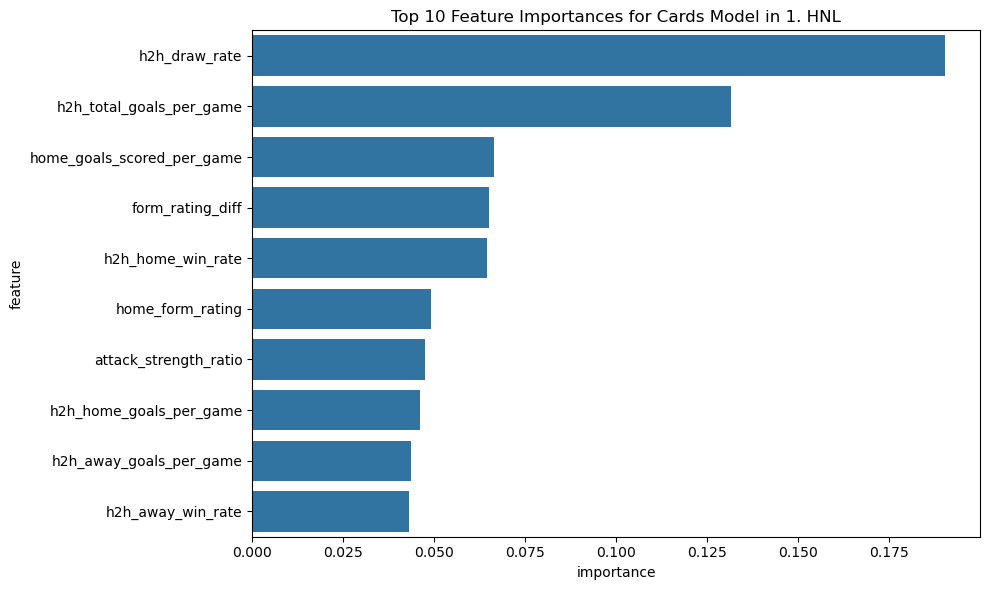

Model saved as 'models/cards_model_league_244_20250518_121303.pkl'

All models for 1. HNL trained successfully!


In [13]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Admiral Bundesliga...
Found 2932 fixtures with results for league: Admiral Bundesliga
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Admiral Bundesliga...
logistic - Loss: 1.0471, Accuracy: 0.4685

Training

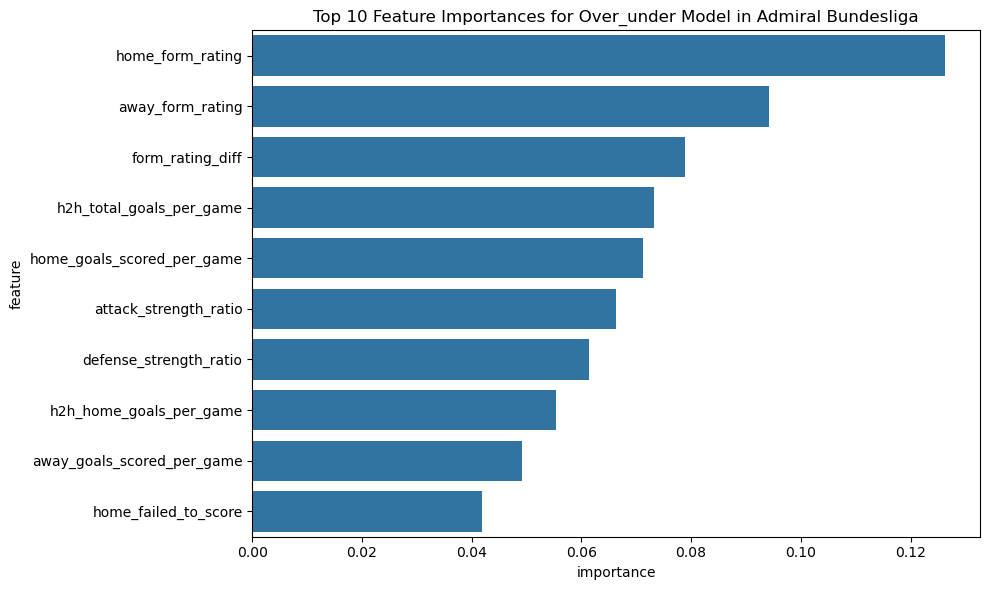

Model saved as 'models/over_under_model_league_181_20250518_133019.pkl'

Training cards over/under model...

Training logistic for cards prediction in Admiral Bundesliga...
logistic - Loss: 0.7555, Accuracy: 0.3884

Training random_forest for cards prediction in Admiral Bundesliga...
random_forest - Loss: 0.7951, Accuracy: 0.4106

Training gradient_boosting for cards prediction in Admiral Bundesliga...
gradient_boosting - Loss: 0.7903, Accuracy: 0.4089

Best model for cards prediction in Admiral Bundesliga: logistic
Best score: Loss: 0.7555, Accuracy: 0.3884
Model saved as 'models/cards_model_league_181_20250518_133020.pkl'

All models for Admiral Bundesliga trained successfully!


In [14]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Allsvenskan...
Found 4696 fixtures with results for league: Allsvenskan
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Allsvenskan...
logistic - Loss: 1.0272, Accuracy: 0.4926

Training random_forest for re

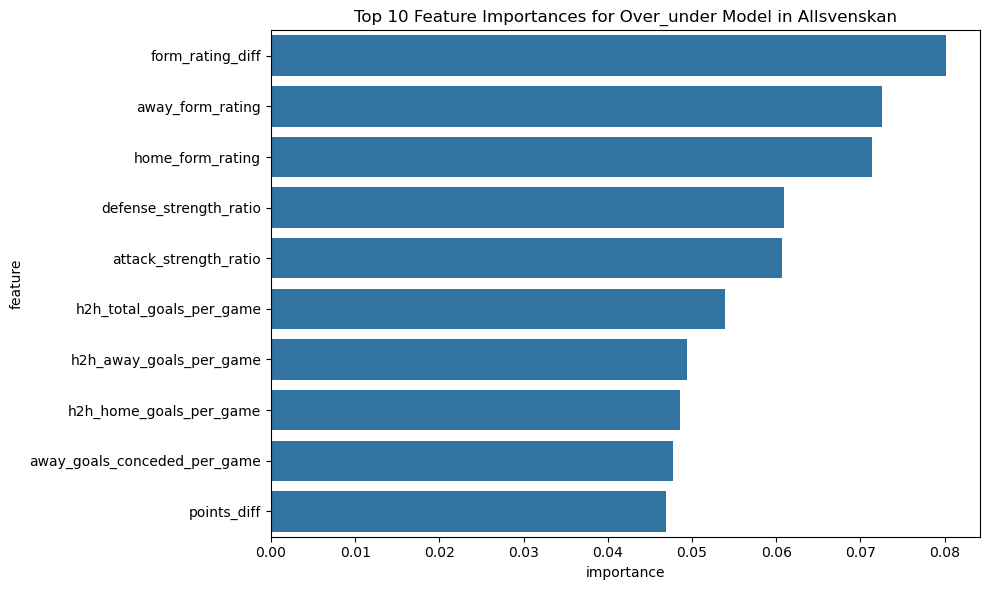

Model saved as 'models/over_under_model_league_573_20250518_133943.pkl'

Training cards over/under model...

Training logistic for cards prediction in Allsvenskan...
logistic - Loss: 0.7983, Accuracy: 0.3096

Training random_forest for cards prediction in Allsvenskan...
random_forest - Loss: 0.7958, Accuracy: 0.3947

Training gradient_boosting for cards prediction in Allsvenskan...
gradient_boosting - Loss: 0.7939, Accuracy: 0.3809

Best model for cards prediction in Allsvenskan: gradient_boosting
Best score: Loss: 0.7939, Accuracy: 0.3809

Top 10 most important features:
                         feature  importance
19       h2h_home_goals_per_game    0.110629
21      h2h_total_goals_per_game    0.099893
20       h2h_away_goals_per_game    0.077524
17                 h2h_draw_rate    0.066571
5               home_form_rating    0.064727
11              away_form_rating    0.061596
12              form_rating_diff    0.058983
18             h2h_away_win_rate    0.052632
2   home_goals_c

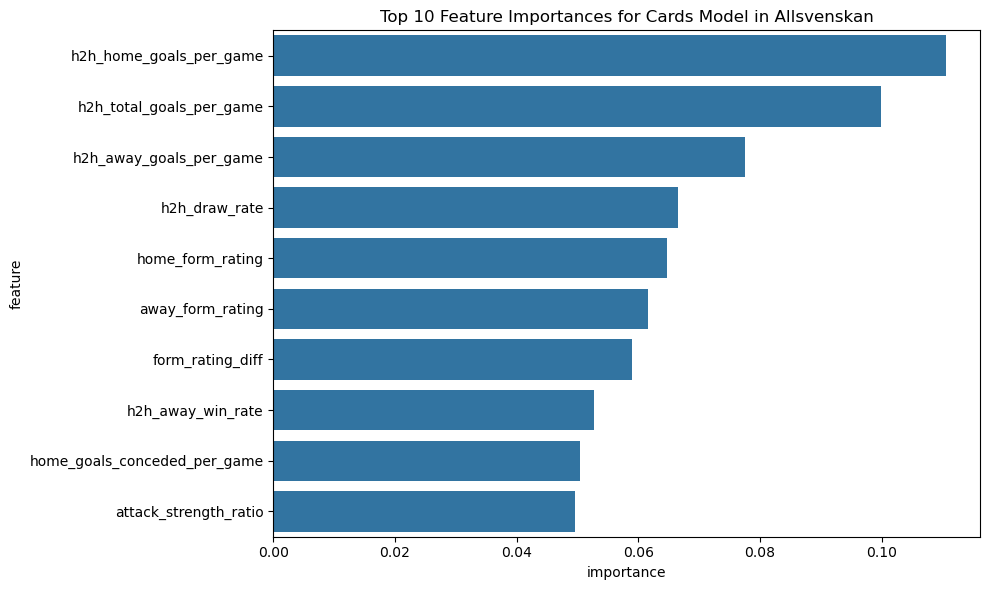

Model saved as 'models/cards_model_league_573_20250518_133944.pkl'

All models for Allsvenskan trained successfully!


In [15]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [16]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Bundesliga...
Found 2847 fixtures with results for league: Bundesliga
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Bundesliga...
logistic - Loss: 1.0131, Accuracy: 0.5070

Training random_forest for resul

In [17]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Carabao Cup...
Found 1855 fixtures with results for league: Carabao Cup
Card threshold for over/under: 1.0

Training match result model...

Training logistic for result prediction in Carabao Cup...
logistic - Loss: 1.0310, Accuracy: 0.4906

Training random_forest for re

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Championship...
Found 11137 fixtures with results for league: Championship
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Championship...
logistic - Loss: 1.0610, Accuracy: 0.4502

Training random_forest fo

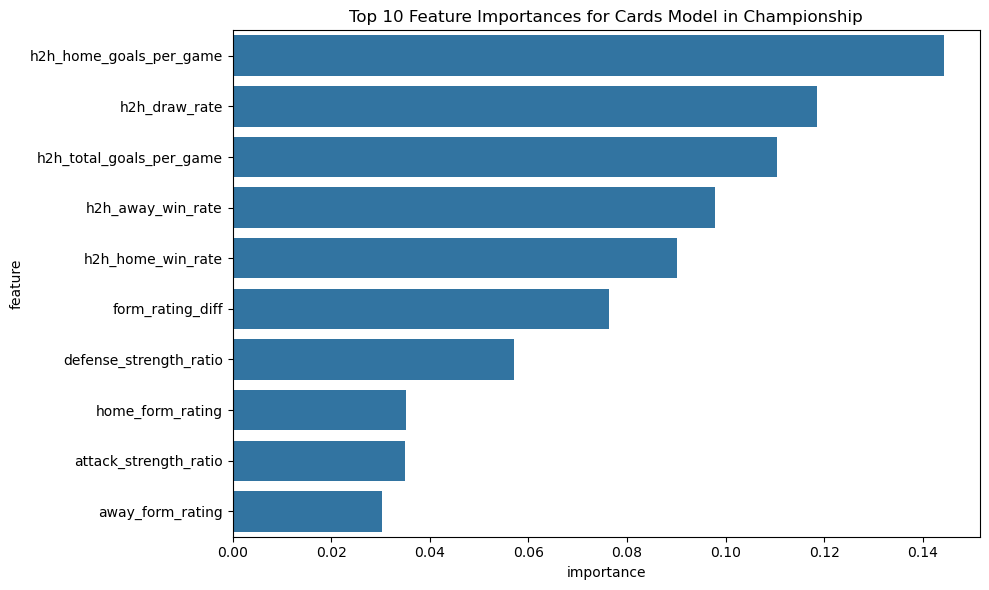

Model saved as 'models/cards_model_league_9_20250518_141052.pkl'

All models for Championship trained successfully!


In [18]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Copa Del Rey...
Found 2123 fixtures with results for league: Copa Del Rey
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Copa Del Rey...
logistic - Loss: 0.9562, Accuracy: 0.5435

Training random_forest for

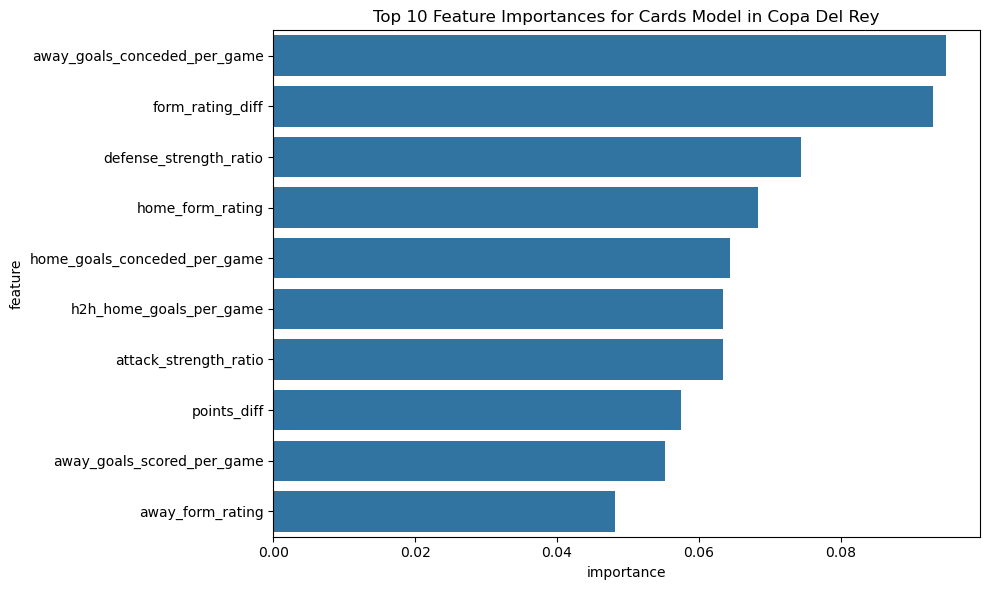

Model saved as 'models/cards_model_league_570_20250518_141525.pkl'

All models for Copa Del Rey trained successfully!


In [19]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Coppa Italia...
Found 1360 fixtures with results for league: Coppa Italia
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Coppa Italia...
logistic - Loss: 0.9153, Accuracy: 0.6213

Training random_forest for

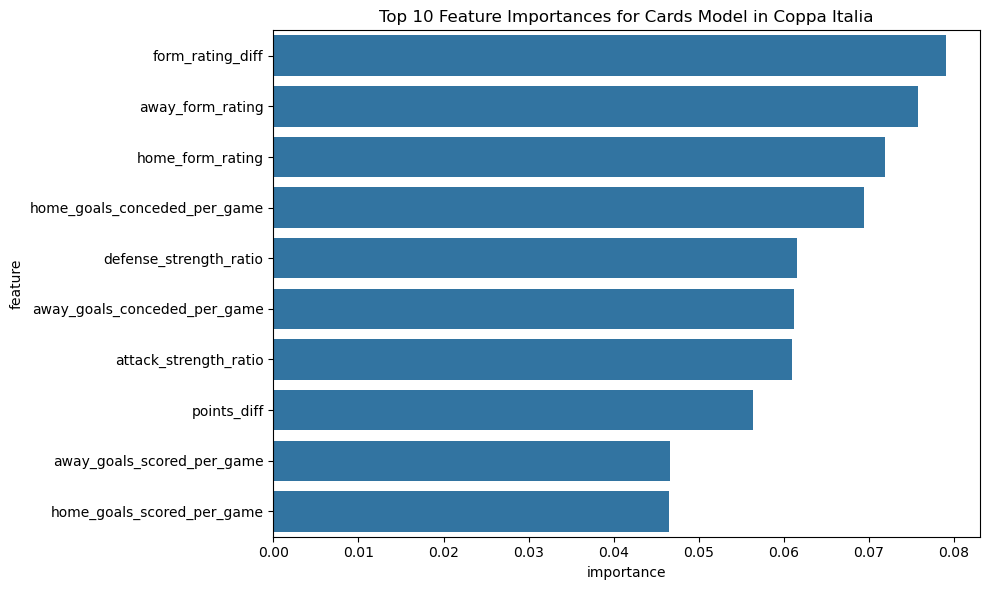

Model saved as 'models/cards_model_league_390_20250518_142154.pkl'

All models for Coppa Italia trained successfully!


In [20]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [21]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Ekstraklasa...
Found 5433 fixtures with results for league: Ekstraklasa
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Ekstraklasa...
logistic - Loss: 1.0616, Accuracy: 0.4499

Training random_forest for re

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Eliteserien...
Found 4607 fixtures with results for league: Eliteserien
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Eliteserien...
logistic - Loss: 1.0249, Accuracy: 0.5000

Training random_forest for re

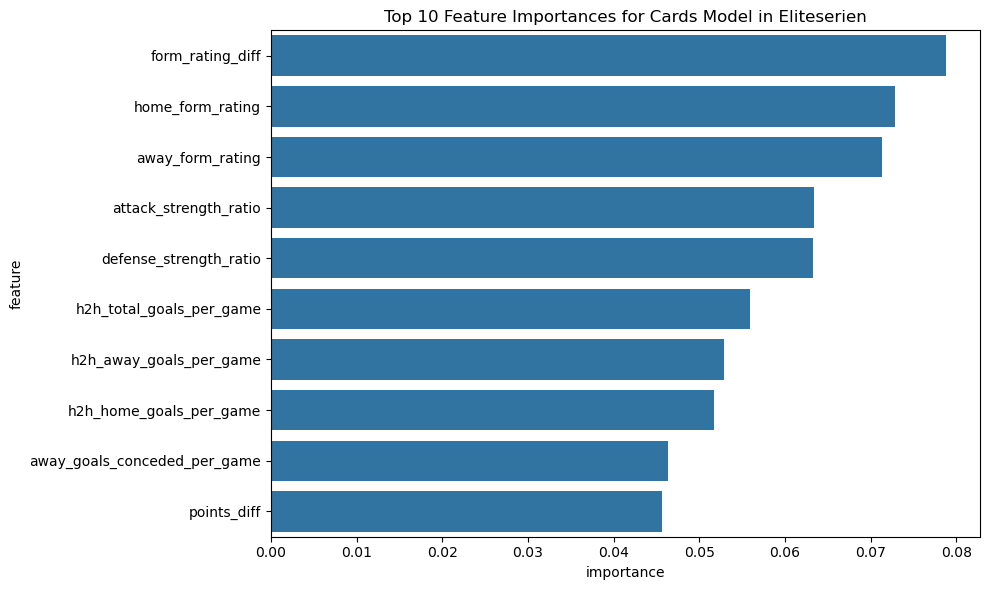

Model saved as 'models/cards_model_league_444_20250518_144409.pkl'

All models for Eliteserien trained successfully!


In [22]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [23]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Eredivisie...
Found 4780 fixtures with results for league: Eredivisie
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Eredivisie...
logistic - Loss: 0.9593, Accuracy: 0.5471

Training random_forest for resul

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for FA Cup...
Found 13451 fixtures with results for league: FA Cup
Card threshold for over/under: 0.0

Training match result model...

Training logistic for result prediction in FA Cup...
logistic - Loss: 1.0130, Accuracy: 0.4902

Training random_forest for result predictio

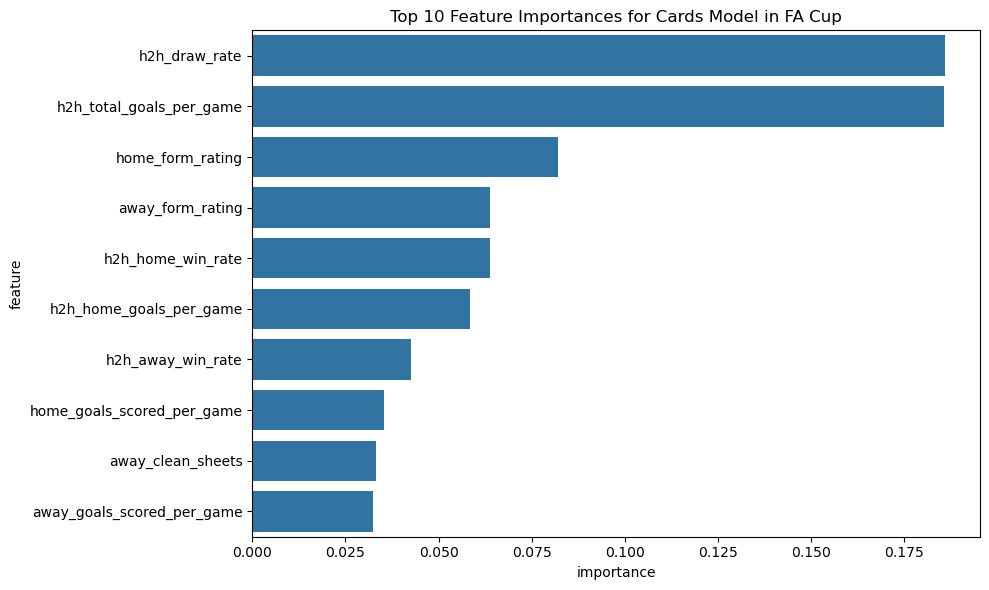

Model saved as 'models/cards_model_league_24_20250518_152106.pkl'

All models for FA Cup trained successfully!


In [24]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [25]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for La Liga...
Found 7235 fixtures with results for league: La Liga
Card threshold for over/under: 5.0

Training match result model...

Training logistic for result prediction in La Liga...
logistic - Loss: 1.0176, Accuracy: 0.4976

Training random_forest for result predict

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for La Liga 2...
Found 9262 fixtures with results for league: La Liga 2
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in La Liga 2...
logistic - Loss: 1.0613, Accuracy: 0.4452

Training random_forest for result p

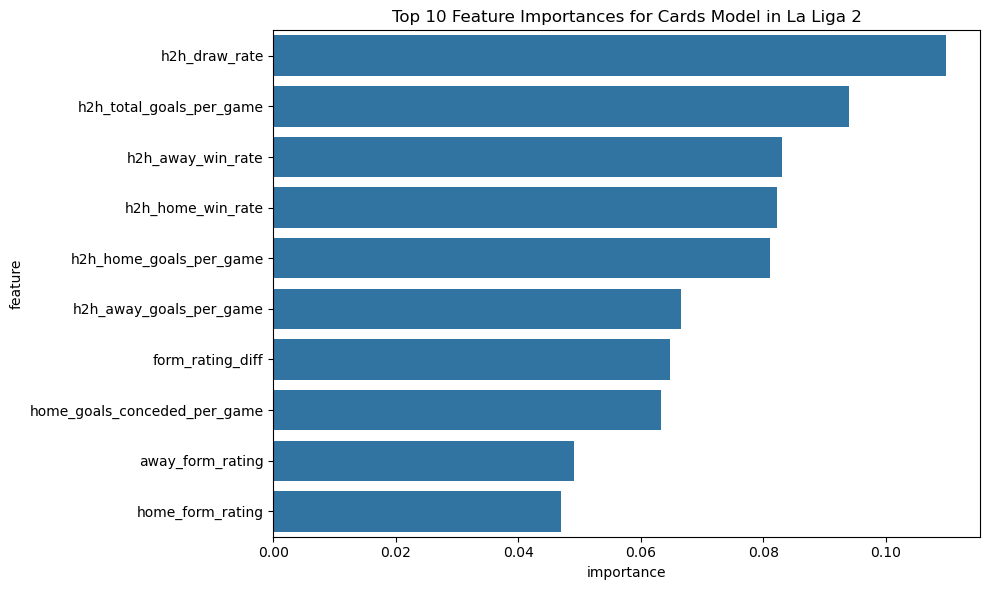

Model saved as 'models/cards_model_league_567_20250518_160940.pkl'

All models for La Liga 2 trained successfully!


In [26]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [27]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Liga Portugal...
Found 5573 fixtures with results for league: Liga Portugal
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Liga Portugal...
logistic - Loss: 0.9540, Accuracy: 0.5426

Training random_forest 

In [28]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Ligue 1...
Found 6735 fixtures with results for league: Ligue 1
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Ligue 1...
logistic - Loss: 1.0322, Accuracy: 0.4848

Training random_forest for result predict

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Premier League...
Found 9478 fixtures with results for league: Premier League
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Premier League...
logistic - Loss: 1.0182, Accuracy: 0.5032

Training random_fore

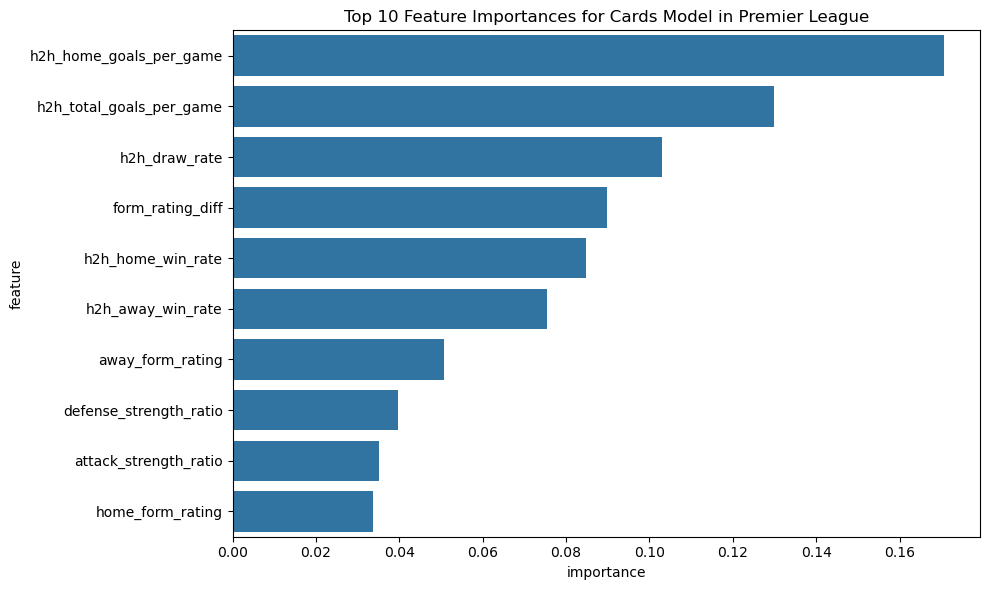

Model saved as 'models/cards_model_league_8_20250518_170659.pkl'

All models for Premier League trained successfully!


In [29]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [42]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Premier League...
Found 4604 fixtures with results for league: Premier League
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Premier League...
logistic - Loss: 1.0305, Accuracy: 0.4929

Training random_fore

In [43]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Premier League...
Found 3666 fixtures with results for league: Premier League
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Premier League...
logistic - Loss: 1.0012, Accuracy: 0.5150

Training random_fore

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Premiership...
Found 4495 fixtures with results for league: Premiership
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in Premiership...
logistic - Loss: 0.9669, Accuracy: 0.5250

Training random_forest for re

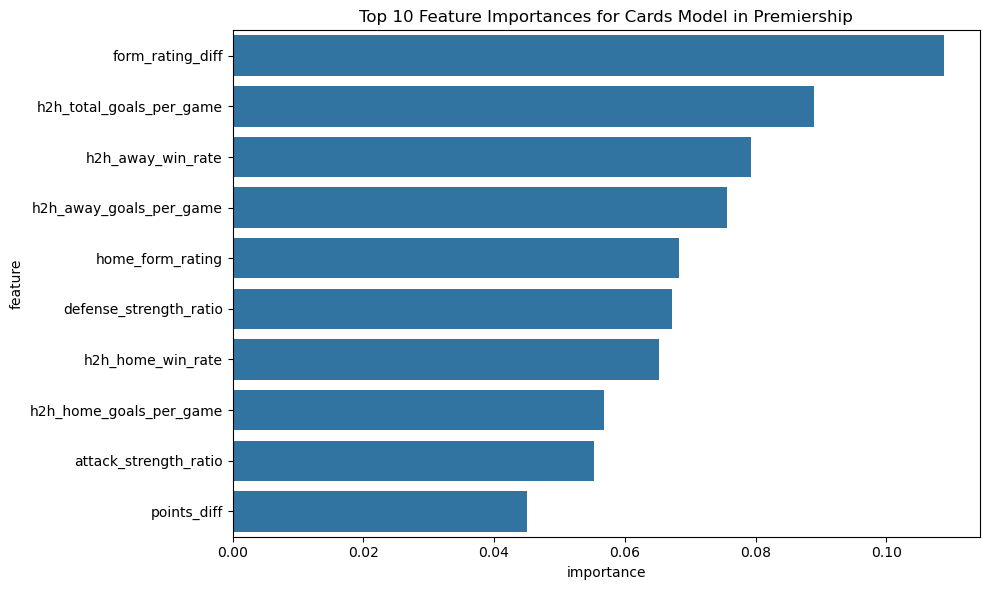

Model saved as 'models/cards_model_league_501_20250519_095347.pkl'

All models for Premiership trained successfully!


In [44]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Pro League...
Found 5888 fixtures with results for league: Pro League
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Pro League...
logistic - Loss: 1.0169, Accuracy: 0.5051

Training random_forest for resul

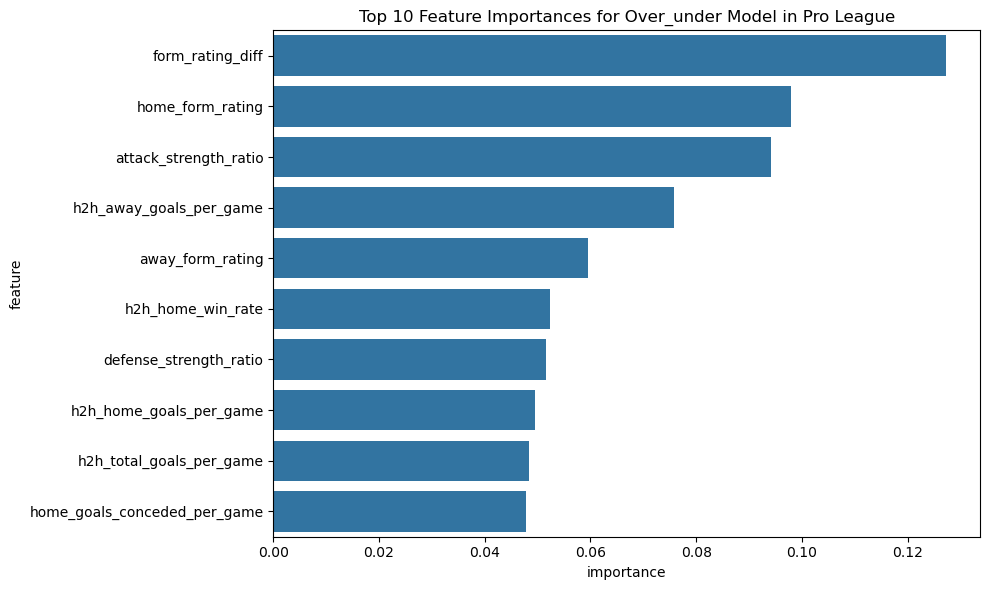

Model saved as 'models/over_under_model_league_208_20250519_100443.pkl'

Training cards over/under model...

Training logistic for cards prediction in Pro League...
logistic - Loss: 0.7836, Accuracy: 0.3913

Training random_forest for cards prediction in Pro League...
random_forest - Loss: 0.7830, Accuracy: 0.4355

Training gradient_boosting for cards prediction in Pro League...
gradient_boosting - Loss: 0.7917, Accuracy: 0.4075

Best model for cards prediction in Pro League: random_forest
Best score: Loss: 0.7830, Accuracy: 0.4355

Top 10 most important features:
                         feature  importance
12              form_rating_diff    0.078300
11              away_form_rating    0.073875
5               home_form_rating    0.070785
14         attack_strength_ratio    0.062812
15        defense_strength_ratio    0.062352
21      h2h_total_goals_per_game    0.058962
20       h2h_away_goals_per_game    0.051648
19       h2h_home_goals_per_game    0.051582
8   away_goals_conceded_

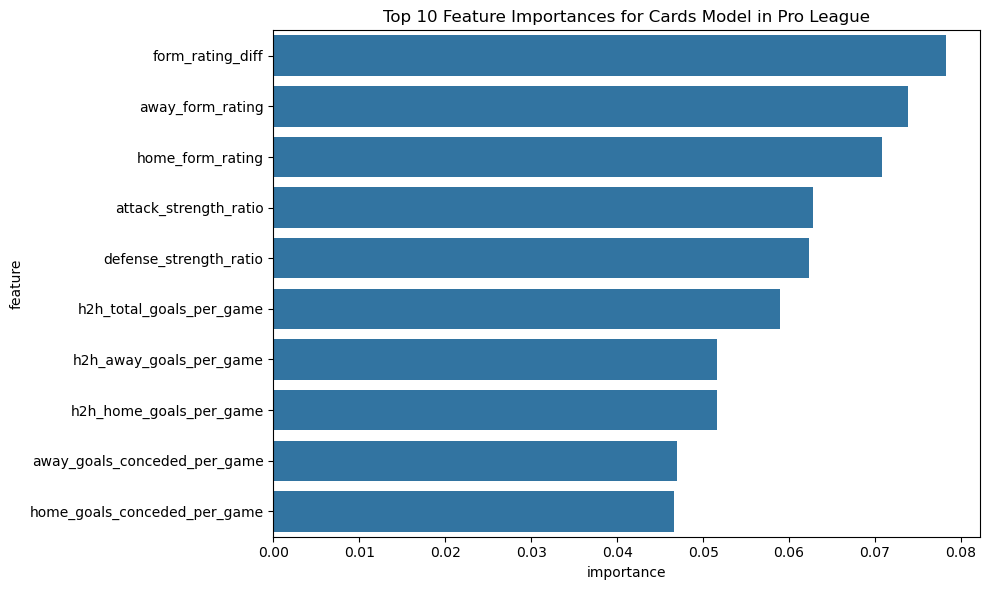

Model saved as 'models/cards_model_league_208_20250519_100445.pkl'

All models for Pro League trained successfully!


In [45]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [46]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Serie A...
Found 7047 fixtures with results for league: Serie A
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Serie A...
logistic - Loss: 1.0154, Accuracy: 0.4908

Training random_forest for result predict

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Serie B...
Found 8527 fixtures with results for league: Serie B
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Serie B...
logistic - Loss: 1.0860, Accuracy: 0.4091

Training random_forest for result predict

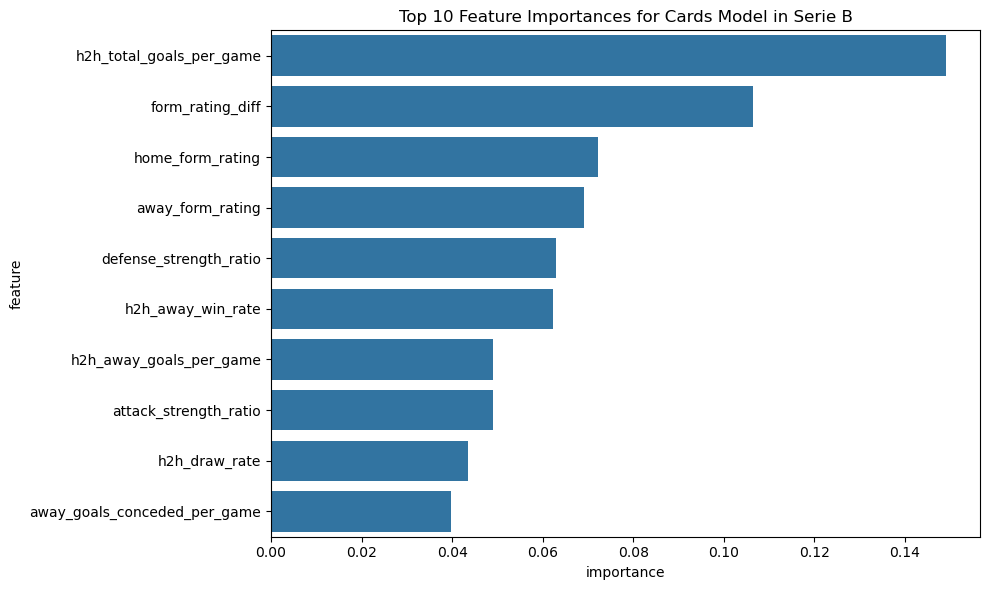

Model saved as 'models/cards_model_league_387_20250519_103450.pkl'

All models for Serie B trained successfully!


In [47]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [48]:
# Cell 10: Train model for a specific league

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Super League...
Found 3638 fixtures with results for league: Super League
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Super League...
logistic - Loss: 1.0554, Accuracy: 0.4519

Training random_forest for

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Super Lig...
Found 6421 fixtures with results for league: Super Lig
Card threshold for over/under: 4.0

Training match result model...

Training logistic for result prediction in Super Lig...
logistic - Loss: 1.0068, Accuracy: 0.5230

Training random_forest for result p

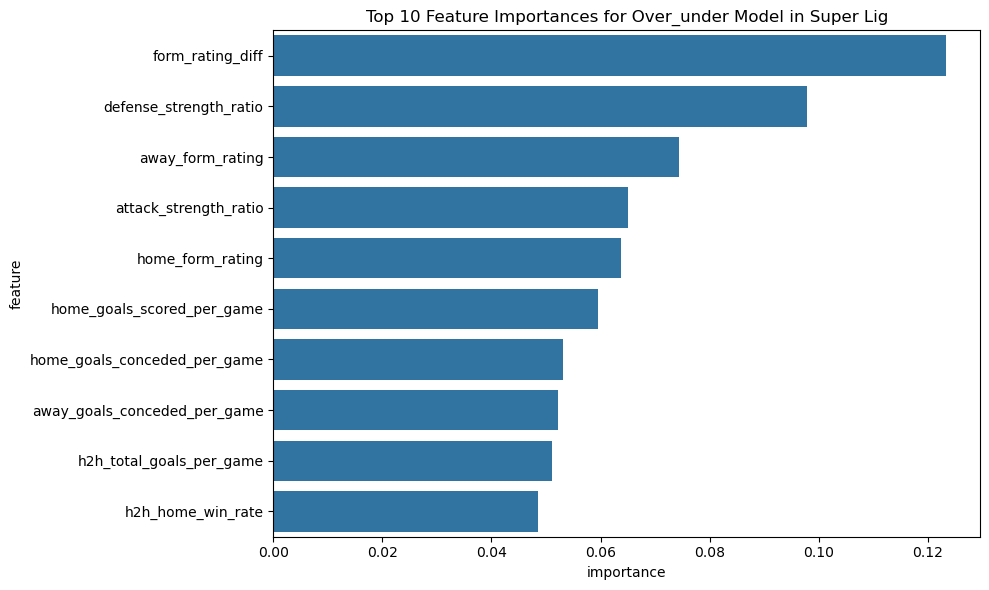

Model saved as 'models/over_under_model_league_600_20250519_105146.pkl'

Training cards over/under model...

Training logistic for cards prediction in Super Lig...
logistic - Loss: 0.7047, Accuracy: 0.4965

Training random_forest for cards prediction in Super Lig...
random_forest - Loss: 0.7090, Accuracy: 0.5074

Training gradient_boosting for cards prediction in Super Lig...
gradient_boosting - Loss: 0.7084, Accuracy: 0.5089

Best model for cards prediction in Super Lig: logistic
Best score: Loss: 0.7047, Accuracy: 0.4965
Model saved as 'models/cards_model_league_600_20250519_105147.pkl'

All models for Super Lig trained successfully!


In [49]:
# Cell 10: Train model for a specific league (25)

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [50]:
# Cell 10: Train model for a specific league (26)

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for Superliga...
Found 944 fixtures with results for league: Superliga
Card threshold for over/under: 3.0

Training match result model...

Training logistic for result prediction in Superliga...
logistic - Loss: 1.0884, Accuracy: 0.4233

Training random_forest for result pr

Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training models for UEFA Europa League Play-offs...
Found 166 fixtures with results for league: UEFA Europa League Play-offs
Card threshold for over/under: 2.0

Training match result model...

Training logistic for result prediction in UEFA Europa League Play-offs...
logistic - Loss: 1.313

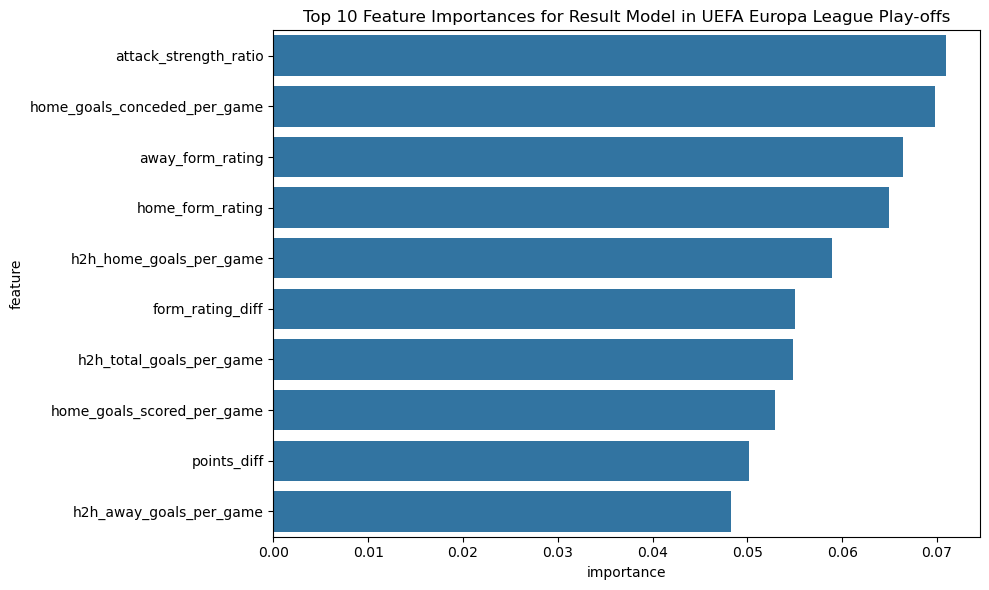

Model saved as 'models/match_result_model_league_1371_20250519_105353.pkl'

Training over/under 2.5 goals model...

Training logistic for over_under prediction in UEFA Europa League Play-offs...
logistic - Loss: 0.6702, Accuracy: 0.7059

Training random_forest for over_under prediction in UEFA Europa League Play-offs...
random_forest - Loss: 0.6546, Accuracy: 0.7353

Training gradient_boosting for over_under prediction in UEFA Europa League Play-offs...
gradient_boosting - Loss: 0.6873, Accuracy: 0.7353

Best model for over_under prediction in UEFA Europa League Play-offs: random_forest
Best score: Loss: 0.6546, Accuracy: 0.7353

Top 10 most important features:
                         feature  importance
5               home_form_rating    0.103710
20       h2h_away_goals_per_game    0.083217
11              away_form_rating    0.066152
19       h2h_home_goals_per_game    0.054554
12              form_rating_diff    0.051879
0           home_points_per_game    0.051667
21      h2h_tot

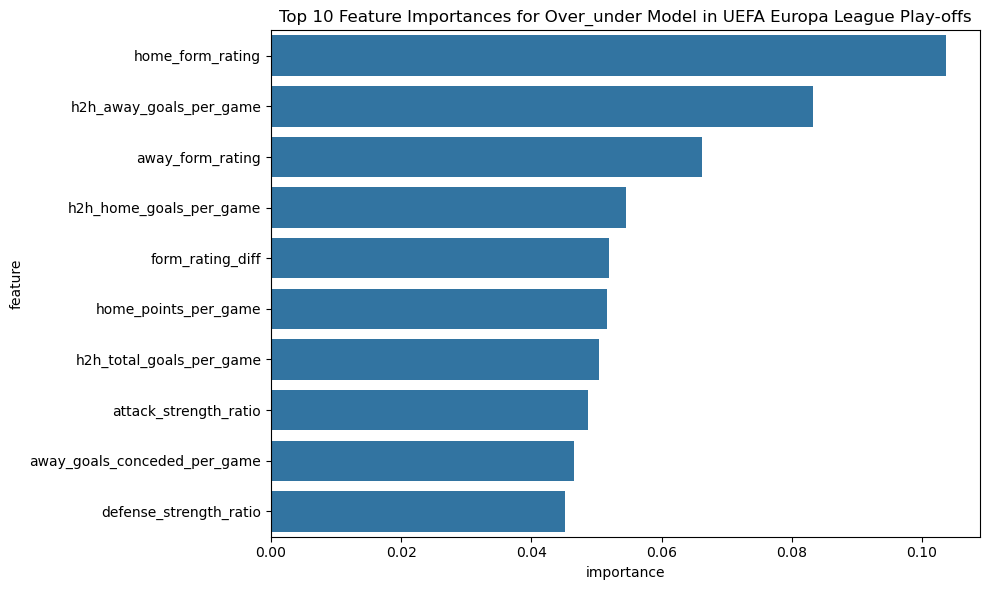

Model saved as 'models/over_under_model_league_1371_20250519_105353.pkl'

Training cards over/under model...

Training logistic for cards prediction in UEFA Europa League Play-offs...
logistic - Loss: 0.9228, Accuracy: 0.3824

Training random_forest for cards prediction in UEFA Europa League Play-offs...
random_forest - Loss: 0.7981, Accuracy: 0.4118

Training gradient_boosting for cards prediction in UEFA Europa League Play-offs...
gradient_boosting - Loss: 1.0626, Accuracy: 0.5000

Best model for cards prediction in UEFA Europa League Play-offs: random_forest
Best score: Loss: 0.7981, Accuracy: 0.4118

Top 10 most important features:
                       feature  importance
21    h2h_total_goals_per_game    0.064116
11            away_form_rating    0.062731
14       attack_strength_ratio    0.062289
12            form_rating_diff    0.060759
15      defense_strength_ratio    0.059754
1   home_goals_scored_per_game    0.057673
19     h2h_home_goals_per_game    0.056493
5           

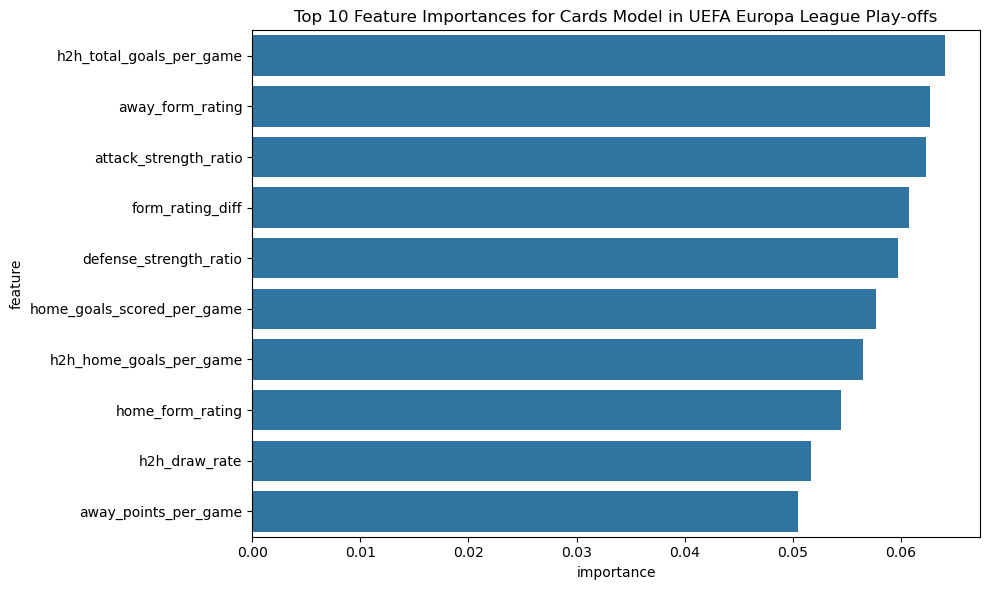

Model saved as 'models/cards_model_league_1371_20250519_105353.pkl'

All models for UEFA Europa League Play-offs trained successfully!


In [51]:
# Cell 10: Train model for a specific league (27)

# Get available leagues
leagues_query = """
SELECT DISTINCT l.id, l.name 
FROM leagues l
JOIN fixtures f ON l.id = f.league_id
WHERE f.score_home IS NOT NULL
ORDER BY l.name
"""

leagues_df = pd.read_sql_query(leagues_query, conn)

# Display available leagues
print("Available leagues:")
for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
    print(f"{i}. {league['name']} (ID: {league['id']})")

# Get user input for league selection
league_choice = input("\nEnter league number to train models for: ")
try:
    league_idx = int(league_choice) - 1
    if 0 <= league_idx < len(leagues_df):
        league_id = leagues_df.iloc[league_idx]['id']
        league_name = leagues_df.iloc[league_idx]['name']
        
        print(f"\nTraining models for {league_name}...")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None:
            print(f"Insufficient data for {league_name}")
        else:
            # Train models
            print("\nTraining match result model...")
            result_model = train_and_evaluate_model(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = train_and_evaluate_model(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = train_and_evaluate_model(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nAll models for {league_name} trained successfully!")
    else:
        print("Invalid league number")
except ValueError:
    print("Invalid input")

In [52]:
# Cell 11 Revised: Predict upcoming matches

# Ask if we should predict for all leagues or a specific one
all_leagues = input("Predict for all leagues? (y/n): ").lower() == 'y'

if all_leagues:
    league_id = None
    print("Predicting for all leagues with available models...")
else:
    # Get available leagues with upcoming matches
    leagues_query = """
    SELECT DISTINCT l.id, l.name 
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.starting_at >= DATE('now')
    AND f.score_home IS NULL
    ORDER BY l.name
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    
    if leagues_df.empty:
        print("No leagues with upcoming matches found.")
        league_id = None
    else:
        print("\nAvailable leagues with upcoming matches:")
        for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
            print(f"{i}. {league['name']} (ID: {league['id']})")
        
        league_choice = input("\nEnter league number: ")
        try:
            league_idx = int(league_choice) - 1
            if 0 <= league_idx < len(leagues_df):
                league_id = leagues_df.iloc[league_idx]['id']
                print(f"Selected league: {leagues_df.iloc[league_idx]['name']}")
            else:
                print("Invalid league number. Predicting for all leagues.")
                league_id = None
        except ValueError:
            print("Invalid input. Predicting for all leagues.")
            league_id = None

# Get number of days ahead to predict
days = input("Number of days ahead to predict (default 7): ")
try:
    days_ahead = int(days) if days else 7
except ValueError:
    print("Invalid input. Using default of 7 days.")
    days_ahead = 7

# Run prediction system
print(f"\nPredicting matches for the next {days_ahead} days...")
run_prediction_system(conn, days_ahead, league_id)


Available leagues with upcoming matches:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Championship (ID: 9)
5. Ekstraklasa (ID: 453)
6. Eliteserien (ID: 444)
7. La Liga (ID: 564)
8. La Liga 2 (ID: 567)
9. Premier League (ID: 8)
10. Premier League (ID: 486)
11. Premier League (ID: 609)
12. Pro League (ID: 208)
13. Serie A (ID: 384)
14. Serie B (ID: 387)
15. Super League (ID: 591)
16. Super Lig (ID: 600)
17. Superliga (ID: 271)
Selected league: La Liga 2

Predicting matches for the next 7 days...
Predicting outcomes for matches in the next 7 days...
Found 12 upcoming fixtures
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_567_20250518_160934.pkl
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/over_under_model_league_567_20250518_160938.pkl
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/cards_model_league_567_20250518_160940.pkl
Using model: /Users/sebastianvinther/Desktop/Sports

In [53]:
# Cell 21: Update model path to use existing models

# Update the get_latest_model function to use absolute paths
def get_latest_model(league_id, model_type):
    """Find the latest model for a specific league and prediction type"""
    # First, check in the custom directory
    model_dir = '/Users/sebastianvinther/Desktop/Sportsmonks/models'
    
    if not os.path.exists(model_dir):
        print(f"Custom models directory not found. Checking local directory...")
        # Fall back to the local models directory
        model_dir = 'models'
        if not os.path.exists(model_dir):
            print(f"No models directory found. Please train models first.")
            return None
    
    model_files = os.listdir(model_dir)
    
    # Filter for the requested league and model type
    matching_models = [f for f in model_files if f.startswith(f"{model_type}_model_league_{league_id}_")]
    
    if not matching_models:
        print(f"No {model_type} model found for league {league_id}")
        return None
    
    # Sort by timestamp (which is at the end of the filename)
    latest_model = sorted(matching_models)[-1]
    full_path = os.path.join(model_dir, latest_model)
    print(f"Using model: {full_path}")
    return full_path

# Print information about the current directory and available models
print(f"Current working directory: {os.getcwd()}")

custom_model_dir = '/Users/sebastianvinther/Desktop/Sportsmonks/models'
if os.path.exists(custom_model_dir):
    print(f"Custom models directory exists: {custom_model_dir}")
    custom_models = os.listdir(custom_model_dir)
    print(f"Found {len(custom_models)} model files")
    
    # Check specifically for Premier League (ID: 8) models
    premier_league_models = [f for f in custom_models if 'league_8_' in f]
    print(f"Found {len(premier_league_models)} Premier League models:")
    for model in premier_league_models:
        print(f"  - {model}")
else:
    print(f"Custom models directory not found: {custom_model_dir}")

# Test the function for Premier League models
print("\nTesting model loading for Premier League (ID: 8):")
result_model_path = get_latest_model(8, 'match_result')
over_under_model_path = get_latest_model(8, 'over_under')
cards_model_path = get_latest_model(8, 'cards')

# Update predict_match_outcomes function to use the new get_latest_model function
# This is technically redundant since we've already replaced the function,
# but we'll redefine it here to be sure it uses our updated version
def predict_match_outcomes(conn, fixture_id):
    """
    Predict match outcome, over/under 2.5 goals, and cards over/under for a fixture
    
    Parameters:
    conn - Database connection
    fixture_id - ID of the fixture to predict
    
    Returns:
    Dictionary with predictions and probabilities
    """
    # Prepare features for prediction
    features_df, fixture = prepare_prediction_features(conn, fixture_id)
    
    if features_df is None:
        return {"error": f"Fixture with ID {fixture_id} not found"}
    
    league_id = fixture['league_id']
    league_name = fixture['league_name']
    home_team = fixture['home_team']
    away_team = fixture['away_team']
    
    # Dictionary to store predictions
    predictions = {
        "fixture_id": fixture_id,
        "league_id": league_id,
        "league_name": league_name,
        "match": f"{home_team} vs {away_team}",
        "date": fixture['starting_at'],
        "predictions": {}
    }
    
    # Model types to predict
    model_types = ['match_result', 'over_under', 'cards']
    
    for model_type in model_types:
        # Find latest model for this league and type
        model_path = get_latest_model(league_id, model_type)
        
        if model_path is None:
            predictions["predictions"][model_type.replace('match_', '')] = {
                "status": "No model available",
                "probabilities": None
            }
            continue
            
        try:
            # Load model data
            model_data = load_model(model_path)
            model = model_data['model']
            scaler = model_data['scaler']
            feature_columns = model_data['feature_columns']
            problem_type = model_data['problem_type']
            
            # Ensure features match the model's expected columns
            features_for_model = features_df.reindex(columns=feature_columns, fill_value=0)
            
            # Scale features
            features_scaled = scaler.transform(features_for_model)
            
            # Make predictions
            if hasattr(model, 'predict_proba'):
                probabilities = model.predict_proba(features_scaled)
                predicted_class = model.predict(features_scaled)[0]
                
                if problem_type == 'multiclass':
                    # Result prediction (1=home win, 0=draw, 2=away win)
                    result_names = ['Draw', 'Home Win', 'Away Win']  # Ordered by class index
                    prob_dict = {result_names[i]: float(probabilities[0][i]) for i in range(len(result_names))}
                    prediction = result_names[predicted_class]
                else:
                    # Binary prediction (over/under)
                    prob_dict = {
                        'Under': float(probabilities[0][0]),
                        'Over': float(probabilities[0][1])
                    }
                    prediction = 'Over' if predicted_class == 1 else 'Under'
                    
                predictions["predictions"][model_type.replace('match_', '')] = {
                    "prediction": prediction,
                    "probabilities": prob_dict,
                    "confidence": float(max(probabilities[0]))
                }
            else:
                # Fallback for models without probabilities
                prediction = model.predict(features_scaled)[0]
                predictions["predictions"][model_type.replace('match_', '')] = {
                    "prediction": prediction,
                    "probabilities": None,
                    "confidence": None
                }
        except Exception as e:
            print(f"Error loading or using {model_type} model for league {league_id}: {e}")
            predictions["predictions"][model_type.replace('match_', '')] = {
                "status": f"Error: {str(e)}",
                "probabilities": None
            }
    
    return predictions

print("\nModel loading logic updated to use your existing models.")

Current working directory: /Users/sebastianvinther/Desktop/Sportsmonks
Custom models directory exists: /Users/sebastianvinther/Desktop/Sportsmonks/models
Found 92 model files
Found 5 Premier League models:
  - cards_model_league_8_20250518_170659.pkl
  - match_result_model_league_8_20250518_170653.pkl
  - over_under_model_league_8_20250518_170657.pkl
  - nn_result_model_league_8_20250518_180246.pkl
  - nn_result_model_league_8_20250518_180246.h5

Testing model loading for Premier League (ID: 8):
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/over_under_model_league_8_20250518_170657.pkl
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/cards_model_league_8_20250518_170659.pkl

Model loading logic updated to use your existing models.


In [54]:
# Cell 22: Predict with existing models

# Ask if we should predict for all leagues or a specific one
all_leagues = input("Predict for all leagues? (y/n): ").lower() == 'y'

if all_leagues:
    league_id = None
    print("Predicting for all leagues with available models...")
else:
    # Get available leagues with upcoming matches
    leagues_query = """
    SELECT DISTINCT l.id, l.name 
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.starting_at >= DATE('now')
    AND f.score_home IS NULL
    ORDER BY l.name
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    
    if leagues_df.empty:
        print("No leagues with upcoming matches found.")
        league_id = None
    else:
        print("\nAvailable leagues with upcoming matches:")
        for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
            print(f"{i}. {league['name']} (ID: {league['id']})")
        
        league_choice = input("\nEnter league number: ")
        try:
            league_idx = int(league_choice) - 1
            if 0 <= league_idx < len(leagues_df):
                league_id = leagues_df.iloc[league_idx]['id']
                print(f"Selected league: {leagues_df.iloc[league_idx]['name']}")
            else:
                print("Invalid league number. Predicting for all leagues.")
                league_id = None
        except ValueError:
            print("Invalid input. Predicting for all leagues.")
            league_id = None

# Get number of days ahead to predict
days = input("Number of days ahead to predict (default 7): ")
try:
    days_ahead = int(days) if days else 7
except ValueError:
    print("Invalid input. Using default of 7 days.")
    days_ahead = 7

# Get upcoming fixtures
today = datetime.now().strftime('%Y-%m-%d')
future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')

league_filter = f"AND f.league_id = {league_id}" if league_id else ""

fixtures_query = f"""
SELECT 
    f.id as fixture_id,
    f.league_id,
    l.name as league_name,
    f.starting_at,
    ht.name as home_team,
    at.name as away_team
FROM 
    fixtures f
JOIN 
    teams ht ON f.home_team_id = ht.id
JOIN 
    teams at ON f.away_team_id = at.id
JOIN
    leagues l ON f.league_id = l.id
WHERE 
    f.starting_at BETWEEN '{today}' AND '{future_date}'
    AND f.score_home IS NULL
    {league_filter}
ORDER BY 
    f.starting_at
"""

fixtures_df = pd.read_sql_query(fixtures_query, conn)

if fixtures_df.empty:
    print(f"No upcoming fixtures found within the next {days_ahead} days")
else:
    print(f"Found {len(fixtures_df)} upcoming fixtures")
    
    # Make predictions for each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        league_id = fixture['league_id']
        
        # First check if models exist for this league
        has_models = False
        for model_type in ['match_result', 'over_under', 'cards']:
            if get_latest_model(league_id, model_type) is not None:
                has_models = True
                break
        
        if has_models:
            print(f"Making predictions for {fixture['home_team']} vs {fixture['away_team']} (League: {fixture['league_name']})")
            predictions = predict_match_outcomes(conn, fixture_id)
            all_predictions.append(predictions)
        else:
            print(f"Skipping {fixture['home_team']} vs {fixture['away_team']} - no models available for {fixture['league_name']}")
    
    # Display predictions
    if all_predictions:
        print("\n\nPREDICTION RESULTS:")
        for pred in all_predictions:
            match = pred['match']
            date = pred['date']
            
            print(f"\n{'-'*80}")
            print(f"Match: {match} | Date: {date} | League: {pred['league_name']}")
            
            # Display match result prediction
            if 'result' in pred['predictions']:
                result_pred = pred['predictions']['result']
                
                if isinstance(result_pred, dict) and result_pred.get('probabilities') is not None:
                    print("\nMatch Result Prediction:")
                    print(f"Prediction: {result_pred['prediction']} (Confidence: {result_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in result_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nMatch Result: No prediction available")
            
            # Display over/under 2.5 goals prediction
            if 'over_under' in pred['predictions']:
                ou_pred = pred['predictions']['over_under']
                
                if isinstance(ou_pred, dict) and ou_pred.get('probabilities') is not None:
                    print("\nOver/Under 2.5 Goals Prediction:")
                    print(f"Prediction: {ou_pred['prediction']} (Confidence: {ou_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in ou_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nOver/Under 2.5 Goals: No prediction available")
            
            # Display cards over/under prediction
            if 'cards' in pred['predictions']:
                cards_pred = pred['predictions']['cards']
                
                if isinstance(cards_pred, dict) and cards_pred.get('probabilities') is not None:
                    print("\nCards Over/Under Prediction:")
                    print(f"Prediction: {cards_pred['prediction']} (Confidence: {cards_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in cards_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nCards Over/Under: No prediction available")
    else:
        print("No predictions were made. Check if models exist for the leagues with upcoming matches.")


Available leagues with upcoming matches:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Championship (ID: 9)
5. Ekstraklasa (ID: 453)
6. Eliteserien (ID: 444)
7. La Liga (ID: 564)
8. La Liga 2 (ID: 567)
9. Premier League (ID: 8)
10. Premier League (ID: 486)
11. Premier League (ID: 609)
12. Pro League (ID: 208)
13. Serie A (ID: 384)
14. Serie B (ID: 387)
15. Super League (ID: 591)
16. Super Lig (ID: 600)
17. Superliga (ID: 271)
Invalid input. Predicting for all leagues.
Found 136 upcoming fixtures
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_453_20250518_143251.pkl
Making predictions for Widzew Lodz vs Puszcza Niepołomice (League: Ekstraklasa)
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_453_20250518_143251.pkl
Using model: /Users/sebastianvinther/Desktop/Sportsmonks/models/over_under_model_league_453_20250518_143253.pkl
Using model: /Users/sebastianvinther/Desktop

In [36]:
# Cell 12: Evaluate model performance

# Ask for all leagues or specific league
all_leagues = input("Evaluate models for all leagues? (y/n): ").lower() == 'y'

if all_leagues:
    league_id = None
    print("\nEvaluating models for all leagues...\n")
    evaluate_model_performance(conn, league_id)
else:
    # Get available leagues with models
    model_dir = 'models'
    
    if not os.path.exists(model_dir):
        print("No models found. Train models first.")
    else:
        model_files = os.listdir(model_dir)
        league_ids = set()
        
        for file in model_files:
            if not file.endswith('.pkl'):
                continue
                
            parts = file.split('_')
            
            if len(parts) < 4 or not parts[2].startswith('league'):
                continue
                
            league_id_part = parts[2].replace('league_', '')
            
            try:
                league_ids.add(int(league_id_part))
            except ValueError:
                continue
        
        if not league_ids:
            print("No valid models found.")
        else:
            # Get league names
            league_ids_str = ','.join(map(str, league_ids))
            leagues_query = f"""
            SELECT id, name 
            FROM leagues
            WHERE id IN ({league_ids_str})
            ORDER BY name
            """
            
            leagues_df = pd.read_sql_query(leagues_query, conn)
            
            print("\nAvailable leagues with models:")
            for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
                print(f"{i}. {league['name']} (ID: {league['id']})")
            
            league_choice = input("\nEnter league number to evaluate: ")
            try:
                league_idx = int(league_choice) - 1
                if 0 <= league_idx < len(leagues_df):
                    league_id = leagues_df.iloc[league_idx]['id']
                    print(f"\nEvaluating models for {leagues_df.iloc[league_idx]['name']}...\n")
                    evaluate_model_performance(conn, league_id)
                else:
                    print("Invalid league number")
            except ValueError:
                print("Invalid input")

No valid models found.


In [38]:
# Cell 15: Neural Network functions (only run if TensorFlow is available)

if not TF_AVAILABLE:
    print("TensorFlow is not available. Skipping neural network functions.")
else:
    def build_neural_network_model(X_train, y_train, model_type='result', league_id=None, league_name='Unknown'):
        """
        Build and train a neural network model for football prediction
        
        Parameters:
        X_train - Training features
        y_train - Training target
        model_type - 'result', 'over_under', or 'cards'
        league_id - League ID
        league_name - League name
        
        Returns:
        Trained model
        """
        # Create timestamp for model versioning
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # Define problem type
        if model_type == 'result':
            problem_type = 'multiclass'
            output_units = 3  # Win, Draw, Loss
            activation = 'softmax'
            loss = 'sparse_categorical_crossentropy'
        else:
            problem_type = 'binary'
            output_units = 1
            activation = 'sigmoid'
            loss = 'binary_crossentropy'
        
        # Create time-based train/test split
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Create model filename
        model_name = f"nn_{model_type}_model_league_{league_id}_{timestamp}"
        
        # Define model architecture
        input_dim = X_train.shape[1]
        
        # Simple feedforward neural network
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(output_units, activation=activation)
        ])
        
        # Compile model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=loss,
            metrics=['accuracy']
        )
        
        # Define callbacks
        callbacks = [
            EarlyStopping(patience=20, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=10, min_lr=0.00001),
            ModelCheckpoint(f'models/{model_name}.h5', save_best_only=True)
        ]
        
        # Train model
        print(f"\nTraining neural network for {model_type} prediction in {league_name}...")
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )
        
        # Plot training history
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Save the model metadata
        with open(f"models/{model_name}.pkl", 'wb') as f:
            pickle.dump({
                'scaler': scaler,
                'feature_columns': list(X_train.columns),
                'problem_type': problem_type,
                'league_id': league_id,
                'league_name': league_name,
                'model_type': model_type,
                'timestamp': timestamp
            }, f)
        
        print(f"Neural network model saved as 'models/{model_name}.h5'")
        print(f"Model metadata saved as 'models/{model_name}.pkl'")
        
        return model
    
    print("Neural Network functions defined.")

Neural Network functions defined.


In [39]:
# Cell 15: Neural Network functions (only run if TensorFlow is available)

if not TF_AVAILABLE:
    print("TensorFlow is not available. Skipping neural network functions.")
else:
    def build_neural_network_model(X_train, y_train, model_type='result', league_id=None, league_name='Unknown'):
        """
        Build and train a neural network model for football prediction
        
        Parameters:
        X_train - Training features
        y_train - Training target
        model_type - 'result', 'over_under', or 'cards'
        league_id - League ID
        league_name - League name
        
        Returns:
        Trained model
        """
        # Create timestamp for model versioning
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # Define problem type
        if model_type == 'result':
            problem_type = 'multiclass'
            output_units = 3  # Win, Draw, Loss
            activation = 'softmax'
            loss = 'sparse_categorical_crossentropy'
        else:
            problem_type = 'binary'
            output_units = 1
            activation = 'sigmoid'
            loss = 'binary_crossentropy'
        
        # Create time-based train/test split
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Create model filename
        model_name = f"nn_{model_type}_model_league_{league_id}_{timestamp}"
        
        # Define model architecture
        input_dim = X_train.shape[1]
        
        # Simple feedforward neural network
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(output_units, activation=activation)
        ])
        
        # Compile model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=loss,
            metrics=['accuracy']
        )
        
        # Define callbacks
        callbacks = [
            EarlyStopping(patience=20, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=10, min_lr=0.00001),
            ModelCheckpoint(f'models/{model_name}.h5', save_best_only=True)
        ]
        
        # Train model
        print(f"\nTraining neural network for {model_type} prediction in {league_name}...")
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )
        
        # Plot training history
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Save the model metadata
        with open(f"models/{model_name}.pkl", 'wb') as f:
            pickle.dump({
                'scaler': scaler,
                'feature_columns': list(X_train.columns),
                'problem_type': problem_type,
                'league_id': league_id,
                'league_name': league_name,
                'model_type': model_type,
                'timestamp': timestamp
            }, f)
        
        print(f"Neural network model saved as 'models/{model_name}.h5'")
        print(f"Model metadata saved as 'models/{model_name}.pkl'")
        
        return model
    
    print("Neural Network functions defined.")

Neural Network functions defined.


In [65]:
# Cell 16: Train neural network models for all leagues automatically

if not TF_AVAILABLE:
    print("TensorFlow is not available. Neural network models cannot be trained.")
else:
    # Get all leagues
    leagues_query = """
    SELECT DISTINCT l.id, l.name, COUNT(*) as match_count 
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.score_home IS NOT NULL
    GROUP BY l.id
    HAVING COUNT(*) >= 100  -- Require at least 100 matches for meaningful training
    ORDER BY match_count DESC
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    print(f"Found {len(leagues_df)} leagues with sufficient data")
    
    # Define a function that uses league name instead of ID for model names
    def build_nn_model_with_league_name(X, y, model_type, league_id, league_name):
        """
        Build and train a neural network model for football prediction
        Using league name in the filename instead of league ID
        
        Parameters:
        X_train - Training features
        y_train - Training target
        model_type - 'result', 'over_under', or 'cards'
        league_id - League ID (still stored in metadata)
        league_name - League name (used in filename)
        
        Returns:
        Trained model
        """
        # Create timestamp for model versioning
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # Clean league name for filename (remove spaces and special characters)
        clean_league_name = league_name.replace(' ', '_').replace('-', '_').lower()
        clean_league_name = ''.join(c for c in clean_league_name if c.isalnum() or c == '_')
        
        # Define problem type
        if model_type == 'result':
            problem_type = 'multiclass'
            output_units = 3  # Win, Draw, Loss
            activation = 'softmax'
            loss = 'sparse_categorical_crossentropy'
        else:
            problem_type = 'binary'
            output_units = 1
            activation = 'sigmoid'
            loss = 'binary_crossentropy'
        
        # Create time-based train/test split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Create model filename using league name
        model_name = f"nn_{model_type}_model_{clean_league_name}_{timestamp}"
        
        # Define model architecture
        input_dim = X_train.shape[1]
        
        # Simple feedforward neural network
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
            Dropout(0.3),
            Dense(output_units, activation=activation)
        ])
        
        # Compile model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=loss,
            metrics=['accuracy']
        )
        
        # Define callbacks
        callbacks = [
            EarlyStopping(patience=20, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=10, min_lr=0.00001),
            ModelCheckpoint(f'models/{model_name}.h5', save_best_only=True)
        ]
        
        # Train model
        print(f"\nTraining neural network for {model_type} prediction in {league_name}...")
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )
        
        # Save the model metadata
        with open(f"models/{model_name}.pkl", 'wb') as f:
            pickle.dump({
                'scaler': scaler,
                'feature_columns': list(X_train.columns),
                'problem_type': problem_type,
                'league_id': league_id,
                'league_name': league_name,
                'model_type': model_type,
                'timestamp': timestamp
            }, f)
        
        print(f"Neural network model saved as 'models/{model_name}.h5'")
        print(f"Model metadata saved as 'models/{model_name}.pkl'")
        
        return model
    
    # Train models for each league
    for _, league in leagues_df.iterrows():
        league_id = league['id']
        league_name = league['name']
        match_count = league['match_count']
        
        print(f"\n{'='*80}")
        print(f"Training neural network models for {league_name} (ID: {league_id}, Matches: {match_count})...")
        print(f"{'='*80}")
        
        # Get features and targets
        X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
        
        if X is None or len(X) < 100:
            print(f"Insufficient data for {league_name}")
            continue
        
        print(f"Dataset size: {X.shape[0]} matches with {X.shape[1]} features")
        
        try:
            # Train all three model types
            print("\nTraining match result model...")
            result_model = build_nn_model_with_league_name(X, y_result, 'result', league_id, league_name)
            
            print("\nTraining over/under 2.5 goals model...")
            over_under_model = build_nn_model_with_league_name(X, y_over_under, 'over_under', league_id, league_name)
            
            print("\nTraining cards over/under model...")
            cards_model = build_nn_model_with_league_name(X, y_cards, 'cards', league_id, league_name)
            
            print(f"\nFinished training all models for {league_name}")
            
        except Exception as e:
            print(f"Error training models for {league_name}: {e}")
    
    print("\nTraining complete for all leagues!")

Found 27 leagues with sufficient data

Training neural network models for FA Cup (ID: 24, Matches: 13466)...
Found 13451 fixtures with results for league: FA Cup
Card threshold for over/under: 0.0
Dataset size: 13451 matches with 22 features

Training match result model...

Training neural network for result prediction in FA Cup...
Epoch 1/100
249/337 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.3976 - loss: 1.1994

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.4005 - loss: 1.1889 - val_accuracy: 0.4742 - val_loss: 1.0940 - learning_rate: 0.0010
Epoch 2/100
298/337 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.4394 - loss: 1.1081

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.4405 - loss: 1.1074 - val_accuracy: 0.4738 - val_loss: 1.0812 - learning_rate: 0.0010
Epoch 3/100
299/337 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.4432 - loss: 1.0931

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4441 - loss: 1.0926 - val_accuracy: 0.4693 - val_loss: 1.0650 - learning_rate: 0.0010
Epoch 4/100
216/337 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4511 - loss: 1.0861

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4520 - loss: 1.0829 - val_accuracy: 0.4790 - val_loss: 1.0559 - learning_rate: 0.0010
Epoch 5/100
307/337 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.4538 - loss: 1.0748

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4543 - loss: 1.0739 - val_accuracy: 0.4790 - val_loss: 1.0462 - learning_rate: 0.0010
Epoch 6/100
317/337 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.4600 - loss: 1.0648

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4605 - loss: 1.0644 - val_accuracy: 0.4939 - val_loss: 1.0432 - learning_rate: 0.0010
Epoch 7/100
223/337 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.4708 - loss: 1.0558

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.4695 - loss: 1.0552 - val_accuracy: 0.4838 - val_loss: 1.0390 - learning_rate: 0.0010
Epoch 8/100
269/337 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.4686 - loss: 1.0447

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4679 - loss: 1.0454 - val_accuracy: 0.4872 - val_loss: 1.0345 - learning_rate: 0.0010
Epoch 9/100
314/337 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.4701 - loss: 1.0442

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.4702 - loss: 1.0443 - val_accuracy: 0.4872 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 10/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.4764 - loss: 1.0398 - val_accuracy: 0.4957 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 11/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.4746 - loss: 1.0399 - val_accuracy: 0.4909 - val_loss: 1.0289 - learning_rate: 0.0010
Epoch 12/100
322/337 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4833 - loss: 1.0307

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4829 - loss: 1.0310 - val_accuracy: 0.4890 - val_loss: 1.0259 - learning_rate: 0.0010
Epoch 13/100
316/337 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.4733 - loss: 1.0376

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.4735 - loss: 1.0375 - val_accuracy: 0.5002 - val_loss: 1.0211 - learning_rate: 0.0010
Epoch 14/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4726 - loss: 1.0349 - val_accuracy: 0.4946 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 15/100
311/337 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.4639 - loss: 1.0446

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.4647 - loss: 1.0438 - val_accuracy: 0.5009 - val_loss: 1.0173 - learning_rate: 0.0010
Epoch 16/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.4703 - loss: 1.0327 - val_accuracy: 0.4876 - val_loss: 1.0215 - learning_rate: 0.0010
Epoch 17/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.4822 - loss: 1.0292 - val_accuracy: 0.4983 - val_loss: 1.0186 - learning_rate: 0.0010
Epoch 18/100
324/337 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.4729 - loss: 1.0360

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.4730 - loss: 1.0358 - val_accuracy: 0.4965 - val_loss: 1.0169 - learning_rate: 0.0010
Epoch 19/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.4760 - loss: 1.0325 - val_accuracy: 0.4935 - val_loss: 1.0192 - learning_rate: 0.0010
Epoch 20/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.4686 - loss: 1.0348 - val_accuracy: 0.4883 - val_loss: 1.0203 - learning_rate: 0.0010
Epoch 21/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.4723 - loss: 1.0302 - val_accuracy: 0.4961 - val_loss: 1.0178 - learning_rate: 0.0010
Epoch 22/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4731 - loss: 1.0327 - val_accuracy: 0.4794 - val_loss: 1.0190 - learning_rate: 0.0010
Epoch 23/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4792 - loss: 1.0328 - val_accuracy: 0.4957 - val_loss: 1.0186 - learning_rate: 0.0010
Epoch 24/100
313/337 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.4797 - 

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.4799 - loss: 1.0319 - val_accuracy: 0.4987 - val_loss: 1.0141 - learning_rate: 0.0010
Epoch 25/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.4751 - loss: 1.0267 - val_accuracy: 0.4991 - val_loss: 1.0161 - learning_rate: 0.0010
Epoch 26/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.4786 - loss: 1.0300 - val_accuracy: 0.4786 - val_loss: 1.0233 - learning_rate: 0.0010
Epoch 27/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.4741 - loss: 1.0298 - val_accuracy: 0.4783 - val_loss: 1.0225 - learning_rate: 0.0010
Epoch 28/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.4792 - loss: 1.0210 - val_accuracy: 0.4924 - val_loss: 1.0185 - learning_rate: 0.0010
Epoch 29/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.4806 - loss: 1.0268 - val_accuracy: 0.4961 - val_loss: 1.0145 - learning_rate: 0.0010
Epoch 30/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4820 - 

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.5776 - loss: 0.7692 - val_accuracy: 0.6440 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 2/100
202/337 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6211 - loss: 0.7247

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6251 - loss: 0.7202 - val_accuracy: 0.6440 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 3/100
311/337 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.6241 - loss: 0.7031

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.6245 - loss: 0.7028 - val_accuracy: 0.6440 - val_loss: 0.6853 - learning_rate: 0.0010
Epoch 4/100
311/337 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.6230 - loss: 0.6943

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6235 - loss: 0.6939 - val_accuracy: 0.6440 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 5/100
196/337 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6240 - loss: 0.6853

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6274 - loss: 0.6838 - val_accuracy: 0.6440 - val_loss: 0.6712 - learning_rate: 0.0010
Epoch 6/100
314/337 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.6258 - loss: 0.6793

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6262 - loss: 0.6790 - val_accuracy: 0.6440 - val_loss: 0.6659 - learning_rate: 0.0010
Epoch 7/100
316/337 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6375 - loss: 0.6676

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6370 - loss: 0.6678 - val_accuracy: 0.6440 - val_loss: 0.6623 - learning_rate: 0.0010
Epoch 8/100
208/337 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6374 - loss: 0.6650

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6346 - loss: 0.6663 - val_accuracy: 0.6440 - val_loss: 0.6592 - learning_rate: 0.0010
Epoch 9/100
318/337 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6329 - loss: 0.6636

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6327 - loss: 0.6637 - val_accuracy: 0.6440 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 10/100
319/337 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6363 - loss: 0.6605

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6361 - loss: 0.6606 - val_accuracy: 0.6440 - val_loss: 0.6558 - learning_rate: 0.0010
Epoch 11/100
206/337 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6251 - loss: 0.6654

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6277 - loss: 0.6642 - val_accuracy: 0.6440 - val_loss: 0.6539 - learning_rate: 0.0010
Epoch 12/100
316/337 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6335 - loss: 0.6594

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6334 - loss: 0.6594 - val_accuracy: 0.6440 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 13/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.6297 - loss: 0.6606 - val_accuracy: 0.6440 - val_loss: 0.6526 - learning_rate: 0.0010
Epoch 14/100
300/337 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.6334 - loss: 0.6575

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6332 - loss: 0.6577 - val_accuracy: 0.6440 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 15/100
199/337 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.6295 - loss: 0.6586

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6304 - loss: 0.6583 - val_accuracy: 0.6440 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 16/100
301/337 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.6386 - loss: 0.6546

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6378 - loss: 0.6549 - val_accuracy: 0.6440 - val_loss: 0.6504 - learning_rate: 0.0010
Epoch 17/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.6283 - loss: 0.6597 - val_accuracy: 0.6440 - val_loss: 0.6505 - learning_rate: 0.0010
Epoch 18/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6309 - loss: 0.6571 - val_accuracy: 0.6440 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 19/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6325 - loss: 0.6579 - val_accuracy: 0.6440 - val_loss: 0.6511 - learning_rate: 0.0010
Epoch 20/100
316/337 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6198 - loss: 0.6633

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6205 - loss: 0.6629 - val_accuracy: 0.6440 - val_loss: 0.6494 - learning_rate: 0.0010
Epoch 21/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.6296 - loss: 0.6582 - val_accuracy: 0.6440 - val_loss: 0.6502 - learning_rate: 0.0010
Epoch 22/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6312 - loss: 0.6567 - val_accuracy: 0.6440 - val_loss: 0.6520 - learning_rate: 0.0010
Epoch 23/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.6263 - loss: 0.6597 - val_accuracy: 0.6440 - val_loss: 0.6501 - learning_rate: 0.0010
Epoch 24/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.6313 - loss: 0.6581 - val_accuracy: 0.6440 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 25/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6242 - loss: 0.6608 - val_accuracy: 0.6440 - val_loss: 0.6506 - learning_rate: 0.0010
Epoch 26/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6324 - 

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.6289 - loss: 0.6575 - val_accuracy: 0.6440 - val_loss: 0.6494 - learning_rate: 5.0000e-04
Epoch 41/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6330 - loss: 0.6535 - val_accuracy: 0.6440 - val_loss: 0.6495 - learning_rate: 2.5000e-04
Epoch 42/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6302 - loss: 0.6555 - val_accuracy: 0.6440 - val_loss: 0.6495 - learning_rate: 2.5000e-04
Epoch 43/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6311 - loss: 0.6552 - val_accuracy: 0.6440 - val_loss: 0.6497 - learning_rate: 2.5000e-04
Epoch 44/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6381 - loss: 0.6511 - val_accuracy: 0.6440 - val_loss: 0.6499 - learning_rate: 2.5000e-04
Epoch 45/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6304 - loss: 0.6547 - val_accuracy: 0.6440 - val_loss: 0.6500 - learning_rate: 2.5000e-04
Epoch 46/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/st

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8366 - loss: 0.4943 - val_accuracy: 0.8071 - val_loss: 0.4924 - learning_rate: 0.0010
Epoch 2/100
334/337 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8680 - loss: 0.3986

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8680 - loss: 0.3985 - val_accuracy: 0.8082 - val_loss: 0.4676 - learning_rate: 0.0010
Epoch 3/100
308/337 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8682 - loss: 0.3848

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8683 - loss: 0.3844 - val_accuracy: 0.8071 - val_loss: 0.4659 - learning_rate: 0.0010
Epoch 4/100
314/337 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8710 - loss: 0.3688

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8710 - loss: 0.3688 - val_accuracy: 0.8079 - val_loss: 0.4546 - learning_rate: 0.0010
Epoch 5/100
313/337 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8709 - loss: 0.3682

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8708 - loss: 0.3680 - val_accuracy: 0.8105 - val_loss: 0.4506 - learning_rate: 0.0010
Epoch 6/100
287/337 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8678 - loss: 0.3670

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8680 - loss: 0.3659 - val_accuracy: 0.8075 - val_loss: 0.4462 - learning_rate: 0.0010
Epoch 7/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8712 - loss: 0.3457 - val_accuracy: 0.8075 - val_loss: 0.4463 - learning_rate: 0.0010
Epoch 8/100
311/337 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8691 - loss: 0.3523

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8693 - loss: 0.3520 - val_accuracy: 0.8090 - val_loss: 0.4384 - learning_rate: 0.0010
Epoch 9/100
207/337 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8719 - loss: 0.3504

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8721 - loss: 0.3488 - val_accuracy: 0.8105 - val_loss: 0.4347 - learning_rate: 0.0010
Epoch 10/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8741 - loss: 0.3370 - val_accuracy: 0.8079 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 11/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8721 - loss: 0.3424 - val_accuracy: 0.8097 - val_loss: 0.4351 - learning_rate: 0.0010
Epoch 12/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8694 - loss: 0.3517 - val_accuracy: 0.8164 - val_loss: 0.4365 - learning_rate: 0.0010
Epoch 13/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8769 - loss: 0.3389 - val_accuracy: 0.8105 - val_loss: 0.4442 - learning_rate: 0.0010
Epoch 14/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8702 - loss: 0.3473 - val_accuracy: 0.8131 - val_loss: 0.4482 - learning_rate: 0.0010
Epoch 15/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8759 - 

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8650 - loss: 0.3453 - val_accuracy: 0.8127 - val_loss: 0.4347 - learning_rate: 0.0010
Epoch 17/100
216/337 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.8769 - loss: 0.3272

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8753 - loss: 0.3301 - val_accuracy: 0.8231 - val_loss: 0.4237 - learning_rate: 0.0010
Epoch 18/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8755 - loss: 0.3302 - val_accuracy: 0.8194 - val_loss: 0.4305 - learning_rate: 0.0010
Epoch 19/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8724 - loss: 0.3394 - val_accuracy: 0.8183 - val_loss: 0.4370 - learning_rate: 0.0010
Epoch 20/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8746 - loss: 0.3394 - val_accuracy: 0.8261 - val_loss: 0.4281 - learning_rate: 0.0010
Epoch 21/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8759 - loss: 0.3241 - val_accuracy: 0.8157 - val_loss: 0.4293 - learning_rate: 0.0010
Epoch 22/100
311/337 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8838 - loss: 0.3155

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8832 - loss: 0.3167 - val_accuracy: 0.8239 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 23/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8687 - loss: 0.3364 - val_accuracy: 0.8246 - val_loss: 0.4258 - learning_rate: 0.0010
Epoch 24/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8744 - loss: 0.3314 - val_accuracy: 0.8276 - val_loss: 0.4244 - learning_rate: 0.0010
Epoch 25/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8732 - loss: 0.3311 - val_accuracy: 0.8138 - val_loss: 0.4398 - learning_rate: 0.0010
Epoch 26/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8794 - loss: 0.3191 - val_accuracy: 0.8287 - val_loss: 0.4312 - learning_rate: 0.0010
Epoch 27/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8718 - loss: 0.3397 - val_accuracy: 0.8179 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 28/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8710 - 

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8773 - loss: 0.3310 - val_accuracy: 0.8313 - val_loss: 0.4218 - learning_rate: 5.0000e-04
Epoch 34/100
305/337 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8811 - loss: 0.3209

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8807 - loss: 0.3212 - val_accuracy: 0.8354 - val_loss: 0.4148 - learning_rate: 5.0000e-04
Epoch 35/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.8706 - loss: 0.3249 - val_accuracy: 0.8279 - val_loss: 0.4303 - learning_rate: 5.0000e-04
Epoch 36/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8809 - loss: 0.3172 - val_accuracy: 0.8305 - val_loss: 0.4200 - learning_rate: 5.0000e-04
Epoch 37/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8791 - loss: 0.3187 - val_accuracy: 0.8279 - val_loss: 0.4216 - learning_rate: 5.0000e-04
Epoch 38/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8711 - loss: 0.3294 - val_accuracy: 0.8272 - val_loss: 0.4271 - learning_rate: 5.0000e-04
Epoch 39/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8805 - loss: 0.3158 - val_accuracy: 0.8276 - val_loss: 0.4223 - learning_rate: 5.0000e-04
Epoch 40/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/st

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.3608 - loss: 1.2380 - val_accuracy: 0.4390 - val_loss: 1.1284 - learning_rate: 0.0010
Epoch 2/100
155/279 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.4199 - loss: 1.1386

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4217 - loss: 1.1389 - val_accuracy: 0.4421 - val_loss: 1.1176 - learning_rate: 0.0010
Epoch 3/100
158/279 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.4284 - loss: 1.1299

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.4307 - loss: 1.1281 - val_accuracy: 0.4399 - val_loss: 1.1082 - learning_rate: 0.0010
Epoch 4/100
224/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.4246 - loss: 1.1190

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.4269 - loss: 1.1179 - val_accuracy: 0.4421 - val_loss: 1.1013 - learning_rate: 0.0010
Epoch 5/100
147/279 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.4321 - loss: 1.1106

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4335 - loss: 1.1090 - val_accuracy: 0.4417 - val_loss: 1.0973 - learning_rate: 0.0010
Epoch 6/100
156/279 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.4413 - loss: 1.1003

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4386 - loss: 1.1005 - val_accuracy: 0.4430 - val_loss: 1.0911 - learning_rate: 0.0010
Epoch 7/100
208/279 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4454 - loss: 1.0918

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.4434 - loss: 1.0924 - val_accuracy: 0.4511 - val_loss: 1.0852 - learning_rate: 0.0010
Epoch 8/100
158/279 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.4532 - loss: 1.0870

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4473 - loss: 1.0880 - val_accuracy: 0.4457 - val_loss: 1.0830 - learning_rate: 0.0010
Epoch 9/100
157/279 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.4368 - loss: 1.0859

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.4369 - loss: 1.0860 - val_accuracy: 0.4488 - val_loss: 1.0802 - learning_rate: 0.0010
Epoch 10/100
219/279 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4420 - loss: 1.0831

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4417 - loss: 1.0831 - val_accuracy: 0.4515 - val_loss: 1.0762 - learning_rate: 0.0010
Epoch 11/100
155/279 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.4246 - loss: 1.0856

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4300 - loss: 1.0832 - val_accuracy: 0.4484 - val_loss: 1.0746 - learning_rate: 0.0010
Epoch 12/100
159/279 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.4385 - loss: 1.0774

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.4371 - loss: 1.0781 - val_accuracy: 0.4443 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 13/100
222/279 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.4410 - loss: 1.0795

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.4408 - loss: 1.0793 - val_accuracy: 0.4408 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 14/100
156/279 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.4442 - loss: 1.0721

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.4424 - loss: 1.0723 - val_accuracy: 0.4493 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 15/100
158/279 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.4408 - loss: 1.0747

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4391 - loss: 1.0754 - val_accuracy: 0.4457 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 16/100
141/279 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.4275 - loss: 1.0791

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.4312 - loss: 1.0772 - val_accuracy: 0.4511 - val_loss: 1.0671 - learning_rate: 0.0010
Epoch 17/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.4425 - loss: 1.0727 - val_accuracy: 0.4479 - val_loss: 1.0674 - learning_rate: 0.0010
Epoch 18/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.4404 - loss: 1.0716 - val_accuracy: 0.4461 - val_loss: 1.0694 - learning_rate: 0.0010
Epoch 19/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.4368 - loss: 1.0721 - val_accuracy: 0.4479 - val_loss: 1.0686 - learning_rate: 0.0010
Epoch 20/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4501 - loss: 1.0653 - val_accuracy: 0.4497 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 21/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4329 - loss: 1.0715 - val_accuracy: 0.4506 - val_loss: 1.0679 - learning_rate: 0.0010
Epoch 22/100
159/279 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.4310 - 

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.4330 - loss: 1.0734 - val_accuracy: 0.4466 - val_loss: 1.0670 - learning_rate: 0.0010
Epoch 23/100
154/279 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4494 - loss: 1.0688

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4458 - loss: 1.0692 - val_accuracy: 0.4461 - val_loss: 1.0661 - learning_rate: 0.0010
Epoch 24/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4314 - loss: 1.0728 - val_accuracy: 0.4479 - val_loss: 1.0669 - learning_rate: 0.0010
Epoch 25/100
163/279 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.4434 - loss: 1.0670

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.4418 - loss: 1.0681 - val_accuracy: 0.4556 - val_loss: 1.0660 - learning_rate: 0.0010
Epoch 26/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.4374 - loss: 1.0723 - val_accuracy: 0.4511 - val_loss: 1.0675 - learning_rate: 0.0010
Epoch 27/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4316 - loss: 1.0724 - val_accuracy: 0.4493 - val_loss: 1.0668 - learning_rate: 0.0010
Epoch 28/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.4372 - loss: 1.0694 - val_accuracy: 0.4488 - val_loss: 1.0671 - learning_rate: 0.0010
Epoch 29/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4402 - loss: 1.0674 - val_accuracy: 0.4524 - val_loss: 1.0661 - learning_rate: 0.0010
Epoch 30/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.4394 - loss: 1.0696 - val_accuracy: 0.4533 - val_loss: 1.0662 - learning_rate: 0.0010
Epoch 31/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.4306 - 

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.5194 - loss: 0.7847 - val_accuracy: 0.5148 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 2/100
144/279 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.5326 - loss: 0.7489

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5300 - loss: 0.7488 - val_accuracy: 0.5238 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 3/100
154/279 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5305 - loss: 0.7399

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5300 - loss: 0.7382 - val_accuracy: 0.5296 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 4/100
227/279 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.5287 - loss: 0.7292

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5297 - loss: 0.7287 - val_accuracy: 0.5319 - val_loss: 0.7230 - learning_rate: 0.0010
Epoch 5/100
155/279 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5243 - loss: 0.7218

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5249 - loss: 0.7211 - val_accuracy: 0.5256 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 6/100
156/279 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.5327 - loss: 0.7160

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5364 - loss: 0.7148 - val_accuracy: 0.5269 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 7/100
223/279 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5354 - loss: 0.7103

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5352 - loss: 0.7100 - val_accuracy: 0.5278 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 8/100
158/279 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.5480 - loss: 0.7031

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5422 - loss: 0.7038 - val_accuracy: 0.5265 - val_loss: 0.7037 - learning_rate: 0.0010
Epoch 9/100
158/279 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.5427 - loss: 0.7034

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5413 - loss: 0.7024 - val_accuracy: 0.5224 - val_loss: 0.7007 - learning_rate: 0.0010
Epoch 10/100
218/279 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5210 - loss: 0.7025

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5241 - loss: 0.7019 - val_accuracy: 0.5278 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 11/100
146/279 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.5095 - loss: 0.7031

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5214 - loss: 0.7008 - val_accuracy: 0.5341 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 12/100
156/279 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.5216 - loss: 0.6981

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5268 - loss: 0.6973 - val_accuracy: 0.5247 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 13/100
225/279 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5296 - loss: 0.6959

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5304 - loss: 0.6956 - val_accuracy: 0.5323 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 14/100
155/279 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5419 - loss: 0.6917

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5385 - loss: 0.6928 - val_accuracy: 0.5260 - val_loss: 0.6944 - learning_rate: 0.0010
Epoch 15/100
154/279 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5517 - loss: 0.6917

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5453 - loss: 0.6922 - val_accuracy: 0.5242 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 16/100
223/279 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5344 - loss: 0.6934

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5353 - loss: 0.6932 - val_accuracy: 0.5260 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 17/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5363 - loss: 0.6924 - val_accuracy: 0.5260 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 18/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.5277 - loss: 0.6928 - val_accuracy: 0.5310 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 19/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5358 - loss: 0.6920 - val_accuracy: 0.5265 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 20/100
162/279 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5468 - loss: 0.6903

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5426 - loss: 0.6909 - val_accuracy: 0.5265 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 21/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5364 - loss: 0.6904 - val_accuracy: 0.5265 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 22/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5446 - loss: 0.6911 - val_accuracy: 0.5269 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 23/100
260/279 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.5283 - loss: 0.6929

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5290 - loss: 0.6928 - val_accuracy: 0.5337 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 24/100
210/279 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5462 - loss: 0.6892

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5440 - loss: 0.6898 - val_accuracy: 0.5287 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 25/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5388 - loss: 0.6910 - val_accuracy: 0.5328 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 26/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5414 - loss: 0.6917 - val_accuracy: 0.5220 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 27/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5437 - loss: 0.6898 - val_accuracy: 0.5215 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 28/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5445 - loss: 0.6895 - val_accuracy: 0.5202 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 29/100
163/279 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5566 - loss: 0.6877

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5489 - loss: 0.6890 - val_accuracy: 0.5296 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 30/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5439 - loss: 0.6900 - val_accuracy: 0.5247 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 31/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5473 - loss: 0.6897 - val_accuracy: 0.5193 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 32/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.5407 - loss: 0.6910 - val_accuracy: 0.5260 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 33/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5387 - loss: 0.6894 - val_accuracy: 0.5224 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 34/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5468 - loss: 0.6896 - val_accuracy: 0.5260 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 35/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5425 - 

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.5733 - loss: 0.7610 - val_accuracy: 0.2388 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 2/100
151/279 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.6106 - loss: 0.7195

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.6097 - loss: 0.7189 - val_accuracy: 0.2388 - val_loss: 0.8442 - learning_rate: 0.0010
Epoch 3/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6034 - loss: 0.7083 - val_accuracy: 0.2442 - val_loss: 0.8460 - learning_rate: 0.0010
Epoch 4/100
164/279 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.6165 - loss: 0.6922

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6161 - loss: 0.6928 - val_accuracy: 0.2401 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 5/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6084 - loss: 0.6889 - val_accuracy: 0.2451 - val_loss: 0.8317 - learning_rate: 0.0010
Epoch 6/100
162/279 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.6196 - loss: 0.6719

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6174 - loss: 0.6748 - val_accuracy: 0.2527 - val_loss: 0.8058 - learning_rate: 0.0010
Epoch 7/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.6134 - loss: 0.6711 - val_accuracy: 0.2410 - val_loss: 0.8109 - learning_rate: 0.0010
Epoch 8/100
164/279 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.6244 - loss: 0.6607

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.6208 - loss: 0.6639 - val_accuracy: 0.2504 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 9/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.6153 - loss: 0.6697 - val_accuracy: 0.2504 - val_loss: 0.7903 - learning_rate: 0.0010
Epoch 10/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6120 - loss: 0.6681 - val_accuracy: 0.2518 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 11/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6057 - loss: 0.6679 - val_accuracy: 0.2504 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 12/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6216 - loss: 0.6582 - val_accuracy: 0.2513 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 13/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6142 - loss: 0.6619 - val_accuracy: 0.2531 - val_loss: 0.7978 - learning_rate: 0.0010
Epoch 14/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6086 - l

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6128 - loss: 0.6485 - val_accuracy: 0.2460 - val_loss: 0.7811 - learning_rate: 5.0000e-04
Epoch 21/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6104 - loss: 0.6558 - val_accuracy: 0.2392 - val_loss: 0.8052 - learning_rate: 5.0000e-04
Epoch 22/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6065 - loss: 0.6555 - val_accuracy: 0.2415 - val_loss: 0.8103 - learning_rate: 5.0000e-04
Epoch 23/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6090 - loss: 0.6539 - val_accuracy: 0.2437 - val_loss: 0.8016 - learning_rate: 5.0000e-04
Epoch 24/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6061 - loss: 0.6564 - val_accuracy: 0.2437 - val_loss: 0.8078 - learning_rate: 5.0000e-04
Epoch 25/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6137 - loss: 0.6538 - val_accuracy: 0.2424 - val_loss: 0.8160 - learning_rate: 5.0000e-04
Epoch 26/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/st

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.4365 - loss: 1.1696 - val_accuracy: 0.4947 - val_loss: 1.0902 - learning_rate: 0.0010
Epoch 2/100
142/237 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.4918 - loss: 1.1053

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4948 - loss: 1.1020 - val_accuracy: 0.5005 - val_loss: 1.0805 - learning_rate: 0.0010
Epoch 3/100
145/237 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.5027 - loss: 1.0836

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5042 - loss: 1.0829 - val_accuracy: 0.5026 - val_loss: 1.0720 - learning_rate: 0.0010
Epoch 4/100
212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5206 - loss: 1.0637

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5193 - loss: 1.0644 - val_accuracy: 0.5026 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 5/100
148/237 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.5120 - loss: 1.0600

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5114 - loss: 1.0604 - val_accuracy: 0.5032 - val_loss: 1.0641 - learning_rate: 0.0010
Epoch 6/100
152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.5073 - loss: 1.0564

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5068 - loss: 1.0558 - val_accuracy: 0.5032 - val_loss: 1.0552 - learning_rate: 0.0010
Epoch 7/100
195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5096 - loss: 1.0533

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5095 - loss: 1.0527 - val_accuracy: 0.5005 - val_loss: 1.0528 - learning_rate: 0.0010
Epoch 8/100
153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5097 - loss: 1.0389

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5089 - loss: 1.0413 - val_accuracy: 0.5063 - val_loss: 1.0445 - learning_rate: 0.0010
Epoch 9/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5088 - loss: 1.0421 - val_accuracy: 0.5047 - val_loss: 1.0465 - learning_rate: 0.0010
Epoch 10/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.5108 - loss: 1.0387

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5107 - loss: 1.0381 - val_accuracy: 0.5047 - val_loss: 1.0378 - learning_rate: 0.0010
Epoch 11/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5148 - loss: 1.0301 - val_accuracy: 0.5032 - val_loss: 1.0416 - learning_rate: 0.0010
Epoch 12/100
166/237 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5270 - loss: 1.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5220 - loss: 1.0207 - val_accuracy: 0.5021 - val_loss: 1.0364 - learning_rate: 0.0010
Epoch 13/100
149/237 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5113 - loss: 1.0316

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5124 - loss: 1.0301 - val_accuracy: 0.5100 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 14/100
154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.5049 - loss: 1.0373

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5085 - loss: 1.0331 - val_accuracy: 0.5058 - val_loss: 1.0309 - learning_rate: 0.0010
Epoch 15/100
212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5162 - loss: 1.0237

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5161 - loss: 1.0235 - val_accuracy: 0.5037 - val_loss: 1.0281 - learning_rate: 0.0010
Epoch 16/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5034 - loss: 1.0278 - val_accuracy: 0.5053 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5250 - loss: 1.0132 - val_accuracy: 0.4995 - val_loss: 1.0308 - learning_rate: 0.0010
Epoch 18/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5078 - loss: 1.0193 - val_accuracy: 0.5053 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 19/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5249 - loss: 1.0121 - val_accuracy: 0.5063 - val_loss: 1.0291 - learning_rate: 0.0010
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5165 - loss: 1.0161 - val_accuracy: 0.5011 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 21/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5054 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5072 - loss: 1.0252 - val_accuracy: 0.5116 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 22/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5142 - loss: 1.0232 - val_accuracy: 0.5074 - val_loss: 1.0248 - learning_rate: 0.0010
Epoch 23/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5076 - loss: 1.0165 - val_accuracy: 0.5063 - val_loss: 1.0252 - learning_rate: 0.0010
Epoch 24/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5190 - loss: 1.0136 - val_accuracy: 0.5053 - val_loss: 1.0254 - learning_rate: 0.0010
Epoch 25/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5227 - loss: 1.0048 - val_accuracy: 0.5000 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5154 - loss: 1.0121 - val_accuracy: 0.5032 - val_loss: 1.0278 - learning_rate: 0.0010
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5197 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5087 - loss: 1.0137 - val_accuracy: 0.5100 - val_loss: 1.0224 - learning_rate: 0.0010
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5144 - loss: 1.0146 - val_accuracy: 0.5042 - val_loss: 1.0284 - learning_rate: 0.0010
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5242 - loss: 1.0098 - val_accuracy: 0.5047 - val_loss: 1.0276 - learning_rate: 0.0010
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5168 - loss: 1.0125 - val_accuracy: 0.5069 - val_loss: 1.0226 - learning_rate: 0.0010
Epoch 32/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5127 - loss: 1.0171 - val_accuracy: 0.4984 - val_loss: 1.0297 - learning_rate: 0.0010
Epoch 33/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.5241 - loss: 1.0077

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5221 - loss: 1.0083 - val_accuracy: 0.5084 - val_loss: 1.0217 - learning_rate: 0.0010
Epoch 34/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5191 - loss: 1.0085 - val_accuracy: 0.5021 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 35/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5181 - loss: 1.0123 - val_accuracy: 0.5053 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 36/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5121 - loss: 1.0080 - val_accuracy: 0.5037 - val_loss: 1.0281 - learning_rate: 0.0010
Epoch 37/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5126 - loss: 1.0074 - val_accuracy: 0.5037 - val_loss: 1.0251 - learning_rate: 0.0010
Epoch 38/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5198 - loss: 1.0073 - val_accuracy: 0.5037 - val_loss: 1.0256 - learning_rate: 0.0010
Epoch 39/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5053 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5106 - loss: 1.0124 - val_accuracy: 0.5079 - val_loss: 1.0204 - learning_rate: 0.0010
Epoch 41/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5226 - loss: 1.0062 - val_accuracy: 0.5069 - val_loss: 1.0264 - learning_rate: 0.0010
Epoch 42/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5233 - loss: 1.0029 - val_accuracy: 0.5037 - val_loss: 1.0244 - learning_rate: 0.0010
Epoch 43/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5183 - loss: 1.0096 - val_accuracy: 0.5042 - val_loss: 1.0278 - learning_rate: 0.0010
Epoch 44/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5200 - loss: 1.0067 - val_accuracy: 0.5058 - val_loss: 1.0273 - learning_rate: 0.0010
Epoch 45/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5214 - loss: 1.0056 - val_accuracy: 0.5037 - val_loss: 1.0271 - learning_rate: 0.0010
Epoch 46/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5041 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.5008 - loss: 0.8056 - val_accuracy: 0.5095 - val_loss: 0.7574 - learning_rate: 0.0010
Epoch 2/100
153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.5101 - loss: 0.7620

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5119 - loss: 0.7607 - val_accuracy: 0.5016 - val_loss: 0.7469 - learning_rate: 0.0010
Epoch 3/100
220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5242 - loss: 0.7472

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5241 - loss: 0.7470 - val_accuracy: 0.5216 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 4/100
154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5196 - loss: 0.7383

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5199 - loss: 0.7375 - val_accuracy: 0.5401 - val_loss: 0.7291 - learning_rate: 0.0010
Epoch 5/100
155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5279 - loss: 0.7290

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5274 - loss: 0.7285 - val_accuracy: 0.5269 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 6/100
216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5270 - loss: 0.7244

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5268 - loss: 0.7242 - val_accuracy: 0.5406 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 7/100
152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.5388 - loss: 0.7169

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5375 - loss: 0.7163 - val_accuracy: 0.5380 - val_loss: 0.7130 - learning_rate: 0.0010
Epoch 8/100
152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.5433 - loss: 0.7107

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5408 - loss: 0.7111 - val_accuracy: 0.5464 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 9/100
209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5239 - loss: 0.7086

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5247 - loss: 0.7086 - val_accuracy: 0.5280 - val_loss: 0.7091 - learning_rate: 0.0010
Epoch 10/100
153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.5399 - loss: 0.7042

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5363 - loss: 0.7047 - val_accuracy: 0.5380 - val_loss: 0.7033 - learning_rate: 0.0010
Epoch 11/100
155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5438 - loss: 0.7019

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5416 - loss: 0.7023 - val_accuracy: 0.5248 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 12/100
217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5376 - loss: 0.7006

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5377 - loss: 0.7005 - val_accuracy: 0.5448 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 13/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5392 - loss: 0.6979 - val_accuracy: 0.5427 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 14/100
162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5502 - loss: 0.6981

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5480 - loss: 0.6978 - val_accuracy: 0.5406 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 15/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5256 - loss: 0.6974 - val_accuracy: 0.5301 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 16/100
164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5385 - loss: 0.6959

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5368 - loss: 0.6959 - val_accuracy: 0.5485 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5406 - loss: 0.6939 - val_accuracy: 0.5243 - val_loss: 0.6950 - learning_rate: 0.0010
Epoch 18/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5324 - loss: 0.6940 - val_accuracy: 0.5258 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 19/100
165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5221 - loss: 0.6952

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5242 - loss: 0.6950 - val_accuracy: 0.5390 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 20/100
 99/237 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5355 - loss: 0.6931

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5389 - loss: 0.6930 - val_accuracy: 0.5527 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5321 - loss: 0.6921 - val_accuracy: 0.5295 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 22/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5311 - loss: 0.6928 - val_accuracy: 0.5364 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 23/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5356 - loss: 0.6914

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5350 - loss: 0.6919 - val_accuracy: 0.5401 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 24/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5439 - loss: 0.6913 - val_accuracy: 0.5422 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 25/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5408 - loss: 0.6914 - val_accuracy: 0.5380 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5367 - loss: 0.6918 - val_accuracy: 0.5185 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5462 - loss: 0.6909 - val_accuracy: 0.5385 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 28/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5447 - loss: 0.6910 - val_accuracy: 0.5348 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 29/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5478 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5479 - loss: 0.6908 - val_accuracy: 0.5396 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5430 - loss: 0.6904 - val_accuracy: 0.5390 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5424 - loss: 0.6909 - val_accuracy: 0.5348 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 32/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5470 - loss: 0.6916 - val_accuracy: 0.5369 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 33/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5500 - loss: 0.6900 - val_accuracy: 0.5359 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 34/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5530 - loss: 0.6897 - val_accuracy: 0.5506 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 35/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5589 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5259 - loss: 0.7810 - val_accuracy: 0.3143 - val_loss: 0.8000 - learning_rate: 0.0010
Epoch 2/100
153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5687 - loss: 0.7354

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5696 - loss: 0.7351 - val_accuracy: 0.3439 - val_loss: 0.7703 - learning_rate: 0.0010
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5582 - loss: 0.7268 - val_accuracy: 0.3381 - val_loss: 0.7749 - learning_rate: 0.0010
Epoch 4/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5653 - loss: 0.7188

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5678 - loss: 0.7170 - val_accuracy: 0.3597 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5719 - loss: 0.7070 - val_accuracy: 0.3307 - val_loss: 0.7707 - learning_rate: 0.0010
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5747 - loss: 0.7022 - val_accuracy: 0.3418 - val_loss: 0.7621 - learning_rate: 0.0010
Epoch 7/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.5827 - loss: 0.6960

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5788 - loss: 0.6961 - val_accuracy: 0.3597 - val_loss: 0.7519 - learning_rate: 0.0010
Epoch 8/100
145/237 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.5781 - loss: 0.6857

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5749 - loss: 0.6873 - val_accuracy: 0.3855 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 9/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5671 - loss: 0.6920 - val_accuracy: 0.3254 - val_loss: 0.7705 - learning_rate: 0.0010
Epoch 10/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5732 - loss: 0.6853 - val_accuracy: 0.4024 - val_loss: 0.7437 - learning_rate: 0.0010
Epoch 11/100
162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.5770 - loss: 0.6851

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5779 - loss: 0.6839 - val_accuracy: 0.4251 - val_loss: 0.7373 - learning_rate: 0.0010
Epoch 12/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5757 - loss: 0.6827 - val_accuracy: 0.4014 - val_loss: 0.7478 - learning_rate: 0.0010
Epoch 13/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5881 - loss: 0.6770 - val_accuracy: 0.4251 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 14/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5799 - loss: 0.6773 - val_accuracy: 0.4235 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 15/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5742 - loss: 0.6771 - val_accuracy: 0.4177 - val_loss: 0.7422 - learning_rate: 0.0010
Epoch 16/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5771 - loss: 0.6717 - val_accuracy: 0.4267 - val_loss: 0.7380 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5898 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5891 - loss: 0.6663 - val_accuracy: 0.4499 - val_loss: 0.7320 - learning_rate: 0.0010
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5801 - loss: 0.6732 - val_accuracy: 0.4314 - val_loss: 0.7419 - learning_rate: 0.0010
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5751 - loss: 0.6719 - val_accuracy: 0.4610 - val_loss: 0.7322 - learning_rate: 0.0010
Epoch 22/100
164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.5945 - loss: 0.6617

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5921 - loss: 0.6635 - val_accuracy: 0.4763 - val_loss: 0.7206 - learning_rate: 0.0010
Epoch 23/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5868 - loss: 0.6671 - val_accuracy: 0.4446 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 24/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5859 - loss: 0.6753 - val_accuracy: 0.4383 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 25/100
165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5805 - loss: 0.6605

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5810 - loss: 0.6620 - val_accuracy: 0.5164 - val_loss: 0.7131 - learning_rate: 0.0010
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5741 - loss: 0.6699 - val_accuracy: 0.4805 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5936 - loss: 0.6664 - val_accuracy: 0.4963 - val_loss: 0.7247 - learning_rate: 0.0010
Epoch 28/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5894 - loss: 0.6665 - val_accuracy: 0.5142 - val_loss: 0.7155 - learning_rate: 0.0010
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5896 - loss: 0.6665 - val_accuracy: 0.4088 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5949 - loss: 0.6675 - val_accuracy: 0.4747 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5871 - 

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.3893 - loss: 1.1975 - val_accuracy: 0.4452 - val_loss: 1.1356 - learning_rate: 0.0010
Epoch 2/100
150/232 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.4561 - loss: 1.1299

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.4532 - loss: 1.1305 - val_accuracy: 0.4447 - val_loss: 1.1248 - learning_rate: 0.0010
Epoch 3/100
152/232 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.4569 - loss: 1.1247

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.4563 - loss: 1.1241 - val_accuracy: 0.4447 - val_loss: 1.1192 - learning_rate: 0.0010
Epoch 4/100
153/232 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.4516 - loss: 1.1196

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4514 - loss: 1.1179 - val_accuracy: 0.4441 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 5/100
214/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4558 - loss: 1.1110

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.4558 - loss: 1.1107 - val_accuracy: 0.4447 - val_loss: 1.1068 - learning_rate: 0.0010
Epoch 6/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4471 - loss: 1.1069

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4486 - loss: 1.1048 - val_accuracy: 0.4447 - val_loss: 1.1007 - learning_rate: 0.0010
Epoch 7/100
150/232 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.4402 - loss: 1.1021

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.4459 - loss: 1.0987 - val_accuracy: 0.4447 - val_loss: 1.0966 - learning_rate: 0.0010
Epoch 8/100
212/232 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4492 - loss: 1.0909

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4497 - loss: 1.0907 - val_accuracy: 0.4447 - val_loss: 1.0913 - learning_rate: 0.0010
Epoch 9/100
150/232 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.4461 - loss: 1.0894

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.4499 - loss: 1.0877 - val_accuracy: 0.4447 - val_loss: 1.0890 - learning_rate: 0.0010
Epoch 10/100
149/232 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.4648 - loss: 1.0760

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.4614 - loss: 1.0779 - val_accuracy: 0.4447 - val_loss: 1.0849 - learning_rate: 0.0010
Epoch 11/100
157/232 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4512 - loss: 1.0821

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.4519 - loss: 1.0810 - val_accuracy: 0.4447 - val_loss: 1.0829 - learning_rate: 0.0010
Epoch 12/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.4454 - loss: 1.0816

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.4481 - loss: 1.0802 - val_accuracy: 0.4447 - val_loss: 1.0808 - learning_rate: 0.0010
Epoch 13/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4497 - loss: 1.0762

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4506 - loss: 1.0755 - val_accuracy: 0.4447 - val_loss: 1.0796 - learning_rate: 0.0010
Epoch 14/100
221/232 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.4591 - loss: 1.0665

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4588 - loss: 1.0667 - val_accuracy: 0.4447 - val_loss: 1.0780 - learning_rate: 0.0010
Epoch 15/100
157/232 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.4614 - loss: 1.0656

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4597 - loss: 1.0667 - val_accuracy: 0.4447 - val_loss: 1.0755 - learning_rate: 0.0010
Epoch 16/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.4613 - loss: 1.0634 - val_accuracy: 0.4447 - val_loss: 1.0756 - learning_rate: 0.0010
Epoch 17/100
163/232 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.4593 - loss: 1.0665

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.4592 - loss: 1.0661 - val_accuracy: 0.4447 - val_loss: 1.0734 - learning_rate: 0.0010
Epoch 18/100
212/232 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4666 - loss: 1.0626

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4655 - loss: 1.0630 - val_accuracy: 0.4447 - val_loss: 1.0726 - learning_rate: 0.0010
Epoch 19/100
157/232 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.4624 - loss: 1.0603

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.4604 - loss: 1.0618 - val_accuracy: 0.4447 - val_loss: 1.0723 - learning_rate: 0.0010
Epoch 20/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.4601 - loss: 1.0598 - val_accuracy: 0.4447 - val_loss: 1.0727 - learning_rate: 0.0010
Epoch 21/100
165/232 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.4481 - loss: 1.0677

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4504 - loss: 1.0665 - val_accuracy: 0.4447 - val_loss: 1.0709 - learning_rate: 0.0010
Epoch 22/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.4517 - loss: 1.0625 - val_accuracy: 0.4447 - val_loss: 1.0721 - learning_rate: 0.0010
Epoch 23/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.4561 - loss: 1.0627 - val_accuracy: 0.4447 - val_loss: 1.0716 - learning_rate: 0.0010
Epoch 24/100
165/232 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.4398 - loss: 1.0710

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4439 - loss: 1.0688 - val_accuracy: 0.4447 - val_loss: 1.0708 - learning_rate: 0.0010
Epoch 25/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4567 - loss: 1.0625 - val_accuracy: 0.4447 - val_loss: 1.0712 - learning_rate: 0.0010
Epoch 26/100
105/232 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4521 - loss: 1.0624

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4559 - loss: 1.0604 - val_accuracy: 0.4441 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 27/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4614 - loss: 1.0597 - val_accuracy: 0.4447 - val_loss: 1.0722 - learning_rate: 0.0010
Epoch 28/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4465 - loss: 1.0658 - val_accuracy: 0.4447 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 29/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.4586 - loss: 1.0601

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.4582 - loss: 1.0608 - val_accuracy: 0.4447 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 30/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.4522 - loss: 1.0626 - val_accuracy: 0.4447 - val_loss: 1.0714 - learning_rate: 0.0010
Epoch 31/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4412 - loss: 1.0682 - val_accuracy: 0.4447 - val_loss: 1.0715 - learning_rate: 0.0010
Epoch 32/100
164/232 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.4535 - loss: 1.0566

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.4534 - loss: 1.0583 - val_accuracy: 0.4447 - val_loss: 1.0698 - learning_rate: 0.0010
Epoch 33/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.4453 - loss: 1.0655 - val_accuracy: 0.4447 - val_loss: 1.0703 - learning_rate: 0.0010
Epoch 34/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4501 - loss: 1.0641 - val_accuracy: 0.4447 - val_loss: 1.0714 - learning_rate: 0.0010
Epoch 35/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4521 - loss: 1.0638 - val_accuracy: 0.4447 - val_loss: 1.0708 - learning_rate: 0.0010
Epoch 36/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.4521 - loss: 1.0595 - val_accuracy: 0.4452 - val_loss: 1.0710 - learning_rate: 0.0010
Epoch 37/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4593 - loss: 1.0584 - val_accuracy: 0.4447 - val_loss: 1.0718 - learning_rate: 0.0010
Epoch 38/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.4606 - 

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5394 - loss: 0.7924 - val_accuracy: 0.5828 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 2/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.5587 - loss: 0.7518

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5590 - loss: 0.7505 - val_accuracy: 0.5888 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 3/100
220/232 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5759 - loss: 0.7348

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5759 - loss: 0.7347 - val_accuracy: 0.5920 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 4/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5972 - loss: 0.7200

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5920 - loss: 0.7211 - val_accuracy: 0.5947 - val_loss: 0.7158 - learning_rate: 0.0010
Epoch 5/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.5793 - loss: 0.7184

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5782 - loss: 0.7183 - val_accuracy: 0.5926 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 6/100
162/232 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5886 - loss: 0.7095

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5879 - loss: 0.7097 - val_accuracy: 0.5920 - val_loss: 0.7051 - learning_rate: 0.0010
Epoch 7/100
157/232 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5788 - loss: 0.7044

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5786 - loss: 0.7048 - val_accuracy: 0.5920 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 8/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.6006 - loss: 0.6942

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5945 - loss: 0.6963 - val_accuracy: 0.5920 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 9/100
222/232 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5863 - loss: 0.6960

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5862 - loss: 0.6960 - val_accuracy: 0.5931 - val_loss: 0.6949 - learning_rate: 0.0010
Epoch 10/100
158/232 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.6012 - loss: 0.6895

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5964 - loss: 0.6909 - val_accuracy: 0.5931 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 11/100
153/232 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5803 - loss: 0.6917

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5802 - loss: 0.6922 - val_accuracy: 0.5931 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 12/100
223/232 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5795 - loss: 0.6917

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5796 - loss: 0.6916 - val_accuracy: 0.5926 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 13/100
155/232 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5684 - loss: 0.6948

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5728 - loss: 0.6930 - val_accuracy: 0.5931 - val_loss: 0.6844 - learning_rate: 0.0010
Epoch 14/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5950 - loss: 0.6809

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5915 - loss: 0.6829 - val_accuracy: 0.5926 - val_loss: 0.6836 - learning_rate: 0.0010
Epoch 15/100
219/232 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5774 - loss: 0.6866

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5776 - loss: 0.6865 - val_accuracy: 0.5936 - val_loss: 0.6820 - learning_rate: 0.0010
Epoch 16/100
154/232 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5874 - loss: 0.6825

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5851 - loss: 0.6831 - val_accuracy: 0.5926 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 17/100
155/232 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5788 - loss: 0.6838

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5790 - loss: 0.6840 - val_accuracy: 0.5931 - val_loss: 0.6809 - learning_rate: 0.0010
Epoch 18/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5865 - loss: 0.6823 - val_accuracy: 0.5931 - val_loss: 0.6810 - learning_rate: 0.0010
Epoch 19/100
167/232 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5758 - loss: 0.6840

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5766 - loss: 0.6838 - val_accuracy: 0.5926 - val_loss: 0.6793 - learning_rate: 0.0010
Epoch 20/100
153/232 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.5805 - loss: 0.6821

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5814 - loss: 0.6819 - val_accuracy: 0.5947 - val_loss: 0.6792 - learning_rate: 0.0010
Epoch 21/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.5903 - loss: 0.6779

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5887 - loss: 0.6786 - val_accuracy: 0.5926 - val_loss: 0.6778 - learning_rate: 0.0010
Epoch 22/100
217/232 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5882 - loss: 0.6787

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5877 - loss: 0.6789 - val_accuracy: 0.5931 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 23/100
157/232 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5809 - loss: 0.6811

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5805 - loss: 0.6809 - val_accuracy: 0.5926 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 24/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5844 - loss: 0.6788 - val_accuracy: 0.5936 - val_loss: 0.6777 - learning_rate: 0.0010
Epoch 25/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5808 - loss: 0.6795 - val_accuracy: 0.5915 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 26/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5919 - loss: 0.6749 - val_accuracy: 0.5920 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 27/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5621 - loss: 0.6854 - val_accuracy: 0.5920 - val_loss: 0.6776 - learning_rate: 0.0010
Epoch 28/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5779 - loss: 0.6810 - val_accuracy: 0.5931 - val_loss: 0.6777 - learning_rate: 0.0010
Epoch 29/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5878 - 

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5817 - loss: 0.6793 - val_accuracy: 0.5942 - val_loss: 0.6767 - learning_rate: 0.0010
Epoch 33/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5937 - loss: 0.6756 - val_accuracy: 0.5909 - val_loss: 0.6775 - learning_rate: 0.0010
Epoch 34/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5749 - loss: 0.6815 - val_accuracy: 0.5926 - val_loss: 0.6771 - learning_rate: 0.0010
Epoch 35/100
163/232 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5860 - loss: 0.6769

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5840 - loss: 0.6777 - val_accuracy: 0.5931 - val_loss: 0.6763 - learning_rate: 0.0010
Epoch 36/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5775 - loss: 0.6799 - val_accuracy: 0.5920 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 37/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5820 - loss: 0.6788 - val_accuracy: 0.5904 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 38/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5753 - loss: 0.6818 - val_accuracy: 0.5931 - val_loss: 0.6765 - learning_rate: 0.0010
Epoch 39/100
161/232 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5836 - loss: 0.6779

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5825 - loss: 0.6785 - val_accuracy: 0.5920 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 40/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5894 - loss: 0.6755 - val_accuracy: 0.5915 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 41/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.5816 - loss: 0.6791 - val_accuracy: 0.5947 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 42/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5863 - loss: 0.6782 - val_accuracy: 0.5920 - val_loss: 0.6763 - learning_rate: 0.0010
Epoch 43/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5787 - loss: 0.6787 - val_accuracy: 0.5920 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 44/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5850 - loss: 0.6790 - val_accuracy: 0.5920 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 45/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5841 - 

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.5451 - loss: 0.7687 - val_accuracy: 0.4215 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 2/100
201/232 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5555 - loss: 0.7432

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5563 - loss: 0.7422 - val_accuracy: 0.4188 - val_loss: 0.7660 - learning_rate: 0.0010
Epoch 3/100
153/232 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5739 - loss: 0.7204

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5741 - loss: 0.7205 - val_accuracy: 0.4220 - val_loss: 0.7517 - learning_rate: 0.0010
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5688 - loss: 0.7170 - val_accuracy: 0.4118 - val_loss: 0.7572 - learning_rate: 0.0010
Epoch 5/100
159/232 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.5809 - loss: 0.7070

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5792 - loss: 0.7073 - val_accuracy: 0.4128 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5742 - loss: 0.7034 - val_accuracy: 0.4101 - val_loss: 0.7560 - learning_rate: 0.0010
Epoch 7/100
163/232 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5711 - loss: 0.6959

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5726 - loss: 0.6958 - val_accuracy: 0.4161 - val_loss: 0.7445 - learning_rate: 0.0010
Epoch 8/100
146/232 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.5858 - loss: 0.6867

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5839 - loss: 0.6878 - val_accuracy: 0.4452 - val_loss: 0.7347 - learning_rate: 0.0010
Epoch 9/100
155/232 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5993 - loss: 0.6829

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5955 - loss: 0.6836 - val_accuracy: 0.4495 - val_loss: 0.7291 - learning_rate: 0.0010
Epoch 10/100
216/232 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5744 - loss: 0.6877

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5747 - loss: 0.6876 - val_accuracy: 0.4630 - val_loss: 0.7263 - learning_rate: 0.0010
Epoch 11/100
156/232 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.5919 - loss: 0.6803

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5904 - loss: 0.6806 - val_accuracy: 0.4744 - val_loss: 0.7213 - learning_rate: 0.0010
Epoch 12/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5965 - loss: 0.6788 - val_accuracy: 0.4582 - val_loss: 0.7276 - learning_rate: 0.0010
Epoch 13/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5927 - loss: 0.6739 - val_accuracy: 0.4582 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 14/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5914 - loss: 0.6769 - val_accuracy: 0.4668 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 15/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5862 - loss: 0.6746 - val_accuracy: 0.4512 - val_loss: 0.7267 - learning_rate: 0.0010
Epoch 16/100
160/232 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5907 - loss: 0.6749

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5898 - loss: 0.6750 - val_accuracy: 0.4722 - val_loss: 0.7212 - learning_rate: 0.0010
Epoch 17/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5841 - loss: 0.6761 - val_accuracy: 0.4647 - val_loss: 0.7283 - learning_rate: 0.0010
Epoch 18/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5972 - loss: 0.6690 - val_accuracy: 0.4647 - val_loss: 0.7226 - learning_rate: 0.0010
Epoch 19/100
165/232 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5849 - loss: 0.6756

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5882 - loss: 0.6746 - val_accuracy: 0.4954 - val_loss: 0.7155 - learning_rate: 0.0010
Epoch 20/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5965 - loss: 0.6717 - val_accuracy: 0.4798 - val_loss: 0.7237 - learning_rate: 0.0010
Epoch 21/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.6042 - loss: 0.6696 - val_accuracy: 0.4900 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 22/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5930 - loss: 0.6684 - val_accuracy: 0.4922 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 23/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5833 - loss: 0.6685 - val_accuracy: 0.4539 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 24/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5878 - loss: 0.6746 - val_accuracy: 0.4663 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 25/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5901 - 

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.3899 - loss: 1.1957 - val_accuracy: 0.3951 - val_loss: 1.1566 - learning_rate: 0.0010
Epoch 2/100
151/214 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.4084 - loss: 1.1523

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.4125 - loss: 1.1494 - val_accuracy: 0.3939 - val_loss: 1.1464 - learning_rate: 0.0010
Epoch 3/100
152/214 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.4292 - loss: 1.1310

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.4304 - loss: 1.1289 - val_accuracy: 0.3933 - val_loss: 1.1411 - learning_rate: 0.0010
Epoch 4/100
 54/214 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4307 - loss: 1.1223

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.4303 - loss: 1.1187 - val_accuracy: 0.3957 - val_loss: 1.1372 - learning_rate: 0.0010
Epoch 5/100
155/214 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.4239 - loss: 1.1215

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4271 - loss: 1.1184 - val_accuracy: 0.3962 - val_loss: 1.1291 - learning_rate: 0.0010
Epoch 6/100
149/214 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.4393 - loss: 1.1017

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4390 - loss: 1.1021 - val_accuracy: 0.3957 - val_loss: 1.1257 - learning_rate: 0.0010
Epoch 7/100
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.4372 - loss: 1.1029

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.4372 - loss: 1.1029 - val_accuracy: 0.4021 - val_loss: 1.1207 - learning_rate: 0.0010
Epoch 8/100
154/214 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4320 - loss: 1.1006

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.4348 - loss: 1.0989 - val_accuracy: 0.3998 - val_loss: 1.1177 - learning_rate: 0.0010
Epoch 9/100
156/214 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.4516 - loss: 1.0850

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.4488 - loss: 1.0862 - val_accuracy: 0.3974 - val_loss: 1.1130 - learning_rate: 0.0010
Epoch 10/100
133/214 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.4222 - loss: 1.0949

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4290 - loss: 1.0917 - val_accuracy: 0.3968 - val_loss: 1.1110 - learning_rate: 0.0010
Epoch 11/100
155/214 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.4467 - loss: 1.0813

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.4462 - loss: 1.0814 - val_accuracy: 0.4015 - val_loss: 1.1100 - learning_rate: 0.0010
Epoch 12/100
154/214 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.4357 - loss: 1.0772

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.4359 - loss: 1.0777 - val_accuracy: 0.4009 - val_loss: 1.1069 - learning_rate: 0.0010
Epoch 13/100
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.4438 - loss: 1.0720

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.4438 - loss: 1.0721 - val_accuracy: 0.3986 - val_loss: 1.1022 - learning_rate: 0.0010
Epoch 14/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4407 - loss: 1.0796 - val_accuracy: 0.3980 - val_loss: 1.1029 - learning_rate: 0.0010
Epoch 15/100
165/214 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.4403 - loss: 1.0721

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4412 - loss: 1.0722 - val_accuracy: 0.4021 - val_loss: 1.1003 - learning_rate: 0.0010
Epoch 16/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4404 - loss: 1.0685 - val_accuracy: 0.3986 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 17/100
168/214 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.4401 - loss: 1.0665

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.4398 - loss: 1.0673 - val_accuracy: 0.3998 - val_loss: 1.0994 - learning_rate: 0.0010
Epoch 18/100
209/214 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4555 - loss: 1.0650

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.4551 - loss: 1.0651 - val_accuracy: 0.4021 - val_loss: 1.0954 - learning_rate: 0.0010
Epoch 19/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4436 - loss: 1.0664 - val_accuracy: 0.4027 - val_loss: 1.0961 - learning_rate: 0.0010
Epoch 20/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4516 - loss: 1.0687 - val_accuracy: 0.4039 - val_loss: 1.0968 - learning_rate: 0.0010
Epoch 21/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4479 - loss: 1.0633 - val_accuracy: 0.4009 - val_loss: 1.0966 - learning_rate: 0.0010
Epoch 22/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.4408 - loss: 1.0624 - val_accuracy: 0.3957 - val_loss: 1.0954 - learning_rate: 0.0010
Epoch 23/100
162/214 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.4529 - loss: 1.0592

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4502 - loss: 1.0608 - val_accuracy: 0.3980 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 24/100
 93/214 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.4421 - loss: 1.0643

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.4447 - loss: 1.0645 - val_accuracy: 0.4027 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 25/100
 56/214 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.4481 - loss: 1.0538

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4428 - loss: 1.0617 - val_accuracy: 0.3992 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 26/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.4365 - loss: 1.0635 - val_accuracy: 0.4027 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 27/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.4475 - loss: 1.0662 - val_accuracy: 0.4021 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 28/100
166/214 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.4309 - loss: 1.0708

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.4335 - loss: 1.0694 - val_accuracy: 0.4086 - val_loss: 1.0911 - learning_rate: 0.0010
Epoch 29/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.4435 - loss: 1.0631 - val_accuracy: 0.4015 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 30/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4338 - loss: 1.0658 - val_accuracy: 0.4015 - val_loss: 1.1017 - learning_rate: 0.0010
Epoch 31/100
156/214 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.4360 - loss: 1.0665

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.4369 - loss: 1.0656 - val_accuracy: 0.4021 - val_loss: 1.0901 - learning_rate: 0.0010
Epoch 32/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.4384 - loss: 1.0593 - val_accuracy: 0.4039 - val_loss: 1.0946 - learning_rate: 0.0010
Epoch 33/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.4503 - loss: 1.0642 - val_accuracy: 0.3992 - val_loss: 1.0922 - learning_rate: 0.0010
Epoch 34/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.4453 - loss: 1.0604 - val_accuracy: 0.3992 - val_loss: 1.0933 - learning_rate: 0.0010
Epoch 35/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.4371 - loss: 1.0617 - val_accuracy: 0.3998 - val_loss: 1.0908 - learning_rate: 0.0010
Epoch 36/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4413 - loss: 1.0609 - val_accuracy: 0.4021 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 37/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4440 - 

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5287 - loss: 0.7834 - val_accuracy: 0.5557 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 2/100
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5557 - loss: 0.7463

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5552 - loss: 0.7464 - val_accuracy: 0.5557 - val_loss: 0.7393 - learning_rate: 0.0010
Epoch 3/100
157/214 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.5691 - loss: 0.7352

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5664 - loss: 0.7351 - val_accuracy: 0.5569 - val_loss: 0.7320 - learning_rate: 0.0010
Epoch 4/100
149/214 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.5786 - loss: 0.7247

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5733 - loss: 0.7256 - val_accuracy: 0.5580 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5601 - loss: 0.7206

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5601 - loss: 0.7206 - val_accuracy: 0.5598 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 6/100
153/214 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.5600 - loss: 0.7168

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5621 - loss: 0.7158 - val_accuracy: 0.5598 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 7/100
152/214 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.5581 - loss: 0.7112

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5599 - loss: 0.7103 - val_accuracy: 0.5598 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 8/100
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5671 - loss: 0.7046

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5671 - loss: 0.7046 - val_accuracy: 0.5569 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 9/100
157/214 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.5577 - loss: 0.7013

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5592 - loss: 0.7010 - val_accuracy: 0.5580 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 10/100
152/214 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.5589 - loss: 0.7027

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5610 - loss: 0.7015 - val_accuracy: 0.5580 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 11/100
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5620 - loss: 0.6952

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.5621 - loss: 0.6952 - val_accuracy: 0.5563 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 12/100
156/214 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.5782 - loss: 0.6898

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5755 - loss: 0.6906 - val_accuracy: 0.5610 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 13/100
153/214 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.5554 - loss: 0.6935

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5573 - loss: 0.6930 - val_accuracy: 0.5592 - val_loss: 0.6958 - learning_rate: 0.0010
Epoch 14/100
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5791 - loss: 0.6867

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.5789 - loss: 0.6867 - val_accuracy: 0.5563 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 15/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5583 - loss: 0.6912 - val_accuracy: 0.5586 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 16/100
165/214 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5733 - loss: 0.6873

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5723 - loss: 0.6876 - val_accuracy: 0.5574 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 17/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5721 - loss: 0.6866 - val_accuracy: 0.5510 - val_loss: 0.6943 - learning_rate: 0.0010
Epoch 18/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5687 - loss: 0.6861 - val_accuracy: 0.5522 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 19/100
161/214 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5589 - loss: 0.6893

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5607 - loss: 0.6886 - val_accuracy: 0.5569 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 20/100
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5816 - loss: 0.6823

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5814 - loss: 0.6824 - val_accuracy: 0.5580 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 21/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5620 - loss: 0.6855 - val_accuracy: 0.5580 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 22/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5616 - loss: 0.6866 - val_accuracy: 0.5563 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 23/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5667 - loss: 0.6856 - val_accuracy: 0.5563 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 24/100
164/214 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5650 - loss: 0.6864

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5651 - loss: 0.6864 - val_accuracy: 0.5574 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 25/100
152/214 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.5695 - loss: 0.6836

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5683 - loss: 0.6841 - val_accuracy: 0.5580 - val_loss: 0.6899 - learning_rate: 0.0010
Epoch 26/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5728 - loss: 0.6828 - val_accuracy: 0.5592 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 27/100
164/214 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5637 - loss: 0.6860

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5643 - loss: 0.6858 - val_accuracy: 0.5586 - val_loss: 0.6896 - learning_rate: 0.0010
Epoch 28/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5699 - loss: 0.6843 - val_accuracy: 0.5604 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 29/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5665 - loss: 0.6833 - val_accuracy: 0.5586 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 30/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5716 - loss: 0.6827 - val_accuracy: 0.5574 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 31/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5607 - loss: 0.6858 - val_accuracy: 0.5633 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 32/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5639 - loss: 0.6852 - val_accuracy: 0.5598 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 33/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5717 - 

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5755 - loss: 0.7805 - val_accuracy: 0.3593 - val_loss: 0.8458 - learning_rate: 0.0010
Epoch 2/100
144/214 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.6153 - loss: 0.7254

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6130 - loss: 0.7257 - val_accuracy: 0.3581 - val_loss: 0.8275 - learning_rate: 0.0010
Epoch 3/100
150/214 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.6147 - loss: 0.7223

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.6160 - loss: 0.7194 - val_accuracy: 0.3581 - val_loss: 0.8191 - learning_rate: 0.0010
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6156 - loss: 0.7082 - val_accuracy: 0.3581 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 5/100
161/214 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.6299 - loss: 0.6977

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6290 - loss: 0.6970 - val_accuracy: 0.3581 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6137 - loss: 0.6945 - val_accuracy: 0.3581 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 7/100
160/214 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6221 - loss: 0.6829

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.6230 - loss: 0.6832 - val_accuracy: 0.3581 - val_loss: 0.7923 - learning_rate: 0.0010
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.6247 - loss: 0.6802 - val_accuracy: 0.3581 - val_loss: 0.7981 - learning_rate: 0.0010
Epoch 9/100
159/214 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6244 - loss: 0.6715

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.6252 - loss: 0.6720 - val_accuracy: 0.3581 - val_loss: 0.7832 - learning_rate: 0.0010
Epoch 10/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.6231 - loss: 0.6761 - val_accuracy: 0.3581 - val_loss: 0.7988 - learning_rate: 0.0010
Epoch 11/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6298 - loss: 0.6672 - val_accuracy: 0.3581 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 12/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6130 - loss: 0.6744 - val_accuracy: 0.3581 - val_loss: 0.8095 - learning_rate: 0.0010
Epoch 13/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6252 - loss: 0.6643 - val_accuracy: 0.3581 - val_loss: 0.7880 - learning_rate: 0.0010
Epoch 14/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6293 - loss: 0.6600 - val_accuracy: 0.3581 - val_loss: 0.7883 - learning_rate: 0.0010
Epoch 15/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6309 - 

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.6348 - loss: 0.6498 - val_accuracy: 0.3581 - val_loss: 0.7822 - learning_rate: 5.0000e-04
Epoch 22/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.6337 - loss: 0.6522 - val_accuracy: 0.3581 - val_loss: 0.7860 - learning_rate: 5.0000e-04
Epoch 23/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6223 - loss: 0.6546 - val_accuracy: 0.3581 - val_loss: 0.7885 - learning_rate: 5.0000e-04
Epoch 24/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6260 - loss: 0.6517 - val_accuracy: 0.3581 - val_loss: 0.7937 - learning_rate: 5.0000e-04
Epoch 25/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6264 - loss: 0.6554 - val_accuracy: 0.3587 - val_loss: 0.7925 - learning_rate: 5.0000e-04
Epoch 26/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6306 - loss: 0.6533 - val_accuracy: 0.3576 - val_loss: 0.7927 - learning_rate: 5.0000e-04
Epoch 27/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/st

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.6321 - loss: 0.6503 - val_accuracy: 0.3581 - val_loss: 0.7784 - learning_rate: 5.0000e-04
Epoch 29/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6274 - loss: 0.6515 - val_accuracy: 0.3587 - val_loss: 0.7975 - learning_rate: 5.0000e-04
Epoch 30/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6201 - loss: 0.6576 - val_accuracy: 0.3576 - val_loss: 0.8006 - learning_rate: 5.0000e-04
Epoch 31/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6286 - loss: 0.6471 - val_accuracy: 0.3570 - val_loss: 0.7945 - learning_rate: 5.0000e-04
Epoch 32/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6277 - loss: 0.6541 - val_accuracy: 0.3570 - val_loss: 0.7869 - learning_rate: 5.0000e-04
Epoch 33/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6176 - loss: 0.6567 - val_accuracy: 0.3576 - val_loss: 0.8016 - learning_rate: 5.0000e-04
Epoch 34/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/st

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4112 - loss: 1.2202 - val_accuracy: 0.4936 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 2/100
150/177 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.4790 - loss: 1.1172

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.4791 - loss: 1.1156 - val_accuracy: 0.4915 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 3/100
154/177 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4969 - loss: 1.0889

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.4956 - loss: 1.0893 - val_accuracy: 0.4915 - val_loss: 1.0854 - learning_rate: 0.0010
Epoch 4/100
 44/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4937 - loss: 1.0936

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4922 - loss: 1.0855 - val_accuracy: 0.5000 - val_loss: 1.0737 - learning_rate: 0.0010
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4973 - loss: 1.0730 - val_accuracy: 0.4965 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 6/100
156/177 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.5144 - loss: 1.0641

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5126 - loss: 1.0646 - val_accuracy: 0.4979 - val_loss: 1.0639 - learning_rate: 0.0010
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5002 - loss: 1.0648 - val_accuracy: 0.4972 - val_loss: 1.0642 - learning_rate: 0.0010
Epoch 8/100
 58/177 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5071 - loss: 1.0489

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.5071 - loss: 1.0536 - val_accuracy: 0.4943 - val_loss: 1.0592 - learning_rate: 0.0010
Epoch 9/100
 69/177 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5314 - loss: 1.0291

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5174 - loss: 1.0408 - val_accuracy: 0.4943 - val_loss: 1.0565 - learning_rate: 0.0010
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5089 - loss: 1.0411 - val_accuracy: 0.4858 - val_loss: 1.0592 - learning_rate: 0.0010
Epoch 11/100
139/177 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.4999 - loss: 1.0470

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5016 - loss: 1.0460 - val_accuracy: 0.4908 - val_loss: 1.0548 - learning_rate: 0.0010
Epoch 12/100
 63/177 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.4972 - loss: 1.0410

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.4993 - loss: 1.0410 - val_accuracy: 0.4986 - val_loss: 1.0462 - learning_rate: 0.0010
Epoch 13/100
119/177 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5022 - loss: 1.0348

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5028 - loss: 1.0348 - val_accuracy: 0.4943 - val_loss: 1.0452 - learning_rate: 0.0010
Epoch 14/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5155 - loss: 1.0248

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5151 - loss: 1.0253 - val_accuracy: 0.4965 - val_loss: 1.0421 - learning_rate: 0.0010
Epoch 15/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5146 - loss: 1.0184

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5142 - loss: 1.0191 - val_accuracy: 0.5000 - val_loss: 1.0377 - learning_rate: 0.0010
Epoch 16/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5173 - loss: 1.0216 - val_accuracy: 0.4943 - val_loss: 1.0438 - learning_rate: 0.0010
Epoch 17/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5063 - loss: 1.0268

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5063 - loss: 1.0268 - val_accuracy: 0.4943 - val_loss: 1.0368 - learning_rate: 0.0010
Epoch 18/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5309 - loss: 1.0091

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5298 - loss: 1.0100 - val_accuracy: 0.5035 - val_loss: 1.0330 - learning_rate: 0.0010
Epoch 19/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5083 - loss: 1.0290

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5085 - loss: 1.0287 - val_accuracy: 0.5035 - val_loss: 1.0329 - learning_rate: 0.0010
Epoch 20/100
157/177 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5206 - loss: 1.0105

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5199 - loss: 1.0111 - val_accuracy: 0.5014 - val_loss: 1.0324 - learning_rate: 0.0010
Epoch 21/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5002 - loss: 1.0293 - val_accuracy: 0.5007 - val_loss: 1.0328 - learning_rate: 0.0010
Epoch 22/100
172/177 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.5125 - loss: 1.0110

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5125 - loss: 1.0112 - val_accuracy: 0.4986 - val_loss: 1.0296 - learning_rate: 0.0010
Epoch 23/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5118 - loss: 1.0146

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5116 - loss: 1.0148 - val_accuracy: 0.5000 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 24/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5118 - loss: 1.0136 - val_accuracy: 0.4979 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 25/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5121 - loss: 1.0160 - val_accuracy: 0.4943 - val_loss: 1.0377 - learning_rate: 0.0010
Epoch 26/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5012 - loss: 1.0197 - val_accuracy: 0.4936 - val_loss: 1.0296 - learning_rate: 0.0010
Epoch 27/100
150/177 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.5095 - loss: 1.0109

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.5099 - loss: 1.0111 - val_accuracy: 0.5007 - val_loss: 1.0265 - learning_rate: 0.0010
Epoch 28/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5104 - loss: 1.0089 - val_accuracy: 0.4950 - val_loss: 1.0277 - learning_rate: 0.0010
Epoch 29/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5236 - loss: 1.0038

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5230 - loss: 1.0043 - val_accuracy: 0.4943 - val_loss: 1.0260 - learning_rate: 0.0010
Epoch 30/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5195 - loss: 1.0130 - val_accuracy: 0.4936 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 31/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5283 - loss: 1.0023 - val_accuracy: 0.4922 - val_loss: 1.0304 - learning_rate: 0.0010
Epoch 32/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5190 - loss: 1.0069 - val_accuracy: 0.4922 - val_loss: 1.0330 - learning_rate: 0.0010
Epoch 33/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5217 - loss: 1.0044 - val_accuracy: 0.4915 - val_loss: 1.0264 - learning_rate: 0.0010
Epoch 34/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5235 - loss: 1.0077 - val_accuracy: 0.4936 - val_loss: 1.0275 - learning_rate: 0.0010
Epoch 35/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5188 - 

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5186 - loss: 1.0012 - val_accuracy: 0.4950 - val_loss: 1.0260 - learning_rate: 0.0010
Epoch 36/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5160 - loss: 1.0151 - val_accuracy: 0.4901 - val_loss: 1.0404 - learning_rate: 0.0010
Epoch 37/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5151 - loss: 1.0000 - val_accuracy: 0.4922 - val_loss: 1.0301 - learning_rate: 0.0010
Epoch 38/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5128 - loss: 1.0156 - val_accuracy: 0.4922 - val_loss: 1.0299 - learning_rate: 0.0010
Epoch 39/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5198 - loss: 1.0033 - val_accuracy: 0.4950 - val_loss: 1.0266 - learning_rate: 0.0010
Epoch 40/100
170/177 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.5196 - loss: 1.0004

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5196 - loss: 1.0007 - val_accuracy: 0.4979 - val_loss: 1.0254 - learning_rate: 5.0000e-04
Epoch 41/100
160/177 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5183 - loss: 0.9985

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5189 - loss: 0.9986 - val_accuracy: 0.4965 - val_loss: 1.0252 - learning_rate: 5.0000e-04
Epoch 42/100
163/177 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5058 - loss: 1.0099

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5069 - loss: 1.0093 - val_accuracy: 0.5000 - val_loss: 1.0227 - learning_rate: 5.0000e-04
Epoch 43/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5168 - loss: 1.0058 - val_accuracy: 0.4972 - val_loss: 1.0247 - learning_rate: 5.0000e-04
Epoch 44/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5188 - loss: 0.9992 - val_accuracy: 0.5043 - val_loss: 1.0230 - learning_rate: 5.0000e-04
Epoch 45/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5264 - loss: 0.9977 - val_accuracy: 0.4965 - val_loss: 1.0229 - learning_rate: 5.0000e-04
Epoch 46/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5216 - loss: 0.9989 - val_accuracy: 0.4950 - val_loss: 1.0259 - learning_rate: 5.0000e-04
Epoch 47/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5240 - loss: 1.0011 - val_accuracy: 0.4943 - val_loss: 1.0232 - learning_rate: 5.0000e-04
Epoch 48/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/st

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5261 - loss: 1.0025 - val_accuracy: 0.4943 - val_loss: 1.0226 - learning_rate: 5.0000e-04
Epoch 49/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5335 - loss: 0.9918 - val_accuracy: 0.5007 - val_loss: 1.0228 - learning_rate: 5.0000e-04
Epoch 50/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5130 - loss: 1.0044 - val_accuracy: 0.5021 - val_loss: 1.0226 - learning_rate: 5.0000e-04
Epoch 51/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5290 - loss: 0.9940

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5286 - loss: 0.9943 - val_accuracy: 0.4979 - val_loss: 1.0222 - learning_rate: 5.0000e-04
Epoch 52/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5229 - loss: 1.0013 - val_accuracy: 0.5007 - val_loss: 1.0227 - learning_rate: 5.0000e-04
Epoch 53/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5233 - loss: 1.0000

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5234 - loss: 0.9999 - val_accuracy: 0.5028 - val_loss: 1.0197 - learning_rate: 5.0000e-04
Epoch 54/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5172 - loss: 0.9979 - val_accuracy: 0.4922 - val_loss: 1.0217 - learning_rate: 5.0000e-04
Epoch 55/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5248 - loss: 0.9940 - val_accuracy: 0.5000 - val_loss: 1.0238 - learning_rate: 5.0000e-04
Epoch 56/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5159 - loss: 1.0022 - val_accuracy: 0.4965 - val_loss: 1.0215 - learning_rate: 5.0000e-04
Epoch 57/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5123 - loss: 1.0096 - val_accuracy: 0.4986 - val_loss: 1.0248 - learning_rate: 5.0000e-04
Epoch 58/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5236 - loss: 1.0012 - val_accuracy: 0.5000 - val_loss: 1.0270 - learning_rate: 5.0000e-04
Epoch 59/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/st

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.4990 - loss: 0.8346 - val_accuracy: 0.5135 - val_loss: 0.7592 - learning_rate: 0.0010
Epoch 2/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5126 - loss: 0.7660

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5127 - loss: 0.7657 - val_accuracy: 0.5156 - val_loss: 0.7506 - learning_rate: 0.0010
Epoch 3/100
155/177 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.5352 - loss: 0.7469

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5343 - loss: 0.7469 - val_accuracy: 0.5092 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 4/100
164/177 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5403 - loss: 0.7396

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5394 - loss: 0.7396 - val_accuracy: 0.5142 - val_loss: 0.7389 - learning_rate: 0.0010
Epoch 5/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5409 - loss: 0.7340

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5403 - loss: 0.7340 - val_accuracy: 0.5191 - val_loss: 0.7339 - learning_rate: 0.0010
Epoch 6/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5438 - loss: 0.7286

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5430 - loss: 0.7286 - val_accuracy: 0.5135 - val_loss: 0.7296 - learning_rate: 0.0010
Epoch 7/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5412 - loss: 0.7239

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5411 - loss: 0.7239 - val_accuracy: 0.5071 - val_loss: 0.7256 - learning_rate: 0.0010
Epoch 8/100
156/177 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.5428 - loss: 0.7206

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5421 - loss: 0.7205 - val_accuracy: 0.5121 - val_loss: 0.7228 - learning_rate: 0.0010
Epoch 9/100
163/177 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5569 - loss: 0.7143

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5560 - loss: 0.7144 - val_accuracy: 0.5106 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 10/100
155/177 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5427 - loss: 0.7097

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5424 - loss: 0.7098 - val_accuracy: 0.5149 - val_loss: 0.7162 - learning_rate: 0.0010
Epoch 11/100
169/177 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.5482 - loss: 0.7083

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5480 - loss: 0.7083 - val_accuracy: 0.5135 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 12/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5407 - loss: 0.7074

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5405 - loss: 0.7075 - val_accuracy: 0.5156 - val_loss: 0.7121 - learning_rate: 0.0010
Epoch 13/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5551 - loss: 0.7040

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5552 - loss: 0.7040 - val_accuracy: 0.5106 - val_loss: 0.7111 - learning_rate: 0.0010
Epoch 14/100
 67/177 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5486 - loss: 0.7054

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5433 - loss: 0.7041 - val_accuracy: 0.5050 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 15/100
169/177 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.5544 - loss: 0.6994

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5542 - loss: 0.6994 - val_accuracy: 0.5163 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 16/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5558 - loss: 0.6996 - val_accuracy: 0.5057 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 17/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5438 - loss: 0.7007 - val_accuracy: 0.4986 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 18/100
170/177 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.5389 - loss: 0.7014

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5392 - loss: 0.7012 - val_accuracy: 0.4979 - val_loss: 0.7068 - learning_rate: 0.0010
Epoch 19/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5573 - loss: 0.6962

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5573 - loss: 0.6961 - val_accuracy: 0.5121 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 20/100
169/177 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.5465 - loss: 0.6949

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5466 - loss: 0.6949 - val_accuracy: 0.5149 - val_loss: 0.7034 - learning_rate: 0.0010
Epoch 21/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5473 - loss: 0.6951

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5474 - loss: 0.6950 - val_accuracy: 0.5156 - val_loss: 0.7030 - learning_rate: 0.0010
Epoch 22/100
163/177 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5542 - loss: 0.6924

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5534 - loss: 0.6926 - val_accuracy: 0.5028 - val_loss: 0.7012 - learning_rate: 0.0010
Epoch 23/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5468 - loss: 0.6945 - val_accuracy: 0.5085 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 24/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5536 - loss: 0.6928 - val_accuracy: 0.5021 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 25/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5580 - loss: 0.6888

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5571 - loss: 0.6890 - val_accuracy: 0.5355 - val_loss: 0.6984 - learning_rate: 0.0010
Epoch 26/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5427 - loss: 0.6917 - val_accuracy: 0.5128 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 27/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5502 - loss: 0.6903 - val_accuracy: 0.4943 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 28/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5777 - loss: 0.6878 - val_accuracy: 0.4965 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 29/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5689 - loss: 0.6861

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5677 - loss: 0.6864 - val_accuracy: 0.5106 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 30/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5454 - loss: 0.6913 - val_accuracy: 0.5085 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 31/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5543 - loss: 0.6901 - val_accuracy: 0.4929 - val_loss: 0.7037 - learning_rate: 0.0010
Epoch 32/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5509 - loss: 0.6892 - val_accuracy: 0.5050 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 33/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5508 - loss: 0.6907 - val_accuracy: 0.4957 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 34/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5482 - loss: 0.6917 - val_accuracy: 0.5014 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 35/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5552 - 

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4977 - loss: 0.7942 - val_accuracy: 0.5255 - val_loss: 0.7563 - learning_rate: 0.0010
Epoch 2/100
163/177 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5313 - loss: 0.7524

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5303 - loss: 0.7524 - val_accuracy: 0.5092 - val_loss: 0.7457 - learning_rate: 0.0010
Epoch 3/100
152/177 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.5234 - loss: 0.7437

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5246 - loss: 0.7433 - val_accuracy: 0.5050 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 4/100
160/177 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5473 - loss: 0.7321

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5464 - loss: 0.7321 - val_accuracy: 0.4972 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 5/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5496 - loss: 0.7265

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5495 - loss: 0.7264 - val_accuracy: 0.4922 - val_loss: 0.7287 - learning_rate: 0.0010
Epoch 6/100
164/177 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5293 - loss: 0.7229

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5300 - loss: 0.7228 - val_accuracy: 0.4872 - val_loss: 0.7230 - learning_rate: 0.0010
Epoch 7/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5545 - loss: 0.7144

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5541 - loss: 0.7145 - val_accuracy: 0.4979 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 8/100
 59/177 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.5348 - loss: 0.7186

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5410 - loss: 0.7154 - val_accuracy: 0.4993 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 9/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5508 - loss: 0.7062

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5507 - loss: 0.7063 - val_accuracy: 0.5028 - val_loss: 0.7120 - learning_rate: 0.0010
Epoch 10/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5469 - loss: 0.7060

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5468 - loss: 0.7058 - val_accuracy: 0.5014 - val_loss: 0.7120 - learning_rate: 0.0010
Epoch 11/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5369 - loss: 0.7043

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5374 - loss: 0.7041 - val_accuracy: 0.5113 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 12/100
164/177 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5471 - loss: 0.7049

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5475 - loss: 0.7044 - val_accuracy: 0.5156 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 13/100
164/177 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.5569 - loss: 0.6957

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5565 - loss: 0.6958 - val_accuracy: 0.5199 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 14/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5514 - loss: 0.6976 - val_accuracy: 0.5121 - val_loss: 0.7053 - learning_rate: 0.0010
Epoch 15/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5524 - loss: 0.6943 - val_accuracy: 0.5085 - val_loss: 0.7046 - learning_rate: 0.0010
Epoch 16/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5665 - loss: 0.6886

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5659 - loss: 0.6889 - val_accuracy: 0.5142 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 17/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5483 - loss: 0.6922 - val_accuracy: 0.5007 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 18/100
168/177 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5511 - loss: 0.6908

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5511 - loss: 0.6909 - val_accuracy: 0.5057 - val_loss: 0.7002 - learning_rate: 0.0010
Epoch 19/100
166/177 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5448 - loss: 0.6899

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5448 - loss: 0.6899 - val_accuracy: 0.5099 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 20/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5740 - loss: 0.6877

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5732 - loss: 0.6878 - val_accuracy: 0.5050 - val_loss: 0.6985 - learning_rate: 0.0010
Epoch 21/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5509 - loss: 0.6909 - val_accuracy: 0.5071 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 22/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5619 - loss: 0.6896 - val_accuracy: 0.5028 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 23/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5621 - loss: 0.6847

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5611 - loss: 0.6850 - val_accuracy: 0.5050 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 24/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5478 - loss: 0.6891 - val_accuracy: 0.5071 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 25/100
167/177 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5536 - loss: 0.6847

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5535 - loss: 0.6848 - val_accuracy: 0.5085 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 26/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5644 - loss: 0.6857 - val_accuracy: 0.5078 - val_loss: 0.6985 - learning_rate: 0.0010
Epoch 27/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.5594 - loss: 0.6862 - val_accuracy: 0.5220 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 28/100
171/177 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.5682 - loss: 0.6831

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5679 - loss: 0.6833 - val_accuracy: 0.5163 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 29/100
170/177 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.5708 - loss: 0.6842

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5703 - loss: 0.6843 - val_accuracy: 0.5284 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 30/100
165/177 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5566 - loss: 0.6862

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5566 - loss: 0.6862 - val_accuracy: 0.5177 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 31/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5713 - loss: 0.6832 - val_accuracy: 0.5156 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 32/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5696 - loss: 0.6840 - val_accuracy: 0.5234 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 33/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5647 - loss: 0.6864 - val_accuracy: 0.5135 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 34/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5775 - loss: 0.6812 - val_accuracy: 0.5000 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 35/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5625 - loss: 0.6838 - val_accuracy: 0.5085 - val_loss: 0.7002 - learning_rate: 0.0010
Epoch 36/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5621 - 

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.3995 - loss: 1.1998 - val_accuracy: 0.4893 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 2/100
160/181 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.4652 - loss: 1.1314

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4663 - loss: 1.1295 - val_accuracy: 0.4886 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 3/100
165/181 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.4820 - loss: 1.1015

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4824 - loss: 1.1009 - val_accuracy: 0.4941 - val_loss: 1.0789 - learning_rate: 0.0010
Epoch 4/100
162/181 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.4936 - loss: 1.0816

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.4930 - loss: 1.0818 - val_accuracy: 0.4927 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 5/100
166/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5050 - loss: 1.0661

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5037 - loss: 1.0666 - val_accuracy: 0.4900 - val_loss: 1.0693 - learning_rate: 0.0010
Epoch 6/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.4997 - loss: 1.0709

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.4987 - loss: 1.0711 - val_accuracy: 0.4941 - val_loss: 1.0617 - learning_rate: 0.0010
Epoch 7/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.4895 - loss: 1.0663

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.4901 - loss: 1.0659 - val_accuracy: 0.4962 - val_loss: 1.0589 - learning_rate: 0.0010
Epoch 8/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.4890 - loss: 1.0565

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.4894 - loss: 1.0566 - val_accuracy: 0.4955 - val_loss: 1.0557 - learning_rate: 0.0010
Epoch 9/100
160/181 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.4988 - loss: 1.0435

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4984 - loss: 1.0445 - val_accuracy: 0.4893 - val_loss: 1.0522 - learning_rate: 0.0010
Epoch 10/100
165/181 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5018 - loss: 1.0453

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5017 - loss: 1.0456 - val_accuracy: 0.4948 - val_loss: 1.0483 - learning_rate: 0.0010
Epoch 11/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5003 - loss: 1.0419 - val_accuracy: 0.4810 - val_loss: 1.0505 - learning_rate: 0.0010
Epoch 12/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.4944 - loss: 1.0442

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.4940 - loss: 1.0443 - val_accuracy: 0.4927 - val_loss: 1.0427 - learning_rate: 0.0010
Epoch 13/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4984 - loss: 1.0380 - val_accuracy: 0.4886 - val_loss: 1.0435 - learning_rate: 0.0010
Epoch 14/100
162/181 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.5032 - loss: 1.0345

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5027 - loss: 1.0351 - val_accuracy: 0.4990 - val_loss: 1.0398 - learning_rate: 0.0010
Epoch 15/100
 66/181 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5115 - loss: 1.0207

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5072 - loss: 1.0265 - val_accuracy: 0.4838 - val_loss: 1.0390 - learning_rate: 0.0010
Epoch 16/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5014 - loss: 1.0314

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5011 - loss: 1.0317 - val_accuracy: 0.4762 - val_loss: 1.0390 - learning_rate: 0.0010
Epoch 17/100
170/181 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.5013 - loss: 1.0309

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5009 - loss: 1.0310 - val_accuracy: 0.4886 - val_loss: 1.0378 - learning_rate: 0.0010
Epoch 18/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.4922 - loss: 1.0362

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.4929 - loss: 1.0357 - val_accuracy: 0.5024 - val_loss: 1.0341 - learning_rate: 0.0010
Epoch 19/100
166/181 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5055 - loss: 1.0308

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5048 - loss: 1.0309 - val_accuracy: 0.4921 - val_loss: 1.0327 - learning_rate: 0.0010
Epoch 20/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5055 - loss: 1.0287 - val_accuracy: 0.4789 - val_loss: 1.0349 - learning_rate: 0.0010
Epoch 21/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5036 - loss: 1.0208 - val_accuracy: 0.4768 - val_loss: 1.0354 - learning_rate: 0.0010
Epoch 22/100
169/181 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.4958 - loss: 1.0318

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.4962 - loss: 1.0316 - val_accuracy: 0.4865 - val_loss: 1.0316 - learning_rate: 0.0010
Epoch 23/100
169/181 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.5127 - loss: 1.0181

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5119 - loss: 1.0186 - val_accuracy: 0.4865 - val_loss: 1.0304 - learning_rate: 0.0010
Epoch 24/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5035 - loss: 1.0183 - val_accuracy: 0.4879 - val_loss: 1.0311 - learning_rate: 0.0010
Epoch 25/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.4926 - loss: 1.0284

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.4928 - loss: 1.0281 - val_accuracy: 0.4927 - val_loss: 1.0300 - learning_rate: 0.0010
Epoch 26/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.4908 - loss: 1.0211 - val_accuracy: 0.4831 - val_loss: 1.0305 - learning_rate: 0.0010
Epoch 27/100
166/181 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.4977 - loss: 1.0235

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.4977 - loss: 1.0235 - val_accuracy: 0.4872 - val_loss: 1.0284 - learning_rate: 0.0010
Epoch 28/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4988 - loss: 1.0220 - val_accuracy: 0.4845 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 29/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4875 - loss: 1.0259 - val_accuracy: 0.4789 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 30/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5057 - loss: 1.0116

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5054 - loss: 1.0122 - val_accuracy: 0.4934 - val_loss: 1.0261 - learning_rate: 0.0010
Epoch 31/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5035 - loss: 1.0190 - val_accuracy: 0.4872 - val_loss: 1.0276 - learning_rate: 0.0010
Epoch 32/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5011 - loss: 1.0133 - val_accuracy: 0.4824 - val_loss: 1.0308 - learning_rate: 0.0010
Epoch 33/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5013 - loss: 1.0133 - val_accuracy: 0.4914 - val_loss: 1.0283 - learning_rate: 0.0010
Epoch 34/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.4933 - loss: 1.0233 - val_accuracy: 0.4893 - val_loss: 1.0282 - learning_rate: 0.0010
Epoch 35/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4985 - loss: 1.0173 - val_accuracy: 0.4865 - val_loss: 1.0291 - learning_rate: 0.0010
Epoch 36/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5058 - 

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.5189 - loss: 0.7994 - val_accuracy: 0.5183 - val_loss: 0.7621 - learning_rate: 0.0010
Epoch 2/100
166/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5086 - loss: 0.7684

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5095 - loss: 0.7677 - val_accuracy: 0.5377 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 3/100
153/181 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5386 - loss: 0.7484

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5385 - loss: 0.7480 - val_accuracy: 0.5245 - val_loss: 0.7439 - learning_rate: 0.0010
Epoch 4/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5351 - loss: 0.7392

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5349 - loss: 0.7392 - val_accuracy: 0.5356 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 5/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5404 - loss: 0.7353

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5408 - loss: 0.7349 - val_accuracy: 0.5384 - val_loss: 0.7308 - learning_rate: 0.0010
Epoch 6/100
162/181 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5582 - loss: 0.7241

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5579 - loss: 0.7240 - val_accuracy: 0.5328 - val_loss: 0.7294 - learning_rate: 0.0010
Epoch 7/100
170/181 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.5533 - loss: 0.7214

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5537 - loss: 0.7213 - val_accuracy: 0.5529 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 8/100
109/181 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5613 - loss: 0.7143

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5612 - loss: 0.7140 - val_accuracy: 0.5390 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 9/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.5538 - loss: 0.7094

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5544 - loss: 0.7093 - val_accuracy: 0.5453 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 10/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5540 - loss: 0.7109

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5538 - loss: 0.7107 - val_accuracy: 0.5466 - val_loss: 0.7150 - learning_rate: 0.0010
Epoch 11/100
163/181 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5485 - loss: 0.7070

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5491 - loss: 0.7068 - val_accuracy: 0.5487 - val_loss: 0.7115 - learning_rate: 0.0010
Epoch 12/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5640 - loss: 0.6974

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5637 - loss: 0.6976 - val_accuracy: 0.5487 - val_loss: 0.7110 - learning_rate: 0.0010
Epoch 13/100
163/181 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5669 - loss: 0.6970

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5664 - loss: 0.6972 - val_accuracy: 0.5584 - val_loss: 0.7061 - learning_rate: 0.0010
Epoch 14/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.5454 - loss: 0.7019

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5467 - loss: 0.7014 - val_accuracy: 0.5529 - val_loss: 0.7047 - learning_rate: 0.0010
Epoch 15/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5760 - loss: 0.6907 - val_accuracy: 0.5494 - val_loss: 0.7055 - learning_rate: 0.0010
Epoch 16/100
149/181 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5591 - loss: 0.6955

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5584 - loss: 0.6950 - val_accuracy: 0.5473 - val_loss: 0.7039 - learning_rate: 0.0010
Epoch 17/100
145/181 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.5680 - loss: 0.6904

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5666 - loss: 0.6908 - val_accuracy: 0.5501 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 18/100
143/181 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.5637 - loss: 0.6867

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.5634 - loss: 0.6874 - val_accuracy: 0.5494 - val_loss: 0.7005 - learning_rate: 0.0010
Epoch 19/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5526 - loss: 0.6912 - val_accuracy: 0.5446 - val_loss: 0.7039 - learning_rate: 0.0010
Epoch 20/100
153/181 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5599 - loss: 0.6907

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5608 - loss: 0.6907 - val_accuracy: 0.5411 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 21/100
154/181 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.5862 - loss: 0.6845

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5841 - loss: 0.6850 - val_accuracy: 0.5473 - val_loss: 0.6994 - learning_rate: 0.0010
Epoch 22/100
165/181 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5655 - loss: 0.6870

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5652 - loss: 0.6871 - val_accuracy: 0.5439 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 23/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5676 - loss: 0.6887 - val_accuracy: 0.5529 - val_loss: 0.6994 - learning_rate: 0.0010
Epoch 24/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5771 - loss: 0.6858 - val_accuracy: 0.5425 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 25/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5756 - loss: 0.6842 - val_accuracy: 0.5446 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 26/100
171/181 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.5604 - loss: 0.6837

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5606 - loss: 0.6838 - val_accuracy: 0.5480 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 27/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5610 - loss: 0.6840 - val_accuracy: 0.5397 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 28/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5665 - loss: 0.6839 - val_accuracy: 0.5446 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 29/100
166/181 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5518 - loss: 0.6875

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5525 - loss: 0.6873 - val_accuracy: 0.5473 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 30/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5709 - loss: 0.6843 - val_accuracy: 0.5384 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 31/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5584 - loss: 0.6830

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5589 - loss: 0.6831 - val_accuracy: 0.5515 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 32/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5719 - loss: 0.6821 - val_accuracy: 0.5480 - val_loss: 0.6979 - learning_rate: 0.0010
Epoch 33/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5690 - loss: 0.6858 - val_accuracy: 0.5356 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 34/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5678 - loss: 0.6848 - val_accuracy: 0.5404 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 35/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5747 - loss: 0.6812

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5742 - loss: 0.6814 - val_accuracy: 0.5522 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 36/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5689 - loss: 0.6807 - val_accuracy: 0.5342 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 37/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5678 - loss: 0.6822 - val_accuracy: 0.5266 - val_loss: 0.7025 - learning_rate: 0.0010
Epoch 38/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5604 - loss: 0.6831 - val_accuracy: 0.5404 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 39/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.5821 - loss: 0.6774 - val_accuracy: 0.5480 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 40/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5726 - loss: 0.6829 - val_accuracy: 0.5390 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 41/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5650 - 

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.5345 - loss: 0.7988 - val_accuracy: 0.5750 - val_loss: 0.7502 - learning_rate: 0.0010
Epoch 2/100
161/181 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5712 - loss: 0.7483

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5717 - loss: 0.7479 - val_accuracy: 0.5750 - val_loss: 0.7390 - learning_rate: 0.0010
Epoch 3/100
150/181 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.5954 - loss: 0.7320

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5942 - loss: 0.7320 - val_accuracy: 0.5743 - val_loss: 0.7328 - learning_rate: 0.0010
Epoch 4/100
163/181 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5908 - loss: 0.7207

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5913 - loss: 0.7207 - val_accuracy: 0.5777 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 5/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.6023 - loss: 0.7130

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6015 - loss: 0.7131 - val_accuracy: 0.5757 - val_loss: 0.7205 - learning_rate: 0.0010
Epoch 6/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5898 - loss: 0.7118

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5902 - loss: 0.7117 - val_accuracy: 0.5757 - val_loss: 0.7159 - learning_rate: 0.0010
Epoch 7/100
163/181 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5958 - loss: 0.7057

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5958 - loss: 0.7057 - val_accuracy: 0.5757 - val_loss: 0.7115 - learning_rate: 0.0010
Epoch 8/100
155/181 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5965 - loss: 0.6990

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5961 - loss: 0.6991 - val_accuracy: 0.5750 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 9/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.6007 - loss: 0.6950

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6002 - loss: 0.6951 - val_accuracy: 0.5736 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 10/100
 73/181 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5754 - loss: 0.7003

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.5849 - loss: 0.6973 - val_accuracy: 0.5729 - val_loss: 0.7037 - learning_rate: 0.0010
Epoch 11/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5920 - loss: 0.6929

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5921 - loss: 0.6930 - val_accuracy: 0.5757 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 12/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5868 - loss: 0.6920

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5874 - loss: 0.6918 - val_accuracy: 0.5750 - val_loss: 0.6966 - learning_rate: 0.0010
Epoch 13/100
169/181 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.6068 - loss: 0.6811

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.6059 - loss: 0.6815 - val_accuracy: 0.5736 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 14/100
165/181 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.6028 - loss: 0.6804

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.6020 - loss: 0.6807 - val_accuracy: 0.5750 - val_loss: 0.6943 - learning_rate: 0.0010
Epoch 15/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.6003 - loss: 0.6810

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5998 - loss: 0.6812 - val_accuracy: 0.5736 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 16/100
167/181 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5909 - loss: 0.6806

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5910 - loss: 0.6808 - val_accuracy: 0.5736 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 17/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5946 - loss: 0.6761 - val_accuracy: 0.5750 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 18/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5987 - loss: 0.6778

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5983 - loss: 0.6780 - val_accuracy: 0.5722 - val_loss: 0.6883 - learning_rate: 0.0010
Epoch 19/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5863 - loss: 0.6788 - val_accuracy: 0.5715 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 20/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6052 - loss: 0.6713 - val_accuracy: 0.5708 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 21/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5966 - loss: 0.6762

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5965 - loss: 0.6761 - val_accuracy: 0.5722 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 22/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6060 - loss: 0.6721 - val_accuracy: 0.5715 - val_loss: 0.6885 - learning_rate: 0.0010
Epoch 23/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5919 - loss: 0.6759 - val_accuracy: 0.5729 - val_loss: 0.6876 - learning_rate: 0.0010
Epoch 24/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5836 - loss: 0.6778 - val_accuracy: 0.5632 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 25/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5910 - loss: 0.6763 - val_accuracy: 0.5708 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 26/100
168/181 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5987 - loss: 0.6719

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5982 - loss: 0.6722 - val_accuracy: 0.5750 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 27/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5889 - loss: 0.6732 - val_accuracy: 0.5757 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 28/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5902 - loss: 0.6733 - val_accuracy: 0.5660 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 29/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5933 - loss: 0.6741 - val_accuracy: 0.5736 - val_loss: 0.6865 - learning_rate: 0.0010
Epoch 30/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5972 - loss: 0.6722 - val_accuracy: 0.5743 - val_loss: 0.6861 - learning_rate: 0.0010
Epoch 31/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5876 - loss: 0.6788 - val_accuracy: 0.5688 - val_loss: 0.6888 - learning_rate: 0.0010
Epoch 32/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5985 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.4027 - loss: 1.2098 - val_accuracy: 0.4878 - val_loss: 1.1075 - learning_rate: 0.0010
Epoch 2/100
159/169 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.4443 - loss: 1.1349

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.4445 - loss: 1.1344 - val_accuracy: 0.4744 - val_loss: 1.0982 - learning_rate: 0.0010
Epoch 3/100
162/169 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.4374 - loss: 1.1175

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4380 - loss: 1.1172 - val_accuracy: 0.4662 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 4/100
163/169 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.4633 - loss: 1.1044

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4636 - loss: 1.1044 - val_accuracy: 0.4647 - val_loss: 1.0903 - learning_rate: 0.0010
Epoch 5/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.4696 - loss: 1.0942

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4695 - loss: 1.0942 - val_accuracy: 0.4618 - val_loss: 1.0884 - learning_rate: 0.0010
Epoch 6/100
161/169 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4684 - loss: 1.0948

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.4682 - loss: 1.0947 - val_accuracy: 0.4573 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 7/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.4596 - loss: 1.0876

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.4598 - loss: 1.0875 - val_accuracy: 0.4558 - val_loss: 1.0815 - learning_rate: 0.0010
Epoch 8/100
165/169 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.4796 - loss: 1.0699

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.4793 - loss: 1.0702 - val_accuracy: 0.4558 - val_loss: 1.0813 - learning_rate: 0.0010
Epoch 9/100
155/169 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.4644 - loss: 1.0834

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.4649 - loss: 1.0826 - val_accuracy: 0.4699 - val_loss: 1.0709 - learning_rate: 0.0010
Epoch 10/100
167/169 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.4878 - loss: 1.0648

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.4876 - loss: 1.0650 - val_accuracy: 0.4670 - val_loss: 1.0703 - learning_rate: 0.0010
Epoch 11/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.4673 - loss: 1.0658

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4674 - loss: 1.0658 - val_accuracy: 0.4684 - val_loss: 1.0667 - learning_rate: 0.0010
Epoch 12/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.4724 - loss: 1.0671

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4723 - loss: 1.0671 - val_accuracy: 0.4684 - val_loss: 1.0656 - learning_rate: 0.0010
Epoch 13/100
161/169 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4743 - loss: 1.0650

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4740 - loss: 1.0650 - val_accuracy: 0.4684 - val_loss: 1.0623 - learning_rate: 0.0010
Epoch 14/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.4853 - loss: 1.0594

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.4849 - loss: 1.0595 - val_accuracy: 0.4692 - val_loss: 1.0589 - learning_rate: 0.0010
Epoch 15/100
148/169 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.4696 - loss: 1.0618

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.4695 - loss: 1.0616 - val_accuracy: 0.4699 - val_loss: 1.0588 - learning_rate: 0.0010
Epoch 16/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.4775 - loss: 1.0545 - val_accuracy: 0.4684 - val_loss: 1.0592 - learning_rate: 0.0010
Epoch 17/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.4797 - loss: 1.0514

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.4796 - loss: 1.0515 - val_accuracy: 0.4692 - val_loss: 1.0546 - learning_rate: 0.0010
Epoch 18/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4713 - loss: 1.0522 - val_accuracy: 0.4640 - val_loss: 1.0565 - learning_rate: 0.0010
Epoch 19/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4583 - loss: 1.0601 - val_accuracy: 0.4610 - val_loss: 1.0597 - learning_rate: 0.0010
Epoch 20/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4593 - loss: 1.0615 - val_accuracy: 0.4655 - val_loss: 1.0558 - learning_rate: 0.0010
Epoch 21/100
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0452

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.4665 - loss: 1.0526 - val_accuracy: 0.4647 - val_loss: 1.0545 - learning_rate: 0.0010
Epoch 22/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4670 - loss: 1.0534 - val_accuracy: 0.4670 - val_loss: 1.0563 - learning_rate: 0.0010
Epoch 23/100
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 1.1246

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4691 - loss: 1.0512 - val_accuracy: 0.4759 - val_loss: 1.0498 - learning_rate: 0.0010
Epoch 24/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4693 - loss: 1.0529 - val_accuracy: 0.4722 - val_loss: 1.0529 - learning_rate: 0.0010
Epoch 25/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4679 - loss: 1.0503 - val_accuracy: 0.4751 - val_loss: 1.0505 - learning_rate: 0.0010
Epoch 26/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.4715 - loss: 1.0442 - val_accuracy: 0.4722 - val_loss: 1.0516 - learning_rate: 0.0010
Epoch 27/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4782 - loss: 1.0442 - val_accuracy: 0.4714 - val_loss: 1.0534 - learning_rate: 0.0010
Epoch 28/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.4768 - loss: 1.0459 - val_accuracy: 0.4499 - val_loss: 1.0540 - learning_rate: 0.0010
Epoch 29/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.4731 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4732 - loss: 1.0505 - val_accuracy: 0.4744 - val_loss: 1.0482 - learning_rate: 0.0010
Epoch 30/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4668 - loss: 1.0550 - val_accuracy: 0.4781 - val_loss: 1.0483 - learning_rate: 0.0010
Epoch 31/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.4723 - loss: 1.0521 - val_accuracy: 0.4736 - val_loss: 1.0507 - learning_rate: 0.0010
Epoch 32/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4630 - loss: 1.0505 - val_accuracy: 0.4677 - val_loss: 1.0507 - learning_rate: 0.0010
Epoch 33/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.4632 - loss: 1.0471 - val_accuracy: 0.4707 - val_loss: 1.0526 - learning_rate: 0.0010
Epoch 34/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.4849 - loss: 1.0371 - val_accuracy: 0.4744 - val_loss: 1.0507 - learning_rate: 0.0010
Epoch 35/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.4722 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.5304 - loss: 0.7953 - val_accuracy: 0.5189 - val_loss: 0.7576 - learning_rate: 0.0010
Epoch 2/100
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6562 - loss: 0.7340

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5604 - loss: 0.7540 - val_accuracy: 0.5278 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 3/100
165/169 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5459 - loss: 0.7430

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5459 - loss: 0.7429 - val_accuracy: 0.5204 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 4/100
162/169 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.5476 - loss: 0.7371

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5480 - loss: 0.7370 - val_accuracy: 0.5152 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 5/100
161/169 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5636 - loss: 0.7276

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5636 - loss: 0.7275 - val_accuracy: 0.5078 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 6/100
167/169 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.5356 - loss: 0.7278

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5360 - loss: 0.7277 - val_accuracy: 0.5056 - val_loss: 0.7367 - learning_rate: 0.0010
Epoch 7/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5724 - loss: 0.7141

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5723 - loss: 0.7142 - val_accuracy: 0.5085 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 8/100
162/169 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5658 - loss: 0.7123

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5658 - loss: 0.7123 - val_accuracy: 0.5093 - val_loss: 0.7259 - learning_rate: 0.0010
Epoch 9/100
162/169 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.5718 - loss: 0.7070

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5714 - loss: 0.7071 - val_accuracy: 0.5152 - val_loss: 0.7208 - learning_rate: 0.0010
Epoch 10/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.5764 - loss: 0.7055

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5763 - loss: 0.7055 - val_accuracy: 0.5130 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 11/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5558 - loss: 0.7031 - val_accuracy: 0.5048 - val_loss: 0.7186 - learning_rate: 0.0010
Epoch 12/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.5700 - loss: 0.6992

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5700 - loss: 0.6992 - val_accuracy: 0.5100 - val_loss: 0.7157 - learning_rate: 0.0010
Epoch 13/100
162/169 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.5806 - loss: 0.6931

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5800 - loss: 0.6932 - val_accuracy: 0.5026 - val_loss: 0.7137 - learning_rate: 0.0010
Epoch 14/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5728 - loss: 0.6956 - val_accuracy: 0.5056 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 15/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5800 - loss: 0.6899

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5799 - loss: 0.6899 - val_accuracy: 0.5026 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 16/100
163/169 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5698 - loss: 0.6938

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5699 - loss: 0.6937 - val_accuracy: 0.5078 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 17/100
157/169 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.5743 - loss: 0.6887

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5739 - loss: 0.6888 - val_accuracy: 0.5078 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 18/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5723 - loss: 0.6884

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5722 - loss: 0.6884 - val_accuracy: 0.4989 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 19/100
167/169 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.5748 - loss: 0.6870

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5747 - loss: 0.6871 - val_accuracy: 0.4989 - val_loss: 0.7075 - learning_rate: 0.0010
Epoch 20/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5795 - loss: 0.6859 - val_accuracy: 0.4937 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 21/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.5867 - loss: 0.6814

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5866 - loss: 0.6815 - val_accuracy: 0.5130 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 22/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5877 - loss: 0.6842 - val_accuracy: 0.5004 - val_loss: 0.7067 - learning_rate: 0.0010
Epoch 23/100
164/169 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5774 - loss: 0.6852

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5772 - loss: 0.6852 - val_accuracy: 0.5130 - val_loss: 0.7045 - learning_rate: 0.0010
Epoch 24/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5681 - loss: 0.6860

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5681 - loss: 0.6859 - val_accuracy: 0.5122 - val_loss: 0.7034 - learning_rate: 0.0010
Epoch 25/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.5658 - loss: 0.6841 - val_accuracy: 0.5212 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 26/100
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6962

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5766 - loss: 0.6811 - val_accuracy: 0.5130 - val_loss: 0.7020 - learning_rate: 0.0010
Epoch 27/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5783 - loss: 0.6837 - val_accuracy: 0.5026 - val_loss: 0.7061 - learning_rate: 0.0010
Epoch 28/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5597 - loss: 0.6866 - val_accuracy: 0.5100 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 29/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5745 - loss: 0.6823 - val_accuracy: 0.5152 - val_loss: 0.7041 - learning_rate: 0.0010
Epoch 30/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5802 - loss: 0.6797 - val_accuracy: 0.5145 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 31/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5725 - loss: 0.6811 - val_accuracy: 0.5085 - val_loss: 0.7062 - learning_rate: 0.0010
Epoch 32/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5835 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5680 - loss: 0.7840 - val_accuracy: 0.4232 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 2/100
163/169 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.5850 - loss: 0.7399

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5855 - loss: 0.7397 - val_accuracy: 0.4224 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 3/100
150/169 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.6095 - loss: 0.7210

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.6099 - loss: 0.7208 - val_accuracy: 0.4232 - val_loss: 0.7762 - learning_rate: 0.0010
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6144 - loss: 0.7119 - val_accuracy: 0.4246 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 5/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.6176 - loss: 0.7055

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6176 - loss: 0.7056 - val_accuracy: 0.4224 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5981 - loss: 0.7068 - val_accuracy: 0.4246 - val_loss: 0.7699 - learning_rate: 0.0010
Epoch 7/100
165/169 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.6067 - loss: 0.6979

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.6069 - loss: 0.6978 - val_accuracy: 0.4313 - val_loss: 0.7614 - learning_rate: 0.0010
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.6262 - loss: 0.6887 - val_accuracy: 0.4254 - val_loss: 0.7653 - learning_rate: 0.0010
Epoch 9/100
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.6277 - loss: 0.6827

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.6276 - loss: 0.6828 - val_accuracy: 0.4358 - val_loss: 0.7494 - learning_rate: 0.0010
Epoch 10/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6098 - loss: 0.6859 - val_accuracy: 0.4321 - val_loss: 0.7660 - learning_rate: 0.0010
Epoch 11/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.6218 - loss: 0.6789 - val_accuracy: 0.4336 - val_loss: 0.7504 - learning_rate: 0.0010
Epoch 12/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.6304 - loss: 0.6671

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6303 - loss: 0.6671 - val_accuracy: 0.4395 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 13/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.6161 - loss: 0.6711 - val_accuracy: 0.4350 - val_loss: 0.7451 - learning_rate: 0.0010
Epoch 14/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6167 - loss: 0.6752 - val_accuracy: 0.4373 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 15/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6240 - loss: 0.6681 - val_accuracy: 0.4321 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 16/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6181 - loss: 0.6710 - val_accuracy: 0.4291 - val_loss: 0.7596 - learning_rate: 0.0010
Epoch 17/100
  1/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6513

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.6183 - loss: 0.6637 - val_accuracy: 0.4343 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 18/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6129 - loss: 0.6700 - val_accuracy: 0.4276 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 19/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6254 - loss: 0.6582 - val_accuracy: 0.4454 - val_loss: 0.7417 - learning_rate: 0.0010
Epoch 20/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6198 - loss: 0.6649 - val_accuracy: 0.4417 - val_loss: 0.7510 - learning_rate: 0.0010
Epoch 21/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6048 - loss: 0.6690 - val_accuracy: 0.4328 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 22/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.6199 - loss: 0.6685 - val_accuracy: 0.4298 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 23/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.6168 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.6300 - loss: 0.6530 - val_accuracy: 0.4447 - val_loss: 0.7376 - learning_rate: 0.0010
Epoch 25/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.6163 - loss: 0.6631 - val_accuracy: 0.4432 - val_loss: 0.7441 - learning_rate: 0.0010
Epoch 26/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.6156 - loss: 0.6646 - val_accuracy: 0.4425 - val_loss: 0.7391 - learning_rate: 0.0010
Epoch 27/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6220 - loss: 0.6595 - val_accuracy: 0.4477 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 28/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.6203 - loss: 0.6648 - val_accuracy: 0.4365 - val_loss: 0.7487 - learning_rate: 0.0010
Epoch 29/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6236 - loss: 0.6564 - val_accuracy: 0.4343 - val_loss: 0.7498 - learning_rate: 0.0010
Epoch 30/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.6305 - 

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6222 - loss: 0.6601 - val_accuracy: 0.4395 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 32/100
163/169 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.6232 - loss: 0.6607

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.6232 - loss: 0.6607 - val_accuracy: 0.4670 - val_loss: 0.7352 - learning_rate: 0.0010
Epoch 33/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.6114 - loss: 0.6603 - val_accuracy: 0.4536 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 34/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.6230 - loss: 0.6612 - val_accuracy: 0.4313 - val_loss: 0.7563 - learning_rate: 0.0010
Epoch 35/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.6215 - loss: 0.6582 - val_accuracy: 0.4566 - val_loss: 0.7355 - learning_rate: 0.0010
Epoch 36/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6125 - loss: 0.6665 - val_accuracy: 0.4328 - val_loss: 0.7543 - learning_rate: 0.0010
Epoch 37/100
166/169 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.6116 - loss: 0.6619

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6118 - loss: 0.6618 - val_accuracy: 0.4566 - val_loss: 0.7342 - learning_rate: 0.0010
Epoch 38/100
156/169 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.6273 - loss: 0.6535

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6264 - loss: 0.6540 - val_accuracy: 0.4640 - val_loss: 0.7283 - learning_rate: 0.0010
Epoch 39/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6170 - loss: 0.6598 - val_accuracy: 0.4491 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 40/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6169 - loss: 0.6616 - val_accuracy: 0.4321 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 41/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.6108 - loss: 0.6625 - val_accuracy: 0.4395 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 42/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6232 - loss: 0.6515 - val_accuracy: 0.4432 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 43/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.6188 - loss: 0.6592 - val_accuracy: 0.4402 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 44/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6305 - 

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3852 - loss: 1.2380 - val_accuracy: 0.5019 - val_loss: 1.0932 - learning_rate: 0.0010
Epoch 2/100
154/161 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.4584 - loss: 1.1244

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.4583 - loss: 1.1242 - val_accuracy: 0.5121 - val_loss: 1.0810 - learning_rate: 0.0010
Epoch 3/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.1524

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.4817 - loss: 1.1064 - val_accuracy: 0.5276 - val_loss: 1.0742 - learning_rate: 0.0010
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4652 - loss: 1.1032

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.4653 - loss: 1.1032 - val_accuracy: 0.5167 - val_loss: 1.0702 - learning_rate: 0.0010
Epoch 5/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.4743 - loss: 1.0830

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.4743 - loss: 1.0831 - val_accuracy: 0.5214 - val_loss: 1.0682 - learning_rate: 0.0010
Epoch 6/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0743

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.4725 - loss: 1.0835 - val_accuracy: 0.5152 - val_loss: 1.0587 - learning_rate: 0.0010
Epoch 7/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1105

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.4600 - loss: 1.0890 - val_accuracy: 0.5152 - val_loss: 1.0551 - learning_rate: 0.0010
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4885 - loss: 1.0620 - val_accuracy: 0.5160 - val_loss: 1.0563 - learning_rate: 0.0010
Epoch 9/100
154/161 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.4857 - loss: 1.0705

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.4855 - loss: 1.0705 - val_accuracy: 0.5152 - val_loss: 1.0503 - learning_rate: 0.0010
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.4839 - loss: 1.0556

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.4839 - loss: 1.0556 - val_accuracy: 0.5245 - val_loss: 1.0457 - learning_rate: 0.0010
Epoch 11/100
156/161 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.4862 - loss: 1.0612

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4860 - loss: 1.0612 - val_accuracy: 0.5198 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 12/100
158/161 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.4913 - loss: 1.0541

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4911 - loss: 1.0542 - val_accuracy: 0.5245 - val_loss: 1.0407 - learning_rate: 0.0010
Epoch 13/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.9874

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4824 - loss: 1.0624 - val_accuracy: 0.5230 - val_loss: 1.0388 - learning_rate: 0.0010
Epoch 14/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2500 - loss: 1.1875

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.4700 - loss: 1.0650 - val_accuracy: 0.5222 - val_loss: 1.0362 - learning_rate: 0.0010
Epoch 15/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.1371

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.4840 - loss: 1.0485 - val_accuracy: 0.5222 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 16/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.4879 - loss: 1.0484 - val_accuracy: 0.5222 - val_loss: 1.0320 - learning_rate: 0.0010
Epoch 17/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4751 - loss: 1.0527 - val_accuracy: 0.5191 - val_loss: 1.0341 - learning_rate: 0.0010
Epoch 18/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4688 - loss: 1.0529

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.4916 - loss: 1.0460 - val_accuracy: 0.5222 - val_loss: 1.0307 - learning_rate: 0.0010
Epoch 19/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.0949

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.4848 - loss: 1.0455 - val_accuracy: 0.5307 - val_loss: 1.0275 - learning_rate: 0.0010
Epoch 20/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.4869 - loss: 1.0366 - val_accuracy: 0.5331 - val_loss: 1.0275 - learning_rate: 0.0010
Epoch 21/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.4915 - loss: 1.0415 - val_accuracy: 0.5237 - val_loss: 1.0277 - learning_rate: 0.0010
Epoch 22/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.1466

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4885 - loss: 1.0406 - val_accuracy: 0.5230 - val_loss: 1.0254 - learning_rate: 0.0010
Epoch 23/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 1.0261

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.4859 - loss: 1.0403 - val_accuracy: 0.5300 - val_loss: 1.0229 - learning_rate: 0.0010
Epoch 24/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4992 - loss: 1.0327 - val_accuracy: 0.5307 - val_loss: 1.0275 - learning_rate: 0.0010
Epoch 25/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7188 - loss: 0.8817

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4932 - loss: 1.0317 - val_accuracy: 0.5315 - val_loss: 1.0209 - learning_rate: 0.0010
Epoch 26/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.4772 - loss: 1.0377 - val_accuracy: 0.5268 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 27/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4801 - loss: 1.0403 - val_accuracy: 0.5261 - val_loss: 1.0237 - learning_rate: 0.0010
Epoch 28/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4876 - loss: 1.0331 - val_accuracy: 0.5214 - val_loss: 1.0210 - learning_rate: 0.0010
Epoch 29/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.4841 - loss: 1.0426 - val_accuracy: 0.5284 - val_loss: 1.0211 - learning_rate: 0.0010
Epoch 30/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.0798

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.4835 - loss: 1.0374 - val_accuracy: 0.5253 - val_loss: 1.0208 - learning_rate: 0.0010
Epoch 31/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.4948 - loss: 1.0269 - val_accuracy: 0.5292 - val_loss: 1.0225 - learning_rate: 0.0010
Epoch 32/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4840 - loss: 1.0322 - val_accuracy: 0.5214 - val_loss: 1.0247 - learning_rate: 0.0010
Epoch 33/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4884 - loss: 1.0310 - val_accuracy: 0.5136 - val_loss: 1.0227 - learning_rate: 0.0010
Epoch 34/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3438 - loss: 1.1445

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.4768 - loss: 1.0393 - val_accuracy: 0.5214 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 35/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.4928 - loss: 1.0325 - val_accuracy: 0.5222 - val_loss: 1.0209 - learning_rate: 0.0010
Epoch 36/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.4806 - loss: 1.0389 - val_accuracy: 0.5230 - val_loss: 1.0195 - learning_rate: 0.0010
Epoch 37/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.4882 - loss: 1.0294 - val_accuracy: 0.5191 - val_loss: 1.0210 - learning_rate: 0.0010
Epoch 38/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.4854 - loss: 1.0382 - val_accuracy: 0.5222 - val_loss: 1.0220 - learning_rate: 0.0010
Epoch 39/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4920 - loss: 1.0258 - val_accuracy: 0.5144 - val_loss: 1.0194 - learning_rate: 0.0010
Epoch 40/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.4931 - 

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4923 - loss: 1.0331 - val_accuracy: 0.5198 - val_loss: 1.0181 - learning_rate: 0.0010
Epoch 45/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.4784 - loss: 1.0311 - val_accuracy: 0.5152 - val_loss: 1.0226 - learning_rate: 0.0010
Epoch 46/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.4753 - loss: 1.0315 - val_accuracy: 0.5222 - val_loss: 1.0204 - learning_rate: 0.0010
Epoch 47/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.4908 - loss: 1.0350 - val_accuracy: 0.5191 - val_loss: 1.0242 - learning_rate: 0.0010
Epoch 48/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.4847 - loss: 1.0269 - val_accuracy: 0.5089 - val_loss: 1.0247 - learning_rate: 0.0010
Epoch 49/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.4791 - loss: 1.0267 - val_accuracy: 0.5183 - val_loss: 1.0202 - learning_rate: 0.0010
Epoch 50/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.4795 - 

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.4836 - loss: 0.8096 - val_accuracy: 0.4988 - val_loss: 0.7637 - learning_rate: 0.0010
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5202 - loss: 0.7610

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5202 - loss: 0.7610 - val_accuracy: 0.5300 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 3/100
149/161 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5249 - loss: 0.7510

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5250 - loss: 0.7509 - val_accuracy: 0.5152 - val_loss: 0.7435 - learning_rate: 0.0010
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5316 - loss: 0.7422

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5316 - loss: 0.7422 - val_accuracy: 0.4965 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 5/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.7202

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5389 - loss: 0.7329 - val_accuracy: 0.4973 - val_loss: 0.7345 - learning_rate: 0.0010
Epoch 6/100
158/161 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5322 - loss: 0.7315

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5321 - loss: 0.7315 - val_accuracy: 0.4957 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 7/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 0.7319

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5321 - loss: 0.7264 - val_accuracy: 0.5206 - val_loss: 0.7241 - learning_rate: 0.0010
Epoch 8/100
 63/161 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5609 - loss: 0.7168

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.5487 - loss: 0.7196 - val_accuracy: 0.5230 - val_loss: 0.7210 - learning_rate: 0.0010
Epoch 9/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 0.7279

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5279 - loss: 0.7218 - val_accuracy: 0.5268 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 10/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.7014

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5494 - loss: 0.7138 - val_accuracy: 0.5230 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 11/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.6986

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5502 - loss: 0.7101 - val_accuracy: 0.5198 - val_loss: 0.7099 - learning_rate: 0.0010
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.5438 - loss: 0.7078

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5438 - loss: 0.7078 - val_accuracy: 0.5128 - val_loss: 0.7079 - learning_rate: 0.0010
Epoch 13/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 0.7239

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5408 - loss: 0.7060 - val_accuracy: 0.5136 - val_loss: 0.7068 - learning_rate: 0.0010
Epoch 14/100
159/161 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.5513 - loss: 0.7048

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5511 - loss: 0.7048 - val_accuracy: 0.5230 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 15/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5312 - loss: 0.7298

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5470 - loss: 0.7019 - val_accuracy: 0.5175 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 16/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.5453 - loss: 0.6983 - val_accuracy: 0.5082 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 17/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.7156

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5484 - loss: 0.6993 - val_accuracy: 0.5066 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 18/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5506 - loss: 0.6981

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5505 - loss: 0.6981 - val_accuracy: 0.5276 - val_loss: 0.6977 - learning_rate: 0.0010
Epoch 19/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5599 - loss: 0.6958

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5597 - loss: 0.6958 - val_accuracy: 0.5175 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 20/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7318

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5429 - loss: 0.6968 - val_accuracy: 0.5214 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 21/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.6866

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5481 - loss: 0.6940 - val_accuracy: 0.5432 - val_loss: 0.6950 - learning_rate: 0.0010
Epoch 22/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5508 - loss: 0.6943 - val_accuracy: 0.5292 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 23/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5603 - loss: 0.6916 - val_accuracy: 0.5370 - val_loss: 0.6958 - learning_rate: 0.0010
Epoch 24/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5668 - loss: 0.6916 - val_accuracy: 0.5354 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 25/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5644 - loss: 0.6895 - val_accuracy: 0.4957 - val_loss: 0.7011 - learning_rate: 0.0010
Epoch 26/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.6914

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5593 - loss: 0.6934 - val_accuracy: 0.5346 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 27/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.5576 - loss: 0.6871 - val_accuracy: 0.5424 - val_loss: 0.6943 - learning_rate: 0.0010
Epoch 28/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5652 - loss: 0.6859 - val_accuracy: 0.5339 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 29/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6879

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.5648 - loss: 0.6889 - val_accuracy: 0.5362 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 30/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.6576

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5698 - loss: 0.6854 - val_accuracy: 0.5416 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 31/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5607 - loss: 0.6880 - val_accuracy: 0.5346 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 32/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5677 - loss: 0.6868 - val_accuracy: 0.5214 - val_loss: 0.6958 - learning_rate: 0.0010
Epoch 33/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5776 - loss: 0.6847 - val_accuracy: 0.5198 - val_loss: 0.6960 - learning_rate: 0.0010
Epoch 34/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5820 - loss: 0.6824 - val_accuracy: 0.5268 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 35/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5684 - loss: 0.6876 - val_accuracy: 0.5276 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 36/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5549 - 

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.5293 - loss: 0.7982 - val_accuracy: 0.5027 - val_loss: 0.7678 - learning_rate: 0.0010
Epoch 2/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.8288

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5336 - loss: 0.7667 - val_accuracy: 0.4856 - val_loss: 0.7615 - learning_rate: 0.0010
Epoch 3/100
149/161 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.5503 - loss: 0.7462

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5498 - loss: 0.7462 - val_accuracy: 0.4911 - val_loss: 0.7508 - learning_rate: 0.0010
Epoch 4/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5556 - loss: 0.7362

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5555 - loss: 0.7363 - val_accuracy: 0.4887 - val_loss: 0.7462 - learning_rate: 0.0010
Epoch 5/100
 62/161 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5604 - loss: 0.7344

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5645 - loss: 0.7331 - val_accuracy: 0.4918 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 6/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 0.7759

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5610 - loss: 0.7254 - val_accuracy: 0.4926 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 7/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5598 - loss: 0.7214

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5598 - loss: 0.7214 - val_accuracy: 0.4911 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 8/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7380

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5574 - loss: 0.7166 - val_accuracy: 0.4918 - val_loss: 0.7296 - learning_rate: 0.0010
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5525 - loss: 0.7151 - val_accuracy: 0.4918 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 10/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7045

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5529 - loss: 0.7089 - val_accuracy: 0.4942 - val_loss: 0.7268 - learning_rate: 0.0010
Epoch 11/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6947

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5714 - loss: 0.7034 - val_accuracy: 0.4911 - val_loss: 0.7229 - learning_rate: 0.0010
Epoch 12/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6562 - loss: 0.6718

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5695 - loss: 0.7011 - val_accuracy: 0.4973 - val_loss: 0.7182 - learning_rate: 0.0010
Epoch 13/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.6646

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5800 - loss: 0.6937 - val_accuracy: 0.4973 - val_loss: 0.7153 - learning_rate: 0.0010
Epoch 14/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5641 - loss: 0.6990 - val_accuracy: 0.4903 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 15/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5593 - loss: 0.6952 - val_accuracy: 0.4949 - val_loss: 0.7155 - learning_rate: 0.0010
Epoch 16/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.7054

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5579 - loss: 0.6939 - val_accuracy: 0.4926 - val_loss: 0.7143 - learning_rate: 0.0010
Epoch 17/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 0.7544

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5536 - loss: 0.6955 - val_accuracy: 0.4911 - val_loss: 0.7139 - learning_rate: 0.0010
Epoch 18/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5733 - loss: 0.6888

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5732 - loss: 0.6888 - val_accuracy: 0.4926 - val_loss: 0.7135 - learning_rate: 0.0010
Epoch 19/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5656 - loss: 0.6902 - val_accuracy: 0.4926 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 20/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.6683

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5683 - loss: 0.6860 - val_accuracy: 0.5152 - val_loss: 0.7081 - learning_rate: 0.0010
Epoch 21/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5635 - loss: 0.6887 - val_accuracy: 0.4903 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 22/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6562 - loss: 0.6852

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5690 - loss: 0.6883 - val_accuracy: 0.4934 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 23/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5596 - loss: 0.6909 - val_accuracy: 0.4981 - val_loss: 0.7117 - learning_rate: 0.0010
Epoch 24/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6693

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5697 - loss: 0.6864 - val_accuracy: 0.5097 - val_loss: 0.7041 - learning_rate: 0.0010
Epoch 25/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5660 - loss: 0.6893 - val_accuracy: 0.4895 - val_loss: 0.7198 - learning_rate: 0.0010
Epoch 26/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.6739

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5695 - loss: 0.6839 - val_accuracy: 0.5051 - val_loss: 0.7037 - learning_rate: 0.0010
Epoch 27/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5658 - loss: 0.6839 - val_accuracy: 0.5066 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 28/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5585 - loss: 0.6841 - val_accuracy: 0.5198 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 29/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5595 - loss: 0.6866 - val_accuracy: 0.4887 - val_loss: 0.7167 - learning_rate: 0.0010
Epoch 30/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5700 - loss: 0.6817 - val_accuracy: 0.5004 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 31/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5642 - loss: 0.6865 - val_accuracy: 0.5004 - val_loss: 0.7110 - learning_rate: 0.0010
Epoch 32/100
  1/161 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - lo

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5777 - loss: 0.6783 - val_accuracy: 0.5268 - val_loss: 0.7000 - learning_rate: 0.0010
Epoch 33/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5673 - loss: 0.6850 - val_accuracy: 0.4926 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 34/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5657 - loss: 0.6809 - val_accuracy: 0.5105 - val_loss: 0.7060 - learning_rate: 0.0010
Epoch 35/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5726 - loss: 0.6832 - val_accuracy: 0.5074 - val_loss: 0.7055 - learning_rate: 0.0010
Epoch 36/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5681 - loss: 0.6803 - val_accuracy: 0.5183 - val_loss: 0.7063 - learning_rate: 0.0010
Epoch 37/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5542 - loss: 0.6836 - val_accuracy: 0.4840 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 38/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5823 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4181 - loss: 1.1871 - val_accuracy: 0.5397 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 2/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0473

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.4912 - loss: 1.0933 - val_accuracy: 0.5418 - val_loss: 1.0373 - learning_rate: 0.0010
Epoch 3/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0692

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5212 - loss: 1.0735 - val_accuracy: 0.5439 - val_loss: 1.0274 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5313 - loss: 1.0529 - val_accuracy: 0.5439 - val_loss: 1.0298 - learning_rate: 0.0010
Epoch 5/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9057

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5187 - loss: 1.0547 - val_accuracy: 0.5397 - val_loss: 1.0218 - learning_rate: 0.0010
Epoch 6/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.0659

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5382 - loss: 1.0413 - val_accuracy: 0.5460 - val_loss: 1.0153 - learning_rate: 0.0010
Epoch 7/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.9959

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5382 - loss: 1.0333 - val_accuracy: 0.5492 - val_loss: 1.0103 - learning_rate: 0.0010
Epoch 8/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.8480

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5302 - loss: 1.0284 - val_accuracy: 0.5554 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 9/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0548

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5276 - loss: 1.0345 - val_accuracy: 0.5502 - val_loss: 1.0053 - learning_rate: 0.0010
Epoch 10/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9183

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5326 - loss: 1.0301 - val_accuracy: 0.5502 - val_loss: 1.0045 - learning_rate: 0.0010
Epoch 11/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.9087

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5259 - loss: 1.0204 - val_accuracy: 0.5471 - val_loss: 0.9998 - learning_rate: 0.0010
Epoch 12/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9165

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5212 - loss: 1.0226 - val_accuracy: 0.5554 - val_loss: 0.9967 - learning_rate: 0.0010
Epoch 13/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5304 - loss: 1.0230 - val_accuracy: 0.5565 - val_loss: 1.0019 - learning_rate: 0.0010
Epoch 14/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5293 - loss: 1.0177 - val_accuracy: 0.5586 - val_loss: 0.9978 - learning_rate: 0.0010
Epoch 15/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9384

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5407 - loss: 1.0006 - val_accuracy: 0.5628 - val_loss: 0.9955 - learning_rate: 0.0010
Epoch 16/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.9222

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5190 - loss: 1.0101 - val_accuracy: 0.5617 - val_loss: 0.9894 - learning_rate: 0.0010
Epoch 17/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.5388 - loss: 1.0023 - val_accuracy: 0.5544 - val_loss: 0.9895 - learning_rate: 0.0010
Epoch 18/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.8872

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5347 - loss: 0.9974 - val_accuracy: 0.5565 - val_loss: 0.9887 - learning_rate: 0.0010
Epoch 19/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5532 - loss: 0.9824 - val_accuracy: 0.5460 - val_loss: 0.9891 - learning_rate: 0.0010
Epoch 20/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5411 - loss: 0.9938 - val_accuracy: 0.5513 - val_loss: 0.9908 - learning_rate: 0.0010
Epoch 21/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5331 - loss: 0.9963 - val_accuracy: 0.5554 - val_loss: 0.9912 - learning_rate: 0.0010
Epoch 22/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5385 - loss: 0.9915 - val_accuracy: 0.5502 - val_loss: 0.9908 - learning_rate: 0.0010
Epoch 23/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9318

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5478 - loss: 0.9797 - val_accuracy: 0.5502 - val_loss: 0.9846 - learning_rate: 0.0010
Epoch 24/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5416 - loss: 0.9863 - val_accuracy: 0.5492 - val_loss: 0.9863 - learning_rate: 0.0010
Epoch 25/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5398 - loss: 0.9869 - val_accuracy: 0.5544 - val_loss: 0.9851 - learning_rate: 0.0010
Epoch 26/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.1131

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5296 - loss: 1.0000 - val_accuracy: 0.5565 - val_loss: 0.9843 - learning_rate: 0.0010
Epoch 27/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.9621

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5476 - loss: 0.9870 - val_accuracy: 0.5554 - val_loss: 0.9835 - learning_rate: 0.0010
Epoch 28/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0300

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5187 - loss: 1.0017 - val_accuracy: 0.5544 - val_loss: 0.9815 - learning_rate: 0.0010
Epoch 29/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5509 - loss: 0.9779 - val_accuracy: 0.5565 - val_loss: 0.9824 - learning_rate: 0.0010
Epoch 30/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2812 - loss: 1.1517

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5155 - loss: 0.9959 - val_accuracy: 0.5544 - val_loss: 0.9812 - learning_rate: 0.0010
Epoch 31/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0769

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5451 - loss: 0.9823 - val_accuracy: 0.5513 - val_loss: 0.9799 - learning_rate: 0.0010
Epoch 32/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5482 - loss: 0.9746 - val_accuracy: 0.5502 - val_loss: 0.9839 - learning_rate: 0.0010
Epoch 33/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5443 - loss: 0.9853 - val_accuracy: 0.5544 - val_loss: 0.9803 - learning_rate: 0.0010
Epoch 34/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.9269

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5404 - loss: 0.9718 - val_accuracy: 0.5544 - val_loss: 0.9777 - learning_rate: 0.0010
Epoch 35/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5360 - loss: 0.9784 - val_accuracy: 0.5523 - val_loss: 0.9805 - learning_rate: 0.0010
Epoch 36/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5401 - loss: 0.9759 - val_accuracy: 0.5502 - val_loss: 0.9806 - learning_rate: 0.0010
Epoch 37/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9251

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5465 - loss: 0.9727 - val_accuracy: 0.5492 - val_loss: 0.9765 - learning_rate: 0.0010
Epoch 38/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.8801

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5479 - loss: 0.9731 - val_accuracy: 0.5502 - val_loss: 0.9755 - learning_rate: 0.0010
Epoch 39/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5326 - loss: 0.9788 - val_accuracy: 0.5575 - val_loss: 0.9856 - learning_rate: 0.0010
Epoch 40/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5386 - loss: 0.9801 - val_accuracy: 0.5554 - val_loss: 0.9769 - learning_rate: 0.0010
Epoch 41/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5329 - loss: 0.9875 - val_accuracy: 0.5554 - val_loss: 0.9788 - learning_rate: 0.0010
Epoch 42/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.5441 - loss: 0.9760 - val_accuracy: 0.5533 - val_loss: 0.9803 - learning_rate: 0.0010
Epoch 43/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5226 - loss: 0.9936 - val_accuracy: 0.5554 - val_loss: 0.9804 - learning_rate: 0.0010
Epoch 44/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5379 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5365 - loss: 0.9806 - val_accuracy: 0.5502 - val_loss: 0.9753 - learning_rate: 5.0000e-04
Epoch 57/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5443 - loss: 0.9691 - val_accuracy: 0.5533 - val_loss: 0.9778 - learning_rate: 5.0000e-04
Epoch 58/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5308 - loss: 0.9748 - val_accuracy: 0.5554 - val_loss: 0.9781 - learning_rate: 5.0000e-04
Epoch 59/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5381 - loss: 0.9784 - val_accuracy: 0.5533 - val_loss: 0.9787 - learning_rate: 5.0000e-04
Epoch 60/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.5475 - loss: 0.9562 - val_accuracy: 0.5523 - val_loss: 0.9788 - learning_rate: 5.0000e-04
Epoch 61/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5376 - loss: 0.9677 - val_accuracy: 0.5544 - val_loss: 0.9785 - learning_rate: 5.0000e-04
Epoch 62/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/st

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5288 - loss: 0.7905 - val_accuracy: 0.5962 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 2/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7648

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5707 - loss: 0.7470 - val_accuracy: 0.5962 - val_loss: 0.7266 - learning_rate: 0.0010
Epoch 3/100
 58/120 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.5806 - loss: 0.7285

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.5823 - loss: 0.7287 - val_accuracy: 0.5837 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 4/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6920

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5750 - loss: 0.7259 - val_accuracy: 0.5868 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 5/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7556

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5854 - loss: 0.7233 - val_accuracy: 0.5962 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 6/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6946

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5913 - loss: 0.7173 - val_accuracy: 0.5900 - val_loss: 0.7067 - learning_rate: 0.0010
Epoch 7/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7437

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5867 - loss: 0.7152 - val_accuracy: 0.5973 - val_loss: 0.7018 - learning_rate: 0.0010
Epoch 8/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.6338

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5938 - loss: 0.7066 - val_accuracy: 0.6004 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 9/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7095

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5805 - loss: 0.7022 - val_accuracy: 0.5994 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 10/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6691

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5923 - loss: 0.6981 - val_accuracy: 0.5973 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 11/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7418

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5849 - loss: 0.6967 - val_accuracy: 0.5994 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 12/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7156

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5948 - loss: 0.6928 - val_accuracy: 0.5994 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 13/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7021

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5902 - loss: 0.6872 - val_accuracy: 0.5931 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 14/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6552

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5861 - loss: 0.6907 - val_accuracy: 0.5983 - val_loss: 0.6866 - learning_rate: 0.0010
Epoch 15/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.6988

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6015 - loss: 0.6856 - val_accuracy: 0.5973 - val_loss: 0.6851 - learning_rate: 0.0010
Epoch 16/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7111

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5976 - loss: 0.6902 - val_accuracy: 0.5973 - val_loss: 0.6836 - learning_rate: 0.0010
Epoch 17/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 0.6944

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5809 - loss: 0.6880 - val_accuracy: 0.5952 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 18/100
 62/120 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.6000 - loss: 0.6797

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5953 - loss: 0.6820 - val_accuracy: 0.5962 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 19/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6079 - loss: 0.6772 - val_accuracy: 0.5952 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 20/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6544

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5940 - loss: 0.6801 - val_accuracy: 0.5983 - val_loss: 0.6806 - learning_rate: 0.0010
Epoch 21/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6720

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6031 - loss: 0.6764 - val_accuracy: 0.5921 - val_loss: 0.6794 - learning_rate: 0.0010
Epoch 22/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6029 - loss: 0.6794 - val_accuracy: 0.5910 - val_loss: 0.6806 - learning_rate: 0.0010
Epoch 23/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5835 - loss: 0.6862 - val_accuracy: 0.5941 - val_loss: 0.6797 - learning_rate: 0.0010
Epoch 24/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6464

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5843 - loss: 0.6784 - val_accuracy: 0.5931 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 25/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5945 - loss: 0.6760 - val_accuracy: 0.5983 - val_loss: 0.6774 - learning_rate: 0.0010
Epoch 26/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5904 - loss: 0.6731 - val_accuracy: 0.5983 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 27/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7290

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5803 - loss: 0.6795 - val_accuracy: 0.6004 - val_loss: 0.6739 - learning_rate: 0.0010
Epoch 28/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5961 - loss: 0.6705 - val_accuracy: 0.5994 - val_loss: 0.6752 - learning_rate: 0.0010
Epoch 29/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5892 - loss: 0.6765 - val_accuracy: 0.5941 - val_loss: 0.6751 - learning_rate: 0.0010
Epoch 30/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5972 - loss: 0.6735 - val_accuracy: 0.5994 - val_loss: 0.6742 - learning_rate: 0.0010
Epoch 31/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7030

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5924 - loss: 0.6742 - val_accuracy: 0.6056 - val_loss: 0.6733 - learning_rate: 0.0010
Epoch 32/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6507

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6014 - loss: 0.6677 - val_accuracy: 0.6046 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 33/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5969 - loss: 0.6729 - val_accuracy: 0.5941 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 34/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.6003 - loss: 0.6717 - val_accuracy: 0.5983 - val_loss: 0.6734 - learning_rate: 0.0010
Epoch 35/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5878 - loss: 0.6783 - val_accuracy: 0.6004 - val_loss: 0.6756 - learning_rate: 0.0010
Epoch 36/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.6065 - loss: 0.6620 - val_accuracy: 0.5879 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 37/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.5879 - loss: 0.6744 - val_accuracy: 0.6036 - val_loss: 0.6730 - learning_rate: 0.0010
Epoch 38/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5851 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5999 - loss: 0.6690 - val_accuracy: 0.6015 - val_loss: 0.6719 - learning_rate: 0.0010
Epoch 43/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5947 - loss: 0.6700 - val_accuracy: 0.6015 - val_loss: 0.6738 - learning_rate: 0.0010
Epoch 44/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5990 - loss: 0.6684 - val_accuracy: 0.5994 - val_loss: 0.6735 - learning_rate: 0.0010
Epoch 45/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.6009 - loss: 0.6694 - val_accuracy: 0.6056 - val_loss: 0.6755 - learning_rate: 0.0010
Epoch 46/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5887 - loss: 0.6722 - val_accuracy: 0.5973 - val_loss: 0.6743 - learning_rate: 0.0010
Epoch 47/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6053 - loss: 0.6646 - val_accuracy: 0.5952 - val_loss: 0.6765 - learning_rate: 0.0010
Epoch 48/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6096 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5565 - loss: 0.7988 - val_accuracy: 0.4100 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5994 - loss: 0.7327 - val_accuracy: 0.4048 - val_loss: 0.8440 - learning_rate: 0.0010
Epoch 3/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7000

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.6113 - loss: 0.7241 - val_accuracy: 0.4048 - val_loss: 0.8201 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.6156 - loss: 0.7137 - val_accuracy: 0.4048 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 5/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6774

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.6233 - loss: 0.7052 - val_accuracy: 0.4048 - val_loss: 0.8074 - learning_rate: 0.0010
Epoch 6/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7174

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6225 - loss: 0.7016 - val_accuracy: 0.4048 - val_loss: 0.8010 - learning_rate: 0.0010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6237 - loss: 0.6985 - val_accuracy: 0.4059 - val_loss: 0.8031 - learning_rate: 0.0010
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6214 - loss: 0.6922 - val_accuracy: 0.4048 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.6148 - loss: 0.6907 - val_accuracy: 0.4048 - val_loss: 0.8032 - learning_rate: 0.0010
Epoch 10/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7245

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6211 - loss: 0.6869 - val_accuracy: 0.4048 - val_loss: 0.7987 - learning_rate: 0.0010
Epoch 11/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6562 - loss: 0.6474

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6093 - loss: 0.6855 - val_accuracy: 0.4048 - val_loss: 0.7981 - learning_rate: 0.0010
Epoch 12/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7500 - loss: 0.6310

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6265 - loss: 0.6773 - val_accuracy: 0.4059 - val_loss: 0.7770 - learning_rate: 0.0010
Epoch 13/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6170 - loss: 0.6740 - val_accuracy: 0.4048 - val_loss: 0.7845 - learning_rate: 0.0010
Epoch 14/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6135 - loss: 0.6705 - val_accuracy: 0.4048 - val_loss: 0.7906 - learning_rate: 0.0010
Epoch 15/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6100 - loss: 0.6760 - val_accuracy: 0.4048 - val_loss: 0.7857 - learning_rate: 0.0010
Epoch 16/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.6257 - loss: 0.6700 - val_accuracy: 0.4048 - val_loss: 0.7924 - learning_rate: 0.0010
Epoch 17/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6087 - loss: 0.6778 - val_accuracy: 0.4048 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 18/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6201 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6152 - loss: 0.6665 - val_accuracy: 0.4059 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 22/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.6189 - loss: 0.6621 - val_accuracy: 0.4100 - val_loss: 0.7778 - learning_rate: 0.0010
Epoch 23/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6245 - loss: 0.6514 - val_accuracy: 0.4048 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 24/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6829

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.6083 - loss: 0.6621 - val_accuracy: 0.4132 - val_loss: 0.7721 - learning_rate: 0.0010
Epoch 25/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6259 - loss: 0.6583 - val_accuracy: 0.4069 - val_loss: 0.7762 - learning_rate: 0.0010
Epoch 26/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.6141 - loss: 0.6655 - val_accuracy: 0.4059 - val_loss: 0.8038 - learning_rate: 0.0010
Epoch 27/100
  1/120 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6350

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.6319 - loss: 0.6617 - val_accuracy: 0.4257 - val_loss: 0.7561 - learning_rate: 0.0010
Epoch 28/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6222 - loss: 0.6581 - val_accuracy: 0.4153 - val_loss: 0.7617 - learning_rate: 0.0010
Epoch 29/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6235 - loss: 0.6591 - val_accuracy: 0.4079 - val_loss: 0.7892 - learning_rate: 0.0010
Epoch 30/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.6152 - loss: 0.6660 - val_accuracy: 0.4090 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 31/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.6209 - loss: 0.6598 - val_accuracy: 0.4289 - val_loss: 0.7716 - learning_rate: 0.0010
Epoch 32/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6248 - loss: 0.6620 - val_accuracy: 0.4059 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 33/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6230 - 

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6322 - loss: 0.6449 - val_accuracy: 0.4320 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 36/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6317 - loss: 0.6514 - val_accuracy: 0.4226 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 37/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.6087 - loss: 0.6584 - val_accuracy: 0.4111 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 38/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6326 - loss: 0.6506 - val_accuracy: 0.4236 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 39/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6451 - loss: 0.6486 - val_accuracy: 0.4435 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 40/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.6179 - loss: 0.6589 - val_accuracy: 0.4079 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 41/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.6075 - 

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4030 - loss: 1.2190 - val_accuracy: 0.4930 - val_loss: 1.1043 - learning_rate: 0.0010
Epoch 2/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2812 - loss: 1.2459

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.4314 - loss: 1.1605 - val_accuracy: 0.4930 - val_loss: 1.0976 - learning_rate: 0.0010
Epoch 3/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 1.2314

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.4731 - loss: 1.1286 - val_accuracy: 0.4982 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 4/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0307

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5038 - loss: 1.0970 - val_accuracy: 0.5000 - val_loss: 1.0898 - learning_rate: 0.0010
Epoch 5/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.1013

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.4834 - loss: 1.1039 - val_accuracy: 0.5070 - val_loss: 1.0886 - learning_rate: 0.0010
Epoch 6/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0916

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.4731 - loss: 1.1028 - val_accuracy: 0.5105 - val_loss: 1.0875 - learning_rate: 0.0010
Epoch 7/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.0417

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4917 - loss: 1.0968 - val_accuracy: 0.5105 - val_loss: 1.0845 - learning_rate: 0.0010
Epoch 8/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.2385

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.4864 - loss: 1.0939 - val_accuracy: 0.5088 - val_loss: 1.0818 - learning_rate: 0.0010
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5073 - loss: 1.0798 - val_accuracy: 0.5035 - val_loss: 1.0829 - learning_rate: 0.0010
Epoch 10/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 1.0586

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5092 - loss: 1.0691 - val_accuracy: 0.5053 - val_loss: 1.0803 - learning_rate: 0.0010
Epoch 11/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 1.0179

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5028 - loss: 1.0748 - val_accuracy: 0.4982 - val_loss: 1.0774 - learning_rate: 0.0010
Epoch 12/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 1.1818

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5010 - loss: 1.0819 - val_accuracy: 0.5018 - val_loss: 1.0768 - learning_rate: 0.0010
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5022 - loss: 1.0676 - val_accuracy: 0.4895 - val_loss: 1.0792 - learning_rate: 0.0010
Epoch 14/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.0656

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5015 - loss: 1.0662 - val_accuracy: 0.4930 - val_loss: 1.0759 - learning_rate: 0.0010
Epoch 15/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4375 - loss: 1.1731

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.4952 - loss: 1.0755 - val_accuracy: 0.4825 - val_loss: 1.0739 - learning_rate: 0.0010
Epoch 16/100
44/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 1.0655

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4985 - loss: 1.0661 - val_accuracy: 0.4842 - val_loss: 1.0733 - learning_rate: 0.0010
Epoch 17/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.1063

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.5163 - loss: 1.0548 - val_accuracy: 0.4877 - val_loss: 1.0697 - learning_rate: 0.0010
Epoch 18/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5205 - loss: 1.0389 - val_accuracy: 0.4877 - val_loss: 1.0722 - learning_rate: 0.0010
Epoch 19/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5022 - loss: 1.0621 - val_accuracy: 0.4965 - val_loss: 1.0709 - learning_rate: 0.0010
Epoch 20/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5332 - loss: 1.0286 - val_accuracy: 0.4877 - val_loss: 1.0717 - learning_rate: 0.0010
Epoch 21/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.0254

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.5044 - loss: 1.0582 - val_accuracy: 0.4912 - val_loss: 1.0670 - learning_rate: 0.0010
Epoch 22/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.5055 - loss: 1.0486 - val_accuracy: 0.4860 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 23/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5221 - loss: 1.0381 - val_accuracy: 0.4895 - val_loss: 1.0672 - learning_rate: 0.0010
Epoch 24/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5235 - loss: 1.0333 - val_accuracy: 0.4842 - val_loss: 1.0677 - learning_rate: 0.0010
Epoch 25/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9529

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5129 - loss: 1.0379 - val_accuracy: 0.4842 - val_loss: 1.0636 - learning_rate: 0.0010
Epoch 26/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5096 - loss: 1.0443 - val_accuracy: 0.4912 - val_loss: 1.0646 - learning_rate: 0.0010
Epoch 27/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0566

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5284 - loss: 1.0295 - val_accuracy: 0.4877 - val_loss: 1.0620 - learning_rate: 0.0010
Epoch 28/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9828

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5252 - loss: 1.0277 - val_accuracy: 0.4877 - val_loss: 1.0618 - learning_rate: 0.0010
Epoch 29/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.9418

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.5272 - loss: 1.0297 - val_accuracy: 0.4877 - val_loss: 1.0578 - learning_rate: 0.0010
Epoch 30/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5133 - loss: 1.0273 - val_accuracy: 0.4930 - val_loss: 1.0596 - learning_rate: 0.0010
Epoch 31/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.5171 - loss: 1.0287 - val_accuracy: 0.4860 - val_loss: 1.0595 - learning_rate: 0.0010
Epoch 32/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5159 - loss: 1.0255 - val_accuracy: 0.4789 - val_loss: 1.0622 - learning_rate: 0.0010
Epoch 33/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5291 - loss: 1.0310 - val_accuracy: 0.4877 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 34/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0462

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.5007 - loss: 1.0361 - val_accuracy: 0.4912 - val_loss: 1.0556 - learning_rate: 0.0010
Epoch 35/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5146 - loss: 1.0312 - val_accuracy: 0.4877 - val_loss: 1.0615 - learning_rate: 0.0010
Epoch 36/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5168 - loss: 1.0182 - val_accuracy: 0.4912 - val_loss: 1.0592 - learning_rate: 0.0010
Epoch 37/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5037 - loss: 1.0415 - val_accuracy: 0.4912 - val_loss: 1.0594 - learning_rate: 0.0010
Epoch 38/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5259 - loss: 1.0193 - val_accuracy: 0.4912 - val_loss: 1.0596 - learning_rate: 0.0010
Epoch 39/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.4973 - loss: 1.0340 - val_accuracy: 0.4930 - val_loss: 1.0599 - learning_rate: 0.0010
Epoch 40/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5205 - loss: 1.0161 -

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.8279 - val_accuracy: 0.6053 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 2/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7866

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.5522 - loss: 0.7632 - val_accuracy: 0.6035 - val_loss: 0.7404 - learning_rate: 0.0010
Epoch 3/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.8444

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5553 - loss: 0.7533 - val_accuracy: 0.6088 - val_loss: 0.7333 - learning_rate: 0.0010
Epoch 4/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.7498

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.5686 - loss: 0.7426 - val_accuracy: 0.6018 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 5/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7543

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.5603 - loss: 0.7444 - val_accuracy: 0.5982 - val_loss: 0.7243 - learning_rate: 0.0010
Epoch 6/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.7217

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.5601 - loss: 0.7411 - val_accuracy: 0.6000 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 7/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.7362

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5809 - loss: 0.7286 - val_accuracy: 0.6000 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 8/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6869

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5882 - loss: 0.7203 - val_accuracy: 0.6018 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 9/100
30/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5603 - loss: 0.7326

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5667 - loss: 0.7281 - val_accuracy: 0.6018 - val_loss: 0.7163 - learning_rate: 0.0010
Epoch 10/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7575

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5841 - loss: 0.7244 - val_accuracy: 0.6000 - val_loss: 0.7137 - learning_rate: 0.0010
Epoch 11/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7153

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.5827 - loss: 0.7122 - val_accuracy: 0.6000 - val_loss: 0.7124 - learning_rate: 0.0010
Epoch 12/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6626

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6184 - loss: 0.7085 - val_accuracy: 0.6000 - val_loss: 0.7103 - learning_rate: 0.0010
Epoch 13/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6777

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5895 - loss: 0.7074 - val_accuracy: 0.6053 - val_loss: 0.7081 - learning_rate: 0.0010
Epoch 14/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6649

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6092 - loss: 0.7039 - val_accuracy: 0.6105 - val_loss: 0.7075 - learning_rate: 0.0010
Epoch 15/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.6207

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5927 - loss: 0.7031 - val_accuracy: 0.6053 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 16/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3438 - loss: 0.7704

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5791 - loss: 0.7100 - val_accuracy: 0.6070 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 17/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7764

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5884 - loss: 0.7081 - val_accuracy: 0.6123 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 18/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5868 - loss: 0.7007 - val_accuracy: 0.6105 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 19/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6891

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5770 - loss: 0.7017 - val_accuracy: 0.6140 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 20/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7112

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.5875 - loss: 0.7041 - val_accuracy: 0.6070 - val_loss: 0.6976 - learning_rate: 0.0010
Epoch 21/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7167

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5949 - loss: 0.6949 - val_accuracy: 0.6158 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 22/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6069 - loss: 0.6923 - val_accuracy: 0.6211 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 23/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.6238 - loss: 0.6913 - val_accuracy: 0.6105 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 24/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6728

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.6041 - loss: 0.6906 - val_accuracy: 0.6070 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 25/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6168 - loss: 0.6858 - val_accuracy: 0.6105 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 26/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5932 - loss: 0.6901 - val_accuracy: 0.6158 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 27/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.6070 - loss: 0.6837 - val_accuracy: 0.6070 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 28/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5312 - loss: 0.7049

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.5965 - loss: 0.6873 - val_accuracy: 0.6158 - val_loss: 0.6892 - learning_rate: 0.0010
Epoch 29/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5883 - loss: 0.6927 - val_accuracy: 0.6070 - val_loss: 0.6896 - learning_rate: 0.0010
Epoch 30/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6848

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6027 - loss: 0.6828 - val_accuracy: 0.6140 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 31/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5940 - loss: 0.6836 - val_accuracy: 0.6088 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 32/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.5978 - loss: 0.6819 - val_accuracy: 0.6263 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 33/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7384

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.5910 - loss: 0.6834 - val_accuracy: 0.6193 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 34/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.6002 - loss: 0.6889 - val_accuracy: 0.6175 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 35/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5952 - loss: 0.6857 - val_accuracy: 0.6228 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 36/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5963 - loss: 0.6711 - val_accuracy: 0.6035 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 37/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.6021 - loss: 0.6763 - val_accuracy: 0.6070 - val_loss: 0.6887 - learning_rate: 0.0010
Epoch 38/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5905 - loss: 0.6797 - val_accuracy: 0.6158 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 39/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.6189 - loss: 0.6715 -

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.5952 - loss: 0.6772 - val_accuracy: 0.6175 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 43/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6143 - loss: 0.6676 - val_accuracy: 0.6140 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 44/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6139 - loss: 0.6818 - val_accuracy: 0.6175 - val_loss: 0.6882 - learning_rate: 0.0010
Epoch 45/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5944 - loss: 0.6827 - val_accuracy: 0.6000 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 46/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.6000 - loss: 0.6708 - val_accuracy: 0.5965 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 47/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6225 - loss: 0.6598 - val_accuracy: 0.5982 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 48/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6212 - loss: 0.6697 -

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 0.8280 - val_accuracy: 0.5491 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.5802 - loss: 0.7625 - val_accuracy: 0.5544 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 3/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7171

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.6257 - loss: 0.7323 - val_accuracy: 0.5632 - val_loss: 0.7588 - learning_rate: 0.0010
Epoch 4/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5000 - loss: 0.7912

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.6079 - loss: 0.7273 - val_accuracy: 0.5649 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6075 - loss: 0.7364 - val_accuracy: 0.5596 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 6/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.8000

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.6181 - loss: 0.7262 - val_accuracy: 0.5614 - val_loss: 0.7472 - learning_rate: 0.0010
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.6348 - loss: 0.7034 - val_accuracy: 0.5596 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 8/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7583

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.6204 - loss: 0.7106 - val_accuracy: 0.5596 - val_loss: 0.7462 - learning_rate: 0.0010
Epoch 9/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6148

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.6364 - loss: 0.7001 - val_accuracy: 0.5596 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 10/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6650

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.6338 - loss: 0.7007 - val_accuracy: 0.5632 - val_loss: 0.7419 - learning_rate: 0.0010
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6278 - loss: 0.7038 - val_accuracy: 0.5614 - val_loss: 0.7423 - learning_rate: 0.0010
Epoch 12/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6652

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.6418 - loss: 0.6923 - val_accuracy: 0.5614 - val_loss: 0.7417 - learning_rate: 0.0010
Epoch 13/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6177

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.6548 - loss: 0.6875 - val_accuracy: 0.5614 - val_loss: 0.7395 - learning_rate: 0.0010
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.6403 - loss: 0.6928 - val_accuracy: 0.5649 - val_loss: 0.7432 - learning_rate: 0.0010
Epoch 15/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6484 - loss: 0.6842 - val_accuracy: 0.5596 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 16/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.6440 - loss: 0.6860 - val_accuracy: 0.5579 - val_loss: 0.7424 - learning_rate: 0.0010
Epoch 17/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.6425 - loss: 0.6853 - val_accuracy: 0.5579 - val_loss: 0.7424 - learning_rate: 0.0010
Epoch 18/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.6483 - loss: 0.6867 - val_accuracy: 0.5579 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 19/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6552 - loss: 0.6721 -

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6493 - loss: 0.6708 - val_accuracy: 0.5614 - val_loss: 0.7394 - learning_rate: 0.0010
Epoch 22/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6447 - loss: 0.6698 - val_accuracy: 0.5596 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 23/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6968

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6594 - loss: 0.6641 - val_accuracy: 0.5684 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 24/100
 1/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6835

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6554 - loss: 0.6595 - val_accuracy: 0.5614 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 25/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6538 - loss: 0.6661 - val_accuracy: 0.5632 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 26/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6480 - loss: 0.6672 - val_accuracy: 0.5596 - val_loss: 0.7390 - learning_rate: 0.0010
Epoch 27/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6476 - loss: 0.6639 - val_accuracy: 0.5596 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 28/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6468 - loss: 0.6616 - val_accuracy: 0.5596 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 29/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.6587 - loss: 0.6565 - val_accuracy: 0.5579 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 30/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6642 - loss: 0.6503 - v

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4240 - loss: 1.1589 - val_accuracy: 0.4932 - val_loss: 1.0949 - learning_rate: 0.0010
Epoch 2/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2500 - loss: 1.2326

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.4495 - loss: 1.1261 - val_accuracy: 0.5034 - val_loss: 1.0851 - learning_rate: 0.0010
Epoch 3/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 1.1425

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4799 - loss: 1.1069 - val_accuracy: 0.4983 - val_loss: 1.0811 - learning_rate: 0.0010
Epoch 4/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1332

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.4797 - loss: 1.0945 - val_accuracy: 0.5034 - val_loss: 1.0772 - learning_rate: 0.0010
Epoch 5/100
145/148 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.5011 - loss: 1.0726

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.5009 - loss: 1.0727 - val_accuracy: 0.5051 - val_loss: 1.0724 - learning_rate: 0.0010
Epoch 6/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1051

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.4804 - loss: 1.0787 - val_accuracy: 0.4992 - val_loss: 1.0684 - learning_rate: 0.0010
Epoch 7/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1166

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4870 - loss: 1.0754 - val_accuracy: 0.5059 - val_loss: 1.0630 - learning_rate: 0.0010
Epoch 8/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.1522

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4881 - loss: 1.0703 - val_accuracy: 0.5008 - val_loss: 1.0629 - learning_rate: 0.0010
Epoch 9/100
 42/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4848 - loss: 1.0611

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.4865 - loss: 1.0606 - val_accuracy: 0.5068 - val_loss: 1.0598 - learning_rate: 0.0010
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.4904 - loss: 1.0612

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4904 - loss: 1.0612 - val_accuracy: 0.4992 - val_loss: 1.0548 - learning_rate: 0.0010
Epoch 11/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3750 - loss: 1.1910

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.4950 - loss: 1.0523 - val_accuracy: 0.5025 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 12/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 1.0522

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.4861 - loss: 1.0564 - val_accuracy: 0.5025 - val_loss: 1.0485 - learning_rate: 0.0010
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5003 - loss: 1.0524 - val_accuracy: 0.4992 - val_loss: 1.0524 - learning_rate: 0.0010
Epoch 14/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.0934

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.4927 - loss: 1.0479 - val_accuracy: 0.5085 - val_loss: 1.0451 - learning_rate: 0.0010
Epoch 15/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 1.0799

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.4872 - loss: 1.0479 - val_accuracy: 0.5059 - val_loss: 1.0446 - learning_rate: 0.0010
Epoch 16/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0210

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5046 - loss: 1.0340 - val_accuracy: 0.5025 - val_loss: 1.0442 - learning_rate: 0.0010
Epoch 17/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.0122

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4838 - loss: 1.0442 - val_accuracy: 0.5034 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 18/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5075 - loss: 1.0363 - val_accuracy: 0.5000 - val_loss: 1.0410 - learning_rate: 0.0010
Epoch 19/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4972 - loss: 1.0411 - val_accuracy: 0.5017 - val_loss: 1.0414 - learning_rate: 0.0010
Epoch 20/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.1362

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5024 - loss: 1.0313 - val_accuracy: 0.5034 - val_loss: 1.0354 - learning_rate: 0.0010
Epoch 21/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5025 - loss: 1.0321 - val_accuracy: 0.5034 - val_loss: 1.0400 - learning_rate: 0.0010
Epoch 22/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 1.0140

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.4822 - loss: 1.0434 - val_accuracy: 0.5068 - val_loss: 1.0329 - learning_rate: 0.0010
Epoch 23/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5062 - loss: 1.0308 - val_accuracy: 0.4983 - val_loss: 1.0383 - learning_rate: 0.0010
Epoch 24/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.4913 - loss: 1.0307 - val_accuracy: 0.5000 - val_loss: 1.0365 - learning_rate: 0.0010
Epoch 25/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.4871 - loss: 1.0358 - val_accuracy: 0.4983 - val_loss: 1.0387 - learning_rate: 0.0010
Epoch 26/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5036 - loss: 1.0236 - val_accuracy: 0.5068 - val_loss: 1.0343 - learning_rate: 0.0010
Epoch 27/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4987 - loss: 1.0231 - val_accuracy: 0.4983 - val_loss: 1.0376 - learning_rate: 0.0010
Epoch 28/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.4922 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5024 - loss: 1.0181 - val_accuracy: 0.5076 - val_loss: 1.0328 - learning_rate: 0.0010
Epoch 31/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4911 - loss: 1.0271 - val_accuracy: 0.4975 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 32/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5184 - loss: 1.0090 - val_accuracy: 0.4983 - val_loss: 1.0362 - learning_rate: 0.0010
Epoch 33/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4928 - loss: 1.0259 - val_accuracy: 0.5008 - val_loss: 1.0353 - learning_rate: 0.0010
Epoch 34/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5079 - loss: 1.0220 - val_accuracy: 0.5017 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 35/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.5026 - loss: 1.0215 - val_accuracy: 0.5059 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 36/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5198 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.5076 - loss: 1.0150 - val_accuracy: 0.5025 - val_loss: 1.0305 - learning_rate: 0.0010
Epoch 38/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5000 - loss: 0.9975

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.5222 - loss: 1.0083 - val_accuracy: 0.5059 - val_loss: 1.0304 - learning_rate: 0.0010
Epoch 39/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.4949 - loss: 1.0291 - val_accuracy: 0.5000 - val_loss: 1.0316 - learning_rate: 0.0010
Epoch 40/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.9593

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5038 - loss: 1.0183 - val_accuracy: 0.5068 - val_loss: 1.0300 - learning_rate: 0.0010
Epoch 41/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.4981 - loss: 1.0242 - val_accuracy: 0.4932 - val_loss: 1.0388 - learning_rate: 0.0010
Epoch 42/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5001 - loss: 1.0278 - val_accuracy: 0.4915 - val_loss: 1.0404 - learning_rate: 0.0010
Epoch 43/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5007 - loss: 1.0221 - val_accuracy: 0.4839 - val_loss: 1.0441 - learning_rate: 0.0010
Epoch 44/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 1.0159

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5073 - loss: 1.0192 - val_accuracy: 0.5068 - val_loss: 1.0294 - learning_rate: 0.0010
Epoch 45/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5279 - loss: 0.9997 - val_accuracy: 0.5017 - val_loss: 1.0335 - learning_rate: 0.0010
Epoch 46/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5031 - loss: 1.0163 - val_accuracy: 0.5025 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 47/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.4923 - loss: 1.0200 - val_accuracy: 0.4881 - val_loss: 1.0379 - learning_rate: 0.0010
Epoch 48/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5019 - loss: 1.0143 - val_accuracy: 0.5017 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 49/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5100 - loss: 1.0078 - val_accuracy: 0.5076 - val_loss: 1.0297 - learning_rate: 0.0010
Epoch 50/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5047 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4842 - loss: 0.8064 - val_accuracy: 0.5399 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 2/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3438 - loss: 0.8038

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5171 - loss: 0.7626 - val_accuracy: 0.5475 - val_loss: 0.7440 - learning_rate: 0.0010
Epoch 3/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3750 - loss: 0.7599

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5138 - loss: 0.7495 - val_accuracy: 0.5331 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 4/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.7412

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5335 - loss: 0.7385 - val_accuracy: 0.5407 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 5/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.7214

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5186 - loss: 0.7352 - val_accuracy: 0.5374 - val_loss: 0.7259 - learning_rate: 0.0010
Epoch 6/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.6879

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5497 - loss: 0.7240 - val_accuracy: 0.5390 - val_loss: 0.7219 - learning_rate: 0.0010
Epoch 7/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 0.7343

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.5439 - loss: 0.7212 - val_accuracy: 0.5357 - val_loss: 0.7184 - learning_rate: 0.0010
Epoch 8/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7227

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5330 - loss: 0.7191 - val_accuracy: 0.5450 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 9/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.7097

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5445 - loss: 0.7145 - val_accuracy: 0.5407 - val_loss: 0.7135 - learning_rate: 0.0010
Epoch 10/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5312 - loss: 0.7113

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.5370 - loss: 0.7115 - val_accuracy: 0.5450 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 11/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5625 - loss: 0.7141

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5447 - loss: 0.7098 - val_accuracy: 0.5407 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 12/100
 88/148 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5374 - loss: 0.7081

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5395 - loss: 0.7072 - val_accuracy: 0.5382 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 13/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 0.7151

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5471 - loss: 0.7037 - val_accuracy: 0.5348 - val_loss: 0.7050 - learning_rate: 0.0010
Epoch 14/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.7041

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5494 - loss: 0.7030 - val_accuracy: 0.5416 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 15/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6907

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5433 - loss: 0.7013 - val_accuracy: 0.5314 - val_loss: 0.7010 - learning_rate: 0.0010
Epoch 16/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5500 - loss: 0.6988 - val_accuracy: 0.5314 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 17/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 0.7160

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5354 - loss: 0.6987 - val_accuracy: 0.5416 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 18/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.5368 - loss: 0.6975

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5368 - loss: 0.6975 - val_accuracy: 0.5424 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 19/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.6952

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5604 - loss: 0.6934 - val_accuracy: 0.5458 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 20/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 0.7127

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5332 - loss: 0.6953 - val_accuracy: 0.5374 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 21/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5312 - loss: 0.6839

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5507 - loss: 0.6919 - val_accuracy: 0.5450 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 22/100
 50/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5431 - loss: 0.6949

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.5410 - loss: 0.6949 - val_accuracy: 0.5357 - val_loss: 0.6943 - learning_rate: 0.0010
Epoch 23/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.6797

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5408 - loss: 0.6934 - val_accuracy: 0.5407 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 24/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.6975

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5452 - loss: 0.6915 - val_accuracy: 0.5501 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 25/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5515 - loss: 0.6898 - val_accuracy: 0.5424 - val_loss: 0.6941 - learning_rate: 0.0010
Epoch 26/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7092

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5291 - loss: 0.6956 - val_accuracy: 0.5390 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 27/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4688 - loss: 0.7124

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5437 - loss: 0.6911 - val_accuracy: 0.5441 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 28/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5659 - loss: 0.6883 - val_accuracy: 0.5407 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 29/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5329 - loss: 0.6938 - val_accuracy: 0.5450 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 30/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5482 - loss: 0.6892 - val_accuracy: 0.5407 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 31/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5618 - loss: 0.6878 - val_accuracy: 0.5416 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 32/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5466 - loss: 0.6912 - val_accuracy: 0.5450 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 33/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - lo

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5381 - loss: 0.6894 - val_accuracy: 0.5357 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 34/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6875 - loss: 0.6422

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5616 - loss: 0.6847 - val_accuracy: 0.5467 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 35/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.6654

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5584 - loss: 0.6872 - val_accuracy: 0.5407 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 36/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5515 - loss: 0.6882 - val_accuracy: 0.5433 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 37/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5664 - loss: 0.6855 - val_accuracy: 0.5526 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 38/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.5550 - loss: 0.6890 - val_accuracy: 0.5475 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 39/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5554 - loss: 0.6896 - val_accuracy: 0.5374 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 40/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5597 - loss: 0.6854 - val_accuracy: 0.5365 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 41/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5349 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5651 - loss: 0.7704 - val_accuracy: 0.3846 - val_loss: 0.8460 - learning_rate: 0.0010
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6090 - loss: 0.7255 - val_accuracy: 0.3820 - val_loss: 0.8573 - learning_rate: 0.0010
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6202 - loss: 0.7210 - val_accuracy: 0.3829 - val_loss: 0.8461 - learning_rate: 0.0010
Epoch 4/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.7842

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.6204 - loss: 0.7067 - val_accuracy: 0.3829 - val_loss: 0.8306 - learning_rate: 0.0010
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6152 - loss: 0.7027 - val_accuracy: 0.3829 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 6/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.6393

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.6324 - loss: 0.6938 - val_accuracy: 0.3837 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 7/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7188 - loss: 0.6261

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6359 - loss: 0.6731 - val_accuracy: 0.3829 - val_loss: 0.8060 - learning_rate: 0.0010
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.6187 - loss: 0.6887 - val_accuracy: 0.3829 - val_loss: 0.8160 - learning_rate: 0.0010
Epoch 9/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6989

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6370 - loss: 0.6700 - val_accuracy: 0.3846 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 10/100
  1/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 0.7164

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6399 - loss: 0.6724 - val_accuracy: 0.3871 - val_loss: 0.7883 - learning_rate: 0.0010
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6338 - loss: 0.6644 - val_accuracy: 0.3829 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 12/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6155 - loss: 0.6732 - val_accuracy: 0.3820 - val_loss: 0.8226 - learning_rate: 0.0010
Epoch 13/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6411 - loss: 0.6637 - val_accuracy: 0.3913 - val_loss: 0.7923 - learning_rate: 0.0010
Epoch 14/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6228 - loss: 0.6639 - val_accuracy: 0.3837 - val_loss: 0.8116 - learning_rate: 0.0010
Epoch 15/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6330 - loss: 0.6578 - val_accuracy: 0.3854 - val_loss: 0.8045 - learning_rate: 0.0010
Epoch 16/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6318 - 

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6392 - loss: 0.6464 - val_accuracy: 0.3837 - val_loss: 0.7859 - learning_rate: 5.0000e-04
Epoch 27/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6270 - loss: 0.6493 - val_accuracy: 0.3879 - val_loss: 0.8039 - learning_rate: 5.0000e-04
Epoch 28/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6260 - loss: 0.6534 - val_accuracy: 0.3846 - val_loss: 0.8090 - learning_rate: 5.0000e-04
Epoch 29/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6225 - loss: 0.6525 - val_accuracy: 0.3829 - val_loss: 0.8017 - learning_rate: 5.0000e-04
Epoch 30/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6316 - loss: 0.6481 - val_accuracy: 0.3862 - val_loss: 0.7977 - learning_rate: 5.0000e-04
Epoch 31/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.6447 - loss: 0.6371 - val_accuracy: 0.3896 - val_loss: 0.7886 - learning_rate: 5.0000e-04
Epoch 32/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/st

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4304 - loss: 1.1467 - val_accuracy: 0.5300 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 2/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.9516

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5154 - loss: 1.0686 - val_accuracy: 0.5345 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 3/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0159

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5276 - loss: 1.0554 - val_accuracy: 0.5462 - val_loss: 1.0145 - learning_rate: 0.0010
Epoch 4/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 0.9860

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5189 - loss: 1.0472 - val_accuracy: 0.5453 - val_loss: 1.0084 - learning_rate: 0.0010
Epoch 5/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.9949

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5308 - loss: 1.0498 - val_accuracy: 0.5372 - val_loss: 1.0057 - learning_rate: 0.0010
Epoch 6/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5312 - loss: 1.0197

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5126 - loss: 1.0467 - val_accuracy: 0.5381 - val_loss: 1.0018 - learning_rate: 0.0010
Epoch 7/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3750 - loss: 1.1025

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5094 - loss: 1.0459 - val_accuracy: 0.5354 - val_loss: 0.9992 - learning_rate: 0.0010
Epoch 8/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 1.0969

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5242 - loss: 1.0256 - val_accuracy: 0.5372 - val_loss: 0.9981 - learning_rate: 0.0010
Epoch 9/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.9249

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5191 - loss: 1.0145 - val_accuracy: 0.5381 - val_loss: 0.9962 - learning_rate: 0.0010
Epoch 10/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.9838

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5277 - loss: 1.0252 - val_accuracy: 0.5435 - val_loss: 0.9901 - learning_rate: 0.0010
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5304 - loss: 1.0022 - val_accuracy: 0.5435 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 12/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.8798

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5278 - loss: 1.0073 - val_accuracy: 0.5471 - val_loss: 0.9872 - learning_rate: 0.0010
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5062 - loss: 1.0188 - val_accuracy: 0.5408 - val_loss: 0.9884 - learning_rate: 0.0010
Epoch 14/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.0591

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5194 - loss: 1.0093 - val_accuracy: 0.5417 - val_loss: 0.9837 - learning_rate: 0.0010
Epoch 15/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5323 - loss: 1.0030 - val_accuracy: 0.5408 - val_loss: 0.9850 - learning_rate: 0.0010
Epoch 16/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 1.0382

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5239 - loss: 1.0077 - val_accuracy: 0.5417 - val_loss: 0.9804 - learning_rate: 0.0010
Epoch 17/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6250 - loss: 0.9872

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5316 - loss: 1.0070 - val_accuracy: 0.5417 - val_loss: 0.9791 - learning_rate: 0.0010
Epoch 18/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5197 - loss: 0.9969 - val_accuracy: 0.5426 - val_loss: 0.9803 - learning_rate: 0.0010
Epoch 19/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.9485

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5210 - loss: 1.0001 - val_accuracy: 0.5435 - val_loss: 0.9786 - learning_rate: 0.0010
Epoch 20/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5938 - loss: 1.0339

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5153 - loss: 1.0150 - val_accuracy: 0.5498 - val_loss: 0.9745 - learning_rate: 0.0010
Epoch 21/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5294 - loss: 0.9871 - val_accuracy: 0.5426 - val_loss: 0.9823 - learning_rate: 0.0010
Epoch 22/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5296 - loss: 0.9913 - val_accuracy: 0.5471 - val_loss: 0.9745 - learning_rate: 0.0010
Epoch 23/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4688 - loss: 1.0539

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5205 - loss: 0.9975 - val_accuracy: 0.5408 - val_loss: 0.9732 - learning_rate: 0.0010
Epoch 24/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5320 - loss: 0.9927 - val_accuracy: 0.5462 - val_loss: 0.9741 - learning_rate: 0.0010
Epoch 25/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5000 - loss: 0.9932

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5335 - loss: 0.9853 - val_accuracy: 0.5444 - val_loss: 0.9722 - learning_rate: 0.0010
Epoch 26/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5260 - loss: 0.9885 - val_accuracy: 0.5453 - val_loss: 0.9722 - learning_rate: 0.0010
Epoch 27/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9948

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5305 - loss: 0.9852 - val_accuracy: 0.5480 - val_loss: 0.9705 - learning_rate: 0.0010
Epoch 28/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5410 - loss: 0.9781 - val_accuracy: 0.5444 - val_loss: 0.9747 - learning_rate: 0.0010
Epoch 29/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5346 - loss: 0.9870 - val_accuracy: 0.5444 - val_loss: 0.9728 - learning_rate: 0.0010
Epoch 30/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.5296 - loss: 0.9817 - val_accuracy: 0.5435 - val_loss: 0.9735 - learning_rate: 0.0010
Epoch 31/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.9737

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5306 - loss: 0.9887 - val_accuracy: 0.5417 - val_loss: 0.9692 - learning_rate: 0.0010
Epoch 32/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5223 - loss: 0.9882 - val_accuracy: 0.5471 - val_loss: 0.9708 - learning_rate: 0.0010
Epoch 33/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0237

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5282 - loss: 0.9864 - val_accuracy: 0.5462 - val_loss: 0.9686 - learning_rate: 0.0010
Epoch 34/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4375 - loss: 1.0004

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5338 - loss: 0.9851 - val_accuracy: 0.5453 - val_loss: 0.9681 - learning_rate: 0.0010
Epoch 35/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5272 - loss: 0.9919 - val_accuracy: 0.5462 - val_loss: 0.9694 - learning_rate: 0.0010
Epoch 36/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0939

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5307 - loss: 0.9912 - val_accuracy: 0.5417 - val_loss: 0.9670 - learning_rate: 0.0010
Epoch 37/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5199 - loss: 0.9875 - val_accuracy: 0.5471 - val_loss: 0.9690 - learning_rate: 0.0010
Epoch 38/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5383 - loss: 0.9756 - val_accuracy: 0.5507 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 39/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5298 - loss: 0.9840 - val_accuracy: 0.5489 - val_loss: 0.9683 - learning_rate: 0.0010
Epoch 40/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5423 - loss: 0.9747 - val_accuracy: 0.5471 - val_loss: 0.9693 - learning_rate: 0.0010
Epoch 41/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5254 - loss: 0.9966 - val_accuracy: 0.5453 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 42/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.5292 - 

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5309 - loss: 0.7937 - val_accuracy: 0.5498 - val_loss: 0.7549 - learning_rate: 0.0010
Epoch 2/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.7527

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5435 - loss: 0.7573 - val_accuracy: 0.5578 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 3/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.7472

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5409 - loss: 0.7541 - val_accuracy: 0.5632 - val_loss: 0.7375 - learning_rate: 0.0010
Epoch 4/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.7922

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5580 - loss: 0.7449 - val_accuracy: 0.5713 - val_loss: 0.7345 - learning_rate: 0.0010
Epoch 5/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.7273

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5663 - loss: 0.7330 - val_accuracy: 0.5677 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 6/100
 50/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6137 - loss: 0.7176

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5933 - loss: 0.7226 - val_accuracy: 0.5614 - val_loss: 0.7246 - learning_rate: 0.0010
Epoch 7/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.7530

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5708 - loss: 0.7235 - val_accuracy: 0.5713 - val_loss: 0.7182 - learning_rate: 0.0010
Epoch 8/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.7508

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5723 - loss: 0.7215 - val_accuracy: 0.5650 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 9/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.6967

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5758 - loss: 0.7131 - val_accuracy: 0.5695 - val_loss: 0.7138 - learning_rate: 0.0010
Epoch 10/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7500 - loss: 0.6768

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5794 - loss: 0.7127 - val_accuracy: 0.5677 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 11/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.7112

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5800 - loss: 0.7071 - val_accuracy: 0.5650 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 12/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.7020

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5651 - loss: 0.7049 - val_accuracy: 0.5695 - val_loss: 0.7065 - learning_rate: 0.0010
Epoch 13/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.6483

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5960 - loss: 0.6972 - val_accuracy: 0.5776 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5805 - loss: 0.7027 - val_accuracy: 0.5704 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 15/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6696

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5809 - loss: 0.6978 - val_accuracy: 0.5677 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 16/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5625 - loss: 0.7195

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5680 - loss: 0.7013 - val_accuracy: 0.5614 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 17/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.6312

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5838 - loss: 0.6927 - val_accuracy: 0.5668 - val_loss: 0.7010 - learning_rate: 0.0010
Epoch 18/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6865

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5754 - loss: 0.6936 - val_accuracy: 0.5614 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 19/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.6411

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6070 - loss: 0.6866 - val_accuracy: 0.5740 - val_loss: 0.6968 - learning_rate: 0.0010
Epoch 20/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.5853 - loss: 0.6883 - val_accuracy: 0.5641 - val_loss: 0.6977 - learning_rate: 0.0010
Epoch 21/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6794

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5742 - loss: 0.6920 - val_accuracy: 0.5776 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 22/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5844 - loss: 0.6886 - val_accuracy: 0.5650 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 23/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6562 - loss: 0.6509

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5925 - loss: 0.6832 - val_accuracy: 0.5749 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 24/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5917 - loss: 0.6841 - val_accuracy: 0.5578 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 25/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5692 - loss: 0.6883 - val_accuracy: 0.5480 - val_loss: 0.6960 - learning_rate: 0.0010
Epoch 26/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 0.7227

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5756 - loss: 0.6868 - val_accuracy: 0.5794 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 27/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5738 - loss: 0.6854 - val_accuracy: 0.5668 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 28/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5807 - loss: 0.6854 - val_accuracy: 0.5677 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 29/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.6965

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5719 - loss: 0.6844 - val_accuracy: 0.5803 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 30/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5856 - loss: 0.6807 - val_accuracy: 0.5632 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 31/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6813

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5842 - loss: 0.6828 - val_accuracy: 0.5731 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 32/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5923 - loss: 0.6838 - val_accuracy: 0.5561 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 33/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7230

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5921 - loss: 0.6832 - val_accuracy: 0.5865 - val_loss: 0.6866 - learning_rate: 0.0010
Epoch 34/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5797 - loss: 0.6848 - val_accuracy: 0.5605 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 35/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5869 - loss: 0.6778 - val_accuracy: 0.5776 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 36/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5784 - loss: 0.6821 - val_accuracy: 0.5561 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 37/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5846 - loss: 0.6809 - val_accuracy: 0.5659 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 38/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5835 - loss: 0.6816 - val_accuracy: 0.5776 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 39/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5873 - 

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5501 - loss: 0.7856 - val_accuracy: 0.3848 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 2/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.7494

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5644 - loss: 0.7587 - val_accuracy: 0.3919 - val_loss: 0.7986 - learning_rate: 0.0010
Epoch 3/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.7731

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5880 - loss: 0.7408 - val_accuracy: 0.4063 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 4/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 0.7818

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.5661 - loss: 0.7335 - val_accuracy: 0.4054 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5902 - loss: 0.7246 - val_accuracy: 0.3821 - val_loss: 0.7875 - learning_rate: 0.0010
Epoch 6/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.7167

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5928 - loss: 0.7193 - val_accuracy: 0.3973 - val_loss: 0.7738 - learning_rate: 0.0010
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5726 - loss: 0.7237 - val_accuracy: 0.3776 - val_loss: 0.7780 - learning_rate: 0.0010
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5852 - loss: 0.7102 - val_accuracy: 0.3749 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5879 - loss: 0.7081 - val_accuracy: 0.3910 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 10/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 0.6880

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5834 - loss: 0.7036 - val_accuracy: 0.4036 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 11/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6250 - loss: 0.6831

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5901 - loss: 0.6997 - val_accuracy: 0.4108 - val_loss: 0.7622 - learning_rate: 0.0010
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5821 - loss: 0.6986 - val_accuracy: 0.3848 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 13/100
115/140 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5878 - loss: 0.6945

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.5882 - loss: 0.6941 - val_accuracy: 0.4009 - val_loss: 0.7576 - learning_rate: 0.0010
Epoch 14/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6362

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5947 - loss: 0.6813 - val_accuracy: 0.4350 - val_loss: 0.7514 - learning_rate: 0.0010
Epoch 15/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6634

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5905 - loss: 0.6837 - val_accuracy: 0.4332 - val_loss: 0.7435 - learning_rate: 0.0010
Epoch 16/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5874 - loss: 0.6835 - val_accuracy: 0.4206 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 17/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5934 - loss: 0.6827 - val_accuracy: 0.4197 - val_loss: 0.7561 - learning_rate: 0.0010
Epoch 18/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5996 - loss: 0.6793 - val_accuracy: 0.4045 - val_loss: 0.7514 - learning_rate: 0.0010
Epoch 19/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5928 - loss: 0.6799 - val_accuracy: 0.4072 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 20/100
  1/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6562 - loss: 0.6544

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.6056 - loss: 0.6747 - val_accuracy: 0.4646 - val_loss: 0.7308 - learning_rate: 0.0010
Epoch 21/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5902 - loss: 0.6777 - val_accuracy: 0.4117 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 22/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5910 - loss: 0.6752 - val_accuracy: 0.4000 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 23/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5898 - loss: 0.6734 - val_accuracy: 0.4000 - val_loss: 0.7515 - learning_rate: 0.0010
Epoch 24/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5957 - loss: 0.6688 - val_accuracy: 0.4126 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 25/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5843 - loss: 0.6750 - val_accuracy: 0.3901 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 26/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5931 - 

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3859 - loss: 1.2394 - val_accuracy: 0.4351 - val_loss: 1.1483 - learning_rate: 0.0010
Epoch 2/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 0.9558

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4480 - loss: 1.1466 - val_accuracy: 0.4453 - val_loss: 1.1370 - learning_rate: 0.0010
Epoch 3/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.1171

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4458 - loss: 1.1348 - val_accuracy: 0.4462 - val_loss: 1.1317 - learning_rate: 0.0010
Epoch 4/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4375 - loss: 1.2199

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4625 - loss: 1.1241 - val_accuracy: 0.4443 - val_loss: 1.1255 - learning_rate: 0.0010
Epoch 5/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.1880

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.4593 - loss: 1.1183 - val_accuracy: 0.4480 - val_loss: 1.1188 - learning_rate: 0.0010
Epoch 6/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0968

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.4668 - loss: 1.1061 - val_accuracy: 0.4471 - val_loss: 1.1141 - learning_rate: 0.0010
Epoch 7/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3438 - loss: 1.1399

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.4567 - loss: 1.1030 - val_accuracy: 0.4425 - val_loss: 1.1121 - learning_rate: 0.0010
Epoch 8/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.1700

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.4599 - loss: 1.1017 - val_accuracy: 0.4453 - val_loss: 1.1060 - learning_rate: 0.0010
Epoch 9/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0694

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4588 - loss: 1.0990 - val_accuracy: 0.4480 - val_loss: 1.1035 - learning_rate: 0.0010
Epoch 10/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3750 - loss: 1.1473

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.4748 - loss: 1.0833 - val_accuracy: 0.4453 - val_loss: 1.1009 - learning_rate: 0.0010
Epoch 11/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.1290

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.4730 - loss: 1.0867 - val_accuracy: 0.4480 - val_loss: 1.0972 - learning_rate: 0.0010
Epoch 12/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.9197

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4691 - loss: 1.0766 - val_accuracy: 0.4471 - val_loss: 1.0955 - learning_rate: 0.0010
Epoch 13/100
 42/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4619 - loss: 1.0861

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4646 - loss: 1.0838 - val_accuracy: 0.4462 - val_loss: 1.0933 - learning_rate: 0.0010
Epoch 14/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.0923

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.4673 - loss: 1.0754 - val_accuracy: 0.4443 - val_loss: 1.0922 - learning_rate: 0.0010
Epoch 15/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3750 - loss: 1.1288

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4719 - loss: 1.0739 - val_accuracy: 0.4508 - val_loss: 1.0892 - learning_rate: 0.0010
Epoch 16/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3750 - loss: 1.1035

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.4674 - loss: 1.0739 - val_accuracy: 0.4471 - val_loss: 1.0873 - learning_rate: 0.0010
Epoch 17/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 1.0097

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.4847 - loss: 1.0606 - val_accuracy: 0.4517 - val_loss: 1.0860 - learning_rate: 0.0010
Epoch 18/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.1175

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.4599 - loss: 1.0743 - val_accuracy: 0.4508 - val_loss: 1.0858 - learning_rate: 0.0010
Epoch 19/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 1.0654

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.4592 - loss: 1.0709 - val_accuracy: 0.4517 - val_loss: 1.0842 - learning_rate: 0.0010
Epoch 20/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.0826

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4739 - loss: 1.0606 - val_accuracy: 0.4462 - val_loss: 1.0815 - learning_rate: 0.0010
Epoch 21/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.4663 - loss: 1.0625 - val_accuracy: 0.4508 - val_loss: 1.0817 - learning_rate: 0.0010
Epoch 22/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.4718 - loss: 1.0560 - val_accuracy: 0.4508 - val_loss: 1.0824 - learning_rate: 0.0010
Epoch 23/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.4764 - loss: 1.0647 - val_accuracy: 0.4489 - val_loss: 1.0818 - learning_rate: 0.0010
Epoch 24/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5000 - loss: 1.0462

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.4696 - loss: 1.0637 - val_accuracy: 0.4480 - val_loss: 1.0802 - learning_rate: 0.0010
Epoch 25/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 1.0064

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.4697 - loss: 1.0579 - val_accuracy: 0.4499 - val_loss: 1.0800 - learning_rate: 0.0010
Epoch 26/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4683 - loss: 1.0590 - val_accuracy: 0.4508 - val_loss: 1.0807 - learning_rate: 0.0010
Epoch 27/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9849

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4698 - loss: 1.0554 - val_accuracy: 0.4517 - val_loss: 1.0772 - learning_rate: 0.0010
Epoch 28/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.4684 - loss: 1.0605 - val_accuracy: 0.4508 - val_loss: 1.0782 - learning_rate: 0.0010
Epoch 29/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4683 - loss: 1.0529 - val_accuracy: 0.4462 - val_loss: 1.0794 - learning_rate: 0.0010
Epoch 30/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4746 - loss: 1.0454 - val_accuracy: 0.4480 - val_loss: 1.0801 - learning_rate: 0.0010
Epoch 31/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.0657

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.4572 - loss: 1.0584 - val_accuracy: 0.4591 - val_loss: 1.0766 - learning_rate: 0.0010
Epoch 32/100
 44/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4629 - loss: 1.0493

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.4666 - loss: 1.0530 - val_accuracy: 0.4508 - val_loss: 1.0756 - learning_rate: 0.0010
Epoch 33/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.0718

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.4740 - loss: 1.0530 - val_accuracy: 0.4554 - val_loss: 1.0748 - learning_rate: 0.0010
Epoch 34/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.0569

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.4623 - loss: 1.0561 - val_accuracy: 0.4508 - val_loss: 1.0737 - learning_rate: 0.0010
Epoch 35/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3750 - loss: 1.1166

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.4742 - loss: 1.0496 - val_accuracy: 0.4545 - val_loss: 1.0732 - learning_rate: 0.0010
Epoch 36/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.4932 - loss: 1.0384 - val_accuracy: 0.4471 - val_loss: 1.0754 - learning_rate: 0.0010
Epoch 37/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.4690 - loss: 1.0485 - val_accuracy: 0.4453 - val_loss: 1.0740 - learning_rate: 0.0010
Epoch 38/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.4716 - loss: 1.0453 - val_accuracy: 0.4443 - val_loss: 1.0771 - learning_rate: 0.0010
Epoch 39/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.4740 - loss: 1.0451 - val_accuracy: 0.4535 - val_loss: 1.0750 - learning_rate: 0.0010
Epoch 40/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.4765 - loss: 1.0464 - val_accuracy: 0.4499 - val_loss: 1.0768 - learning_rate: 0.0010
Epoch 41/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.4547 - 

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4984 - loss: 0.8036 - val_accuracy: 0.5207 - val_loss: 0.7627 - learning_rate: 0.0010
Epoch 2/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7682

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5064 - loss: 0.7679 - val_accuracy: 0.5161 - val_loss: 0.7536 - learning_rate: 0.0010
Epoch 3/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 0.7415

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5353 - loss: 0.7482 - val_accuracy: 0.5216 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 4/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7415

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5352 - loss: 0.7442 - val_accuracy: 0.5216 - val_loss: 0.7423 - learning_rate: 0.0010
Epoch 5/100
 43/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5316 - loss: 0.7405

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5256 - loss: 0.7401 - val_accuracy: 0.5170 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 6/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.7490

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5300 - loss: 0.7348 - val_accuracy: 0.5253 - val_loss: 0.7331 - learning_rate: 0.0010
Epoch 7/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 0.7618

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5357 - loss: 0.7282 - val_accuracy: 0.5244 - val_loss: 0.7296 - learning_rate: 0.0010
Epoch 8/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.7068

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5437 - loss: 0.7246 - val_accuracy: 0.5078 - val_loss: 0.7262 - learning_rate: 0.0010
Epoch 9/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5000 - loss: 0.7188

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5308 - loss: 0.7220 - val_accuracy: 0.5198 - val_loss: 0.7230 - learning_rate: 0.0010
Epoch 10/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6955

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5377 - loss: 0.7163 - val_accuracy: 0.5124 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 11/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.6881

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5443 - loss: 0.7121 - val_accuracy: 0.5060 - val_loss: 0.7180 - learning_rate: 0.0010
Epoch 12/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.7135

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5609 - loss: 0.7109 - val_accuracy: 0.5078 - val_loss: 0.7153 - learning_rate: 0.0010
Epoch 13/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6936

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5409 - loss: 0.7099 - val_accuracy: 0.5133 - val_loss: 0.7142 - learning_rate: 0.0010
Epoch 14/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6829

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5404 - loss: 0.7052 - val_accuracy: 0.5179 - val_loss: 0.7121 - learning_rate: 0.0010
Epoch 15/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6928

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5615 - loss: 0.7028 - val_accuracy: 0.5189 - val_loss: 0.7096 - learning_rate: 0.0010
Epoch 16/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6875 - loss: 0.6869

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5400 - loss: 0.7046 - val_accuracy: 0.5198 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 17/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5625 - loss: 0.6972

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5480 - loss: 0.7011 - val_accuracy: 0.5189 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 18/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.6946

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5506 - loss: 0.6983 - val_accuracy: 0.5152 - val_loss: 0.7064 - learning_rate: 0.0010
Epoch 19/100
 75/136 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5457 - loss: 0.6951

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.5429 - loss: 0.6965 - val_accuracy: 0.5078 - val_loss: 0.7051 - learning_rate: 0.0010
Epoch 20/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5395 - loss: 0.6981 - val_accuracy: 0.5097 - val_loss: 0.7058 - learning_rate: 0.0010
Epoch 21/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6590

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5520 - loss: 0.6955 - val_accuracy: 0.5253 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 22/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 0.7320

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5382 - loss: 0.6975 - val_accuracy: 0.5198 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 23/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - loss: 0.6982

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5486 - loss: 0.6950 - val_accuracy: 0.5189 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 24/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.7022

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5449 - loss: 0.6949 - val_accuracy: 0.5308 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 25/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5610 - loss: 0.6922 - val_accuracy: 0.5207 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 26/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5504 - loss: 0.6938 - val_accuracy: 0.5143 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 27/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5571 - loss: 0.6906 - val_accuracy: 0.5317 - val_loss: 0.7008 - learning_rate: 0.0010
Epoch 28/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 0.7058

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5559 - loss: 0.6928 - val_accuracy: 0.5198 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 29/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 0.6940

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5446 - loss: 0.6917 - val_accuracy: 0.5170 - val_loss: 0.6988 - learning_rate: 0.0010
Epoch 30/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5491 - loss: 0.6927 - val_accuracy: 0.5317 - val_loss: 0.7002 - learning_rate: 0.0010
Epoch 31/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5579 - loss: 0.6888 - val_accuracy: 0.5345 - val_loss: 0.6998 - learning_rate: 0.0010
Epoch 32/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5476 - loss: 0.6902 - val_accuracy: 0.5216 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 33/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5530 - loss: 0.6898 - val_accuracy: 0.5115 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 34/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5532 - loss: 0.6876 - val_accuracy: 0.5198 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 35/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4688 - lo

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5474 - loss: 0.6911 - val_accuracy: 0.5161 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 36/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5547 - loss: 0.6891 - val_accuracy: 0.5133 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 37/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5515 - loss: 0.6888 - val_accuracy: 0.5262 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 38/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5635 - loss: 0.6885 - val_accuracy: 0.5161 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 39/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5609 - loss: 0.6881 - val_accuracy: 0.5271 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 40/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5625 - loss: 0.6880 - val_accuracy: 0.5271 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 41/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5710 - 

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5700 - loss: 0.7601 - val_accuracy: 0.3671 - val_loss: 0.8237 - learning_rate: 0.0010
Epoch 2/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6827

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5904 - loss: 0.7260 - val_accuracy: 0.3891 - val_loss: 0.8051 - learning_rate: 0.0010
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5952 - loss: 0.7173 - val_accuracy: 0.3753 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 4/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6825

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6131 - loss: 0.6954 - val_accuracy: 0.3956 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.6179 - loss: 0.6924 - val_accuracy: 0.3744 - val_loss: 0.8095 - learning_rate: 0.0010
Epoch 6/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7033

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6077 - loss: 0.6837 - val_accuracy: 0.3799 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.6049 - loss: 0.6844 - val_accuracy: 0.3845 - val_loss: 0.8021 - learning_rate: 0.0010
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.6204 - loss: 0.6794 - val_accuracy: 0.3809 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6056 - loss: 0.6788 - val_accuracy: 0.3855 - val_loss: 0.8133 - learning_rate: 0.0010
Epoch 10/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7500 - loss: 0.5796

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.6062 - loss: 0.6754 - val_accuracy: 0.3845 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 11/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6103 - loss: 0.6723 - val_accuracy: 0.3937 - val_loss: 0.8147 - learning_rate: 0.0010
Epoch 12/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 0.7139

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6020 - loss: 0.6777 - val_accuracy: 0.4002 - val_loss: 0.7951 - learning_rate: 0.0010
Epoch 13/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6104 - loss: 0.6724 - val_accuracy: 0.3993 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 14/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6022 - loss: 0.6704 - val_accuracy: 0.4039 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 15/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6131 - loss: 0.6633 - val_accuracy: 0.3974 - val_loss: 0.8052 - learning_rate: 0.0010
Epoch 16/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6437

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.6184 - loss: 0.6556 - val_accuracy: 0.4287 - val_loss: 0.7866 - learning_rate: 0.0010
Epoch 17/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6185 - loss: 0.6571 - val_accuracy: 0.3827 - val_loss: 0.8095 - learning_rate: 0.0010
Epoch 18/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6179 - loss: 0.6590 - val_accuracy: 0.4112 - val_loss: 0.8090 - learning_rate: 0.0010
Epoch 19/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6092 - loss: 0.6631 - val_accuracy: 0.4075 - val_loss: 0.8196 - learning_rate: 0.0010
Epoch 20/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.6107 - loss: 0.6535 - val_accuracy: 0.4195 - val_loss: 0.8066 - learning_rate: 0.0010
Epoch 21/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.6204 - loss: 0.6489 - val_accuracy: 0.4232 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 22/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6079 - 

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6176 - loss: 0.6455 - val_accuracy: 0.4480 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 24/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6134 - loss: 0.6507 - val_accuracy: 0.4131 - val_loss: 0.8181 - learning_rate: 0.0010
Epoch 25/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6283 - loss: 0.6519 - val_accuracy: 0.4149 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 26/100
  1/136 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6832

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6373 - loss: 0.6392 - val_accuracy: 0.4591 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 27/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.6183 - loss: 0.6517 - val_accuracy: 0.4112 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 28/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6201 - loss: 0.6498 - val_accuracy: 0.4315 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 29/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.6169 - loss: 0.6468 - val_accuracy: 0.4517 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 30/100
113/136 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6285 - loss: 0.6364

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6264 - loss: 0.6375 - val_accuracy: 0.4618 - val_loss: 0.7784 - learning_rate: 0.0010
Epoch 31/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6274 - loss: 0.6429 - val_accuracy: 0.4333 - val_loss: 0.7895 - learning_rate: 0.0010
Epoch 32/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6170 - loss: 0.6502 - val_accuracy: 0.4425 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 33/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6256 - loss: 0.6395 - val_accuracy: 0.4112 - val_loss: 0.8033 - learning_rate: 0.0010
Epoch 34/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.6217 - loss: 0.6354 - val_accuracy: 0.4517 - val_loss: 0.7926 - learning_rate: 0.0010
Epoch 35/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6271 - loss: 0.6394 - val_accuracy: 0.4250 - val_loss: 0.8167 - learning_rate: 0.0010
Epoch 36/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6220 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3856 - loss: 1.2347 - val_accuracy: 0.4756 - val_loss: 1.1161 - learning_rate: 0.0010
Epoch 2/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0616

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4506 - loss: 1.1296 - val_accuracy: 0.4832 - val_loss: 1.1059 - learning_rate: 0.0010
Epoch 3/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0915

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4747 - loss: 1.1007 - val_accuracy: 0.4832 - val_loss: 1.1005 - learning_rate: 0.0010
Epoch 4/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3125 - loss: 1.1969

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4554 - loss: 1.1032 - val_accuracy: 0.4767 - val_loss: 1.0963 - learning_rate: 0.0010
Epoch 5/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9932

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4841 - loss: 1.0874 - val_accuracy: 0.4908 - val_loss: 1.0917 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.1709

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.4680 - loss: 1.0873 - val_accuracy: 0.4908 - val_loss: 1.0875 - learning_rate: 0.0010
Epoch 7/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.1278

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4653 - loss: 1.0885 - val_accuracy: 0.4853 - val_loss: 1.0863 - learning_rate: 0.0010
Epoch 8/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0128

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.4746 - loss: 1.0762 - val_accuracy: 0.4843 - val_loss: 1.0827 - learning_rate: 0.0010
Epoch 9/100
112/116 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4806 - loss: 1.0824

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.4806 - loss: 1.0822 - val_accuracy: 0.4908 - val_loss: 1.0805 - learning_rate: 0.0010
Epoch 10/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4688 - loss: 1.1150

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.4802 - loss: 1.0726 - val_accuracy: 0.4908 - val_loss: 1.0786 - learning_rate: 0.0010
Epoch 11/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1245

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4745 - loss: 1.0734 - val_accuracy: 0.4919 - val_loss: 1.0766 - learning_rate: 0.0010
Epoch 12/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.2210

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.4847 - loss: 1.0659 - val_accuracy: 0.4951 - val_loss: 1.0731 - learning_rate: 0.0010
Epoch 13/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0467

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.4780 - loss: 1.0599 - val_accuracy: 0.4984 - val_loss: 1.0711 - learning_rate: 0.0010
Epoch 14/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0641

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.4867 - loss: 1.0606 - val_accuracy: 0.4962 - val_loss: 1.0682 - learning_rate: 0.0010
Epoch 15/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.9482

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.4890 - loss: 1.0545 - val_accuracy: 0.4984 - val_loss: 1.0657 - learning_rate: 0.0010
Epoch 16/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9047

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.4883 - loss: 1.0531 - val_accuracy: 0.4995 - val_loss: 1.0651 - learning_rate: 0.0010
Epoch 17/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 1.1490

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.4949 - loss: 1.0515 - val_accuracy: 0.4962 - val_loss: 1.0638 - learning_rate: 0.0010
Epoch 18/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.4880 - loss: 1.0533 - val_accuracy: 0.4973 - val_loss: 1.0649 - learning_rate: 0.0010
Epoch 19/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4898 - loss: 1.0515 - val_accuracy: 0.4962 - val_loss: 1.0644 - learning_rate: 0.0010
Epoch 20/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0210

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.4849 - loss: 1.0469 - val_accuracy: 0.4919 - val_loss: 1.0625 - learning_rate: 0.0010
Epoch 21/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9113

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.4919 - loss: 1.0379 - val_accuracy: 0.4919 - val_loss: 1.0618 - learning_rate: 0.0010
Epoch 22/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0538

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4930 - loss: 1.0377 - val_accuracy: 0.4940 - val_loss: 1.0612 - learning_rate: 0.0010
Epoch 23/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4869 - loss: 1.0513 - val_accuracy: 0.4908 - val_loss: 1.0640 - learning_rate: 0.0010
Epoch 24/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9920

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.4914 - loss: 1.0344 - val_accuracy: 0.4897 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 25/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.8921

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.4966 - loss: 1.0317 - val_accuracy: 0.4897 - val_loss: 1.0605 - learning_rate: 0.0010
Epoch 26/100
 17/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4976 - loss: 1.0358 

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4925 - loss: 1.0418 - val_accuracy: 0.4864 - val_loss: 1.0568 - learning_rate: 0.0010
Epoch 27/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0187

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.4807 - loss: 1.0359 - val_accuracy: 0.4886 - val_loss: 1.0536 - learning_rate: 0.0010
Epoch 28/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.4934 - loss: 1.0398 - val_accuracy: 0.4951 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 29/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0321

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5046 - loss: 1.0313 - val_accuracy: 0.4940 - val_loss: 1.0530 - learning_rate: 0.0010
Epoch 30/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.4969 - loss: 1.0362 - val_accuracy: 0.4929 - val_loss: 1.0551 - learning_rate: 0.0010
Epoch 31/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.4893 - loss: 1.0336 - val_accuracy: 0.4875 - val_loss: 1.0589 - learning_rate: 0.0010
Epoch 32/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.4819 - loss: 1.0360 - val_accuracy: 0.4886 - val_loss: 1.0581 - learning_rate: 0.0010
Epoch 33/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.4954 - loss: 1.0289 - val_accuracy: 0.4853 - val_loss: 1.0530 - learning_rate: 0.0010
Epoch 34/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9540

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5012 - loss: 1.0228 - val_accuracy: 0.4951 - val_loss: 1.0518 - learning_rate: 0.0010
Epoch 35/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5025 - loss: 1.0205 - val_accuracy: 0.4919 - val_loss: 1.0531 - learning_rate: 0.0010
Epoch 36/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.5044 - loss: 1.0255 - val_accuracy: 0.4886 - val_loss: 1.0569 - learning_rate: 0.0010
Epoch 37/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5013 - loss: 1.0253 - val_accuracy: 0.4951 - val_loss: 1.0542 - learning_rate: 0.0010
Epoch 38/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.4907 - loss: 1.0275 - val_accuracy: 0.4995 - val_loss: 1.0534 - learning_rate: 0.0010
Epoch 39/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.4819 - loss: 1.0355 - val_accuracy: 0.4897 - val_loss: 1.0567 - learning_rate: 0.0010
Epoch 40/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.4806 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5005 - loss: 0.8052 - val_accuracy: 0.5103 - val_loss: 0.7665 - learning_rate: 0.0010
Epoch 2/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7745

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.5480 - loss: 0.7632 - val_accuracy: 0.5266 - val_loss: 0.7553 - learning_rate: 0.0010
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5317 - loss: 0.7558 - val_accuracy: 0.4929 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 4/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 0.8212

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5527 - loss: 0.7430 - val_accuracy: 0.4908 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 5/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6890

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.5835 - loss: 0.7305 - val_accuracy: 0.5049 - val_loss: 0.7423 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4375 - loss: 0.7527

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5702 - loss: 0.7295 - val_accuracy: 0.5060 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5483 - loss: 0.7299 - val_accuracy: 0.4843 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 8/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7349

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5582 - loss: 0.7224 - val_accuracy: 0.5081 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 9/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7624

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5633 - loss: 0.7220 - val_accuracy: 0.5190 - val_loss: 0.7270 - learning_rate: 0.0010
Epoch 10/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7009

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5752 - loss: 0.7129 - val_accuracy: 0.5016 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 11/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3750 - loss: 0.7619

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5703 - loss: 0.7115 - val_accuracy: 0.5049 - val_loss: 0.7231 - learning_rate: 0.0010
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5666 - loss: 0.7084 - val_accuracy: 0.5016 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 13/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5685 - loss: 0.7068 - val_accuracy: 0.4984 - val_loss: 0.7232 - learning_rate: 0.0010
Epoch 14/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7043

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5640 - loss: 0.7044 - val_accuracy: 0.5092 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 15/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5625 - loss: 0.6901

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5611 - loss: 0.7058 - val_accuracy: 0.4995 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 16/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7251

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5525 - loss: 0.7045 - val_accuracy: 0.5016 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 17/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5601 - loss: 0.7022 - val_accuracy: 0.4875 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 18/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5668 - loss: 0.7002 - val_accuracy: 0.4843 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 19/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6801

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5746 - loss: 0.6928 - val_accuracy: 0.4951 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 20/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5685 - loss: 0.6911 - val_accuracy: 0.4875 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 21/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5718 - loss: 0.6940 - val_accuracy: 0.4951 - val_loss: 0.7117 - learning_rate: 0.0010
Epoch 22/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.5539 - loss: 0.6950 - val_accuracy: 0.4962 - val_loss: 0.7124 - learning_rate: 0.0010
Epoch 23/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7253

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5667 - loss: 0.6930 - val_accuracy: 0.5071 - val_loss: 0.7099 - learning_rate: 0.0010
Epoch 24/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6948

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5620 - loss: 0.6920 - val_accuracy: 0.5038 - val_loss: 0.7072 - learning_rate: 0.0010
Epoch 25/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5746 - loss: 0.6868 - val_accuracy: 0.4940 - val_loss: 0.7092 - learning_rate: 0.0010
Epoch 26/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5769 - loss: 0.6870 - val_accuracy: 0.5027 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 27/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6776

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5818 - loss: 0.6811 - val_accuracy: 0.5071 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 28/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5801 - loss: 0.6879 - val_accuracy: 0.4951 - val_loss: 0.7130 - learning_rate: 0.0010
Epoch 29/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5752 - loss: 0.6883 - val_accuracy: 0.4951 - val_loss: 0.7084 - learning_rate: 0.0010
Epoch 30/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5755 - loss: 0.6851 - val_accuracy: 0.5103 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 31/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7166

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5704 - loss: 0.6885 - val_accuracy: 0.5103 - val_loss: 0.7005 - learning_rate: 0.0010
Epoch 32/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4688 - loss: 0.6919

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.5756 - loss: 0.6808 - val_accuracy: 0.5212 - val_loss: 0.6988 - learning_rate: 0.0010
Epoch 33/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5768 - loss: 0.6819 - val_accuracy: 0.4875 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 34/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5679 - loss: 0.6848 - val_accuracy: 0.5071 - val_loss: 0.7043 - learning_rate: 0.0010
Epoch 35/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5766 - loss: 0.6845 - val_accuracy: 0.4962 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 36/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5708 - loss: 0.6830 - val_accuracy: 0.5081 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 37/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5821 - loss: 0.6820 - val_accuracy: 0.5114 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 38/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5727 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5289 - loss: 0.7984 - val_accuracy: 0.3388 - val_loss: 0.8704 - learning_rate: 0.0010
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5923 - loss: 0.7473 - val_accuracy: 0.3333 - val_loss: 0.8740 - learning_rate: 0.0010
Epoch 3/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6737

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.6143 - loss: 0.7229 - val_accuracy: 0.3420 - val_loss: 0.8642 - learning_rate: 0.0010
Epoch 4/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7557

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6279 - loss: 0.7105 - val_accuracy: 0.3344 - val_loss: 0.8571 - learning_rate: 0.0010
Epoch 5/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.5785

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.6368 - loss: 0.7031 - val_accuracy: 0.3431 - val_loss: 0.8494 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6100

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6386 - loss: 0.6949 - val_accuracy: 0.3464 - val_loss: 0.8297 - learning_rate: 0.0010
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6233 - loss: 0.7022 - val_accuracy: 0.3377 - val_loss: 0.8442 - learning_rate: 0.0010
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6388 - loss: 0.6899 - val_accuracy: 0.3496 - val_loss: 0.8419 - learning_rate: 0.0010
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6268 - loss: 0.6877 - val_accuracy: 0.3464 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 10/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7653

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6281 - loss: 0.6893 - val_accuracy: 0.3485 - val_loss: 0.8279 - learning_rate: 0.0010
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.6335 - loss: 0.6790 - val_accuracy: 0.3453 - val_loss: 0.8485 - learning_rate: 0.0010
Epoch 12/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6937

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6339 - loss: 0.6808 - val_accuracy: 0.3561 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 13/100
 48/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6403 - loss: 0.6648

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.6358 - loss: 0.6698 - val_accuracy: 0.3583 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 14/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6501 - loss: 0.6646 - val_accuracy: 0.3572 - val_loss: 0.8192 - learning_rate: 0.0010
Epoch 15/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.6339 - loss: 0.6659 - val_accuracy: 0.3572 - val_loss: 0.8247 - learning_rate: 0.0010
Epoch 16/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7360

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6458 - loss: 0.6632 - val_accuracy: 0.3529 - val_loss: 0.8003 - learning_rate: 0.0010
Epoch 17/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6469 - loss: 0.6608 - val_accuracy: 0.3453 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 18/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6393 - loss: 0.6640 - val_accuracy: 0.3713 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 19/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6324 - loss: 0.6653 - val_accuracy: 0.3637 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 20/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.6371 - loss: 0.6592 - val_accuracy: 0.3681 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 21/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6694

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.6413 - loss: 0.6530 - val_accuracy: 0.3996 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 22/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.6403 - loss: 0.6540 - val_accuracy: 0.3442 - val_loss: 0.8154 - learning_rate: 0.0010
Epoch 23/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6406 - loss: 0.6569 - val_accuracy: 0.3572 - val_loss: 0.8331 - learning_rate: 0.0010
Epoch 24/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.6292 - loss: 0.6577 - val_accuracy: 0.3529 - val_loss: 0.8293 - learning_rate: 0.0010
Epoch 25/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6450 - loss: 0.6483 - val_accuracy: 0.3453 - val_loss: 0.8218 - learning_rate: 0.0010
Epoch 26/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.6329 - loss: 0.6535 - val_accuracy: 0.3735 - val_loss: 0.8212 - learning_rate: 0.0010
Epoch 27/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6529 - 

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3885 - loss: 1.2175 - val_accuracy: 0.4713 - val_loss: 1.1160 - learning_rate: 0.0010
Epoch 2/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4062 - loss: 1.1398

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.4469 - loss: 1.1363 - val_accuracy: 0.5000 - val_loss: 1.1014 - learning_rate: 0.0010
Epoch 3/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 1.0789

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4767 - loss: 1.1161 - val_accuracy: 0.5043 - val_loss: 1.0942 - learning_rate: 0.0010
Epoch 4/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 1.0679

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.4605 - loss: 1.1107 - val_accuracy: 0.5021 - val_loss: 1.0867 - learning_rate: 0.0010
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.4687 - loss: 1.1055 - val_accuracy: 0.4957 - val_loss: 1.0874 - learning_rate: 0.0010
Epoch 6/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.0753

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.4816 - loss: 1.0880 - val_accuracy: 0.5021 - val_loss: 1.0821 - learning_rate: 0.0010
Epoch 7/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 1.1751

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4776 - loss: 1.0819 - val_accuracy: 0.5021 - val_loss: 1.0773 - learning_rate: 0.0010
Epoch 8/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0937

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4896 - loss: 1.0838 - val_accuracy: 0.4989 - val_loss: 1.0727 - learning_rate: 0.0010
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.4858 - loss: 1.0743 - val_accuracy: 0.4989 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 10/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0423

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4765 - loss: 1.0870 - val_accuracy: 0.5011 - val_loss: 1.0697 - learning_rate: 0.0010
Epoch 11/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0074

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4823 - loss: 1.0702 - val_accuracy: 0.4957 - val_loss: 1.0672 - learning_rate: 0.0010
Epoch 12/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0345

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.4977 - loss: 1.0651 - val_accuracy: 0.4979 - val_loss: 1.0668 - learning_rate: 0.0010
Epoch 13/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0905

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.4838 - loss: 1.0643 - val_accuracy: 0.4989 - val_loss: 1.0637 - learning_rate: 0.0010
Epoch 14/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.4907 - loss: 1.0554 - val_accuracy: 0.4872 - val_loss: 1.0640 - learning_rate: 0.0010
Epoch 15/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0036

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.4818 - loss: 1.0613 - val_accuracy: 0.4862 - val_loss: 1.0602 - learning_rate: 0.0010
Epoch 16/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.4926 - loss: 1.0460 - val_accuracy: 0.4979 - val_loss: 1.0608 - learning_rate: 0.0010
Epoch 17/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3750 - loss: 1.1080

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4839 - loss: 1.0577 - val_accuracy: 0.4851 - val_loss: 1.0577 - learning_rate: 0.0010
Epoch 18/100
 96/118 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.4825 - loss: 1.0537

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.4833 - loss: 1.0536 - val_accuracy: 0.4883 - val_loss: 1.0569 - learning_rate: 0.0010
Epoch 19/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0671

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4908 - loss: 1.0494 - val_accuracy: 0.4968 - val_loss: 1.0539 - learning_rate: 0.0010
Epoch 20/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.4795 - loss: 1.0567 - val_accuracy: 0.4862 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 21/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.0403

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.4899 - loss: 1.0460 - val_accuracy: 0.4947 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 22/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.4931 - loss: 1.0574 - val_accuracy: 0.4979 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 23/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0350

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.4832 - loss: 1.0420 - val_accuracy: 0.4947 - val_loss: 1.0516 - learning_rate: 0.0010
Epoch 24/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9274

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5088 - loss: 1.0348 - val_accuracy: 0.4936 - val_loss: 1.0509 - learning_rate: 0.0010
Epoch 25/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5625 - loss: 0.9283

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5078 - loss: 1.0305 - val_accuracy: 0.4936 - val_loss: 1.0504 - learning_rate: 0.0010
Epoch 26/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.1172

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.4921 - loss: 1.0436 - val_accuracy: 0.4979 - val_loss: 1.0495 - learning_rate: 0.0010
Epoch 27/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0501

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5041 - loss: 1.0368 - val_accuracy: 0.4840 - val_loss: 1.0481 - learning_rate: 0.0010
Epoch 28/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0133

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5028 - loss: 1.0293 - val_accuracy: 0.4915 - val_loss: 1.0465 - learning_rate: 0.0010
Epoch 29/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.4985 - loss: 1.0312 - val_accuracy: 0.4936 - val_loss: 1.0482 - learning_rate: 0.0010
Epoch 30/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.1014

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.4917 - loss: 1.0412 - val_accuracy: 0.4830 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 31/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.4886 - loss: 1.0326 - val_accuracy: 0.4894 - val_loss: 1.0468 - learning_rate: 0.0010
Epoch 32/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5069 - loss: 1.0307 - val_accuracy: 0.4883 - val_loss: 1.0489 - learning_rate: 0.0010
Epoch 33/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.4947 - loss: 1.0380 - val_accuracy: 0.4862 - val_loss: 1.0501 - learning_rate: 0.0010
Epoch 34/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5072 - loss: 1.0238 - val_accuracy: 0.4862 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 35/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4847 - loss: 1.0458 - val_accuracy: 0.4915 - val_loss: 1.0463 - learning_rate: 0.0010
Epoch 36/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - lo

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5029 - loss: 1.0238 - val_accuracy: 0.4830 - val_loss: 1.0458 - learning_rate: 0.0010
Epoch 37/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.4877 - loss: 1.0413 - val_accuracy: 0.4883 - val_loss: 1.0461 - learning_rate: 0.0010
Epoch 38/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2812 - loss: 1.2198

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.4950 - loss: 1.0406 - val_accuracy: 0.4979 - val_loss: 1.0452 - learning_rate: 0.0010
Epoch 39/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4375 - loss: 1.0847

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4889 - loss: 1.0319 - val_accuracy: 0.4883 - val_loss: 1.0438 - learning_rate: 0.0010
Epoch 40/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 1.0127

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5123 - loss: 1.0279 - val_accuracy: 0.4872 - val_loss: 1.0436 - learning_rate: 0.0010
Epoch 41/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5088 - loss: 1.0237 - val_accuracy: 0.4883 - val_loss: 1.0473 - learning_rate: 0.0010
Epoch 42/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5072 - loss: 1.0274 - val_accuracy: 0.4936 - val_loss: 1.0491 - learning_rate: 0.0010
Epoch 43/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5050 - loss: 1.0255 - val_accuracy: 0.4957 - val_loss: 1.0478 - learning_rate: 0.0010
Epoch 44/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4932 - loss: 1.0353 - val_accuracy: 0.4904 - val_loss: 1.0446 - learning_rate: 0.0010
Epoch 45/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4917 - loss: 1.0272 - val_accuracy: 0.4830 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 46/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5210 - 

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4865 - loss: 0.8264 - val_accuracy: 0.5021 - val_loss: 0.7608 - learning_rate: 0.0010
Epoch 2/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7529

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5198 - loss: 0.7669 - val_accuracy: 0.5309 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 3/100
 47/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5177 - loss: 0.7683

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.5244 - loss: 0.7624 - val_accuracy: 0.5287 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 4/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7140

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5504 - loss: 0.7427 - val_accuracy: 0.5255 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 5/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7263

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.5391 - loss: 0.7436 - val_accuracy: 0.5287 - val_loss: 0.7374 - learning_rate: 0.0010
Epoch 6/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7478

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5270 - loss: 0.7371 - val_accuracy: 0.5287 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 7/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7425

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5415 - loss: 0.7329 - val_accuracy: 0.5415 - val_loss: 0.7317 - learning_rate: 0.0010
Epoch 8/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7185

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5564 - loss: 0.7255 - val_accuracy: 0.5383 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 9/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 0.7377

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5454 - loss: 0.7264 - val_accuracy: 0.5362 - val_loss: 0.7268 - learning_rate: 0.0010
Epoch 10/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 0.7372

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5542 - loss: 0.7180 - val_accuracy: 0.5319 - val_loss: 0.7243 - learning_rate: 0.0010
Epoch 11/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 0.7426

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5605 - loss: 0.7180 - val_accuracy: 0.5298 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 12/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7051

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5670 - loss: 0.7122 - val_accuracy: 0.5234 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 13/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7161

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5605 - loss: 0.7142 - val_accuracy: 0.5266 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 14/100
 37/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5447 - loss: 0.7109

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.5458 - loss: 0.7121 - val_accuracy: 0.5149 - val_loss: 0.7166 - learning_rate: 0.0010
Epoch 15/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7321

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5510 - loss: 0.7069 - val_accuracy: 0.5255 - val_loss: 0.7158 - learning_rate: 0.0010
Epoch 16/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6775

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5690 - loss: 0.7034 - val_accuracy: 0.5266 - val_loss: 0.7105 - learning_rate: 0.0010
Epoch 17/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5721 - loss: 0.7033 - val_accuracy: 0.5340 - val_loss: 0.7129 - learning_rate: 0.0010
Epoch 18/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7073

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5634 - loss: 0.7009 - val_accuracy: 0.5415 - val_loss: 0.7105 - learning_rate: 0.0010
Epoch 19/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7043

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5685 - loss: 0.7009 - val_accuracy: 0.5330 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 20/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6750

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5647 - loss: 0.6984 - val_accuracy: 0.5287 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 21/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5714 - loss: 0.6973 - val_accuracy: 0.5234 - val_loss: 0.7081 - learning_rate: 0.0010
Epoch 22/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6989

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5584 - loss: 0.6983 - val_accuracy: 0.5287 - val_loss: 0.7066 - learning_rate: 0.0010
Epoch 23/100
102/118 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5638 - loss: 0.6973

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5631 - loss: 0.6976 - val_accuracy: 0.5372 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 24/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6977

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5735 - loss: 0.6943 - val_accuracy: 0.5457 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 25/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5622 - loss: 0.6931 - val_accuracy: 0.5277 - val_loss: 0.7067 - learning_rate: 0.0010
Epoch 26/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7006

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5668 - loss: 0.6937 - val_accuracy: 0.5255 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 27/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5661 - loss: 0.6919 - val_accuracy: 0.5309 - val_loss: 0.7066 - learning_rate: 0.0010
Epoch 28/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6995

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5754 - loss: 0.6930 - val_accuracy: 0.5287 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 29/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5692 - loss: 0.6881 - val_accuracy: 0.5245 - val_loss: 0.7031 - learning_rate: 0.0010
Epoch 30/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5679 - loss: 0.6911 - val_accuracy: 0.5245 - val_loss: 0.7030 - learning_rate: 0.0010
Epoch 31/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 0.6905

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5594 - loss: 0.6919 - val_accuracy: 0.5309 - val_loss: 0.6999 - learning_rate: 0.0010
Epoch 32/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5753 - loss: 0.6887 - val_accuracy: 0.5287 - val_loss: 0.7023 - learning_rate: 0.0010
Epoch 33/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5666 - loss: 0.6894 - val_accuracy: 0.5255 - val_loss: 0.7001 - learning_rate: 0.0010
Epoch 34/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5678 - loss: 0.6915 - val_accuracy: 0.5202 - val_loss: 0.7043 - learning_rate: 0.0010
Epoch 35/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5678 - loss: 0.6886 - val_accuracy: 0.5298 - val_loss: 0.7012 - learning_rate: 0.0010
Epoch 36/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5769 - loss: 0.6848 - val_accuracy: 0.5298 - val_loss: 0.7011 - learning_rate: 0.0010
Epoch 37/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - lo

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5761 - loss: 0.6904 - val_accuracy: 0.5213 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 38/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5663 - loss: 0.6858 - val_accuracy: 0.5181 - val_loss: 0.7002 - learning_rate: 0.0010
Epoch 39/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5683 - loss: 0.6842 - val_accuracy: 0.5266 - val_loss: 0.7033 - learning_rate: 0.0010
Epoch 40/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5662 - loss: 0.6861 - val_accuracy: 0.5266 - val_loss: 0.7035 - learning_rate: 0.0010
Epoch 41/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5835 - loss: 0.6840 - val_accuracy: 0.5266 - val_loss: 0.7014 - learning_rate: 0.0010
Epoch 42/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6736

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5687 - loss: 0.6859 - val_accuracy: 0.5287 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 43/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5840 - loss: 0.6861 - val_accuracy: 0.5319 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 44/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5528 - loss: 0.6868 - val_accuracy: 0.5202 - val_loss: 0.7021 - learning_rate: 0.0010
Epoch 45/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5890 - loss: 0.6821 - val_accuracy: 0.5277 - val_loss: 0.7025 - learning_rate: 0.0010
Epoch 46/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5725 - loss: 0.6849 - val_accuracy: 0.5255 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 47/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5791 - loss: 0.6857 - val_accuracy: 0.5255 - val_loss: 0.7010 - learning_rate: 0.0010
Epoch 48/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5930 - 

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5522 - loss: 0.7693 - val_accuracy: 0.3426 - val_loss: 0.8310 - learning_rate: 0.0010
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5913 - loss: 0.7372 - val_accuracy: 0.3043 - val_loss: 0.8383 - learning_rate: 0.0010
Epoch 3/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6905

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.6245 - loss: 0.7149 - val_accuracy: 0.3670 - val_loss: 0.8021 - learning_rate: 0.0010
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6159 - loss: 0.7133 - val_accuracy: 0.3170 - val_loss: 0.8182 - learning_rate: 0.0010
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5990 - loss: 0.7123 - val_accuracy: 0.3106 - val_loss: 0.8090 - learning_rate: 0.0010
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.6129 - loss: 0.6983 - val_accuracy: 0.3202 - val_loss: 0.8067 - learning_rate: 0.0010
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6103 - loss: 0.7043 - val_accuracy: 0.2894 - val_loss: 0.8202 - learning_rate: 0.0010
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6125 - loss: 0.6931 - val_accuracy: 0.3277 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6059 - loss: 

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.6113 - loss: 0.6918 - val_accuracy: 0.2989 - val_loss: 0.8014 - learning_rate: 0.0010
Epoch 11/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.6245

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6234 - loss: 0.6811 - val_accuracy: 0.3160 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6143 - loss: 0.6808 - val_accuracy: 0.3149 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 13/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7219

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5985 - loss: 0.6902 - val_accuracy: 0.3266 - val_loss: 0.7957 - learning_rate: 0.0010
Epoch 14/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.6048 - loss: 0.6807 - val_accuracy: 0.3064 - val_loss: 0.8097 - learning_rate: 0.0010
Epoch 15/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6136 - loss: 0.6771 - val_accuracy: 0.3138 - val_loss: 0.8121 - learning_rate: 0.0010
Epoch 16/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.6207 - loss: 0.6729 - val_accuracy: 0.3245 - val_loss: 0.8074 - learning_rate: 0.0010
Epoch 17/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6365 - loss: 0.6711 - val_accuracy: 0.3255 - val_loss: 0.7989 - learning_rate: 0.0010
Epoch 18/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6995

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6232 - loss: 0.6723 - val_accuracy: 0.3670 - val_loss: 0.7944 - learning_rate: 0.0010
Epoch 19/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6212 - loss: 0.6708 - val_accuracy: 0.3447 - val_loss: 0.7960 - learning_rate: 0.0010
Epoch 20/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6306 - loss: 0.6650 - val_accuracy: 0.3128 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 21/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6133 - loss: 0.6722 - val_accuracy: 0.3128 - val_loss: 0.8137 - learning_rate: 0.0010
Epoch 22/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6088 - loss: 0.6701 - val_accuracy: 0.3394 - val_loss: 0.7949 - learning_rate: 0.0010
Epoch 23/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.6109 - loss: 0.6688 - val_accuracy: 0.3426 - val_loss: 0.8017 - learning_rate: 0.0010
Epoch 24/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - lo

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.6406 - loss: 0.6571 - val_accuracy: 0.3670 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 25/100
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5625 - loss: 0.7023

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6222 - loss: 0.6677 - val_accuracy: 0.3968 - val_loss: 0.7728 - learning_rate: 0.0010
Epoch 26/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6297 - loss: 0.6635 - val_accuracy: 0.3117 - val_loss: 0.8215 - learning_rate: 0.0010
Epoch 27/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6227 - loss: 0.6586 - val_accuracy: 0.3213 - val_loss: 0.8139 - learning_rate: 0.0010
Epoch 28/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6287 - loss: 0.6609 - val_accuracy: 0.3372 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 29/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6212 - loss: 0.6704 - val_accuracy: 0.3553 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 30/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6266 - loss: 0.6604 - val_accuracy: 0.3426 - val_loss: 0.8079 - learning_rate: 0.0010
Epoch 31/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6270 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3771 - loss: 1.2754 - val_accuracy: 0.4837 - val_loss: 1.0999 - learning_rate: 0.0010
Epoch 2/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4375 - loss: 1.1899

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.4635 - loss: 1.1397 - val_accuracy: 0.4946 - val_loss: 1.0939 - learning_rate: 0.0010
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.4892 - loss: 1.1063 - val_accuracy: 0.4881 - val_loss: 1.0948 - learning_rate: 0.0010
Epoch 4/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0909

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5071 - loss: 1.0850 - val_accuracy: 0.4870 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 5/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5312 - loss: 1.0560

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4834 - loss: 1.0993 - val_accuracy: 0.5000 - val_loss: 1.0811 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.1147

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5036 - loss: 1.0895 - val_accuracy: 0.5011 - val_loss: 1.0786 - learning_rate: 0.0010
Epoch 7/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.1311

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.4932 - loss: 1.0812 - val_accuracy: 0.5000 - val_loss: 1.0753 - learning_rate: 0.0010
Epoch 8/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.1240

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5186 - loss: 1.0712 - val_accuracy: 0.5022 - val_loss: 1.0746 - learning_rate: 0.0010
Epoch 9/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 1.1787

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5026 - loss: 1.0765 - val_accuracy: 0.4989 - val_loss: 1.0709 - learning_rate: 0.0010
Epoch 10/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0292

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.4974 - loss: 1.0689 - val_accuracy: 0.5011 - val_loss: 1.0691 - learning_rate: 0.0010
Epoch 11/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2500 - loss: 1.2088

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5000 - loss: 1.0675 - val_accuracy: 0.5011 - val_loss: 1.0659 - learning_rate: 0.0010
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5193 - loss: 1.0465 - val_accuracy: 0.4859 - val_loss: 1.0688 - learning_rate: 0.0010
Epoch 13/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0709

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5032 - loss: 1.0534 - val_accuracy: 0.4913 - val_loss: 1.0652 - learning_rate: 0.0010
Epoch 14/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3125 - loss: 1.1846

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4911 - loss: 1.0603 - val_accuracy: 0.5000 - val_loss: 1.0603 - learning_rate: 0.0010
Epoch 15/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 1.1644

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5101 - loss: 1.0466 - val_accuracy: 0.4967 - val_loss: 1.0567 - learning_rate: 0.0010
Epoch 16/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3750 - loss: 1.1434

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.4948 - loss: 1.0618 - val_accuracy: 0.4978 - val_loss: 1.0555 - learning_rate: 0.0010
Epoch 17/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.4985 - loss: 1.0524 - val_accuracy: 0.4978 - val_loss: 1.0563 - learning_rate: 0.0010
Epoch 18/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0821

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5017 - loss: 1.0508 - val_accuracy: 0.4924 - val_loss: 1.0553 - learning_rate: 0.0010
Epoch 19/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0924

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4886 - loss: 1.0505 - val_accuracy: 0.4978 - val_loss: 1.0533 - learning_rate: 0.0010
Epoch 20/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0228

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5007 - loss: 1.0363 - val_accuracy: 0.4978 - val_loss: 1.0525 - learning_rate: 0.0010
Epoch 21/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 1.1102

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5067 - loss: 1.0394 - val_accuracy: 0.5022 - val_loss: 1.0498 - learning_rate: 0.0010
Epoch 22/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5049 - loss: 1.0420 - val_accuracy: 0.4957 - val_loss: 1.0512 - learning_rate: 0.0010
Epoch 23/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5004 - loss: 1.0350 - val_accuracy: 0.4924 - val_loss: 1.0516 - learning_rate: 0.0010
Epoch 24/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.0282

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5037 - loss: 1.0358 - val_accuracy: 0.4946 - val_loss: 1.0486 - learning_rate: 0.0010
Epoch 25/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5938 - loss: 0.9658

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5170 - loss: 1.0258 - val_accuracy: 0.4892 - val_loss: 1.0478 - learning_rate: 0.0010
Epoch 26/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5058 - loss: 1.0294 - val_accuracy: 0.4826 - val_loss: 1.0510 - learning_rate: 0.0010
Epoch 27/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9379

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5156 - loss: 1.0236 - val_accuracy: 0.4935 - val_loss: 1.0472 - learning_rate: 0.0010
Epoch 28/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.5030 - loss: 1.0345 - val_accuracy: 0.4935 - val_loss: 1.0487 - learning_rate: 0.0010
Epoch 29/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5021 - loss: 1.0353 - val_accuracy: 0.4957 - val_loss: 1.0489 - learning_rate: 0.0010
Epoch 30/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5071 - loss: 1.0241 - val_accuracy: 0.4957 - val_loss: 1.0489 - learning_rate: 0.0010
Epoch 31/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.1079

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5144 - loss: 1.0274 - val_accuracy: 0.4892 - val_loss: 1.0462 - learning_rate: 0.0010
Epoch 32/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5168 - loss: 1.0250 - val_accuracy: 0.4902 - val_loss: 1.0481 - learning_rate: 0.0010
Epoch 33/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4907 - loss: 1.0388 - val_accuracy: 0.4892 - val_loss: 1.0552 - learning_rate: 0.0010
Epoch 34/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5057 - loss: 1.0281 - val_accuracy: 0.4892 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 35/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5149 - loss: 1.0100 - val_accuracy: 0.4946 - val_loss: 1.0497 - learning_rate: 0.0010
Epoch 36/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5076 - loss: 1.0226 - val_accuracy: 0.4967 - val_loss: 1.0476 - learning_rate: 0.0010
Epoch 37/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.5192 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 0.8285 - val_accuracy: 0.6074 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 2/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7878

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.5424 - loss: 0.7720 - val_accuracy: 0.6074 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 3/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7327

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5482 - loss: 0.7575 - val_accuracy: 0.6095 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 4/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7272

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5585 - loss: 0.7408 - val_accuracy: 0.6074 - val_loss: 0.7266 - learning_rate: 0.0010
Epoch 5/100
 19/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 0.7405

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5555 - loss: 0.7412 - val_accuracy: 0.6117 - val_loss: 0.7220 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7804

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5611 - loss: 0.7368 - val_accuracy: 0.6095 - val_loss: 0.7202 - learning_rate: 0.0010
Epoch 7/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7337

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5637 - loss: 0.7301 - val_accuracy: 0.6117 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 8/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7020

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5619 - loss: 0.7250 - val_accuracy: 0.6095 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 9/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6832

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5809 - loss: 0.7169 - val_accuracy: 0.6150 - val_loss: 0.7090 - learning_rate: 0.0010
Epoch 10/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7445

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5751 - loss: 0.7193 - val_accuracy: 0.6117 - val_loss: 0.7052 - learning_rate: 0.0010
Epoch 11/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.7011

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5709 - loss: 0.7154 - val_accuracy: 0.6182 - val_loss: 0.7033 - learning_rate: 0.0010
Epoch 12/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6925

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5726 - loss: 0.7115 - val_accuracy: 0.6117 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 13/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7106

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5694 - loss: 0.7105 - val_accuracy: 0.6171 - val_loss: 0.6984 - learning_rate: 0.0010
Epoch 14/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6642

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5711 - loss: 0.7055 - val_accuracy: 0.6085 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 15/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6996

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5574 - loss: 0.7082 - val_accuracy: 0.6128 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 16/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5704 - loss: 0.7025 - val_accuracy: 0.6117 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 17/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7247

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5763 - loss: 0.7007 - val_accuracy: 0.6117 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 18/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7277

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5648 - loss: 0.7039 - val_accuracy: 0.6085 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 19/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5781 - loss: 0.6964 - val_accuracy: 0.6063 - val_loss: 0.6883 - learning_rate: 0.0010
Epoch 20/100
 54/116 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.5579 - loss: 0.7057

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.5632 - loss: 0.7023 - val_accuracy: 0.6030 - val_loss: 0.6865 - learning_rate: 0.0010
Epoch 21/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5800 - loss: 0.6911 - val_accuracy: 0.5965 - val_loss: 0.6871 - learning_rate: 0.0010
Epoch 22/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6578

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5843 - loss: 0.6897 - val_accuracy: 0.6063 - val_loss: 0.6844 - learning_rate: 0.0010
Epoch 23/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6673

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5637 - loss: 0.6911 - val_accuracy: 0.6095 - val_loss: 0.6838 - learning_rate: 0.0010
Epoch 24/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5871 - loss: 0.6866 - val_accuracy: 0.5998 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 25/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7158

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5824 - loss: 0.6858 - val_accuracy: 0.6052 - val_loss: 0.6823 - learning_rate: 0.0010
Epoch 26/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5797 - loss: 0.6863 - val_accuracy: 0.5987 - val_loss: 0.6851 - learning_rate: 0.0010
Epoch 27/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6815

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5808 - loss: 0.6889 - val_accuracy: 0.6171 - val_loss: 0.6807 - learning_rate: 0.0010
Epoch 28/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.6691

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5664 - loss: 0.6907 - val_accuracy: 0.6041 - val_loss: 0.6800 - learning_rate: 0.0010
Epoch 29/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5935 - loss: 0.6824 - val_accuracy: 0.6041 - val_loss: 0.6833 - learning_rate: 0.0010
Epoch 30/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6907

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5880 - loss: 0.6823 - val_accuracy: 0.6074 - val_loss: 0.6797 - learning_rate: 0.0010
Epoch 31/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5710 - loss: 0.6869 - val_accuracy: 0.6063 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 32/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5779 - loss: 0.6848 - val_accuracy: 0.6074 - val_loss: 0.6799 - learning_rate: 0.0010
Epoch 33/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.6673

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5757 - loss: 0.6860 - val_accuracy: 0.6052 - val_loss: 0.6794 - learning_rate: 0.0010
Epoch 34/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5713 - loss: 0.6886 - val_accuracy: 0.6041 - val_loss: 0.6800 - learning_rate: 0.0010
Epoch 35/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5892 - loss: 0.6804 - val_accuracy: 0.5954 - val_loss: 0.6812 - learning_rate: 0.0010
Epoch 36/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5744 - loss: 0.6852 - val_accuracy: 0.5987 - val_loss: 0.6806 - learning_rate: 0.0010
Epoch 37/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6003 - loss: 0.6773 - val_accuracy: 0.6030 - val_loss: 0.6807 - learning_rate: 0.0010
Epoch 38/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6865

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5887 - loss: 0.6844 - val_accuracy: 0.6030 - val_loss: 0.6773 - learning_rate: 0.0010
Epoch 39/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5824 - loss: 0.6801 - val_accuracy: 0.5868 - val_loss: 0.6849 - learning_rate: 0.0010
Epoch 40/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5904 - loss: 0.6797 - val_accuracy: 0.5922 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 41/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5878 - loss: 0.6780 - val_accuracy: 0.5900 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 42/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.5916 - loss: 0.6792 - val_accuracy: 0.5987 - val_loss: 0.6813 - learning_rate: 0.0010
Epoch 43/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5925 - loss: 0.6786 - val_accuracy: 0.5965 - val_loss: 0.6789 - learning_rate: 0.0010
Epoch 44/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5899 - 

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5687 - loss: 0.7693 - val_accuracy: 0.3427 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 2/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.8007

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6585 - loss: 0.7082 - val_accuracy: 0.3427 - val_loss: 0.8687 - learning_rate: 0.0010
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.6533 - loss: 0.7061 - val_accuracy: 0.3438 - val_loss: 0.8794 - learning_rate: 0.0010
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.6556 - loss: 0.6944 - val_accuracy: 0.3438 - val_loss: 0.8707 - learning_rate: 0.0010
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6368 - loss: 0.7020 - val_accuracy: 0.3438 - val_loss: 0.8847 - learning_rate: 0.0010
Epoch 6/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6288

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6705 - loss: 0.6756 - val_accuracy: 0.3438 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6563 - loss: 0.6852 - val_accuracy: 0.3416 - val_loss: 0.8582 - learning_rate: 0.0010
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6506 - loss: 0.6795 - val_accuracy: 0.3427 - val_loss: 0.8684 - learning_rate: 0.0010
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6716 - loss: 0.6628 - val_accuracy: 0.3449 - val_loss: 0.8473 - learning_rate: 0.0010
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.6558 - loss: 0.6726 - val_accuracy: 0.3427 - val_loss: 0.8508 - learning_rate: 0.0010
Epoch 11/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6954

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.6674 - loss: 0.6631 - val_accuracy: 0.3427 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.6719 - loss: 0.6587 - val_accuracy: 0.3438 - val_loss: 0.8526 - learning_rate: 0.0010
Epoch 13/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6588

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6612 - loss: 0.6588 - val_accuracy: 0.3427 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 14/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6705 - loss: 0.6518 - val_accuracy: 0.3438 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 15/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.6496 - loss: 0.6605 - val_accuracy: 0.3438 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 16/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6686 - loss: 0.6434 - val_accuracy: 0.3438 - val_loss: 0.8393 - learning_rate: 0.0010
Epoch 17/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6675

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.6593 - loss: 0.6510 - val_accuracy: 0.3438 - val_loss: 0.8318 - learning_rate: 0.0010
Epoch 18/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.6590 - loss: 0.6485 - val_accuracy: 0.3438 - val_loss: 0.8341 - learning_rate: 0.0010
Epoch 19/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6381

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6611 - loss: 0.6482 - val_accuracy: 0.3438 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 20/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6599 - loss: 0.6495 - val_accuracy: 0.3416 - val_loss: 0.8307 - learning_rate: 0.0010
Epoch 21/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.6393 - loss: 0.6625 - val_accuracy: 0.3427 - val_loss: 0.8567 - learning_rate: 0.0010
Epoch 22/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6479 - loss: 0.6499 - val_accuracy: 0.3438 - val_loss: 0.8684 - learning_rate: 0.0010
Epoch 23/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6444 - loss: 0.6559 - val_accuracy: 0.3416 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 24/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6629 - loss: 0.6389 - val_accuracy: 0.3416 - val_loss: 0.8421 - learning_rate: 0.0010
Epoch 25/100
  1/116 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - lo

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6744 - loss: 0.6302 - val_accuracy: 0.3492 - val_loss: 0.7979 - learning_rate: 0.0010
Epoch 26/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6727 - loss: 0.6357 - val_accuracy: 0.3416 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 27/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.6703 - loss: 0.6376 - val_accuracy: 0.3427 - val_loss: 0.8357 - learning_rate: 0.0010
Epoch 28/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.6733 - loss: 0.6308 - val_accuracy: 0.3449 - val_loss: 0.8271 - learning_rate: 0.0010
Epoch 29/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.6611 - loss: 0.6401 - val_accuracy: 0.3416 - val_loss: 0.8234 - learning_rate: 0.0010
Epoch 30/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6744 - loss: 0.6316 - val_accuracy: 0.3438 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 31/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6584 - 

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3964 - loss: 1.2287 - val_accuracy: 0.5095 - val_loss: 1.0646 - learning_rate: 0.0010
Epoch 2/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3125 - loss: 1.2580

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.4715 - loss: 1.1196 - val_accuracy: 0.5161 - val_loss: 1.0496 - learning_rate: 0.0010
Epoch 3/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.1059

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4932 - loss: 1.0854 - val_accuracy: 0.5184 - val_loss: 1.0393 - learning_rate: 0.0010
Epoch 4/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0791

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5004 - loss: 1.0793 - val_accuracy: 0.5106 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 5/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.1084

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4991 - loss: 1.0607 - val_accuracy: 0.5195 - val_loss: 1.0323 - learning_rate: 0.0010
Epoch 6/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0632

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.4851 - loss: 1.0761 - val_accuracy: 0.5317 - val_loss: 1.0213 - learning_rate: 0.0010
Epoch 7/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.9151

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5042 - loss: 1.0678 - val_accuracy: 0.5284 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 8/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0221

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5159 - loss: 1.0496 - val_accuracy: 0.5328 - val_loss: 1.0187 - learning_rate: 0.0010
Epoch 9/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.9117

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5070 - loss: 1.0555 - val_accuracy: 0.5306 - val_loss: 1.0163 - learning_rate: 0.0010
Epoch 10/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0961

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.5075 - loss: 1.0527 - val_accuracy: 0.5295 - val_loss: 1.0154 - learning_rate: 0.0010
Epoch 11/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4375 - loss: 1.1991

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5028 - loss: 1.0503 - val_accuracy: 0.5306 - val_loss: 1.0101 - learning_rate: 0.0010
Epoch 12/100
 48/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4892 - loss: 1.0387

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.4959 - loss: 1.0394 - val_accuracy: 0.5206 - val_loss: 1.0071 - learning_rate: 0.0010
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5081 - loss: 1.0353 - val_accuracy: 0.5261 - val_loss: 1.0095 - learning_rate: 0.0010
Epoch 14/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.0127

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5164 - loss: 1.0308 - val_accuracy: 0.5261 - val_loss: 1.0064 - learning_rate: 0.0010
Epoch 15/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5193 - loss: 1.0158 - val_accuracy: 0.5250 - val_loss: 1.0069 - learning_rate: 0.0010
Epoch 16/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9677

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5170 - loss: 1.0267 - val_accuracy: 0.5228 - val_loss: 1.0014 - learning_rate: 0.0010
Epoch 17/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5180 - loss: 1.0238 - val_accuracy: 0.5184 - val_loss: 1.0074 - learning_rate: 0.0010
Epoch 18/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 1.0267

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5223 - loss: 1.0237 - val_accuracy: 0.5184 - val_loss: 1.0010 - learning_rate: 0.0010
Epoch 19/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9340

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.5225 - loss: 1.0164 - val_accuracy: 0.5195 - val_loss: 0.9957 - learning_rate: 0.0010
Epoch 20/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5041 - loss: 1.0189 - val_accuracy: 0.5128 - val_loss: 1.0006 - learning_rate: 0.0010
Epoch 21/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5078 - loss: 1.0258 - val_accuracy: 0.5117 - val_loss: 0.9958 - learning_rate: 0.0010
Epoch 22/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5040 - loss: 1.0211 - val_accuracy: 0.5139 - val_loss: 0.9982 - learning_rate: 0.0010
Epoch 23/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.1203

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5043 - loss: 1.0230 - val_accuracy: 0.5273 - val_loss: 0.9886 - learning_rate: 0.0010
Epoch 24/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5173 - loss: 1.0117 - val_accuracy: 0.5095 - val_loss: 0.9971 - learning_rate: 0.0010
Epoch 25/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5198 - loss: 1.0040 - val_accuracy: 0.5217 - val_loss: 0.9921 - learning_rate: 0.0010
Epoch 26/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5157 - loss: 1.0131 - val_accuracy: 0.5228 - val_loss: 0.9925 - learning_rate: 0.0010
Epoch 27/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5112 - loss: 1.0182 - val_accuracy: 0.5095 - val_loss: 0.9955 - learning_rate: 0.0010
Epoch 28/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5140 - loss: 1.0082 - val_accuracy: 0.5284 - val_loss: 0.9931 - learning_rate: 0.0010
Epoch 29/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5215 - 

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4914 - loss: 0.8235 - val_accuracy: 0.5428 - val_loss: 0.7598 - learning_rate: 0.0010
Epoch 2/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.7637

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5072 - loss: 0.7777 - val_accuracy: 0.5172 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 3/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7333

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5415 - loss: 0.7551 - val_accuracy: 0.5150 - val_loss: 0.7537 - learning_rate: 0.0010
Epoch 4/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7549

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.5126 - loss: 0.7539 - val_accuracy: 0.5217 - val_loss: 0.7472 - learning_rate: 0.0010
Epoch 5/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5938 - loss: 0.7495

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5382 - loss: 0.7430 - val_accuracy: 0.5273 - val_loss: 0.7418 - learning_rate: 0.0010
Epoch 6/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7645

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5445 - loss: 0.7404 - val_accuracy: 0.5384 - val_loss: 0.7336 - learning_rate: 0.0010
Epoch 7/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5312 - loss: 0.7284

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.5409 - loss: 0.7327 - val_accuracy: 0.5439 - val_loss: 0.7322 - learning_rate: 0.0010
Epoch 8/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 0.7303

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5495 - loss: 0.7269 - val_accuracy: 0.5406 - val_loss: 0.7307 - learning_rate: 0.0010
Epoch 9/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.7255

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5515 - loss: 0.7252 - val_accuracy: 0.5317 - val_loss: 0.7257 - learning_rate: 0.0010
Epoch 10/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7226

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5538 - loss: 0.7211 - val_accuracy: 0.5306 - val_loss: 0.7224 - learning_rate: 0.0010
Epoch 11/100
 85/113 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5500 - loss: 0.7176

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5492 - loss: 0.7179 - val_accuracy: 0.5406 - val_loss: 0.7190 - learning_rate: 0.0010
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5519 - loss: 0.7161 - val_accuracy: 0.5228 - val_loss: 0.7192 - learning_rate: 0.0010
Epoch 13/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6951

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5553 - loss: 0.7114 - val_accuracy: 0.5395 - val_loss: 0.7158 - learning_rate: 0.0010
Epoch 14/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7417

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5575 - loss: 0.7127 - val_accuracy: 0.5362 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 15/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6779

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5668 - loss: 0.7045 - val_accuracy: 0.5506 - val_loss: 0.7103 - learning_rate: 0.0010
Epoch 16/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6906

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.5636 - loss: 0.7061 - val_accuracy: 0.5384 - val_loss: 0.7103 - learning_rate: 0.0010
Epoch 17/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5506 - loss: 0.7066 - val_accuracy: 0.5350 - val_loss: 0.7106 - learning_rate: 0.0010
Epoch 18/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6834

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5681 - loss: 0.7024 - val_accuracy: 0.5417 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 19/100
 50/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5736 - loss: 0.6959

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5662 - loss: 0.6981 - val_accuracy: 0.5595 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 20/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5577 - loss: 0.6978 - val_accuracy: 0.5362 - val_loss: 0.7079 - learning_rate: 0.0010
Epoch 21/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5411 - loss: 0.7005 - val_accuracy: 0.5350 - val_loss: 0.7035 - learning_rate: 0.0010
Epoch 22/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.5767 - loss: 0.6973 - val_accuracy: 0.5339 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 23/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5730 - loss: 0.6948 - val_accuracy: 0.5328 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 24/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7167

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5698 - loss: 0.6952 - val_accuracy: 0.5373 - val_loss: 0.7025 - learning_rate: 0.0010
Epoch 25/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5550 - loss: 0.6996 - val_accuracy: 0.5373 - val_loss: 0.7051 - learning_rate: 0.0010
Epoch 26/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7029

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.5566 - loss: 0.6962 - val_accuracy: 0.5406 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 27/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5643 - loss: 0.6950 - val_accuracy: 0.5373 - val_loss: 0.7004 - learning_rate: 0.0010
Epoch 28/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5787 - loss: 0.6926 - val_accuracy: 0.5451 - val_loss: 0.7008 - learning_rate: 0.0010
Epoch 29/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5679 - loss: 0.6933 - val_accuracy: 0.5339 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 30/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5494 - loss: 0.6949 - val_accuracy: 0.5428 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 31/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5776 - loss: 0.6868 - val_accuracy: 0.5239 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 32/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5879 - 

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5191 - loss: 0.7978 - val_accuracy: 0.2725 - val_loss: 0.8471 - learning_rate: 0.0010
Epoch 2/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7634

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.5412 - loss: 0.7589 - val_accuracy: 0.2525 - val_loss: 0.8461 - learning_rate: 0.0010
Epoch 3/100
 40/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5925 - loss: 0.7375

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5848 - loss: 0.7392 - val_accuracy: 0.3482 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5858 - loss: 0.7361 - val_accuracy: 0.2681 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5824 - loss: 0.7274 - val_accuracy: 0.2736 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.5730 - loss: 0.7264 - val_accuracy: 0.2614 - val_loss: 0.8159 - learning_rate: 0.0010
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5759 - loss: 0.7228 - val_accuracy: 0.2636 - val_loss: 0.8107 - learning_rate: 0.0010
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5880 - loss: 0.7242 - val_accuracy: 0.2681 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 9/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.73

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5834 - loss: 0.7106 - val_accuracy: 0.2703 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5880 - loss: 0.7131 - val_accuracy: 0.2848 - val_loss: 0.8130 - learning_rate: 0.0010
Epoch 11/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7094

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5879 - loss: 0.7077 - val_accuracy: 0.2937 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 12/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6875 - loss: 0.6394

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.5956 - loss: 0.6994 - val_accuracy: 0.3170 - val_loss: 0.7939 - learning_rate: 0.0010
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5925 - loss: 0.6974 - val_accuracy: 0.2770 - val_loss: 0.8116 - learning_rate: 0.0010
Epoch 14/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 0.7280

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.5884 - loss: 0.6956 - val_accuracy: 0.3315 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 15/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5977 - loss: 0.6935 - val_accuracy: 0.3048 - val_loss: 0.7883 - learning_rate: 0.0010
Epoch 16/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.5877 - loss: 0.6909 - val_accuracy: 0.3103 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 17/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5756 - loss: 0.6922 - val_accuracy: 0.2714 - val_loss: 0.8057 - learning_rate: 0.0010
Epoch 18/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5932 - loss: 0.6920 - val_accuracy: 0.2725 - val_loss: 0.8160 - learning_rate: 0.0010
Epoch 19/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.5971 - loss: 0.6892 - val_accuracy: 0.3070 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 20/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - lo

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5866 - loss: 0.6880 - val_accuracy: 0.3471 - val_loss: 0.7760 - learning_rate: 0.0010
Epoch 21/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.6018 - loss: 0.6835 - val_accuracy: 0.2914 - val_loss: 0.8001 - learning_rate: 0.0010
Epoch 22/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.5844 - loss: 0.6838 - val_accuracy: 0.3582 - val_loss: 0.7896 - learning_rate: 0.0010
Epoch 23/100
  1/113 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6646

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.6051 - loss: 0.6783 - val_accuracy: 0.3760 - val_loss: 0.7709 - learning_rate: 0.0010
Epoch 24/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6080 - loss: 0.6804 - val_accuracy: 0.3393 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 25/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6072 - loss: 0.6765 - val_accuracy: 0.3259 - val_loss: 0.7894 - learning_rate: 0.0010
Epoch 26/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5904 - loss: 0.6776 - val_accuracy: 0.3771 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 27/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5985 - loss: 0.6806 - val_accuracy: 0.3626 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 28/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.6094 - loss: 0.6786 - val_accuracy: 0.3270 - val_loss: 0.7918 - learning_rate: 0.0010
Epoch 29/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6044 - 

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4616 - loss: 1.1528 - val_accuracy: 0.4986 - val_loss: 1.0730 - learning_rate: 0.0010
Epoch 2/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.9863

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.5006 - loss: 1.0794 - val_accuracy: 0.5082 - val_loss: 1.0671 - learning_rate: 0.0010
Epoch 3/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0120

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5087 - loss: 1.0608 - val_accuracy: 0.5109 - val_loss: 1.0649 - learning_rate: 0.0010
Epoch 4/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 1.0759

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.5267 - loss: 1.0574 - val_accuracy: 0.5163 - val_loss: 1.0603 - learning_rate: 0.0010
Epoch 5/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.1474

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.5324 - loss: 1.0538 - val_accuracy: 0.5177 - val_loss: 1.0547 - learning_rate: 0.0010
Epoch 6/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0807

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.5443 - loss: 1.0409 - val_accuracy: 0.5191 - val_loss: 1.0491 - learning_rate: 0.0010
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5214 - loss: 1.0598 - val_accuracy: 0.5123 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.5206 - loss: 1.0554 - val_accuracy: 0.5123 - val_loss: 1.0493 - learning_rate: 0.0010
Epoch 9/100
77/92 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.5429 - loss: 1.0192

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.5405 - loss: 1.0217 - val_accuracy: 0.5136 - val_loss: 1.0472 - learning_rate: 0.0010
Epoch 10/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0218

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5296 - loss: 1.0216 - val_accuracy: 0.5123 - val_loss: 1.0445 - learning_rate: 0.0010
Epoch 11/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.9567

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.5196 - loss: 1.0297 - val_accuracy: 0.5095 - val_loss: 1.0419 - learning_rate: 0.0010
Epoch 12/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.8707

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5418 - loss: 1.0201 - val_accuracy: 0.5123 - val_loss: 1.0376 - learning_rate: 0.0010
Epoch 13/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.1022

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.5317 - loss: 1.0193 - val_accuracy: 0.5082 - val_loss: 1.0357 - learning_rate: 0.0010
Epoch 14/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1544

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.5276 - loss: 1.0296 - val_accuracy: 0.5150 - val_loss: 1.0354 - learning_rate: 0.0010
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5421 - loss: 1.0134 - val_accuracy: 0.5123 - val_loss: 1.0355 - learning_rate: 0.0010
Epoch 16/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9568

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5473 - loss: 0.9993 - val_accuracy: 0.5109 - val_loss: 1.0326 - learning_rate: 0.0010
Epoch 17/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.9379

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5428 - loss: 0.9994 - val_accuracy: 0.5109 - val_loss: 1.0312 - learning_rate: 0.0010
Epoch 18/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.9576

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5399 - loss: 1.0038 - val_accuracy: 0.5177 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 19/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5202 - loss: 1.0291 - val_accuracy: 0.5163 - val_loss: 1.0304 - learning_rate: 0.0010
Epoch 20/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.1227

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5497 - loss: 1.0015 - val_accuracy: 0.5163 - val_loss: 1.0272 - learning_rate: 0.0010
Epoch 21/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.9892

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5572 - loss: 0.9840 - val_accuracy: 0.5191 - val_loss: 1.0266 - learning_rate: 0.0010
Epoch 22/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5466 - loss: 0.9941 - val_accuracy: 0.5204 - val_loss: 1.0305 - learning_rate: 0.0010
Epoch 23/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5339 - loss: 1.0056 - val_accuracy: 0.5191 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 24/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5430 - loss: 0.9865 - val_accuracy: 0.5109 - val_loss: 1.0306 - learning_rate: 0.0010
Epoch 25/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0660

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.5414 - loss: 0.9982 - val_accuracy: 0.5218 - val_loss: 1.0255 - learning_rate: 0.0010
Epoch 26/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5504 - loss: 0.9877 - val_accuracy: 0.5191 - val_loss: 1.0278 - learning_rate: 0.0010
Epoch 27/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.5276 - loss: 0.9943 - val_accuracy: 0.5136 - val_loss: 1.0260 - learning_rate: 0.0010
Epoch 28/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5242 - loss: 1.0099 - val_accuracy: 0.5163 - val_loss: 1.0283 - learning_rate: 0.0010
Epoch 29/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5401 - loss: 1.0006 - val_accuracy: 0.5245 - val_loss: 1.0257 - learning_rate: 0.0010
Epoch 30/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.9879

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.5471 - loss: 0.9801 - val_accuracy: 0.5177 - val_loss: 1.0244 - learning_rate: 0.0010
Epoch 31/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.9907

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5442 - loss: 0.9818 - val_accuracy: 0.5259 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 32/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5295 - loss: 0.9944 - val_accuracy: 0.5150 - val_loss: 1.0233 - learning_rate: 0.0010
Epoch 33/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9373

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5313 - loss: 0.9880 - val_accuracy: 0.5163 - val_loss: 1.0222 - learning_rate: 0.0010
Epoch 34/100
44/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5232 - loss: 0.9892

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5326 - loss: 0.9841 - val_accuracy: 0.5109 - val_loss: 1.0217 - learning_rate: 0.0010
Epoch 35/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5312 - loss: 0.9903 - val_accuracy: 0.5082 - val_loss: 1.0231 - learning_rate: 0.0010
Epoch 36/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5413 - loss: 0.9759 - val_accuracy: 0.5136 - val_loss: 1.0277 - learning_rate: 0.0010
Epoch 37/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.8929

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.5486 - loss: 0.9785 - val_accuracy: 0.5150 - val_loss: 1.0206 - learning_rate: 0.0010
Epoch 38/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5306 - loss: 0.9938 - val_accuracy: 0.5177 - val_loss: 1.0248 - learning_rate: 0.0010
Epoch 39/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5476 - loss: 0.9684 - val_accuracy: 0.5163 - val_loss: 1.0222 - learning_rate: 0.0010
Epoch 40/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5429 - loss: 0.9783 - val_accuracy: 0.5177 - val_loss: 1.0256 - learning_rate: 0.0010
Epoch 41/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5587 - loss: 0.9602 - val_accuracy: 0.5136 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 42/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9205

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5512 - loss: 0.9681 - val_accuracy: 0.5204 - val_loss: 1.0197 - learning_rate: 0.0010
Epoch 43/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.5588 - loss: 0.9645 - val_accuracy: 0.5068 - val_loss: 1.0264 - learning_rate: 0.0010
Epoch 44/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.9800

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5590 - loss: 0.9603 - val_accuracy: 0.5054 - val_loss: 1.0186 - learning_rate: 0.0010
Epoch 45/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5545 - loss: 0.9733 - val_accuracy: 0.5000 - val_loss: 1.0256 - learning_rate: 0.0010
Epoch 46/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5549 - loss: 0.9663 - val_accuracy: 0.5082 - val_loss: 1.0221 - learning_rate: 0.0010
Epoch 47/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5363 - loss: 0.9721 - val_accuracy: 0.5191 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 48/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5427 - loss: 0.9715 - val_accuracy: 0.5150 - val_loss: 1.0327 - learning_rate: 0.0010
Epoch 49/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5490 - loss: 0.9734 - val_accuracy: 0.5041 - val_loss: 1.0269 - learning_rate: 0.0010
Epoch 50/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5411 - loss: 0.9783 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5305 - loss: 0.7870 - val_accuracy: 0.5463 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 2/100
43/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5708 - loss: 0.7604

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5648 - loss: 0.7608 - val_accuracy: 0.5736 - val_loss: 0.7474 - learning_rate: 0.0010
Epoch 3/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.7553

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5550 - loss: 0.7518 - val_accuracy: 0.5777 - val_loss: 0.7444 - learning_rate: 0.0010
Epoch 4/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.8088

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.5521 - loss: 0.7499 - val_accuracy: 0.5681 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 5/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.6928

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5929 - loss: 0.7314 - val_accuracy: 0.5599 - val_loss: 0.7356 - learning_rate: 0.0010
Epoch 6/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.7371

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5755 - loss: 0.7340 - val_accuracy: 0.5899 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 7/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4688 - loss: 0.7496

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5732 - loss: 0.7267 - val_accuracy: 0.5804 - val_loss: 0.7284 - learning_rate: 0.0010
Epoch 8/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6836

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.5510 - loss: 0.7298 - val_accuracy: 0.5845 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 9/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.7102

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.5812 - loss: 0.7179 - val_accuracy: 0.5858 - val_loss: 0.7224 - learning_rate: 0.0010
Epoch 10/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7591

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5782 - loss: 0.7169 - val_accuracy: 0.5817 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 11/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.6956

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5874 - loss: 0.7130 - val_accuracy: 0.5722 - val_loss: 0.7180 - learning_rate: 0.0010
Epoch 12/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7169

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.5874 - loss: 0.7117 - val_accuracy: 0.5817 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 13/100
48/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5671 - loss: 0.7106

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5678 - loss: 0.7118 - val_accuracy: 0.5817 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 14/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6942

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5846 - loss: 0.7037 - val_accuracy: 0.5817 - val_loss: 0.7123 - learning_rate: 0.0010
Epoch 15/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7101

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5622 - loss: 0.7083 - val_accuracy: 0.5763 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 16/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7584

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5780 - loss: 0.7054 - val_accuracy: 0.5790 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 17/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7087

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5686 - loss: 0.7059 - val_accuracy: 0.5817 - val_loss: 0.7062 - learning_rate: 0.0010
Epoch 18/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7364

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5875 - loss: 0.7014 - val_accuracy: 0.5749 - val_loss: 0.7047 - learning_rate: 0.0010
Epoch 19/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6940

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5868 - loss: 0.6998 - val_accuracy: 0.5777 - val_loss: 0.7040 - learning_rate: 0.0010
Epoch 20/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6914

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5911 - loss: 0.6941 - val_accuracy: 0.5804 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 21/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5566 - loss: 0.7024 - val_accuracy: 0.5654 - val_loss: 0.7022 - learning_rate: 0.0010
Epoch 22/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6998

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6003 - loss: 0.6910 - val_accuracy: 0.5749 - val_loss: 0.6990 - learning_rate: 0.0010
Epoch 23/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5788 - loss: 0.6952 - val_accuracy: 0.5708 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 24/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6774

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5802 - loss: 0.6907 - val_accuracy: 0.5817 - val_loss: 0.6979 - learning_rate: 0.0010
Epoch 25/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5967 - loss: 0.6871 - val_accuracy: 0.5654 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 26/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5726 - loss: 0.6935 - val_accuracy: 0.5749 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 27/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6940

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.5804 - loss: 0.6948 - val_accuracy: 0.5777 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 28/100
55/92 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5950 - loss: 0.6839

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5881 - loss: 0.6858 - val_accuracy: 0.5777 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 29/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6801

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5624 - loss: 0.6947 - val_accuracy: 0.5777 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 30/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5990 - loss: 0.6870 - val_accuracy: 0.5777 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 31/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.6903

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5832 - loss: 0.6866 - val_accuracy: 0.5790 - val_loss: 0.6926 - learning_rate: 0.0010
Epoch 32/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5856 - loss: 0.6902 - val_accuracy: 0.5804 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 33/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6810

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.5927 - loss: 0.6825 - val_accuracy: 0.5804 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 34/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7109

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5872 - loss: 0.6822 - val_accuracy: 0.5777 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 35/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5864 - loss: 0.6804 - val_accuracy: 0.5681 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 36/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6063 - loss: 0.6746 - val_accuracy: 0.5763 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 37/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6351

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.6083 - loss: 0.6737 - val_accuracy: 0.5708 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 38/100
48/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5929 - loss: 0.6832

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5936 - loss: 0.6811 - val_accuracy: 0.5736 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 39/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.6068 - loss: 0.6776 - val_accuracy: 0.5763 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 40/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5860 - loss: 0.6821 - val_accuracy: 0.5695 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 41/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6679

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5869 - loss: 0.6820 - val_accuracy: 0.5681 - val_loss: 0.6888 - learning_rate: 0.0010
Epoch 42/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6277

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.5973 - loss: 0.6754 - val_accuracy: 0.5817 - val_loss: 0.6873 - learning_rate: 0.0010
Epoch 43/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5907 - loss: 0.6788 - val_accuracy: 0.5599 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 44/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5805 - loss: 0.6760 - val_accuracy: 0.5681 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 45/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5914 - loss: 0.6781 - val_accuracy: 0.5708 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 46/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5994 - loss: 0.6725 - val_accuracy: 0.5763 - val_loss: 0.6892 - learning_rate: 0.0010
Epoch 47/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5796 - loss: 0.6827 - val_accuracy: 0.5817 - val_loss: 0.6874 - learning_rate: 0.0010
Epoch 48/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5781 - loss: 0.6808 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5913 - loss: 0.6736 - val_accuracy: 0.5790 - val_loss: 0.6866 - learning_rate: 0.0010
Epoch 51/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5885 - loss: 0.6749 - val_accuracy: 0.5763 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 52/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6014 - loss: 0.6715 - val_accuracy: 0.5790 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 53/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5674 - loss: 0.6867 - val_accuracy: 0.5790 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 54/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5951 - loss: 0.6724 - val_accuracy: 0.5804 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 55/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5868 - loss: 0.6761 - val_accuracy: 0.5736 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 56/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5966 - loss: 0.6801 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5976 - loss: 0.6740 - val_accuracy: 0.5913 - val_loss: 0.6857 - learning_rate: 0.0010
Epoch 60/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.6036 - loss: 0.6671 - val_accuracy: 0.5831 - val_loss: 0.6904 - learning_rate: 0.0010
Epoch 61/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5893 - loss: 0.6728 - val_accuracy: 0.5790 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 62/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5907 - loss: 0.6712 - val_accuracy: 0.5804 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 63/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.6253 - loss: 0.6586 - val_accuracy: 0.5790 - val_loss: 0.6886 - learning_rate: 0.0010
Epoch 64/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6074 - loss: 0.6710 - val_accuracy: 0.5763 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 65/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6015 - loss: 0.6694 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5789 - loss: 0.7724 - val_accuracy: 0.3297 - val_loss: 0.8953 - learning_rate: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5888 - loss: 0.7562 - val_accuracy: 0.3365 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 3/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6772

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5956 - loss: 0.7307 - val_accuracy: 0.3392 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6113 - loss: 0.7236 - val_accuracy: 0.3351 - val_loss: 0.8757 - learning_rate: 0.0010
Epoch 5/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7490

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.6291 - loss: 0.7101 - val_accuracy: 0.3515 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6228 - loss: 0.7020 - val_accuracy: 0.3515 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5986 - loss: 0.7083 - val_accuracy: 0.3460 - val_loss: 0.8939 - learning_rate: 0.0010
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6038 - loss: 0.7078 - val_accuracy: 0.3460 - val_loss: 0.8688 - learning_rate: 0.0010
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.6124 - loss: 0.6987 - val_accuracy: 0.3556 - val_loss: 0.8747 - learning_rate: 0.0010
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6232 - loss: 0.6837 - val_accuracy: 0.3515 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.6425 - loss: 0.6823 - val

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3228 - loss: 1.3281 - val_accuracy: 0.3492 - val_loss: 1.1977 - learning_rate: 0.0010
Epoch 2/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4375 - loss: 1.2721

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3681 - loss: 1.2522 - val_accuracy: 0.3757 - val_loss: 1.1690 - learning_rate: 0.0010
Epoch 3/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.2304

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4119 - loss: 1.1809 - val_accuracy: 0.3704 - val_loss: 1.1629 - learning_rate: 0.0010
Epoch 4/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2812 - loss: 1.4492

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3762 - loss: 1.2049 - val_accuracy: 0.3598 - val_loss: 1.1580 - learning_rate: 0.0010
Epoch 5/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.1409

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4166 - loss: 1.1450 - val_accuracy: 0.3810 - val_loss: 1.1538 - learning_rate: 0.0010
Epoch 6/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3125 - loss: 1.1464

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4008 - loss: 1.1604 - val_accuracy: 0.4180 - val_loss: 1.1461 - learning_rate: 0.0010
Epoch 7/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4375 - loss: 1.2330

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4219 - loss: 1.1476 - val_accuracy: 0.3915 - val_loss: 1.1433 - learning_rate: 0.0010
Epoch 8/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2500 - loss: 1.1359

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4176 - loss: 1.1343 - val_accuracy: 0.3968 - val_loss: 1.1425 - learning_rate: 0.0010
Epoch 9/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4688 - loss: 1.0937

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4473 - loss: 1.1146 - val_accuracy: 0.3968 - val_loss: 1.1368 - learning_rate: 0.0010
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 1.1296 - val_accuracy: 0.3757 - val_loss: 1.1402 - learning_rate: 0.0010
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4176 - loss: 1.1192 - val_accuracy: 0.3810 - val_loss: 1.1380 - learning_rate: 0.0010
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4441 - loss: 1.1229 - val_accuracy: 0.3862 - val_loss: 1.1406 - learning_rate: 0.0010
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4660 - loss: 1.1240 - val_accuracy: 0.3968 - val_loss: 1.1380 - learning_rate: 0.0010
Epoch 14/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2500 - loss: 1.1556

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4146 - loss: 1.1212 - val_accuracy: 0.4180 - val_loss: 1.1367 - learning_rate: 0.0010
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4452 - loss: 1.1025 - val_accuracy: 0.4021 - val_loss: 1.1388 - learning_rate: 0.0010
Epoch 16/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0684

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4528 - loss: 1.1200 - val_accuracy: 0.4021 - val_loss: 1.1348 - learning_rate: 0.0010
Epoch 17/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.1114

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4753 - loss: 1.0973 - val_accuracy: 0.3968 - val_loss: 1.1340 - learning_rate: 0.0010
Epoch 18/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0810

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4648 - loss: 1.1054 - val_accuracy: 0.3651 - val_loss: 1.1313 - learning_rate: 0.0010
Epoch 19/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 1.2318

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4247 - loss: 1.1142 - val_accuracy: 0.3968 - val_loss: 1.1298 - learning_rate: 0.0010
Epoch 20/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4698 - loss: 1.0782 - val_accuracy: 0.3704 - val_loss: 1.1311 - learning_rate: 0.0010
Epoch 21/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0821

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4373 - loss: 1.1046 - val_accuracy: 0.3757 - val_loss: 1.1287 - learning_rate: 0.0010
Epoch 22/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.1448

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4344 - loss: 1.1103 - val_accuracy: 0.3810 - val_loss: 1.1286 - learning_rate: 0.0010
Epoch 23/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 1.1174 - val_accuracy: 0.3915 - val_loss: 1.1294 - learning_rate: 0.0010
Epoch 24/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4804 - loss: 1.0887 - val_accuracy: 0.3810 - val_loss: 1.1364 - learning_rate: 0.0010
Epoch 25/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4649 - loss: 1.0954 - val_accuracy: 0.3810 - val_loss: 1.1384 - learning_rate: 0.0010
Epoch 26/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4655 - loss: 1.0890 - val_accuracy: 0.3757 - val_loss: 1.1385 - learning_rate: 0.0010
Epoch 27/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4778 - loss: 1.0953 - val_accuracy: 0.3810 - val_loss: 1.1384 - learning_rate: 0.0010
Epoch 28/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5070 - loss: 1.0745 - val_accuracy:

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4976 - loss: 0.8124 - val_accuracy: 0.5079 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 2/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4688 - loss: 0.8099

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5134 - loss: 0.7833 - val_accuracy: 0.5450 - val_loss: 0.7592 - learning_rate: 0.0010
Epoch 3/100
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7496

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5287 - loss: 0.7730 - val_accuracy: 0.5714 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5413 - loss: 0.7604 - val_accuracy: 0.5185 - val_loss: 0.7617 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5377 - loss: 0.7502 - val_accuracy: 0.5450 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5551 - loss: 0.7494 - val_accuracy: 0.5185 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5298 - loss: 0.7534 - val_accuracy: 0.5132 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5405 - loss: 0.7516 - val_accuracy: 0.5026 - val_loss: 0.7688 - learning_rate: 0.0010
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5619 - loss: 0.7381 - val_accuracy: 0.492

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5279 - loss: 0.7886 - val_accuracy: 0.5185 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6122 - loss: 0.7656 - val_accuracy: 0.5132 - val_loss: 0.8291 - learning_rate: 0.0010
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6731 - loss: 0.7118 - val_accuracy: 0.5132 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6498 - loss: 0.7085 - val_accuracy: 0.5132 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6215 - loss: 0.7249 - val_accuracy: 0.5132 - val_loss: 0.8323 - learning_rate: 0.0010
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6595 - loss: 0.7189 - val_accuracy: 0.5132 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6370 - loss: 0.7081 - val_accuracy: 0.513

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3989 - loss: 1.2534 - val_accuracy: 0.4749 - val_loss: 1.1147 - learning_rate: 0.0010
Epoch 2/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.9513

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.4926 - loss: 1.1111 - val_accuracy: 0.4815 - val_loss: 1.0939 - learning_rate: 0.0010
Epoch 3/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1975

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.5041 - loss: 1.0721 - val_accuracy: 0.4921 - val_loss: 1.0777 - learning_rate: 0.0010
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5274 - loss: 1.0537 - val_accuracy: 0.4828 - val_loss: 1.0793 - learning_rate: 0.0010
Epoch 5/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.1462

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.5145 - loss: 1.0513 - val_accuracy: 0.4907 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 6/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.1340

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.5109 - loss: 1.0568 - val_accuracy: 0.4921 - val_loss: 1.0678 - learning_rate: 0.0010
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.5258 - loss: 1.0585 - val_accuracy: 0.4881 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 8/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.8824

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5553 - loss: 1.0184 - val_accuracy: 0.4894 - val_loss: 1.0619 - learning_rate: 0.0010
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.5355 - loss: 1.0254 - val_accuracy: 0.4868 - val_loss: 1.0626 - learning_rate: 0.0010
Epoch 10/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9696

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5363 - loss: 1.0268 - val_accuracy: 0.4828 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 11/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0471

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5419 - loss: 1.0052 - val_accuracy: 0.4828 - val_loss: 1.0591 - learning_rate: 0.0010
Epoch 12/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4062 - loss: 1.1526

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5323 - loss: 1.0083 - val_accuracy: 0.4921 - val_loss: 1.0527 - learning_rate: 0.0010
Epoch 13/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5437 - loss: 1.0182 - val_accuracy: 0.4815 - val_loss: 1.0595 - learning_rate: 0.0010
Epoch 14/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5518 - loss: 1.0043 - val_accuracy: 0.4894 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 15/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5282 - loss: 1.0071 - val_accuracy: 0.4854 - val_loss: 1.0553 - learning_rate: 0.0010
Epoch 16/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.5314 - loss: 1.0161 - val_accuracy: 0.4907 - val_loss: 1.0552 - learning_rate: 0.0010
Epoch 17/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5000 - loss: 0.9970

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5402 - loss: 1.0112 - val_accuracy: 0.4947 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 18/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5479 - loss: 0.9984 - val_accuracy: 0.4894 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 19/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5443 - loss: 0.9985 - val_accuracy: 0.4868 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 20/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9901

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5519 - loss: 0.9901 - val_accuracy: 0.4907 - val_loss: 1.0454 - learning_rate: 0.0010
Epoch 21/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5422 - loss: 0.9961 - val_accuracy: 0.4907 - val_loss: 1.0479 - learning_rate: 0.0010
Epoch 22/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.5447 - loss: 0.9826 - val_accuracy: 0.4894 - val_loss: 1.0486 - learning_rate: 0.0010
Epoch 23/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5403 - loss: 0.9864 - val_accuracy: 0.4881 - val_loss: 1.0472 - learning_rate: 0.0010
Epoch 24/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5602 - loss: 0.9844 - val_accuracy: 0.4841 - val_loss: 1.0477 - learning_rate: 0.0010
Epoch 25/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.9070

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5326 - loss: 0.9791 - val_accuracy: 0.4881 - val_loss: 1.0436 - learning_rate: 0.0010
Epoch 26/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5562 - loss: 0.9547 - val_accuracy: 0.4854 - val_loss: 1.0453 - learning_rate: 0.0010
Epoch 27/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5216 - loss: 0.9943 - val_accuracy: 0.4881 - val_loss: 1.0457 - learning_rate: 0.0010
Epoch 28/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0429

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5543 - loss: 0.9629 - val_accuracy: 0.4802 - val_loss: 1.0409 - learning_rate: 0.0010
Epoch 29/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5484 - loss: 0.9793 - val_accuracy: 0.4828 - val_loss: 1.0478 - learning_rate: 0.0010
Epoch 30/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5437 - loss: 0.9758 - val_accuracy: 0.4854 - val_loss: 1.0453 - learning_rate: 0.0010
Epoch 31/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5464 - loss: 0.9798 - val_accuracy: 0.4775 - val_loss: 1.0506 - learning_rate: 0.0010
Epoch 32/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.8967

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5569 - loss: 0.9692 - val_accuracy: 0.4868 - val_loss: 1.0375 - learning_rate: 0.0010
Epoch 33/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.9814

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5541 - loss: 0.9638 - val_accuracy: 0.4894 - val_loss: 1.0361 - learning_rate: 0.0010
Epoch 34/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5577 - loss: 0.9627 - val_accuracy: 0.4907 - val_loss: 1.0416 - learning_rate: 0.0010
Epoch 35/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5765 - loss: 0.9501 - val_accuracy: 0.4934 - val_loss: 1.0399 - learning_rate: 0.0010
Epoch 36/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5375 - loss: 0.9788 - val_accuracy: 0.4907 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 37/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5591 - loss: 0.9568 - val_accuracy: 0.4775 - val_loss: 1.0409 - learning_rate: 0.0010
Epoch 38/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5527 - loss: 0.9569 - val_accuracy: 0.4894 - val_loss: 1.0455 - learning_rate: 0.0010
Epoch 39/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5555 - loss: 0.9515 -

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5029 - loss: 0.8243 - val_accuracy: 0.5569 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 2/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7683

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5289 - loss: 0.7641 - val_accuracy: 0.5556 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 3/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7319

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5362 - loss: 0.7537 - val_accuracy: 0.5331 - val_loss: 0.7476 - learning_rate: 0.0010
Epoch 4/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 0.8149

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5241 - loss: 0.7482 - val_accuracy: 0.5437 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 5/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7181

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5407 - loss: 0.7436 - val_accuracy: 0.5450 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 6/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7267

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5451 - loss: 0.7325 - val_accuracy: 0.5529 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 7/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7236

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5427 - loss: 0.7308 - val_accuracy: 0.5582 - val_loss: 0.7331 - learning_rate: 0.0010
Epoch 8/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7427

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5620 - loss: 0.7259 - val_accuracy: 0.5450 - val_loss: 0.7318 - learning_rate: 0.0010
Epoch 9/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 0.7743

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5498 - loss: 0.7275 - val_accuracy: 0.5489 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 10/100
50/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5557 - loss: 0.7224

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5583 - loss: 0.7225 - val_accuracy: 0.5437 - val_loss: 0.7257 - learning_rate: 0.0010
Epoch 11/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7331

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5548 - loss: 0.7169 - val_accuracy: 0.5503 - val_loss: 0.7228 - learning_rate: 0.0010
Epoch 12/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7149

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.5574 - loss: 0.7152 - val_accuracy: 0.5476 - val_loss: 0.7207 - learning_rate: 0.0010
Epoch 13/100
53/95 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5482 - loss: 0.7150

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5520 - loss: 0.7153 - val_accuracy: 0.5516 - val_loss: 0.7186 - learning_rate: 0.0010
Epoch 14/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 0.7362

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5498 - loss: 0.7117 - val_accuracy: 0.5437 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 15/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7014

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.5808 - loss: 0.7041 - val_accuracy: 0.5529 - val_loss: 0.7147 - learning_rate: 0.0010
Epoch 16/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7140

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5835 - loss: 0.7028 - val_accuracy: 0.5370 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 17/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 0.7138

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5650 - loss: 0.7026 - val_accuracy: 0.5370 - val_loss: 0.7122 - learning_rate: 0.0010
Epoch 18/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7371

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5544 - loss: 0.7065 - val_accuracy: 0.5437 - val_loss: 0.7121 - learning_rate: 0.0010
Epoch 19/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6864

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5687 - loss: 0.7038 - val_accuracy: 0.5529 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 20/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6830

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5713 - loss: 0.7004 - val_accuracy: 0.5423 - val_loss: 0.7093 - learning_rate: 0.0010
Epoch 21/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5784 - loss: 0.6933 - val_accuracy: 0.5172 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 22/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7204

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.5478 - loss: 0.7012 - val_accuracy: 0.5291 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 23/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.6966

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5762 - loss: 0.6919 - val_accuracy: 0.5450 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 24/100
54/95 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5611 - loss: 0.6958

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5644 - loss: 0.6961 - val_accuracy: 0.5317 - val_loss: 0.7079 - learning_rate: 0.0010
Epoch 25/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7187

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5864 - loss: 0.6889 - val_accuracy: 0.5384 - val_loss: 0.7074 - learning_rate: 0.0010
Epoch 26/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.6743

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5707 - loss: 0.6903 - val_accuracy: 0.5423 - val_loss: 0.7045 - learning_rate: 0.0010
Epoch 27/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5778 - loss: 0.6911 - val_accuracy: 0.5489 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 28/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5591 - loss: 0.6944 - val_accuracy: 0.5450 - val_loss: 0.7050 - learning_rate: 0.0010
Epoch 29/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7185

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5738 - loss: 0.6902 - val_accuracy: 0.5463 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 30/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 0.7303

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.5580 - loss: 0.6917 - val_accuracy: 0.5304 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 31/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.5787 - loss: 0.6880 - val_accuracy: 0.5370 - val_loss: 0.7043 - learning_rate: 0.0010
Epoch 32/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5860 - loss: 0.6855 - val_accuracy: 0.5370 - val_loss: 0.7052 - learning_rate: 0.0010
Epoch 33/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5748 - loss: 0.6848 - val_accuracy: 0.5225 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 34/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5567 - loss: 0.6902 - val_accuracy: 0.5344 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 35/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.6938

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5689 - loss: 0.6874 - val_accuracy: 0.5397 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 36/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7049

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5687 - loss: 0.6928 - val_accuracy: 0.5410 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 37/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.5722 - loss: 0.6877 - val_accuracy: 0.5304 - val_loss: 0.7031 - learning_rate: 0.0010
Epoch 38/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.5911 - loss: 0.6740 - val_accuracy: 0.5251 - val_loss: 0.7029 - learning_rate: 0.0010
Epoch 39/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6297

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5975 - loss: 0.6779 - val_accuracy: 0.5212 - val_loss: 0.7019 - learning_rate: 0.0010
Epoch 40/100
47/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5630 - loss: 0.6869

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5706 - loss: 0.6853 - val_accuracy: 0.5278 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 41/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.6989

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5745 - loss: 0.6826 - val_accuracy: 0.5410 - val_loss: 0.7012 - learning_rate: 0.0010
Epoch 42/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5789 - loss: 0.6844 - val_accuracy: 0.5251 - val_loss: 0.7016 - learning_rate: 0.0010
Epoch 43/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5838 - loss: 0.6786 - val_accuracy: 0.5331 - val_loss: 0.7025 - learning_rate: 0.0010
Epoch 44/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.5871 - loss: 0.6839 - val_accuracy: 0.5251 - val_loss: 0.7045 - learning_rate: 0.0010
Epoch 45/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6078 - loss: 0.6715 - val_accuracy: 0.5265 - val_loss: 0.7056 - learning_rate: 0.0010
Epoch 46/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5518 - loss: 0.6906 - val_accuracy: 0.5251 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 47/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5827 - loss: 0.6798 -

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5645 - loss: 0.7905 - val_accuracy: 0.3399 - val_loss: 0.8452 - learning_rate: 0.0010
Epoch 2/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6574

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5858 - loss: 0.7422 - val_accuracy: 0.3690 - val_loss: 0.8220 - learning_rate: 0.0010
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.6128 - loss: 0.7143 - val_accuracy: 0.3519 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 4/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.8112

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.6113 - loss: 0.7066 - val_accuracy: 0.3770 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.6143 - loss: 0.7083 - val_accuracy: 0.3690 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 6/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6618

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.6193 - loss: 0.6945 - val_accuracy: 0.3810 - val_loss: 0.8079 - learning_rate: 0.0010
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6185 - loss: 0.6856 - val_accuracy: 0.3664 - val_loss: 0.8130 - learning_rate: 0.0010
Epoch 8/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6168

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.6199 - loss: 0.6717 - val_accuracy: 0.3770 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 9/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.7002

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.6225 - loss: 0.6831 - val_accuracy: 0.3942 - val_loss: 0.7932 - learning_rate: 0.0010
Epoch 10/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6386

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6296 - loss: 0.6693 - val_accuracy: 0.4206 - val_loss: 0.7913 - learning_rate: 0.0010
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6268 - loss: 0.6678 - val_accuracy: 0.3796 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 12/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6488

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6277 - loss: 0.6649 - val_accuracy: 0.4206 - val_loss: 0.7856 - learning_rate: 0.0010
Epoch 13/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6249 - loss: 0.6626 - val_accuracy: 0.3968 - val_loss: 0.7941 - learning_rate: 0.0010
Epoch 14/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.6206 - loss: 0.6666 - val_accuracy: 0.3995 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 15/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6374 - loss: 0.6713 - val_accuracy: 0.3783 - val_loss: 0.8067 - learning_rate: 0.0010
Epoch 16/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7217

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6423 - loss: 0.6525 - val_accuracy: 0.4286 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 17/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.6104

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6485 - loss: 0.6490 - val_accuracy: 0.4206 - val_loss: 0.7827 - learning_rate: 0.0010
Epoch 18/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7445

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6484 - loss: 0.6488 - val_accuracy: 0.4365 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 19/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6420 - loss: 0.6559 - val_accuracy: 0.4167 - val_loss: 0.7917 - learning_rate: 0.0010
Epoch 20/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.6488 - loss: 0.6515 - val_accuracy: 0.4180 - val_loss: 0.7956 - learning_rate: 0.0010
Epoch 21/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.6262 - loss: 0.6593 - val_accuracy: 0.4339 - val_loss: 0.7943 - learning_rate: 0.0010
Epoch 22/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6058

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.6578 - loss: 0.6404 - val_accuracy: 0.4563 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 23/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6341 - loss: 0.6528 - val_accuracy: 0.4114 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 24/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6272 - loss: 0.6484 - val_accuracy: 0.4444 - val_loss: 0.7752 - learning_rate: 0.0010
Epoch 25/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.6561 - loss: 0.6365 - val_accuracy: 0.4590 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 26/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.6320 - loss: 0.6534 - val_accuracy: 0.4471 - val_loss: 0.7781 - learning_rate: 0.0010
Epoch 27/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.6438 - loss: 0.6354 - val_accuracy: 0.4431 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 28/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6282 - loss: 0.6495 -

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.6652 - loss: 0.6259 - val_accuracy: 0.4630 - val_loss: 0.7700 - learning_rate: 5.0000e-04
Epoch 37/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6531 - loss: 0.6393 - val_accuracy: 0.4563 - val_loss: 0.7797 - learning_rate: 5.0000e-04
Epoch 38/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6544 - loss: 0.6265 - val_accuracy: 0.4630 - val_loss: 0.7812 - learning_rate: 5.0000e-04
Epoch 39/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6749 - loss: 0.6276 - val_accuracy: 0.4709 - val_loss: 0.7768 - learning_rate: 5.0000e-04
Epoch 40/100
 1/95 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.5735

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.6701 - loss: 0.6207 - val_accuracy: 0.4762 - val_loss: 0.7657 - learning_rate: 5.0000e-04
Epoch 41/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6501 - loss: 0.6370 - val_accuracy: 0.4405 - val_loss: 0.7964 - learning_rate: 5.0000e-04
Epoch 42/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6525 - loss: 0.6418 - val_accuracy: 0.4484 - val_loss: 0.7930 - learning_rate: 5.0000e-04
Epoch 43/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.6525 - loss: 0.6309 - val_accuracy: 0.4537 - val_loss: 0.7883 - learning_rate: 5.0000e-04
Epoch 44/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6689 - loss: 0.6234 - val_accuracy: 0.4497 - val_loss: 0.7899 - learning_rate: 5.0000e-04
Epoch 45/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6406 - loss: 0.6305 - val_accuracy: 0.4497 - val_loss: 0.7857 - learning_rate: 5.0000e-04
Epoch 46/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy:

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3619 - loss: 1.2561 - val_accuracy: 0.4532 - val_loss: 1.1349 - learning_rate: 0.0010
Epoch 2/100
71/74 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.4811 - loss: 1.1329

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4804 - loss: 1.1329 - val_accuracy: 0.4617 - val_loss: 1.1235 - learning_rate: 0.0010
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4455 - loss: 1.1358 - val_accuracy: 0.4566 - val_loss: 1.1255 - learning_rate: 0.0010
Epoch 4/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9831

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.4788 - loss: 1.1075 - val_accuracy: 0.4583 - val_loss: 1.1185 - learning_rate: 0.0010
Epoch 5/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.1470

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.4880 - loss: 1.1005 - val_accuracy: 0.4600 - val_loss: 1.1158 - learning_rate: 0.0010
Epoch 6/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 1.1567

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.4841 - loss: 1.1013 - val_accuracy: 0.4617 - val_loss: 1.1096 - learning_rate: 0.0010
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.4864 - loss: 1.0869 - val_accuracy: 0.4651 - val_loss: 1.1100 - learning_rate: 0.0010
Epoch 8/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.0763

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.5061 - loss: 1.0853 - val_accuracy: 0.4668 - val_loss: 1.1052 - learning_rate: 0.0010
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.5035 - loss: 1.0797 - val_accuracy: 0.4685 - val_loss: 1.1058 - learning_rate: 0.0010
Epoch 10/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0253

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.5079 - loss: 1.0619 - val_accuracy: 0.4685 - val_loss: 1.1044 - learning_rate: 0.0010
Epoch 11/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.1674

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.5102 - loss: 1.0769 - val_accuracy: 0.4651 - val_loss: 1.1021 - learning_rate: 0.0010
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5125 - loss: 1.0704 - val_accuracy: 0.4719 - val_loss: 1.1023 - learning_rate: 0.0010
Epoch 13/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4062 - loss: 1.1615

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.5188 - loss: 1.0586 - val_accuracy: 0.4651 - val_loss: 1.0996 - learning_rate: 0.0010
Epoch 14/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0467

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.5102 - loss: 1.0539 - val_accuracy: 0.4634 - val_loss: 1.0977 - learning_rate: 0.0010
Epoch 15/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0174

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.5155 - loss: 1.0536 - val_accuracy: 0.4600 - val_loss: 1.0947 - learning_rate: 0.0010
Epoch 16/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9947

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.5113 - loss: 1.0522 - val_accuracy: 0.4736 - val_loss: 1.0926 - learning_rate: 0.0010
Epoch 17/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4991 - loss: 1.0539 - val_accuracy: 0.4770 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 18/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1874

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5046 - loss: 1.0659 - val_accuracy: 0.4787 - val_loss: 1.0924 - learning_rate: 0.0010
Epoch 19/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.1473

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.5138 - loss: 1.0464 - val_accuracy: 0.4651 - val_loss: 1.0921 - learning_rate: 0.0010
Epoch 20/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5096 - loss: 1.0408 - val_accuracy: 0.4634 - val_loss: 1.0922 - learning_rate: 0.0010
Epoch 21/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.1815

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.5089 - loss: 1.0571 - val_accuracy: 0.4855 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 22/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5097 - loss: 1.0396 - val_accuracy: 0.4600 - val_loss: 1.0929 - learning_rate: 0.0010
Epoch 23/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5123 - loss: 1.0457 - val_accuracy: 0.4702 - val_loss: 1.0884 - learning_rate: 0.0010
Epoch 24/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5340 - loss: 1.0342 - val_accuracy: 0.4617 - val_loss: 1.0908 - learning_rate: 0.0010
Epoch 25/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9844

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.5240 - loss: 1.0271 - val_accuracy: 0.4668 - val_loss: 1.0879 - learning_rate: 0.0010
Epoch 26/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0535

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5186 - loss: 1.0384 - val_accuracy: 0.4702 - val_loss: 1.0849 - learning_rate: 0.0010
Epoch 27/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9610

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.5273 - loss: 1.0240 - val_accuracy: 0.4634 - val_loss: 1.0837 - learning_rate: 0.0010
Epoch 28/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4951 - loss: 1.0286 - val_accuracy: 0.4719 - val_loss: 1.0894 - learning_rate: 0.0010
Epoch 29/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5235 - loss: 1.0277 - val_accuracy: 0.4617 - val_loss: 1.0857 - learning_rate: 0.0010
Epoch 30/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.5059 - loss: 1.0308 - val_accuracy: 0.4787 - val_loss: 1.0845 - learning_rate: 0.0010
Epoch 31/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2500 - loss: 1.2064

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5112 - loss: 1.0281 - val_accuracy: 0.4719 - val_loss: 1.0812 - learning_rate: 0.0010
Epoch 32/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9222

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5314 - loss: 1.0182 - val_accuracy: 0.4753 - val_loss: 1.0806 - learning_rate: 0.0010
Epoch 33/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.9758

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5016 - loss: 1.0228 - val_accuracy: 0.4702 - val_loss: 1.0805 - learning_rate: 0.0010
Epoch 34/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.5083 - loss: 1.0285 - val_accuracy: 0.4651 - val_loss: 1.0815 - learning_rate: 0.0010
Epoch 35/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9158

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.5242 - loss: 1.0140 - val_accuracy: 0.4719 - val_loss: 1.0766 - learning_rate: 0.0010
Epoch 36/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5331 - loss: 1.0117 - val_accuracy: 0.4600 - val_loss: 1.0821 - learning_rate: 0.0010
Epoch 37/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5216 - loss: 1.0199 - val_accuracy: 0.4617 - val_loss: 1.0812 - learning_rate: 0.0010
Epoch 38/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5142 - loss: 1.0137 - val_accuracy: 0.4702 - val_loss: 1.0790 - learning_rate: 0.0010
Epoch 39/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5067 - loss: 1.0293 - val_accuracy: 0.4651 - val_loss: 1.0800 - learning_rate: 0.0010
Epoch 40/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.5145 - loss: 1.0264 - val_accuracy: 0.4634 - val_loss: 1.0816 - learning_rate: 0.0010
Epoch 41/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5363 - loss: 1.0057 - v

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4913 - loss: 0.7987 - val_accuracy: 0.5451 - val_loss: 0.7627 - learning_rate: 0.0010
Epoch 2/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7988

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5217 - loss: 0.7731 - val_accuracy: 0.5468 - val_loss: 0.7566 - learning_rate: 0.0010
Epoch 3/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7641

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5671 - loss: 0.7517 - val_accuracy: 0.5571 - val_loss: 0.7525 - learning_rate: 0.0010
Epoch 4/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7391

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.5349 - loss: 0.7467 - val_accuracy: 0.5554 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 5/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7635

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5403 - loss: 0.7483 - val_accuracy: 0.5656 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 6/100
48/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5318 - loss: 0.7420

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5341 - loss: 0.7420 - val_accuracy: 0.5622 - val_loss: 0.7427 - learning_rate: 0.0010
Epoch 7/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7133

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.5893 - loss: 0.7259 - val_accuracy: 0.5451 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 8/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7184

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5744 - loss: 0.7279 - val_accuracy: 0.5417 - val_loss: 0.7388 - learning_rate: 0.0010
Epoch 9/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7324

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5617 - loss: 0.7280 - val_accuracy: 0.5503 - val_loss: 0.7373 - learning_rate: 0.0010
Epoch 10/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7050

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.5888 - loss: 0.7197 - val_accuracy: 0.5486 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 11/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7173

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5878 - loss: 0.7161 - val_accuracy: 0.5520 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 12/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7301

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5728 - loss: 0.7145 - val_accuracy: 0.5588 - val_loss: 0.7331 - learning_rate: 0.0010
Epoch 13/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7089

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6050 - loss: 0.7102 - val_accuracy: 0.5554 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 14/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6502

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.5792 - loss: 0.7075 - val_accuracy: 0.5503 - val_loss: 0.7280 - learning_rate: 0.0010
Epoch 15/100
73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.5705 - loss: 0.7140

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5706 - loss: 0.7140 - val_accuracy: 0.5503 - val_loss: 0.7263 - learning_rate: 0.0010
Epoch 16/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7180

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5820 - loss: 0.7070 - val_accuracy: 0.5571 - val_loss: 0.7256 - learning_rate: 0.0010
Epoch 17/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7589

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.5829 - loss: 0.7048 - val_accuracy: 0.5468 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 18/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.7026

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.5904 - loss: 0.6976 - val_accuracy: 0.5349 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 19/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7355

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5827 - loss: 0.7029 - val_accuracy: 0.5400 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 20/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.6300

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.6028 - loss: 0.6941 - val_accuracy: 0.5434 - val_loss: 0.7188 - learning_rate: 0.0010
Epoch 21/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5622 - loss: 0.7027 - val_accuracy: 0.5554 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 22/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6803

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.5847 - loss: 0.6972 - val_accuracy: 0.5520 - val_loss: 0.7182 - learning_rate: 0.0010
Epoch 23/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6800

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.5948 - loss: 0.6932 - val_accuracy: 0.5400 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 24/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6913

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5645 - loss: 0.7007 - val_accuracy: 0.5486 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 25/100
48/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5779 - loss: 0.6901

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5796 - loss: 0.6903 - val_accuracy: 0.5537 - val_loss: 0.7149 - learning_rate: 0.0010
Epoch 26/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.6062 - loss: 0.6884 - val_accuracy: 0.5366 - val_loss: 0.7162 - learning_rate: 0.0010
Epoch 27/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.5774 - loss: 0.6953 - val_accuracy: 0.5434 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 28/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5899 - loss: 0.6887 - val_accuracy: 0.5434 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 29/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5796 - loss: 0.6888 - val_accuracy: 0.5213 - val_loss: 0.7179 - learning_rate: 0.0010
Epoch 30/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.5762 - loss: 0.6920 - val_accuracy: 0.5400 - val_loss: 0.7163 - learning_rate: 0.0010
Epoch 31/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6893

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.5934 - loss: 0.6863 - val_accuracy: 0.5434 - val_loss: 0.7140 - learning_rate: 0.0010
Epoch 32/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6996

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.5811 - loss: 0.6872 - val_accuracy: 0.5434 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 33/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6684

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5954 - loss: 0.6807 - val_accuracy: 0.5247 - val_loss: 0.7108 - learning_rate: 0.0010
Epoch 34/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5900 - loss: 0.6826 - val_accuracy: 0.5298 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 35/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5877 - loss: 0.6802 - val_accuracy: 0.5417 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 36/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.5926 - loss: 0.6807 - val_accuracy: 0.5486 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 37/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6665

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5859 - loss: 0.6845 - val_accuracy: 0.5588 - val_loss: 0.7092 - learning_rate: 0.0010
Epoch 38/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6049 - loss: 0.6823 - val_accuracy: 0.5417 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 39/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5819 - loss: 0.6797 - val_accuracy: 0.5468 - val_loss: 0.7105 - learning_rate: 0.0010
Epoch 40/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.6002 - loss: 0.6766 - val_accuracy: 0.5503 - val_loss: 0.7123 - learning_rate: 0.0010
Epoch 41/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.6041 - loss: 0.6771 - val_accuracy: 0.5434 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 42/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7228

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.6071 - loss: 0.6813 - val_accuracy: 0.5486 - val_loss: 0.7091 - learning_rate: 0.0010
Epoch 43/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5954 - loss: 0.6715 - val_accuracy: 0.5554 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 44/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5922 - loss: 0.6779 - val_accuracy: 0.5571 - val_loss: 0.7124 - learning_rate: 0.0010
Epoch 45/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.6078 - loss: 0.6743 - val_accuracy: 0.5571 - val_loss: 0.7106 - learning_rate: 0.0010
Epoch 46/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5880 - loss: 0.6730 - val_accuracy: 0.5434 - val_loss: 0.7110 - learning_rate: 0.0010
Epoch 47/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5922 - loss: 0.6785 - val_accuracy: 0.5520 - val_loss: 0.7104 - learning_rate: 0.0010
Epoch 48/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.6075 - loss: 0.6739 -

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.7948 - val_accuracy: 0.3595 - val_loss: 0.8450 - learning_rate: 0.0010
Epoch 2/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6990

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5363 - loss: 0.7536 - val_accuracy: 0.3629 - val_loss: 0.8372 - learning_rate: 0.0010
Epoch 3/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7807

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5631 - loss: 0.7413 - val_accuracy: 0.3646 - val_loss: 0.8318 - learning_rate: 0.0010
Epoch 4/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7477

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5770 - loss: 0.7359 - val_accuracy: 0.3833 - val_loss: 0.8088 - learning_rate: 0.0010
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5605 - loss: 0.7338 - val_accuracy: 0.3714 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 6/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7655

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5856 - loss: 0.7253 - val_accuracy: 0.3731 - val_loss: 0.8062 - learning_rate: 0.0010
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5621 - loss: 0.7340 - val_accuracy: 0.3697 - val_loss: 0.8070 - learning_rate: 0.0010
Epoch 8/100
 1/74 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6931

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.5793 - loss: 0.7166 - val_accuracy: 0.3918 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.6084 - loss: 0.7081 - val_accuracy: 0.3782 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5821 - loss: 0.7104 - val_accuracy: 0.3595 - val_loss: 0.8279 - learning_rate: 0.0010
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5850 - loss: 0.7160 - val_accuracy: 0.3884 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6086 - loss: 0.7024 - val_accuracy: 0.3867 - val_loss: 0.8065 - learning_rate: 0.0010
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.6002 - loss: 0.6996 - val_accuracy: 0.3901 - val_loss: 0.7981 - learning_rate: 0.0010
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.5720 - loss: 0.7027 - 

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 1.1947 - val_accuracy: 0.4547 - val_loss: 1.1280 - learning_rate: 0.0010
Epoch 2/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 1.2160

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4632 - loss: 1.1184 - val_accuracy: 0.4533 - val_loss: 1.1254 - learning_rate: 0.0010
Epoch 3/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 1.0132

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.4933 - loss: 1.0949 - val_accuracy: 0.4602 - val_loss: 1.1193 - learning_rate: 0.0010
Epoch 4/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9789

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.4884 - loss: 1.0867 - val_accuracy: 0.4602 - val_loss: 1.1139 - learning_rate: 0.0010
Epoch 5/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.9388

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.5008 - loss: 1.0710 - val_accuracy: 0.4492 - val_loss: 1.1114 - learning_rate: 0.0010
Epoch 6/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 1.0703

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.5160 - loss: 1.0653 - val_accuracy: 0.4574 - val_loss: 1.1107 - learning_rate: 0.0010
Epoch 7/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0588

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4685 - loss: 1.0934 - val_accuracy: 0.4478 - val_loss: 1.1082 - learning_rate: 0.0010
Epoch 8/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0321

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5017 - loss: 1.0716 - val_accuracy: 0.4560 - val_loss: 1.1061 - learning_rate: 0.0010
Epoch 9/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 1.1355

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.4991 - loss: 1.0760 - val_accuracy: 0.4588 - val_loss: 1.1056 - learning_rate: 0.0010
Epoch 10/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1393

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.4971 - loss: 1.0671 - val_accuracy: 0.4588 - val_loss: 1.1031 - learning_rate: 0.0010
Epoch 11/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0779

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4993 - loss: 1.0665 - val_accuracy: 0.4602 - val_loss: 1.0968 - learning_rate: 0.0010
Epoch 12/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.1370

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4925 - loss: 1.0733 - val_accuracy: 0.4615 - val_loss: 1.0957 - learning_rate: 0.0010
Epoch 13/100
55/91 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4881 - loss: 1.0590

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4935 - loss: 1.0580 - val_accuracy: 0.4533 - val_loss: 1.0956 - learning_rate: 0.0010
Epoch 14/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0465

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4909 - loss: 1.0553 - val_accuracy: 0.4492 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5070 - loss: 1.0501 - val_accuracy: 0.4574 - val_loss: 1.0957 - learning_rate: 0.0010
Epoch 16/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0926

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.4992 - loss: 1.0479 - val_accuracy: 0.4574 - val_loss: 1.0928 - learning_rate: 0.0010
Epoch 17/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0185

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.4943 - loss: 1.0522 - val_accuracy: 0.4533 - val_loss: 1.0900 - learning_rate: 0.0010
Epoch 18/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0371

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.4803 - loss: 1.0666 - val_accuracy: 0.4670 - val_loss: 1.0892 - learning_rate: 0.0010
Epoch 19/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0742

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.4834 - loss: 1.0646 - val_accuracy: 0.4519 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 20/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.1218

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5026 - loss: 1.0504 - val_accuracy: 0.4615 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 21/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0004

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4958 - loss: 1.0437 - val_accuracy: 0.4560 - val_loss: 1.0856 - learning_rate: 0.0010
Epoch 22/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5037 - loss: 1.0471 - val_accuracy: 0.4588 - val_loss: 1.0858 - learning_rate: 0.0010
Epoch 23/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.4975 - loss: 1.0432 - val_accuracy: 0.4629 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 24/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0735

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.5142 - loss: 1.0322 - val_accuracy: 0.4615 - val_loss: 1.0829 - learning_rate: 0.0010
Epoch 25/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4997 - loss: 1.0358 - val_accuracy: 0.4615 - val_loss: 1.0853 - learning_rate: 0.0010
Epoch 26/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0555

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5020 - loss: 1.0358 - val_accuracy: 0.4643 - val_loss: 1.0828 - learning_rate: 0.0010
Epoch 27/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5268 - loss: 1.0247 - val_accuracy: 0.4574 - val_loss: 1.0831 - learning_rate: 0.0010
Epoch 28/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.0998

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.5140 - loss: 1.0259 - val_accuracy: 0.4615 - val_loss: 1.0824 - learning_rate: 0.0010
Epoch 29/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0405

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5193 - loss: 1.0368 - val_accuracy: 0.4615 - val_loss: 1.0808 - learning_rate: 0.0010
Epoch 30/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9673

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5121 - loss: 1.0280 - val_accuracy: 0.4629 - val_loss: 1.0803 - learning_rate: 0.0010
Epoch 31/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 1.1376

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.5059 - loss: 1.0310 - val_accuracy: 0.4643 - val_loss: 1.0768 - learning_rate: 0.0010
Epoch 32/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5167 - loss: 1.0222 - val_accuracy: 0.4588 - val_loss: 1.0801 - learning_rate: 0.0010
Epoch 33/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5031 - loss: 1.0324 - val_accuracy: 0.4602 - val_loss: 1.0794 - learning_rate: 0.0010
Epoch 34/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.5025 - loss: 1.0315 - val_accuracy: 0.4629 - val_loss: 1.0774 - learning_rate: 0.0010
Epoch 35/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5168 - loss: 1.0178 - val_accuracy: 0.4629 - val_loss: 1.0791 - learning_rate: 0.0010
Epoch 36/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.4985 - loss: 1.0347 - val_accuracy: 0.4643 - val_loss: 1.0808 - learning_rate: 0.0010
Epoch 37/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5184 - loss: 1.0088 -

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5174 - loss: 1.0144 - val_accuracy: 0.4643 - val_loss: 1.0768 - learning_rate: 0.0010
Epoch 39/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5215 - loss: 1.0147 - val_accuracy: 0.4629 - val_loss: 1.0780 - learning_rate: 0.0010
Epoch 40/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5120 - loss: 1.0125 - val_accuracy: 0.4574 - val_loss: 1.0799 - learning_rate: 0.0010
Epoch 41/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5233 - loss: 1.0105 - val_accuracy: 0.4547 - val_loss: 1.0775 - learning_rate: 0.0010
Epoch 42/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.5170 - loss: 1.0200 - val_accuracy: 0.4657 - val_loss: 1.0787 - learning_rate: 5.0000e-04
Epoch 43/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5179 - loss: 1.0160 - val_accuracy: 0.4615 - val_loss: 1.0807 - learning_rate: 5.0000e-04
Epoch 44/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5225 - loss: 

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 0.7975 - val_accuracy: 0.5549 - val_loss: 0.7687 - learning_rate: 0.0010
Epoch 2/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7938

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5701 - loss: 0.7575 - val_accuracy: 0.5343 - val_loss: 0.7592 - learning_rate: 0.0010
Epoch 3/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7739

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5534 - loss: 0.7513 - val_accuracy: 0.5495 - val_loss: 0.7550 - learning_rate: 0.0010
Epoch 4/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7906

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.5821 - loss: 0.7381 - val_accuracy: 0.5481 - val_loss: 0.7515 - learning_rate: 0.0010
Epoch 5/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7357

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5696 - loss: 0.7359 - val_accuracy: 0.5440 - val_loss: 0.7460 - learning_rate: 0.0010
Epoch 6/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6885

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.5753 - loss: 0.7284 - val_accuracy: 0.5412 - val_loss: 0.7430 - learning_rate: 0.0010
Epoch 7/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.7153

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5811 - loss: 0.7260 - val_accuracy: 0.5467 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5665 - loss: 0.7217 - val_accuracy: 0.5288 - val_loss: 0.7391 - learning_rate: 0.0010
Epoch 9/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.7219

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5637 - loss: 0.7187 - val_accuracy: 0.5549 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 10/100
50/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5881 - loss: 0.7063

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5809 - loss: 0.7094 - val_accuracy: 0.5302 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 11/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6859

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5834 - loss: 0.7121 - val_accuracy: 0.5604 - val_loss: 0.7279 - learning_rate: 0.0010
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.5896 - loss: 0.7040 - val_accuracy: 0.5549 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 13/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7072

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5752 - loss: 0.7050 - val_accuracy: 0.5522 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 14/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7108

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.5801 - loss: 0.7028 - val_accuracy: 0.5536 - val_loss: 0.7231 - learning_rate: 0.0010
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5673 - loss: 0.7064 - val_accuracy: 0.5481 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 16/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.5694 - loss: 0.6995 - val_accuracy: 0.5508 - val_loss: 0.7235 - learning_rate: 0.0010
Epoch 17/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5743 - loss: 0.7023 - val_accuracy: 0.5522 - val_loss: 0.7238 - learning_rate: 0.0010
Epoch 18/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6766

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5736 - loss: 0.6970 - val_accuracy: 0.5357 - val_loss: 0.7228 - learning_rate: 0.0010
Epoch 19/100
52/91 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.5788 - loss: 0.6988

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5776 - loss: 0.6976 - val_accuracy: 0.5591 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 20/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6776

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5827 - loss: 0.6954 - val_accuracy: 0.5453 - val_loss: 0.7171 - learning_rate: 0.0010
Epoch 21/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5769 - loss: 0.6935 - val_accuracy: 0.5316 - val_loss: 0.7188 - learning_rate: 0.0010
Epoch 22/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.5792 - loss: 0.6918 - val_accuracy: 0.5385 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 23/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5607 - loss: 0.6939 - val_accuracy: 0.5385 - val_loss: 0.7208 - learning_rate: 0.0010
Epoch 24/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7288

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5844 - loss: 0.6897 - val_accuracy: 0.5357 - val_loss: 0.7169 - learning_rate: 0.0010
Epoch 25/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6655

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5835 - loss: 0.6862 - val_accuracy: 0.5398 - val_loss: 0.7147 - learning_rate: 0.0010
Epoch 26/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5736 - loss: 0.6859 - val_accuracy: 0.5385 - val_loss: 0.7163 - learning_rate: 0.0010
Epoch 27/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.5655 - loss: 0.6953 - val_accuracy: 0.5453 - val_loss: 0.7163 - learning_rate: 0.0010
Epoch 28/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.6792

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5873 - loss: 0.6844 - val_accuracy: 0.5522 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 29/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.5907 - loss: 0.6818 - val_accuracy: 0.5302 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 30/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6018 - loss: 0.6784 - val_accuracy: 0.5124 - val_loss: 0.7147 - learning_rate: 0.0010
Epoch 31/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5869 - loss: 0.6824 - val_accuracy: 0.5467 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 32/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6474

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5954 - loss: 0.6765 - val_accuracy: 0.5179 - val_loss: 0.7139 - learning_rate: 0.0010
Epoch 33/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5986 - loss: 0.6805 - val_accuracy: 0.5151 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 34/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.5711 - loss: 0.6853 - val_accuracy: 0.5192 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 35/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.5846 - loss: 0.6773 - val_accuracy: 0.5179 - val_loss: 0.7147 - learning_rate: 0.0010
Epoch 36/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5835 - loss: 0.6841 - val_accuracy: 0.5124 - val_loss: 0.7159 - learning_rate: 0.0010
Epoch 37/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5878 - loss: 0.6764 - val_accuracy: 0.5385 - val_loss: 0.7153 - learning_rate: 0.0010
Epoch 38/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.5821 - loss: 0.6830 -

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6034 - loss: 0.6769 - val_accuracy: 0.5234 - val_loss: 0.7129 - learning_rate: 0.0010
Epoch 42/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6116 - loss: 0.6657 - val_accuracy: 0.5343 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 43/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5873 - loss: 0.6759 - val_accuracy: 0.5110 - val_loss: 0.7139 - learning_rate: 0.0010
Epoch 44/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5900 - loss: 0.6740 - val_accuracy: 0.5234 - val_loss: 0.7132 - learning_rate: 0.0010
Epoch 45/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5837 - loss: 0.6784 - val_accuracy: 0.5412 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 46/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5772 - loss: 0.6796 - val_accuracy: 0.5096 - val_loss: 0.7204 - learning_rate: 0.0010
Epoch 47/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5990 - loss: 0.6740 -

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.6100 - loss: 0.6659 - val_accuracy: 0.5343 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 49/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.6140 - loss: 0.6688 - val_accuracy: 0.5343 - val_loss: 0.7153 - learning_rate: 0.0010
Epoch 50/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.5919 - loss: 0.6781 - val_accuracy: 0.5151 - val_loss: 0.7183 - learning_rate: 0.0010
Epoch 51/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5909 - loss: 0.6687 - val_accuracy: 0.5234 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 52/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6004 - loss: 0.6737 - val_accuracy: 0.5288 - val_loss: 0.7244 - learning_rate: 0.0010
Epoch 53/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6041 - loss: 0.6707 - val_accuracy: 0.5288 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 54/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6065 - loss: 0.6683 -

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6258 - loss: 0.7445 - val_accuracy: 0.4286 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.6508 - loss: 0.7302 - val_accuracy: 0.4286 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6564 - loss: 0.7138 - val_accuracy: 0.4286 - val_loss: 0.8517 - learning_rate: 0.0010
Epoch 4/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8438 - loss: 0.6222

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6664 - loss: 0.7016 - val_accuracy: 0.4286 - val_loss: 0.8385 - learning_rate: 0.0010
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6600 - loss: 0.6927 - val_accuracy: 0.4286 - val_loss: 0.8404 - learning_rate: 0.0010
Epoch 6/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.7479

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6598 - loss: 0.6977 - val_accuracy: 0.4286 - val_loss: 0.8297 - learning_rate: 0.0010
Epoch 7/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.7005

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.6839 - loss: 0.6709 - val_accuracy: 0.4286 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 8/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6723

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.6836 - loss: 0.6621 - val_accuracy: 0.4286 - val_loss: 0.8172 - learning_rate: 0.0010
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6642 - loss: 0.6798 - val_accuracy: 0.4286 - val_loss: 0.8355 - learning_rate: 0.0010
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6712 - loss: 0.6648 - val_accuracy: 0.4286 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.6683 - loss: 0.6652 - val_accuracy: 0.4286 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.6509 - loss: 0.6699 - val_accuracy: 0.4286 - val_loss: 0.8285 - learning_rate: 0.0010
Epoch 13/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6779

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.6657 - loss: 0.6649 - val_accuracy: 0.4286 - val_loss: 0.8162 - learning_rate: 0.0010
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6658 - loss: 0.6596 - val_accuracy: 0.4286 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 15/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6226

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6790 - loss: 0.6458 - val_accuracy: 0.4286 - val_loss: 0.8095 - learning_rate: 0.0010
Epoch 16/100
 1/91 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7308

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6870 - loss: 0.6426 - val_accuracy: 0.4286 - val_loss: 0.8030 - learning_rate: 0.0010
Epoch 17/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.6547 - loss: 0.6627 - val_accuracy: 0.4286 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 18/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6674 - loss: 0.6547 - val_accuracy: 0.4286 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 19/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6712 - loss: 0.6513 - val_accuracy: 0.4286 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 20/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.6763 - loss: 0.6398 - val_accuracy: 0.4286 - val_loss: 0.8191 - learning_rate: 0.0010
Epoch 21/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6714 - loss: 0.6451 - val_accuracy: 0.4299 - val_loss: 0.8165 - learning_rate: 0.0010
Epoch 22/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.6608 - loss: 0.6453 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3992 - loss: 1.2341 - val_accuracy: 0.4000 - val_loss: 1.1107 - learning_rate: 0.0010
Epoch 2/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.2084

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4325 - loss: 1.1345 - val_accuracy: 0.4400 - val_loss: 1.0743 - learning_rate: 0.0010
Epoch 3/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.0745

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.4555 - loss: 1.1151 - val_accuracy: 0.4541 - val_loss: 1.0626 - learning_rate: 0.0010
Epoch 4/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 1.0025

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.4877 - loss: 1.0909 - val_accuracy: 0.4800 - val_loss: 1.0549 - learning_rate: 0.0010
Epoch 5/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.0934

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4865 - loss: 1.0818 - val_accuracy: 0.4988 - val_loss: 1.0440 - learning_rate: 0.0010
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.4836 - loss: 1.0757 - val_accuracy: 0.4847 - val_loss: 1.0467 - learning_rate: 0.0010
Epoch 7/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.0005

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.4933 - loss: 1.0735 - val_accuracy: 0.5035 - val_loss: 1.0342 - learning_rate: 0.0010
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.4872 - loss: 1.0767 - val_accuracy: 0.5082 - val_loss: 1.0386 - learning_rate: 0.0010
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.4827 - loss: 1.0826 - val_accuracy: 0.4894 - val_loss: 1.0405 - learning_rate: 0.0010
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.4996 - loss: 1.0628 - val_accuracy: 0.4941 - val_loss: 1.0369 - learning_rate: 0.0010
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.4914 - loss: 1.0793 - val_accuracy: 0.4706 - val_loss: 1.0411 - learning_rate: 0.0010
Epoch 12/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.9747

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.5206 - loss: 1.0515 - val_accuracy: 0.5271 - val_loss: 1.0313 - learning_rate: 0.0010
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.5144 - loss: 1.0591 - val_accuracy: 0.5082 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 14/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.9621

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5086 - loss: 1.0482 - val_accuracy: 0.5200 - val_loss: 1.0269 - learning_rate: 0.0010
Epoch 15/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4375 - loss: 1.1301

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5130 - loss: 1.0455 - val_accuracy: 0.5082 - val_loss: 1.0257 - learning_rate: 0.0010
Epoch 16/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5625 - loss: 0.9972

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5240 - loss: 1.0411 - val_accuracy: 0.5153 - val_loss: 1.0171 - learning_rate: 0.0010
Epoch 17/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.5176 - loss: 1.0441 - val_accuracy: 0.5224 - val_loss: 1.0242 - learning_rate: 0.0010
Epoch 18/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 1.2237

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5007 - loss: 1.0528 - val_accuracy: 0.5388 - val_loss: 1.0061 - learning_rate: 0.0010
Epoch 19/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5464 - loss: 1.0048 - val_accuracy: 0.5271 - val_loss: 1.0190 - learning_rate: 0.0010
Epoch 20/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.5063 - loss: 1.0361 - val_accuracy: 0.5247 - val_loss: 1.0183 - learning_rate: 0.0010
Epoch 21/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.5025 - loss: 1.0517 - val_accuracy: 0.5129 - val_loss: 1.0295 - learning_rate: 0.0010
Epoch 22/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.4968 - loss: 1.0431 - val_accuracy: 0.5129 - val_loss: 1.0179 - learning_rate: 0.0010
Epoch 23/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9335

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.5098 - loss: 1.0264 - val_accuracy: 0.5388 - val_loss: 1.0037 - learning_rate: 0.0010
Epoch 24/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.5187 - loss: 1.0200 - val_accuracy: 0.5224 - val_loss: 1.0119 - learning_rate: 0.0010
Epoch 25/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5300 - loss: 1.0154 - val_accuracy: 0.5412 - val_loss: 1.0049 - learning_rate: 0.0010
Epoch 26/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5253 - loss: 1.0344 - val_accuracy: 0.5318 - val_loss: 1.0072 - learning_rate: 0.0010
Epoch 27/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5125 - loss: 1.0357 - val_accuracy: 0.5318 - val_loss: 1.0077 - learning_rate: 0.0010
Epoch 28/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9176

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.5275 - loss: 1.0139 - val_accuracy: 0.5435 - val_loss: 1.0006 - learning_rate: 0.0010
Epoch 29/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.9668

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.5156 - loss: 1.0222 - val_accuracy: 0.5318 - val_loss: 0.9984 - learning_rate: 0.0010
Epoch 30/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5383 - loss: 1.0012 - val_accuracy: 0.5388 - val_loss: 1.0039 - learning_rate: 0.0010
Epoch 31/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5310 - loss: 1.0094 - val_accuracy: 0.5388 - val_loss: 1.0025 - learning_rate: 0.0010
Epoch 32/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4984 - loss: 1.0513 - val_accuracy: 0.5176 - val_loss: 1.0105 - learning_rate: 0.0010
Epoch 33/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5120 - loss: 1.0138 - val_accuracy: 0.5365 - val_loss: 1.0135 - learning_rate: 0.0010
Epoch 34/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5191 - loss: 1.0224 - val_accuracy: 0.5412 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 35/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.5221 - loss: 1.0033 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.5335 - loss: 1.0101 - val_accuracy: 0.5435 - val_loss: 0.9966 - learning_rate: 0.0010
Epoch 40/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5193 - loss: 1.0054 - val_accuracy: 0.5365 - val_loss: 0.9990 - learning_rate: 0.0010
Epoch 41/100
27/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 0.9897

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5291 - loss: 0.9923 - val_accuracy: 0.5435 - val_loss: 0.9897 - learning_rate: 0.0010
Epoch 42/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.5087 - loss: 1.0063 - val_accuracy: 0.5412 - val_loss: 1.0028 - learning_rate: 0.0010
Epoch 43/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.5466 - loss: 1.0055 - val_accuracy: 0.5318 - val_loss: 1.0009 - learning_rate: 0.0010
Epoch 44/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 1.0170

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.5448 - loss: 0.9925 - val_accuracy: 0.5435 - val_loss: 0.9870 - learning_rate: 0.0010
Epoch 45/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.5120 - loss: 1.0152 - val_accuracy: 0.5365 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 46/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.5291 - loss: 0.9942 - val_accuracy: 0.5082 - val_loss: 1.0052 - learning_rate: 0.0010
Epoch 47/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.5155 - loss: 1.0146 - val_accuracy: 0.5059 - val_loss: 1.0031 - learning_rate: 0.0010
Epoch 48/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.5209 - loss: 0.9913 - val_accuracy: 0.5247 - val_loss: 1.0023 - learning_rate: 0.0010
Epoch 49/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9305

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.5548 - loss: 0.9700 - val_accuracy: 0.5529 - val_loss: 0.9848 - learning_rate: 0.0010
Epoch 50/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5367 - loss: 0.9966 - val_accuracy: 0.5459 - val_loss: 0.9886 - learning_rate: 0.0010
Epoch 51/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5434 - loss: 0.9864 - val_accuracy: 0.5388 - val_loss: 1.0000 - learning_rate: 0.0010
Epoch 52/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.5273 - loss: 1.0056 - val_accuracy: 0.5506 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 53/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5348 - loss: 1.0020 - val_accuracy: 0.5318 - val_loss: 0.9973 - learning_rate: 0.0010
Epoch 54/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5486 - loss: 0.9850 - val_accuracy: 0.5412 - val_loss: 0.9967 - learning_rate: 0.0010
Epoch 55/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.5464 - loss: 0.9649 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.8129 - val_accuracy: 0.5247 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 2/100
34/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4409 - loss: 0.8074

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4601 - loss: 0.8015 - val_accuracy: 0.5224 - val_loss: 0.7556 - learning_rate: 0.0010
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5332 - loss: 0.7705 - val_accuracy: 0.5271 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 4/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7959

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.5412 - loss: 0.7676 - val_accuracy: 0.5224 - val_loss: 0.7538 - learning_rate: 0.0010
Epoch 5/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7415

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.5413 - loss: 0.7532 - val_accuracy: 0.5412 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 6/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 0.7858

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.5094 - loss: 0.7619 - val_accuracy: 0.5271 - val_loss: 0.7473 - learning_rate: 0.0010
Epoch 7/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7802

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5181 - loss: 0.7487 - val_accuracy: 0.5388 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5493 - loss: 0.7393 - val_accuracy: 0.5294 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 9/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.7223

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.5612 - loss: 0.7393 - val_accuracy: 0.5200 - val_loss: 0.7424 - learning_rate: 0.0010
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.5253 - loss: 0.7388 - val_accuracy: 0.5129 - val_loss: 0.7440 - learning_rate: 0.0010
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5477 - loss: 0.7396 - val_accuracy: 0.5153 - val_loss: 0.7429 - learning_rate: 0.0010
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.5488 - loss: 0.7345 - val_accuracy: 0.4965 - val_loss: 0.7429 - learning_rate: 0.0010
Epoch 13/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 0.7669

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5405 - loss: 0.7352 - val_accuracy: 0.4965 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 14/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.7118

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5606 - loss: 0.7268 - val_accuracy: 0.5365 - val_loss: 0.7348 - learning_rate: 0.0010
Epoch 15/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.7407

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.5414 - loss: 0.7303 - val_accuracy: 0.5247 - val_loss: 0.7337 - learning_rate: 0.0010
Epoch 16/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.6983

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.5594 - loss: 0.7254 - val_accuracy: 0.5294 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 17/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.7253 - val_accuracy: 0.5200 - val_loss: 0.7345 - learning_rate: 0.0010
Epoch 18/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7317

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.5659 - loss: 0.7212 - val_accuracy: 0.5129 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 19/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.7157

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5567 - loss: 0.7216 - val_accuracy: 0.5247 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 20/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5708 - loss: 0.7151 - val_accuracy: 0.5200 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 21/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5606 - loss: 0.7175 - val_accuracy: 0.5247 - val_loss: 0.7283 - learning_rate: 0.0010
Epoch 22/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6842

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5559 - loss: 0.7167 - val_accuracy: 0.5341 - val_loss: 0.7267 - learning_rate: 0.0010
Epoch 23/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.5769 - loss: 0.7160 - val_accuracy: 0.5435 - val_loss: 0.7271 - learning_rate: 0.0010
Epoch 24/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.6986

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.5654 - loss: 0.7118 - val_accuracy: 0.5341 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 25/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.5589 - loss: 0.7108 - val_accuracy: 0.5341 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 26/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.5704 - loss: 0.7085 - val_accuracy: 0.5506 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 27/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.5910 - loss: 0.7012 - val_accuracy: 0.5435 - val_loss: 0.7244 - learning_rate: 0.0010
Epoch 28/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.6006 - loss: 0.7055 - val_accuracy: 0.5318 - val_loss: 0.7257 - learning_rate: 0.0010
Epoch 29/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5755 - loss: 0.7009 - val_accuracy: 0.5388 - val_loss: 0.7262 - learning_rate: 0.0010
Epoch 30/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.5836 - loss: 0.7029 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.5927 - loss: 0.7022 - val_accuracy: 0.5412 - val_loss: 0.7167 - learning_rate: 0.0010
Epoch 33/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 0.6954 - val_accuracy: 0.5176 - val_loss: 0.7238 - learning_rate: 0.0010
Epoch 34/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.5793 - loss: 0.7006 - val_accuracy: 0.5294 - val_loss: 0.7202 - learning_rate: 0.0010
Epoch 35/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.5855 - loss: 0.6966 - val_accuracy: 0.5200 - val_loss: 0.7234 - learning_rate: 0.0010
Epoch 36/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.5956 - loss: 0.6962 - val_accuracy: 0.5482 - val_loss: 0.7206 - learning_rate: 0.0010
Epoch 37/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7117

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.5914 - loss: 0.7007 - val_accuracy: 0.5341 - val_loss: 0.7163 - learning_rate: 0.0010
Epoch 38/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.5969 - loss: 0.6858 - val_accuracy: 0.5341 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 39/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.5823 - loss: 0.6906 - val_accuracy: 0.5294 - val_loss: 0.7226 - learning_rate: 0.0010
Epoch 40/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.5957 - loss: 0.6894 - val_accuracy: 0.5176 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 41/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5970 - loss: 0.6936 - val_accuracy: 0.5176 - val_loss: 0.7266 - learning_rate: 0.0010
Epoch 42/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5688 - loss: 0.6973 - val_accuracy: 0.5153 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 43/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5809 - loss: 0.6848 - v

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.5979 - loss: 0.6851 - val_accuracy: 0.5271 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 47/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.5931 - loss: 0.6901 - val_accuracy: 0.5247 - val_loss: 0.7205 - learning_rate: 0.0010
Epoch 48/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5979 - loss: 0.6891 - val_accuracy: 0.5224 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 49/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.5897 - loss: 0.6857 - val_accuracy: 0.5106 - val_loss: 0.7212 - learning_rate: 0.0010
Epoch 50/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.6035 - loss: 0.6857 - val_accuracy: 0.5106 - val_loss: 0.7219 - learning_rate: 0.0010
Epoch 51/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7105

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.5982 - loss: 0.6927 - val_accuracy: 0.5341 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 52/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.6027 - loss: 0.6815 - val_accuracy: 0.5035 - val_loss: 0.7203 - learning_rate: 0.0010
Epoch 53/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6051 - loss: 0.6777 - val_accuracy: 0.5082 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 54/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.5994 - loss: 0.6845 - val_accuracy: 0.5176 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 55/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.6028 - loss: 0.6800 - val_accuracy: 0.5247 - val_loss: 0.7194 - learning_rate: 0.0010
Epoch 56/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5585 - loss: 0.6884 - val_accuracy: 0.5294 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 57/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.5933 - loss: 0.6810 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5314 - loss: 0.7770 - val_accuracy: 0.4518 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 2/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7692

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5346 - loss: 0.7669 - val_accuracy: 0.4188 - val_loss: 0.7819 - learning_rate: 0.0010
Epoch 3/100
48/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5569 - loss: 0.7499

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 0.7494 - val_accuracy: 0.4494 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 4/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.7507

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.5930 - loss: 0.7339 - val_accuracy: 0.4612 - val_loss: 0.7604 - learning_rate: 0.0010
Epoch 5/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.6750

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5861 - loss: 0.7244 - val_accuracy: 0.4729 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.5884 - loss: 0.7255 - val_accuracy: 0.4776 - val_loss: 0.7610 - learning_rate: 0.0010
Epoch 7/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7149

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5640 - loss: 0.7321 - val_accuracy: 0.4635 - val_loss: 0.7525 - learning_rate: 0.0010
Epoch 8/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.7028

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.5736 - loss: 0.7191 - val_accuracy: 0.4918 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.6011 - loss: 0.7181 - val_accuracy: 0.4847 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 10/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3438 - loss: 0.8228

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.5895 - loss: 0.7138 - val_accuracy: 0.5106 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6042 - loss: 0.7113 - val_accuracy: 0.4847 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5940 - loss: 0.7156 - val_accuracy: 0.4776 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 13/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6685

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.6045 - loss: 0.6985 - val_accuracy: 0.4800 - val_loss: 0.7320 - learning_rate: 0.0010
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5996 - loss: 0.7027 - val_accuracy: 0.4824 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.6107 - loss: 0.7041 - val_accuracy: 0.4965 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 16/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.6077 - loss: 0.6957 - val_accuracy: 0.4847 - val_loss: 0.7385 - learning_rate: 0.0010
Epoch 17/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.6114 - loss: 0.6958 - val_accuracy: 0.4918 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 18/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.7029

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5906 - loss: 0.7022 - val_accuracy: 0.5318 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 19/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.6133 - loss: 0.6968 - val_accuracy: 0.5271 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 20/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.6062 - loss: 0.6972 - val_accuracy: 0.5012 - val_loss: 0.7352 - learning_rate: 0.0010
Epoch 21/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.6323 - loss: 0.6882 - val_accuracy: 0.4941 - val_loss: 0.7432 - learning_rate: 0.0010
Epoch 22/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.6120 - loss: 0.6947 - val_accuracy: 0.4988 - val_loss: 0.7322 - learning_rate: 0.0010
Epoch 23/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.6038 - loss: 0.6908 - val_accuracy: 0.5059 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 24/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6062 - loss: 0.6848 - v

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 1.1192 - val_accuracy: 0.4394 - val_loss: 1.1025 - learning_rate: 0.0010
Epoch 2/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0795

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 1.0573 - val_accuracy: 0.4744 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 3/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0140

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4638 - loss: 1.0734 - val_accuracy: 0.4744 - val_loss: 1.0901 - learning_rate: 0.0010
Epoch 4/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 0.9598

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5242 - loss: 1.0300 - val_accuracy: 0.4825 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 5/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.8795

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.5247 - loss: 1.0280 - val_accuracy: 0.4798 - val_loss: 1.0879 - learning_rate: 0.0010
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.5224 - loss: 1.0112 - val_accuracy: 0.4852 - val_loss: 1.0887 - learning_rate: 0.0010
Epoch 7/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.8752

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.5146 - loss: 1.0206 - val_accuracy: 0.4852 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 8/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.1174

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5019 - loss: 1.0425 - val_accuracy: 0.4771 - val_loss: 1.0837 - learning_rate: 0.0010
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.4940 - loss: 1.0320 - val_accuracy: 0.4771 - val_loss: 1.0843 - learning_rate: 0.0010
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.5232 - loss: 1.0125 - val_accuracy: 0.4744 - val_loss: 1.0839 - learning_rate: 0.0010
Epoch 11/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.9485

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5430 - loss: 1.0072 - val_accuracy: 0.4717 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 12/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.9921

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5168 - loss: 1.0061 - val_accuracy: 0.4690 - val_loss: 1.0797 - learning_rate: 0.0010
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5332 - loss: 0.9932 - val_accuracy: 0.4744 - val_loss: 1.0800 - learning_rate: 0.0010
Epoch 14/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9301

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 1.0042 - val_accuracy: 0.4744 - val_loss: 1.0773 - learning_rate: 0.0010
Epoch 15/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9566

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5413 - loss: 0.9970 - val_accuracy: 0.4798 - val_loss: 1.0769 - learning_rate: 0.0010
Epoch 16/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.9553

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5275 - loss: 0.9957 - val_accuracy: 0.4771 - val_loss: 1.0747 - learning_rate: 0.0010
Epoch 17/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5048 - loss: 1.0066 - val_accuracy: 0.4798 - val_loss: 1.0781 - learning_rate: 0.0010
Epoch 18/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.5129 - loss: 1.0167 - val_accuracy: 0.4744 - val_loss: 1.0818 - learning_rate: 0.0010
Epoch 19/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5390 - loss: 0.9978 - val_accuracy: 0.4690 - val_loss: 1.0777 - learning_rate: 0.0010
Epoch 20/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.5288 - loss: 0.9863 - val_accuracy: 0.4690 - val_loss: 1.0754 - learning_rate: 0.0010
Epoch 21/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.9391

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.5220 - loss: 0.9820 - val_accuracy: 0.4717 - val_loss: 1.0720 - learning_rate: 0.0010
Epoch 22/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.5217 - loss: 0.9957 - val_accuracy: 0.4717 - val_loss: 1.0754 - learning_rate: 0.0010
Epoch 23/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5315 - loss: 0.9711 - val_accuracy: 0.4825 - val_loss: 1.0794 - learning_rate: 0.0010
Epoch 24/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.5557 - loss: 0.9773 - val_accuracy: 0.4879 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 25/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5320 - loss: 0.9885 - val_accuracy: 0.4798 - val_loss: 1.0762 - learning_rate: 0.0010
Epoch 26/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5158 - loss: 0.9694 - val_accuracy: 0.4798 - val_loss: 1.0765 - learning_rate: 0.0010
Epoch 27/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.9514

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.5278 - loss: 0.9714 - val_accuracy: 0.4825 - val_loss: 1.0707 - learning_rate: 0.0010
Epoch 28/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.8208

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5608 - loss: 0.9558 - val_accuracy: 0.4771 - val_loss: 1.0700 - learning_rate: 0.0010
Epoch 29/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.5645 - loss: 0.9731 - val_accuracy: 0.4690 - val_loss: 1.0733 - learning_rate: 0.0010
Epoch 30/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.5389 - loss: 0.9831 - val_accuracy: 0.4636 - val_loss: 1.0703 - learning_rate: 0.0010
Epoch 31/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5510 - loss: 0.9712 - val_accuracy: 0.4825 - val_loss: 1.0714 - learning_rate: 0.0010
Epoch 32/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5346 - loss: 0.9700 - val_accuracy: 0.4663 - val_loss: 1.0732 - learning_rate: 0.0010
Epoch 33/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.5443 - loss: 0.9600 - val_accuracy: 0.4690 - val_loss: 1.0732 - learning_rate: 0.0010
Epoch 34/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 0.9707 - val

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.7822 - val_accuracy: 0.5580 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 2/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7573

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6080 - loss: 0.7460 - val_accuracy: 0.5606 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 3/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 0.7866

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5852 - loss: 0.7403 - val_accuracy: 0.5526 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 4/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.7343

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6210 - loss: 0.7358 - val_accuracy: 0.5499 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 5/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7408

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6256 - loss: 0.7182 - val_accuracy: 0.5526 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 6/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.6137

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6396 - loss: 0.7201 - val_accuracy: 0.5499 - val_loss: 0.7536 - learning_rate: 0.0010
Epoch 7/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6370

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6533 - loss: 0.7070 - val_accuracy: 0.5499 - val_loss: 0.7526 - learning_rate: 0.0010
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.7135 - val_accuracy: 0.5526 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.6196 - loss: 0.7232 - val_accuracy: 0.5526 - val_loss: 0.7540 - learning_rate: 0.0010
Epoch 10/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6487

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.6218 - loss: 0.7128 - val_accuracy: 0.5526 - val_loss: 0.7511 - learning_rate: 0.0010
Epoch 11/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7151

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.6369 - loss: 0.7052 - val_accuracy: 0.5526 - val_loss: 0.7493 - learning_rate: 0.0010
Epoch 12/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6545

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6395 - loss: 0.6944 - val_accuracy: 0.5526 - val_loss: 0.7443 - learning_rate: 0.0010
Epoch 13/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.6253

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6448 - loss: 0.6978 - val_accuracy: 0.5526 - val_loss: 0.7420 - learning_rate: 0.0010
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.6285 - loss: 0.6986 - val_accuracy: 0.5526 - val_loss: 0.7433 - learning_rate: 0.0010
Epoch 15/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.6033 - loss: 0.7044 - val_accuracy: 0.5526 - val_loss: 0.7452 - learning_rate: 0.0010
Epoch 16/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.6378 - loss: 0.6863 - val_accuracy: 0.5445 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 17/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.6157 - loss: 0.7027 - val_accuracy: 0.5499 - val_loss: 0.7431 - learning_rate: 0.0010
Epoch 18/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.6517 - loss: 0.6798 - val_accuracy: 0.5499 - val_loss: 0.7455 - learning_rate: 0.0010
Epoch 19/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6181 - loss: 0.6984 - v

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6324 - loss: 0.6825 - val_accuracy: 0.5472 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 22/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6238 - loss: 0.6845 - val_accuracy: 0.5526 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 23/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.6689

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.6293 - loss: 0.6957 - val_accuracy: 0.5526 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 24/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6274 - loss: 0.6883 - val_accuracy: 0.5526 - val_loss: 0.7376 - learning_rate: 0.0010
Epoch 25/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.6196 - loss: 0.6879 - val_accuracy: 0.5499 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 26/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6166 - loss: 0.6908 - val_accuracy: 0.5499 - val_loss: 0.7372 - learning_rate: 0.0010
Epoch 27/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.6438 - loss: 0.6740 - val_accuracy: 0.5499 - val_loss: 0.7373 - learning_rate: 0.0010
Epoch 28/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6282 - loss: 0.6802 - val_accuracy: 0.5472 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 29/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.6291 - loss: 0.6696 - v

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.6378 - loss: 0.6715 - val_accuracy: 0.5499 - val_loss: 0.7367 - learning_rate: 0.0010
Epoch 31/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.6234 - loss: 0.6839 - val_accuracy: 0.5418 - val_loss: 0.7403 - learning_rate: 0.0010
Epoch 32/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.6497 - loss: 0.6651 - val_accuracy: 0.5472 - val_loss: 0.7378 - learning_rate: 0.0010
Epoch 33/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.6433 - loss: 0.6657 - val_accuracy: 0.5472 - val_loss: 0.7410 - learning_rate: 0.0010
Epoch 34/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6479 - loss: 0.6602 - val_accuracy: 0.5472 - val_loss: 0.7389 - learning_rate: 5.0000e-04
Epoch 35/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.6395 - loss: 0.6655 - val_accuracy: 0.5472 - val_loss: 0.7397 - learning_rate: 5.0000e-04
Epoch 36/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.6385 - loss: 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 0.8323 - val_accuracy: 0.2075 - val_loss: 0.9256 - learning_rate: 0.0010
Epoch 2/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.8770

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5563 - loss: 0.7664 - val_accuracy: 0.2237 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 3/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7152

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5973 - loss: 0.7338 - val_accuracy: 0.2399 - val_loss: 0.8691 - learning_rate: 0.0010
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 0.7425 - val_accuracy: 0.2291 - val_loss: 0.8717 - learning_rate: 0.0010
Epoch 5/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5938 - loss: 0.6998

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5775 - loss: 0.7336 - val_accuracy: 0.2561 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5745 - loss: 0.7359 - val_accuracy: 0.2183 - val_loss: 0.8695 - learning_rate: 0.0010
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.5992 - loss: 0.7214 - val_accuracy: 0.2534 - val_loss: 0.8565 - learning_rate: 0.0010
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.6264 - loss: 0.7124 - val_accuracy: 0.2615 - val_loss: 0.8512 - learning_rate: 0.0010
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.6203 - loss: 0.7035 - val_accuracy: 0.2911 - val_loss: 0.8507 - learning_rate: 0.0010
Epoch 10/100
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7069

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.6071 - loss: 0.7079 - val_accuracy: 0.2749 - val_loss: 0.8422 - learning_rate: 0.0010
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.5971 - loss: 0.7125 - val_accuracy: 0.2695 - val_loss: 0.8526 - learning_rate: 0.0010
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5858 - loss: 0.7146 - val_accuracy: 0.2426 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.6118 - loss: 0.6908 - val_accuracy: 0.2857 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.6048 - loss: 0.7090 - val_accuracy: 0.2803 - val_loss: 0.8437 - learning_rate: 0.0010
Epoch 15/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.6147 - loss: 0.6914 - val_accuracy: 0.2507 - val_loss: 0.8709 - learning_rate: 0.0010
Epoch 16/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5961 - loss: 0.7008 -

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.6292 - loss: 0.6648 - val_accuracy: 0.3100 - val_loss: 0.8414 - learning_rate: 5.0000e-04
Epoch 27/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.6198 - loss: 0.6704 - val_accuracy: 0.2911 - val_loss: 0.8497 - learning_rate: 5.0000e-04
Epoch 28/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.6415 - loss: 0.6682 - val_accuracy: 0.2830 - val_loss: 0.8498 - learning_rate: 5.0000e-04
Epoch 29/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6672 - loss: 0.6594 - val_accuracy: 0.3019 - val_loss: 0.8461 - learning_rate: 5.0000e-04
Epoch 30/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.6367 - loss: 0.6719 - val_accuracy: 0.2965 - val_loss: 0.8533 - learning_rate: 5.0000e-04
Epoch 31/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6481 - loss: 0.6601 - val_accuracy: 0.3127 - val_loss: 0.8456 - learning_rate: 5.0000e-04
Epoch 32/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy:

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4052 - loss: 1.2306 - val_accuracy: 0.6250 - val_loss: 0.9939 - learning_rate: 0.0010
Epoch 2/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.9753

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5967 - loss: 1.0209 - val_accuracy: 0.6250 - val_loss: 0.9747 - learning_rate: 0.0010
Epoch 3/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 1.1209

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6348 - loss: 1.0019 - val_accuracy: 0.6250 - val_loss: 0.9699 - learning_rate: 0.0010
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6362 - loss: 0.9701 - val_accuracy: 0.6250 - val_loss: 0.9714 - learning_rate: 0.0010
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6151 - loss: 0.9712 - val_accuracy: 0.6287 - val_loss: 0.9716 - learning_rate: 0.0010
Epoch 6/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.8230

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6593 - loss: 0.9340 - val_accuracy: 0.6287 - val_loss: 0.9693 - learning_rate: 0.0010
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6520 - loss: 0.9324 - val_accuracy: 0.6287 - val_loss: 0.9698 - learning_rate: 0.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.6630 - loss: 0.9098 - val_accuracy: 0.6287 - val_loss: 0.9701 - learning_rate: 0.0010
Epoch 9/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.8214

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.9227 - val_accuracy: 0.6287 - val_loss: 0.9692 - learning_rate: 0.0010
Epoch 10/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.7629

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6618 - loss: 0.9009 - val_accuracy: 0.6287 - val_loss: 0.9679 - learning_rate: 0.0010
Epoch 11/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 1.1351

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6450 - loss: 0.9446 - val_accuracy: 0.6287 - val_loss: 0.9678 - learning_rate: 0.0010
Epoch 12/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.8681

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6676 - loss: 0.8764 - val_accuracy: 0.6287 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 13/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.8009

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6779 - loss: 0.8812 - val_accuracy: 0.6287 - val_loss: 0.9635 - learning_rate: 0.0010
Epoch 14/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.8996

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - loss: 0.8986 - val_accuracy: 0.6287 - val_loss: 0.9608 - learning_rate: 0.0010
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6793 - loss: 0.8815 - val_accuracy: 0.6287 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 16/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.8048

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6672 - loss: 0.8685 - val_accuracy: 0.6250 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 17/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6783 - loss: 0.8536 - val_accuracy: 0.6287 - val_loss: 0.9639 - learning_rate: 0.0010
Epoch 18/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6788 - loss: 0.8524 - val_accuracy: 0.6324 - val_loss: 0.9633 - learning_rate: 0.0010
Epoch 19/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6655 - loss: 0.8711 - val_accuracy: 0.6324 - val_loss: 0.9627 - learning_rate: 0.0010
Epoch 20/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6571 - loss: 0.8811 - val_accuracy: 0.6324 - val_loss: 0.9647 - learning_rate: 0.0010
Epoch 21/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6665 - loss: 0.8809 - val_accuracy: 0.6324 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 22/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6770 - loss: 0.8561 - val_acc

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6520 - loss: 0.8741 - val_accuracy: 0.6287 - val_loss: 0.9593 - learning_rate: 5.0000e-04
Epoch 29/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.9845

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 0.8709 - val_accuracy: 0.6324 - val_loss: 0.9580 - learning_rate: 5.0000e-04
Epoch 30/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6511 - loss: 0.8688 - val_accuracy: 0.6324 - val_loss: 0.9580 - learning_rate: 5.0000e-04
Epoch 31/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.6548 - loss: 0.8677 - val_accuracy: 0.6324 - val_loss: 0.9594 - learning_rate: 5.0000e-04
Epoch 32/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6803 - loss: 0.8160 - val_accuracy: 0.6324 - val_loss: 0.9586 - learning_rate: 5.0000e-04
Epoch 33/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6644 - loss: 0.8427 - val_accuracy: 0.6324 - val_loss: 0.9599 - learning_rate: 5.0000e-04
Epoch 34/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6487 - loss: 0.8882 - val_accuracy: 0.6287 - val_loss: 0.9584 - learning_rate: 5.0000e-04
Epoch 35/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.6

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6594 - loss: 0.8296 - val_accuracy: 0.6324 - val_loss: 0.9571 - learning_rate: 5.0000e-04
Epoch 37/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6659 - loss: 0.8559 - val_accuracy: 0.6287 - val_loss: 0.9585 - learning_rate: 5.0000e-04
Epoch 38/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6705 - loss: 0.8402 - val_accuracy: 0.6324 - val_loss: 0.9610 - learning_rate: 5.0000e-04
Epoch 39/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6882 - loss: 0.8097 - val_accuracy: 0.6324 - val_loss: 0.9614 - learning_rate: 5.0000e-04
Epoch 40/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6823 - loss: 0.8301 - val_accuracy: 0.6287 - val_loss: 0.9587 - learning_rate: 5.0000e-04
Epoch 41/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.6866 - loss: 0.8237 - val_accuracy: 0.6287 - val_loss: 0.9573 - learning_rate: 5.0000e-04
Epoch 42/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6618 

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6804 - loss: 0.8204 - val_accuracy: 0.6287 - val_loss: 0.9565 - learning_rate: 5.0000e-04
Epoch 44/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.8117 - val_accuracy: 0.6287 - val_loss: 0.9581 - learning_rate: 5.0000e-04
Epoch 45/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6893 - loss: 0.8122 - val_accuracy: 0.6287 - val_loss: 0.9568 - learning_rate: 5.0000e-04
Epoch 46/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.6723 - loss: 0.8511 - val_accuracy: 0.6287 - val_loss: 0.9576 - learning_rate: 5.0000e-04
Epoch 47/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6659 - loss: 0.8661 - val_accuracy: 0.6287 - val_loss: 0.9600 - learning_rate: 5.0000e-04
Epoch 48/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6589 - loss: 0.8672 - val_accuracy: 0.6287 - val_loss: 0.9597 - learning_rate: 5.0000e-04
Epoch 49/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.664

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6677 - loss: 0.8595 - val_accuracy: 0.6250 - val_loss: 0.9564 - learning_rate: 5.0000e-04
Epoch 53/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 1.1298

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6474 - loss: 0.8671 - val_accuracy: 0.6213 - val_loss: 0.9560 - learning_rate: 5.0000e-04
Epoch 54/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 0.8991

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6732 - loss: 0.8158 - val_accuracy: 0.6250 - val_loss: 0.9548 - learning_rate: 5.0000e-04
Epoch 55/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.6664 - loss: 0.8186 - val_accuracy: 0.6250 - val_loss: 0.9579 - learning_rate: 5.0000e-04
Epoch 56/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6664 - loss: 0.8408 - val_accuracy: 0.6250 - val_loss: 0.9590 - learning_rate: 5.0000e-04
Epoch 57/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.6758 - loss: 0.8250 - val_accuracy: 0.6213 - val_loss: 0.9600 - learning_rate: 5.0000e-04
Epoch 58/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6601 - loss: 0.8392 - val_accuracy: 0.6176 - val_loss: 0.9588 - learning_rate: 5.0000e-04
Epoch 59/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.6919 - loss: 0.8100 - val_accuracy: 0.6176 - val_loss: 0.9595 - learning_rate: 5.0000e-04
Epoch 60/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 0.7947 - val_accuracy: 0.6250 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 2/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4688 - loss: 0.8663

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5469 - loss: 0.7821 - val_accuracy: 0.6103 - val_loss: 0.7391 - learning_rate: 0.0010
Epoch 3/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 0.8238

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5345 - loss: 0.7602 - val_accuracy: 0.6434 - val_loss: 0.7310 - learning_rate: 0.0010
Epoch 4/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.7806

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5950 - loss: 0.7441 - val_accuracy: 0.6581 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 5/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.8090

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 0.7593 - val_accuracy: 0.6618 - val_loss: 0.7229 - learning_rate: 0.0010
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5784 - loss: 0.7542 - val_accuracy: 0.6544 - val_loss: 0.7293 - learning_rate: 0.0010
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6047 - loss: 0.7318 - val_accuracy: 0.6507 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.5917 - loss: 0.7413 - val_accuracy: 0.6471 - val_loss: 0.7235 - learning_rate: 0.0010
Epoch 9/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6841

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5955 - loss: 0.7289 - val_accuracy: 0.6471 - val_loss: 0.7178 - learning_rate: 0.0010
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6123 - loss: 0.7274 - val_accuracy: 0.6544 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 11/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6875

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5819 - loss: 0.7288 - val_accuracy: 0.6471 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 12/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6671

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6097 - loss: 0.7181 - val_accuracy: 0.6544 - val_loss: 0.7121 - learning_rate: 0.0010
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.7244 - val_accuracy: 0.6544 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 14/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6762

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6051 - loss: 0.7134 - val_accuracy: 0.6581 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6273 - loss: 0.7114 - val_accuracy: 0.6434 - val_loss: 0.7153 - learning_rate: 0.0010
Epoch 16/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6339 - loss: 0.7102 - val_accuracy: 0.6581 - val_loss: 0.7099 - learning_rate: 0.0010
Epoch 17/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6346 - loss: 0.7070 - val_accuracy: 0.6581 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 18/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6648

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6201 - loss: 0.6990 - val_accuracy: 0.6544 - val_loss: 0.7058 - learning_rate: 0.0010
Epoch 19/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6221 - loss: 0.7056 - val_accuracy: 0.6471 - val_loss: 0.7090 - learning_rate: 0.0010
Epoch 20/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5871 - loss: 0.7169 - val_accuracy: 0.6434 - val_loss: 0.7079 - learning_rate: 0.0010
Epoch 21/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6112 - loss: 0.7045 - val_accuracy: 0.6544 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 22/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.5937 - loss: 0.7066 - val_accuracy: 0.6471 - val_loss: 0.7067 - learning_rate: 0.0010
Epoch 23/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7062

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6015 - loss: 0.7078 - val_accuracy: 0.6544 - val_loss: 0.7029 - learning_rate: 0.0010
Epoch 24/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7462

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6289 - loss: 0.6945 - val_accuracy: 0.6507 - val_loss: 0.7018 - learning_rate: 0.0010
Epoch 25/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7293

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6065 - loss: 0.7012 - val_accuracy: 0.6507 - val_loss: 0.7005 - learning_rate: 0.0010
Epoch 26/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7393

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6135 - loss: 0.7076 - val_accuracy: 0.6507 - val_loss: 0.6994 - learning_rate: 0.0010
Epoch 27/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5931 - loss: 0.7069 - val_accuracy: 0.6434 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 28/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6285 - loss: 0.6949 - val_accuracy: 0.6434 - val_loss: 0.7016 - learning_rate: 0.0010
Epoch 29/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.6137 - loss: 0.6942 - val_accuracy: 0.6360 - val_loss: 0.7031 - learning_rate: 0.0010
Epoch 30/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6462

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6205 - loss: 0.7004 - val_accuracy: 0.6397 - val_loss: 0.6984 - learning_rate: 0.0010
Epoch 31/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.6878 - val_accuracy: 0.6397 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 32/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.6396 - loss: 0.6836 - val_accuracy: 0.6434 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 33/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6585

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6553 - loss: 0.6703 - val_accuracy: 0.6544 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 34/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6717

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6119 - loss: 0.6963 - val_accuracy: 0.6507 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 35/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.6829 - val_accuracy: 0.6507 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 36/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6666

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6156 - loss: 0.6810 - val_accuracy: 0.6434 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 37/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.6758

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6336 - loss: 0.6807 - val_accuracy: 0.6471 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 38/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6347 - loss: 0.6768 - val_accuracy: 0.6397 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 39/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6230 - loss: 0.6801 - val_accuracy: 0.6434 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 40/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6417 - loss: 0.6707 - val_accuracy: 0.6360 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 41/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6144 - loss: 0.6888 - val_accuracy: 0.6360 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 42/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.6418 - loss: 0.6655 - val_accuracy: 0.6434 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 43/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6251 - loss: 0.6849 - val_a

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6551 - loss: 0.6686 - val_accuracy: 0.6360 - val_loss: 0.6899 - learning_rate: 5.0000e-04
Epoch 49/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6695 - loss: 0.6657 - val_accuracy: 0.6250 - val_loss: 0.6940 - learning_rate: 5.0000e-04
Epoch 50/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.6324 - loss: 0.6738 - val_accuracy: 0.6324 - val_loss: 0.6906 - learning_rate: 5.0000e-04
Epoch 51/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6380 - loss: 0.6629 - val_accuracy: 0.6324 - val_loss: 0.6914 - learning_rate: 5.0000e-04
Epoch 52/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.6447 - loss: 0.6568 - val_accuracy: 0.6360 - val_loss: 0.6949 - learning_rate: 5.0000e-04
Epoch 53/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.6359 - loss: 0.6631 - val_accuracy: 0.6324 - val_loss: 0.6924 - learning_rate: 5.0000e-04
Epoch 54/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5754 - loss: 0.7452 - val_accuracy: 0.3272 - val_loss: 0.8594 - learning_rate: 0.0010
Epoch 2/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7732

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5717 - loss: 0.7540 - val_accuracy: 0.3382 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 3/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.7192

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 0.7110 - val_accuracy: 0.3493 - val_loss: 0.8358 - learning_rate: 0.0010
Epoch 4/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7678

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6290 - loss: 0.7095 - val_accuracy: 0.3566 - val_loss: 0.8288 - learning_rate: 0.0010
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6170 - loss: 0.7049 - val_accuracy: 0.3419 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6491 - loss: 0.6887 - val_accuracy: 0.3272 - val_loss: 0.8409 - learning_rate: 0.0010
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6278 - loss: 0.6812 - val_accuracy: 0.3346 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 8/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.6659

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6396 - loss: 0.6874 - val_accuracy: 0.3456 - val_loss: 0.8280 - learning_rate: 0.0010
Epoch 9/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6562 - loss: 0.7161

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6422 - loss: 0.6934 - val_accuracy: 0.3456 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 10/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7188 - loss: 0.6427

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6656 - loss: 0.6705 - val_accuracy: 0.3309 - val_loss: 0.8229 - learning_rate: 0.0010
Epoch 11/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6475

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6282 - loss: 0.6868 - val_accuracy: 0.3566 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 12/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5938 - loss: 0.6863

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6397 - loss: 0.6778 - val_accuracy: 0.3529 - val_loss: 0.8183 - learning_rate: 0.0010
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6383 - loss: 0.6773 - val_accuracy: 0.3309 - val_loss: 0.8243 - learning_rate: 0.0010
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6713 - loss: 0.6680 - val_accuracy: 0.3456 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6447 - loss: 0.6708 - val_accuracy: 0.3566 - val_loss: 0.8188 - learning_rate: 0.0010
Epoch 16/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.6626 - loss: 0.6614 - val_accuracy: 0.3566 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 17/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.5968

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6462 - loss: 0.6564 - val_accuracy: 0.4118 - val_loss: 0.8147 - learning_rate: 0.0010
Epoch 18/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6407 - loss: 0.6706 - val_accuracy: 0.3934 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 19/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.7877

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6573 - loss: 0.6796 - val_accuracy: 0.4154 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 20/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.6553 - val_accuracy: 0.4007 - val_loss: 0.8192 - learning_rate: 0.0010
Epoch 21/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.6437 - loss: 0.6635 - val_accuracy: 0.3860 - val_loss: 0.8266 - learning_rate: 0.0010
Epoch 22/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6561 - loss: 0.6612 - val_accuracy: 0.4154 - val_loss: 0.8169 - learning_rate: 0.0010
Epoch 23/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.6632 - val_accuracy: 0.4044 - val_loss: 0.8155 - learning_rate: 0.0010
Epoch 24/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6622 - loss: 0.6544 - val_accuracy: 0.4118 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 25/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6267 - loss: 0.6582 - val_accur

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6471 - loss: 0.6452 - val_accuracy: 0.4559 - val_loss: 0.8097 - learning_rate: 5.0000e-04
Epoch 36/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6866 - loss: 0.6294 - val_accuracy: 0.4265 - val_loss: 0.8241 - learning_rate: 5.0000e-04
Epoch 37/100
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.5276

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.6195 - val_accuracy: 0.4559 - val_loss: 0.8037 - learning_rate: 5.0000e-04
Epoch 38/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6530 - loss: 0.6416 - val_accuracy: 0.4596 - val_loss: 0.8100 - learning_rate: 5.0000e-04
Epoch 39/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6852 - loss: 0.6314 - val_accuracy: 0.4669 - val_loss: 0.8059 - learning_rate: 5.0000e-04
Epoch 40/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.6565 - loss: 0.6404 - val_accuracy: 0.4191 - val_loss: 0.8181 - learning_rate: 5.0000e-04
Epoch 41/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.6710 - loss: 0.6414 - val_accuracy: 0.4007 - val_loss: 0.8206 - learning_rate: 5.0000e-04
Epoch 42/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6605 - loss: 0.6285 - val_accuracy: 0.4044 - val_loss: 0.8223 - learning_rate: 5.0000e-04
Epoch 43/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3220 - loss: 1.2991 - val_accuracy: 0.2353 - val_loss: 1.2303 - learning_rate: 0.0010
Epoch 2/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4688 - loss: 1.2506

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4173 - loss: 1.2260 - val_accuracy: 0.2941 - val_loss: 1.2062 - learning_rate: 0.0010
Epoch 3/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.2088

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3738 - loss: 1.2502 - val_accuracy: 0.3529 - val_loss: 1.1922 - learning_rate: 0.0010
Epoch 4/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3125 - loss: 1.2237

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3532 - loss: 1.2279 - val_accuracy: 0.4118 - val_loss: 1.1820 - learning_rate: 0.0010
Epoch 5/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4062 - loss: 1.0856

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4253 - loss: 1.1250 - val_accuracy: 0.3529 - val_loss: 1.1767 - learning_rate: 0.0010
Epoch 6/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3125 - loss: 1.2305

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3820 - loss: 1.1667 - val_accuracy: 0.3235 - val_loss: 1.1728 - learning_rate: 0.0010
Epoch 7/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.9856

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4883 - loss: 1.0902 - val_accuracy: 0.3235 - val_loss: 1.1717 - learning_rate: 0.0010
Epoch 8/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 1.0388

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4723 - loss: 1.0987 - val_accuracy: 0.2941 - val_loss: 1.1674 - learning_rate: 0.0010
Epoch 9/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4062 - loss: 1.1710

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4543 - loss: 1.1313 - val_accuracy: 0.3235 - val_loss: 1.1665 - learning_rate: 0.0010
Epoch 10/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0579

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4985 - loss: 1.0839 - val_accuracy: 0.3235 - val_loss: 1.1646 - learning_rate: 0.0010
Epoch 11/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 1.0338

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5422 - loss: 1.0871 - val_accuracy: 0.3529 - val_loss: 1.1621 - learning_rate: 0.0010
Epoch 12/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0152

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3967 - loss: 1.1216 - val_accuracy: 0.3529 - val_loss: 1.1606 - learning_rate: 0.0010
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5067 - loss: 1.0390 - val_accuracy: 0.3529 - val_loss: 1.1612 - learning_rate: 0.0010
Epoch 14/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3438 - loss: 1.2189

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4429 - loss: 1.1245 - val_accuracy: 0.3824 - val_loss: 1.1605 - learning_rate: 0.0010
Epoch 15/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.1541

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4633 - loss: 1.1064 - val_accuracy: 0.3529 - val_loss: 1.1579 - learning_rate: 0.0010
Epoch 16/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 1.0668

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5116 - loss: 1.0624 - val_accuracy: 0.3529 - val_loss: 1.1559 - learning_rate: 0.0010
Epoch 17/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3750 - loss: 1.2376

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4692 - loss: 1.1089 - val_accuracy: 0.3529 - val_loss: 1.1558 - learning_rate: 0.0010
Epoch 18/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0004

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5391 - loss: 1.0339 - val_accuracy: 0.3529 - val_loss: 1.1546 - learning_rate: 0.0010
Epoch 19/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3750 - loss: 1.1758

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4388 - loss: 1.0798 - val_accuracy: 0.3529 - val_loss: 1.1528 - learning_rate: 0.0010
Epoch 20/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.0251

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5148 - loss: 1.0437 - val_accuracy: 0.3235 - val_loss: 1.1521 - learning_rate: 0.0010
Epoch 21/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4375 - loss: 1.0888

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4956 - loss: 1.0540 - val_accuracy: 0.3235 - val_loss: 1.1515 - learning_rate: 0.0010
Epoch 22/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6031 - loss: 1.0277 - val_accuracy: 0.3235 - val_loss: 1.1534 - learning_rate: 0.0010
Epoch 23/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5033 - loss: 1.0428 - val_accuracy: 0.3824 - val_loss: 1.1578 - learning_rate: 0.0010
Epoch 24/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5288 - loss: 1.0293 - val_accuracy: 0.3824 - val_loss: 1.1625 - learning_rate: 0.0010
Epoch 25/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5422 - loss: 1.0091 - val_accuracy: 0.3235 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 26/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5333 - loss: 1.0610 - val_accuracy: 0.3235 - val_loss: 1.1661 - learning_rate: 0.0010
Epoch 27/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4714 - loss: 1.0516 - val_accuracy: 0.3235 - va

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5942 - loss: 0.7433 - val_accuracy: 0.6471 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 2/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.7305

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6211 - loss: 0.7219 - val_accuracy: 0.7059 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 3/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.7793

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6058 - loss: 0.7372 - val_accuracy: 0.7059 - val_loss: 0.6836 - learning_rate: 0.0010
Epoch 4/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.7263

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6210 - loss: 0.7141 - val_accuracy: 0.7059 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 5/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8438 - loss: 0.5834

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6357 - val_accuracy: 0.7059 - val_loss: 0.6745 - learning_rate: 0.0010
Epoch 6/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5790

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7115 - loss: 0.6391 - val_accuracy: 0.7059 - val_loss: 0.6725 - learning_rate: 0.0010
Epoch 7/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.7280

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6727 - loss: 0.6874 - val_accuracy: 0.7059 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7007 - loss: 0.6570 - val_accuracy: 0.7059 - val_loss: 0.6712 - learning_rate: 0.0010
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6737 - loss: 0.6731 - val_accuracy: 0.7059 - val_loss: 0.6727 - learning_rate: 0.0010
Epoch 10/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5727

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7085 - loss: 0.6373 - val_accuracy: 0.7059 - val_loss: 0.6708 - learning_rate: 0.0010
Epoch 11/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.7037

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6974 - loss: 0.6437 - val_accuracy: 0.7059 - val_loss: 0.6692 - learning_rate: 0.0010
Epoch 12/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6576

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6729 - loss: 0.6518 - val_accuracy: 0.7059 - val_loss: 0.6661 - learning_rate: 0.0010
Epoch 13/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.7124

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7057 - loss: 0.6578 - val_accuracy: 0.7059 - val_loss: 0.6653 - learning_rate: 0.0010
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6846 - loss: 0.6396 - val_accuracy: 0.7059 - val_loss: 0.6688 - learning_rate: 0.0010
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7048 - loss: 0.6281 - val_accuracy: 0.7059 - val_loss: 0.6728 - learning_rate: 0.0010
Epoch 16/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6946 - loss: 0.6054 - val_accuracy: 0.7059 - val_loss: 0.6741 - learning_rate: 0.0010
Epoch 17/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6463 - loss: 0.6780 - val_accuracy: 0.7059 - val_loss: 0.6761 - learning_rate: 0.0010
Epoch 18/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7032 - loss: 0.6001 - val_accuracy: 0.7059 - val_loss: 0.6754 - learning_rate: 0.0010
Epoch 19/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 0.5882 - val_accuracy: 0.7059 - val_

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5966 - loss: 0.8072 - val_accuracy: 0.5588 - val_loss: 0.7445 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5004 - loss: 0.8006 - val_accuracy: 0.5000 - val_loss: 0.7765 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5319 - loss: 0.7685 - val_accuracy: 0.3824 - val_loss: 0.7952 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6553 - loss: 0.7472 - val_accuracy: 0.3529 - val_loss: 0.8067 - learning_rate: 0.0010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6099 - loss: 0.7342 - val_accuracy: 0.3235 - val_loss: 0.8180 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6635 - loss: 0.7186 - val_accuracy: 0.2647 - val_loss: 0.8294 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6079 - loss: 0.7162 - val_accuracy: 0.2647 - val_loss:


Available leagues:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Bundesliga (ID: 82)
5. Carabao Cup (ID: 27)
6. Championship (ID: 9)
7. Copa Del Rey (ID: 570)
8. Coppa Italia (ID: 390)
9. Ekstraklasa (ID: 453)
10. Eliteserien (ID: 444)
11. Eredivisie (ID: 72)
12. FA Cup (ID: 24)
13. La Liga (ID: 564)
14. La Liga 2 (ID: 567)
15. Liga Portugal (ID: 462)
16. Ligue 1 (ID: 301)
17. Premier League (ID: 8)
18. Premier League (ID: 486)
19. Premier League (ID: 609)
20. Premiership (ID: 501)
21. Pro League (ID: 208)
22. Serie A (ID: 384)
23. Serie B (ID: 387)
24. Super League (ID: 591)
25. Super Lig (ID: 600)
26. Superliga (ID: 271)
27. UEFA Europa League Play-offs (ID: 1371)

Training neural network models for Premier League...
Found 9478 fixtures with results for league: Premier League
Card threshold for over/under: 2.0

Training neural network for result prediction in Premier League...
Epoch 1/100
182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.4522

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.4570 - loss: 1.1609 - val_accuracy: 0.5079 - val_loss: 1.0875 - learning_rate: 0.0010
Epoch 2/100
160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.4733 - loss: 1.1130

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4795 - loss: 1.1075 - val_accuracy: 0.5021 - val_loss: 1.0804 - learning_rate: 0.0010
Epoch 3/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.4962 - loss: 1.0872

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.4983 - loss: 1.0851 - val_accuracy: 0.5053 - val_loss: 1.0719 - learning_rate: 0.0010
Epoch 4/100
163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5135 - loss: 1.0628

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.5113 - loss: 1.0652 - val_accuracy: 0.5058 - val_loss: 1.0656 - learning_rate: 0.0010
Epoch 5/100
157/237 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5081 - loss: 1.0648

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5063 - loss: 1.0635 - val_accuracy: 0.5016 - val_loss: 1.0609 - learning_rate: 0.0010
Epoch 6/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5087 - loss: 1.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5084 - loss: 1.0545 - val_accuracy: 0.5021 - val_loss: 1.0542 - learning_rate: 0.0010
Epoch 7/100
158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.5164 - loss: 1.0481

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5147 - loss: 1.0472 - val_accuracy: 0.5005 - val_loss: 1.0519 - learning_rate: 0.0010
Epoch 8/100
226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5081 - loss: 1.0492

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.5084 - loss: 1.0488 - val_accuracy: 0.5058 - val_loss: 1.0464 - learning_rate: 0.0010
Epoch 9/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.4976 - loss: 1.0438

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5010 - loss: 1.0426 - val_accuracy: 0.5053 - val_loss: 1.0460 - learning_rate: 0.0010
Epoch 10/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.5044 - loss: 1.0429

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5058 - loss: 1.0409 - val_accuracy: 0.5037 - val_loss: 1.0413 - learning_rate: 0.0010
Epoch 11/100
155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.5124 - loss: 1.0270

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5116 - loss: 1.0289 - val_accuracy: 0.5026 - val_loss: 1.0353 - learning_rate: 0.0010
Epoch 12/100
227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5184 - loss: 1.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5181 - loss: 1.0225 - val_accuracy: 0.5026 - val_loss: 1.0352 - learning_rate: 0.0010
Epoch 13/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.4973 - loss: 1.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5006 - loss: 1.0355 - val_accuracy: 0.5042 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 14/100
159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.5177 - loss: 1.0231

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5172 - loss: 1.0232 - val_accuracy: 0.5047 - val_loss: 1.0295 - learning_rate: 0.0010
Epoch 15/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5159 - loss: 1.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5144 - loss: 1.0206 - val_accuracy: 0.5037 - val_loss: 1.0286 - learning_rate: 0.0010
Epoch 16/100
121/237 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.5012 - loss: 1.0316

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.5067 - loss: 1.0277 - val_accuracy: 0.5042 - val_loss: 1.0257 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5135 - loss: 1.0192 - val_accuracy: 0.5074 - val_loss: 1.0268 - learning_rate: 0.0010
Epoch 18/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5225 - loss: 1.0107 - val_accuracy: 0.5053 - val_loss: 1.0275 - learning_rate: 0.0010
Epoch 19/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5157 - loss: 1.0154 - val_accuracy: 0.5063 - val_loss: 1.0294 - learning_rate: 0.0010
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.5180 - loss: 1.0147 - val_accuracy: 0.5063 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.5264 - loss: 1.0047 - val_accuracy: 0.5037 - val_loss: 1.0270 - learning_rate: 0.0010
Epoch 22/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5144 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5085 - loss: 1.0141 - val_accuracy: 0.5016 - val_loss: 1.0226 - learning_rate: 0.0010
Epoch 25/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5104 - loss: 1.0144 - val_accuracy: 0.5069 - val_loss: 1.0232 - learning_rate: 0.0010
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5225 - loss: 1.0064 - val_accuracy: 0.5042 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5166 - loss: 1.0110 - val_accuracy: 0.5069 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 28/100
129/237 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.5209 - loss: 1.0106

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5187 - loss: 1.0114 - val_accuracy: 0.5058 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5305 - loss: 1.0045 - val_accuracy: 0.5063 - val_loss: 1.0239 - learning_rate: 0.0010
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5117 - loss: 1.0128 - val_accuracy: 0.5011 - val_loss: 1.0325 - learning_rate: 0.0010
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5183 - loss: 1.0135 - val_accuracy: 0.5042 - val_loss: 1.0280 - learning_rate: 0.0010
Epoch 32/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5187 - loss: 1.0095 - val_accuracy: 0.5021 - val_loss: 1.0223 - learning_rate: 0.0010
Epoch 33/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.5046 - loss: 1.0215 - val_accuracy: 0.5053 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 34/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5125 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.5068 - loss: 1.0158 - val_accuracy: 0.5042 - val_loss: 1.0218 - learning_rate: 0.0010
Epoch 36/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5175 - loss: 1.0097 - val_accuracy: 0.5042 - val_loss: 1.0254 - learning_rate: 0.0010
Epoch 37/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5176 - loss: 1.0114 - val_accuracy: 0.5037 - val_loss: 1.0256 - learning_rate: 0.0010
Epoch 38/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5231 - loss: 1.0097 - val_accuracy: 0.5058 - val_loss: 1.0230 - learning_rate: 0.0010
Epoch 39/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5167 - loss: 1.0128 - val_accuracy: 0.5016 - val_loss: 1.0315 - learning_rate: 0.0010
Epoch 40/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5162 - loss: 1.0053 - val_accuracy: 0.5037 - val_loss: 1.0239 - learning_rate: 0.0010
Epoch 41/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5169 - 

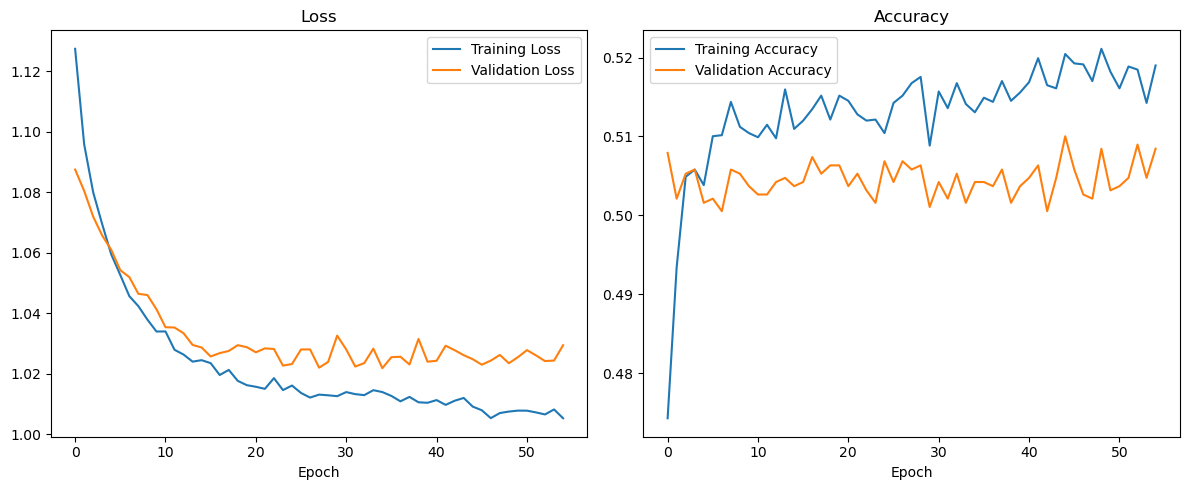

Neural network model saved as 'models/nn_result_model_league_8_20250519_171205.h5'
Model metadata saved as 'models/nn_result_model_league_8_20250519_171205.pkl'

Training neural network for over_under prediction in Premier League...
Epoch 1/100
107/237 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5253 - loss: 0.8078  

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.5208 - loss: 0.7978 - val_accuracy: 0.5554 - val_loss: 0.7504 - learning_rate: 0.0010
Epoch 2/100
132/237 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.5228 - loss: 0.7644

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5180 - loss: 0.7621 - val_accuracy: 0.5369 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 3/100
181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.5023 - loss: 0.7470

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5044 - loss: 0.7463 - val_accuracy: 0.5369 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 4/100
135/237 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.5395 - loss: 0.7342

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.5363 - loss: 0.7337 - val_accuracy: 0.5469 - val_loss: 0.7261 - learning_rate: 0.0010
Epoch 5/100
160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.5418 - loss: 0.7277

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.5387 - loss: 0.7273 - val_accuracy: 0.5322 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 6/100
228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5392 - loss: 0.7200

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.5392 - loss: 0.7200 - val_accuracy: 0.5385 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 7/100
157/237 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.5226 - loss: 0.7175

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5239 - loss: 0.7170 - val_accuracy: 0.5427 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 8/100
152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.5486 - loss: 0.7111

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5462 - loss: 0.7109 - val_accuracy: 0.5417 - val_loss: 0.7080 - learning_rate: 0.0010
Epoch 9/100
148/237 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.5348 - loss: 0.7094

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5348 - loss: 0.7090 - val_accuracy: 0.5417 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 10/100
232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5275 - loss: 0.7046

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5274 - loss: 0.7046 - val_accuracy: 0.5380 - val_loss: 0.7007 - learning_rate: 0.0010
Epoch 11/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5355 - loss: 0.7016

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5345 - loss: 0.7015 - val_accuracy: 0.5496 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 12/100
108/237 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5354 - loss: 0.6995

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.5351 - loss: 0.7000 - val_accuracy: 0.5422 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 13/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.5404 - loss: 0.6986 - val_accuracy: 0.5406 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 14/100
145/237 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.5507 - loss: 0.6950

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.5429 - loss: 0.6958 - val_accuracy: 0.5480 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 15/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5361 - loss: 0.6955 - val_accuracy: 0.5311 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 16/100
129/237 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.5351 - loss: 0.6949

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.5333 - loss: 0.6950 - val_accuracy: 0.5422 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5405 - loss: 0.6944 - val_accuracy: 0.5280 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 18/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5464 - loss: 0.6928 - val_accuracy: 0.5343 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 19/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5254 - loss: 0.6934 - val_accuracy: 0.5438 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.5343 - loss: 0.6935 - val_accuracy: 0.5374 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5466 - loss: 0.6912 - val_accuracy: 0.5316 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 22/100
154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.5346 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5342 - loss: 0.6925 - val_accuracy: 0.5454 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 23/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5386 - loss: 0.6918 - val_accuracy: 0.5522 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 24/100
131/237 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.5262 - loss: 0.6927

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5285 - loss: 0.6928 - val_accuracy: 0.5369 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 25/100
136/237 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.5378 - loss: 0.6930

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5374 - loss: 0.6930 - val_accuracy: 0.5464 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.5297 - loss: 0.6915 - val_accuracy: 0.5417 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5425 - loss: 0.6906 - val_accuracy: 0.5422 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 28/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5311 - loss: 0.6912 - val_accuracy: 0.5343 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5454 - loss: 0.6904 - val_accuracy: 0.5311 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 30/100
163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5395 - loss: 0.6918

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.5400 - loss: 0.6916 - val_accuracy: 0.5380 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5445 - loss: 0.6895 - val_accuracy: 0.5417 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 32/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5471 - loss: 0.6906 - val_accuracy: 0.5401 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 33/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.5388 - loss: 0.6910 - val_accuracy: 0.5401 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 34/100
133/237 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.5215 - loss: 0.6938

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5277 - loss: 0.6927 - val_accuracy: 0.5454 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 35/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.5307 - loss: 0.6915 - val_accuracy: 0.5396 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 36/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.5460 - loss: 0.6894 - val_accuracy: 0.5327 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 37/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5419 - loss: 0.6913 - val_accuracy: 0.5348 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 38/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5505 - loss: 0.6894 - val_accuracy: 0.5258 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 39/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5285 - loss: 0.6923 - val_accuracy: 0.5422 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 40/100
135/237 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.5319 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5341 - loss: 0.6918 - val_accuracy: 0.5348 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 41/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.5525 - loss: 0.6890 - val_accuracy: 0.5443 - val_loss: 0.6904 - learning_rate: 0.0010
Epoch 42/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5415 - loss: 0.6912 - val_accuracy: 0.5469 - val_loss: 0.6896 - learning_rate: 0.0010
Epoch 43/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5487 - loss: 0.6890 - val_accuracy: 0.5538 - val_loss: 0.6891 - learning_rate: 0.0010
Epoch 44/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5386 - loss: 0.6905 - val_accuracy: 0.5322 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 45/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5570 - loss: 0.6890 - val_accuracy: 0.5332 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 46/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5449 - 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5369 - loss: 0.6901 - val_accuracy: 0.5506 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 50/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5580 - loss: 0.6877 - val_accuracy: 0.5469 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 51/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5389 - loss: 0.6913 - val_accuracy: 0.5390 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 52/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5509 - loss: 0.6889 - val_accuracy: 0.5338 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 53/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5368 - loss: 0.6911 - val_accuracy: 0.5396 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 54/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5541 - loss: 0.6872 - val_accuracy: 0.5506 - val_loss: 0.6899 - learning_rate: 0.0010
Epoch 55/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5476 - 

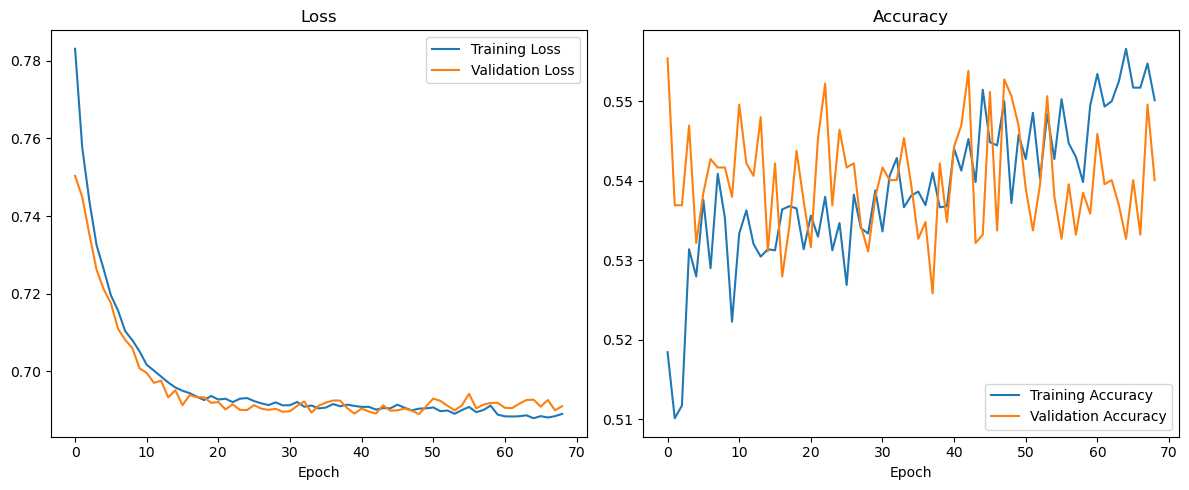

Neural network model saved as 'models/nn_over_under_model_league_8_20250519_171213.h5'
Model metadata saved as 'models/nn_over_under_model_league_8_20250519_171213.pkl'

Training neural network for cards prediction in Premier League...
Epoch 1/100
231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5339 - loss: 0.7790

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.5341 - loss: 0.7786 - val_accuracy: 0.3586 - val_loss: 0.8010 - learning_rate: 0.0010
Epoch 2/100
206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5501 - loss: 0.7398

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5511 - loss: 0.7392 - val_accuracy: 0.3391 - val_loss: 0.7923 - learning_rate: 0.0010
Epoch 3/100
140/237 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.5746 - loss: 0.7269

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.5733 - loss: 0.7250 - val_accuracy: 0.3428 - val_loss: 0.7755 - learning_rate: 0.0010
Epoch 4/100
160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.5661 - loss: 0.7164

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5673 - loss: 0.7154 - val_accuracy: 0.3386 - val_loss: 0.7733 - learning_rate: 0.0010
Epoch 5/100
140/237 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.5636 - loss: 0.7077

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.5648 - loss: 0.7067 - val_accuracy: 0.3333 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 6/100
 71/237 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5635 - loss: 0.7103

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.5695 - loss: 0.7034 - val_accuracy: 0.3470 - val_loss: 0.7594 - learning_rate: 0.0010
Epoch 7/100
156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.5708 - loss: 0.7024

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5724 - loss: 0.6995 - val_accuracy: 0.4056 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 8/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5846 - loss: 0.6907 - val_accuracy: 0.3750 - val_loss: 0.7513 - learning_rate: 0.0010
Epoch 9/100
161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.5808 - loss: 0.6847

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5796 - loss: 0.6855 - val_accuracy: 0.4335 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 10/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5800 - loss: 0.6839 - val_accuracy: 0.3903 - val_loss: 0.7433 - learning_rate: 0.0010
Epoch 11/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5819 - loss: 0.6765 - val_accuracy: 0.3861 - val_loss: 0.7424 - learning_rate: 0.0010
Epoch 12/100
165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.5807 - loss: 0.6783

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5785 - loss: 0.6794 - val_accuracy: 0.4441 - val_loss: 0.7276 - learning_rate: 0.0010
Epoch 13/100
158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.5861 - loss: 0.6762

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5851 - loss: 0.6762 - val_accuracy: 0.4842 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 14/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5886 - loss: 0.6753 - val_accuracy: 0.4436 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 15/100
164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.5803 - loss: 0.6772

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.5822 - loss: 0.6763 - val_accuracy: 0.4947 - val_loss: 0.7168 - learning_rate: 0.0010
Epoch 16/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5843 - loss: 0.6719 - val_accuracy: 0.4647 - val_loss: 0.7238 - learning_rate: 0.0010
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.5793 - loss: 0.6706 - val_accuracy: 0.4494 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 18/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5797 - loss: 0.6728 - val_accuracy: 0.4715 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 19/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5838 - loss: 0.6734 - val_accuracy: 0.4056 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5765 - loss: 0.6720 - val_accuracy: 0.4383 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5872 - 

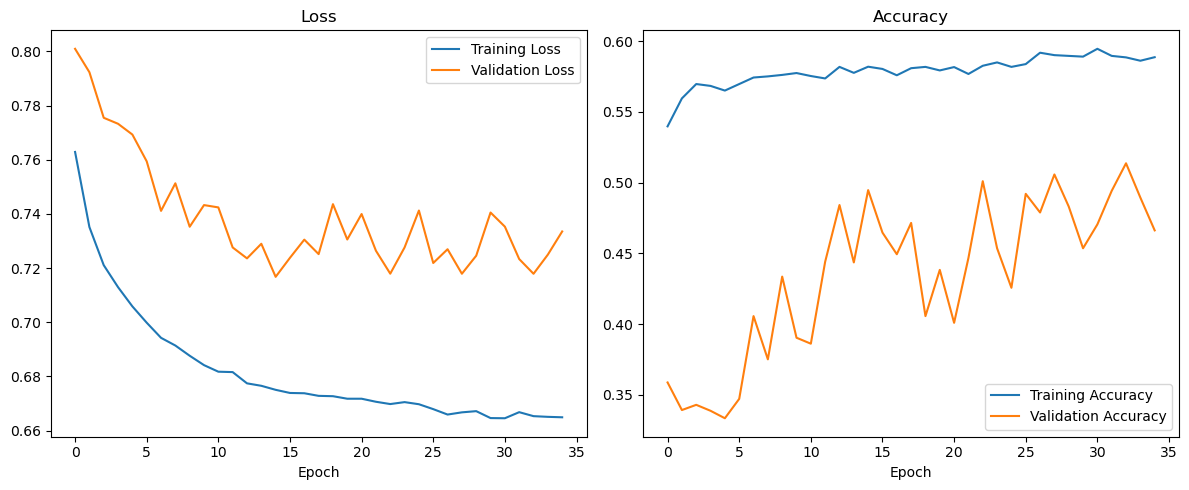

Neural network model saved as 'models/nn_cards_model_league_8_20250519_171222.h5'
Model metadata saved as 'models/nn_cards_model_league_8_20250519_171222.pkl'


In [59]:
# Cell 16: Train neural network models

if not TF_AVAILABLE:
    print("TensorFlow is not available. Neural network models cannot be trained.")
else:
    # Ask if we should train for all leagues or a specific one
    all_leagues = input("Train neural networks for all leagues? (y/n): ").lower() == 'y'
    
    if all_leagues:
        # Get all leagues
        leagues_query = """
        SELECT DISTINCT l.id, l.name 
        FROM leagues l
        JOIN fixtures f ON l.id = f.league_id
        WHERE f.score_home IS NOT NULL
        ORDER BY l.name
        """
        
        leagues_df = pd.read_sql_query(leagues_query, conn)
        
        for _, league in leagues_df.iterrows():
            league_id = league['id']
            league_name = league['name']
            
            print(f"\nTraining neural network models for {league_name}...")
            
            # Get features and targets
            X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
            
            if X is None:
                print(f"Insufficient data for {league_name}")
                continue
            
            # Train neural network models
            build_neural_network_model(X, y_result, 'result', league_id, league_name)
            build_neural_network_model(X, y_over_under, 'over_under', league_id, league_name)
            build_neural_network_model(X, y_cards, 'cards', league_id, league_name)
    else:
        # Get available leagues
        leagues_query = """
        SELECT DISTINCT l.id, l.name 
        FROM leagues l
        JOIN fixtures f ON l.id = f.league_id
        WHERE f.score_home IS NOT NULL
        ORDER BY l.name
        """
        
        leagues_df = pd.read_sql_query(leagues_query, conn)
        
        print("\nAvailable leagues:")
        for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
            print(f"{i}. {league['name']} (ID: {league['id']})")
        
        league_choice = input("\nEnter league number: ")
        try:
            league_idx = int(league_choice) - 1
            if 0 <= league_idx < len(leagues_df):
                league_id = leagues_df.iloc[league_idx]['id']
                league_name = leagues_df.iloc[league_idx]['name']
                
                print(f"\nTraining neural network models for {league_name}...")
                
                # Get features and targets
                X, y_result, y_over_under, y_cards, full_df = prepare_features_and_targets(conn, league_id)
                
                if X is None:
                    print(f"Insufficient data for {league_name}")
                else:
                    # Train neural network models
                    model_type = input("Which model type? (1=result, 2=over_under, 3=cards, 4=all): ")
                    
                    if model_type == '1' or model_type == '4':
                        build_neural_network_model(X, y_result, 'result', league_id, league_name)
                    
                    if model_type == '2' or model_type == '4':
                        build_neural_network_model(X, y_over_under, 'over_under', league_id, league_name)
                    
                    if model_type == '3' or model_type == '4':
                        build_neural_network_model(X, y_cards, 'cards', league_id, league_name)
            else:
                print("Invalid league number")
        except ValueError:
            print("Invalid input")

In [60]:
# Cell 23: Predict with Neural Network Models

# First, let's update the function to load neural network models
def load_nn_model(model_path):
    """Load a saved neural network model and its metadata"""
    # The model file is .h5, but metadata is in .pkl
    metadata_path = model_path.replace('.h5', '.pkl')
    
    # Load the model metadata
    with open(metadata_path, 'rb') as f:
        model_data = pickle.load(f)
    
    # Load the actual model
    if TF_AVAILABLE:
        model = tf.keras.models.load_model(model_path)
        model_data['model'] = model
        return model_data
    else:
        print("TensorFlow is not available. Cannot load neural network model.")
        return None

# Update the get_latest_model function to also check for neural network models
def get_latest_model_with_nn(league_id, model_type, include_nn=True):
    """Find the latest model for a specific league and prediction type, including neural networks if requested"""
    # First, check in the custom directory
    model_dir = '/Users/sebastianvinther/Desktop/Sportsmonks/models'
    
    if not os.path.exists(model_dir):
        print(f"Custom models directory not found. Checking local directory...")
        # Fall back to the local models directory
        model_dir = 'models'
        if not os.path.exists(model_dir):
            print(f"No models directory found. Please train models first.")
            return None, None
    
    model_files = os.listdir(model_dir)
    
    # Filter for the requested league and model type (traditional models)
    trad_matching_models = [f for f in model_files if f.startswith(f"{model_type}_model_league_{league_id}_") and f.endswith('.pkl')]
    
    # For neural networks, we need to check for both .h5 and .pkl files
    nn_matching_models = []
    if include_nn and TF_AVAILABLE:
        nn_matching_models = [f for f in model_files if f.startswith(f"nn_{model_type}_model_league_{league_id}_") and f.endswith('.h5')]
    
    # If both types exist, prefer neural network if it's newer
    if trad_matching_models and nn_matching_models:
        latest_trad = sorted(trad_matching_models)[-1]
        latest_nn = sorted(nn_matching_models)[-1]
        
        # Extract timestamps to compare
        trad_timestamp = latest_trad.split('_')[-1].replace('.pkl', '')
        nn_timestamp = latest_nn.split('_')[-1].replace('.h5', '')
        
        if nn_timestamp > trad_timestamp:
            full_path = os.path.join(model_dir, latest_nn)
            print(f"Using neural network model: {full_path}")
            return full_path, 'neural'
        else:
            full_path = os.path.join(model_dir, latest_trad)
            print(f"Using traditional model: {full_path}")
            return full_path, 'traditional'
    
    # If only traditional models exist
    elif trad_matching_models:
        latest_model = sorted(trad_matching_models)[-1]
        full_path = os.path.join(model_dir, latest_model)
        print(f"Using traditional model: {full_path}")
        return full_path, 'traditional'
    
    # If only neural network models exist
    elif nn_matching_models and TF_AVAILABLE:
        latest_model = sorted(nn_matching_models)[-1]
        full_path = os.path.join(model_dir, latest_model)
        print(f"Using neural network model: {full_path}")
        return full_path, 'neural'
    
    # No models found
    else:
        print(f"No {model_type} model found for league {league_id}")
        return None, None

# Define a new function to predict with neural networks if available
def predict_with_best_model(conn, fixture_id, prefer_nn=True):
    """
    Predict match outcomes using the best available model (neural network or traditional)
    
    Parameters:
    conn - Database connection
    fixture_id - ID of the fixture to predict
    prefer_nn - Whether to prefer neural network models when available
    
    Returns:
    Dictionary with predictions and probabilities
    """
    # Prepare features for prediction
    features_df, fixture = prepare_prediction_features(conn, fixture_id)
    
    if features_df is None:
        return {"error": f"Fixture with ID {fixture_id} not found"}
    
    league_id = fixture['league_id']
    league_name = fixture['league_name']
    home_team = fixture['home_team']
    away_team = fixture['away_team']
    
    # Dictionary to store predictions
    predictions = {
        "fixture_id": fixture_id,
        "league_id": league_id,
        "league_name": league_name,
        "match": f"{home_team} vs {away_team}",
        "date": fixture['starting_at'],
        "predictions": {},
        "model_types": {}  # To track which type of model was used
    }
    
    # Model types to predict
    model_types = ['match_result', 'over_under', 'cards']
    
    for model_type in model_types:
        # Find best model for this league and type
        model_path, model_type_used = get_latest_model_with_nn(league_id, model_type, include_nn=prefer_nn)
        
        if model_path is None:
            predictions["predictions"][model_type.replace('match_', '')] = {
                "status": "No model available",
                "probabilities": None
            }
            continue
            
        try:
            # Load the appropriate model
            if model_type_used == 'neural':
                model_data = load_nn_model(model_path)
            else:
                model_data = load_model(model_path)
                
            model = model_data['model']
            scaler = model_data['scaler']
            feature_columns = model_data['feature_columns']
            problem_type = model_data['problem_type']
            
            # Store which model type was used
            predictions["model_types"][model_type.replace('match_', '')] = model_type_used
            
            # Ensure features match the model's expected columns
            features_for_model = features_df.reindex(columns=feature_columns, fill_value=0)
            
            # Scale features
            features_scaled = scaler.transform(features_for_model)
            
            # Make predictions
            if model_type_used == 'neural':
                # Neural network prediction
                if problem_type == 'multiclass':
                    # Result prediction
                    probabilities = model.predict(features_scaled, verbose=0)[0]
                    predicted_class = np.argmax(probabilities)
                    result_names = ['Draw', 'Home Win', 'Away Win']
                    prob_dict = {result_names[i]: float(probabilities[i]) for i in range(len(result_names))}
                    prediction = result_names[predicted_class]
                else:
                    # Binary prediction (over/under)
                    probabilities = model.predict(features_scaled, verbose=0)[0]
                    predicted_class = 1 if probabilities[0] > 0.5 else 0
                    prob_dict = {
                        'Under': float(1.0 - probabilities[0]),
                        'Over': float(probabilities[0])
                    }
                    prediction = 'Over' if predicted_class == 1 else 'Under'
            else:
                # Traditional model prediction
                if hasattr(model, 'predict_proba'):
                    probabilities = model.predict_proba(features_scaled)
                    predicted_class = model.predict(features_scaled)[0]
                    
                    if problem_type == 'multiclass':
                        # Result prediction
                        result_names = ['Draw', 'Home Win', 'Away Win']
                        prob_dict = {result_names[i]: float(probabilities[0][i]) for i in range(len(result_names))}
                        prediction = result_names[predicted_class]
                    else:
                        # Binary prediction (over/under)
                        prob_dict = {
                            'Under': float(probabilities[0][0]),
                            'Over': float(probabilities[0][1])
                        }
                        prediction = 'Over' if predicted_class == 1 else 'Under'
                else:
                    # Fallback for models without predict_proba
                    prediction = model.predict(features_scaled)[0]
                    prob_dict = None
            
            # Store prediction
            confidence = max(prob_dict.values()) if prob_dict else None
            predictions["predictions"][model_type.replace('match_', '')] = {
                "prediction": prediction,
                "probabilities": prob_dict,
                "confidence": confidence
            }
            
        except Exception as e:
            print(f"Error using {model_type} model for league {league_id}: {e}")
            predictions["predictions"][model_type.replace('match_', '')] = {
                "status": f"Error: {str(e)}",
                "probabilities": None
            }
    
    return predictions

# Now let's use this function to predict upcoming matches
# Ask if we should predict for all leagues or a specific one
all_leagues = input("Predict for all leagues? (y/n): ").lower() == 'y'

if all_leagues:
    league_id = None
    print("Predicting for all leagues with available models...")
else:
    # Get available leagues with upcoming matches
    leagues_query = """
    SELECT DISTINCT l.id, l.name 
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.starting_at >= DATE('now')
    AND f.score_home IS NULL
    ORDER BY l.name
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    
    if leagues_df.empty:
        print("No leagues with upcoming matches found.")
        league_id = None
    else:
        print("\nAvailable leagues with upcoming matches:")
        for i, (_, league) in enumerate(leagues_df.iterrows(), 1):
            print(f"{i}. {league['name']} (ID: {league['id']})")
        
        league_choice = input("\nEnter league number: ")
        try:
            league_idx = int(league_choice) - 1
            if 0 <= league_idx < len(leagues_df):
                league_id = leagues_df.iloc[league_idx]['id']
                print(f"Selected league: {leagues_df.iloc[league_idx]['name']}")
            else:
                print("Invalid league number. Predicting for all leagues.")
                league_id = None
        except ValueError:
            print("Invalid input. Predicting for all leagues.")
            league_id = None

# Ask if neural network models should be preferred
use_nn = input("Prefer neural network models when available? (y/n): ").lower() == 'y'

# Get number of days ahead to predict
days = input("Number of days ahead to predict (default 7): ")
try:
    days_ahead = int(days) if days else 7
except ValueError:
    print("Invalid input. Using default of 7 days.")
    days_ahead = 7

# Get upcoming fixtures
today = datetime.now().strftime('%Y-%m-%d')
future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')

league_filter = f"AND f.league_id = {league_id}" if league_id else ""

fixtures_query = f"""
SELECT 
    f.id as fixture_id,
    f.league_id,
    l.name as league_name,
    f.starting_at,
    ht.name as home_team,
    at.name as away_team
FROM 
    fixtures f
JOIN 
    teams ht ON f.home_team_id = ht.id
JOIN 
    teams at ON f.away_team_id = at.id
JOIN
    leagues l ON f.league_id = l.id
WHERE 
    f.starting_at BETWEEN '{today}' AND '{future_date}'
    AND f.score_home IS NULL
    {league_filter}
ORDER BY 
    f.starting_at
"""

fixtures_df = pd.read_sql_query(fixtures_query, conn)

if fixtures_df.empty:
    print(f"No upcoming fixtures found within the next {days_ahead} days")
else:
    print(f"Found {len(fixtures_df)} upcoming fixtures")
    
    # Make predictions for each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        league_id = fixture['league_id']
        
        # Make prediction using best available model
        print(f"\nMaking predictions for {fixture['home_team']} vs {fixture['away_team']} (League: {fixture['league_name']})")
        predictions = predict_with_best_model(conn, fixture_id, prefer_nn=use_nn)
        all_predictions.append(predictions)
    
    # Display predictions
    if all_predictions:
        print("\n\nPREDICTION RESULTS:")
        for pred in all_predictions:
            match = pred['match']
            date = pred['date']
            
            print(f"\n{'-'*80}")
            print(f"Match: {match} | Date: {date} | League: {pred['league_name']}")
            
            # Display match result prediction
            if 'result' in pred['predictions']:
                result_pred = pred['predictions']['result']
                model_type = pred.get('model_types', {}).get('result', 'unknown')
                
                if isinstance(result_pred, dict) and result_pred.get('probabilities') is not None:
                    print(f"\nMatch Result Prediction ({model_type} model):")
                    print(f"Prediction: {result_pred['prediction']} (Confidence: {result_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in result_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nMatch Result: No prediction available")
            
            # Display over/under 2.5 goals prediction
            if 'over_under' in pred['predictions']:
                ou_pred = pred['predictions']['over_under']
                model_type = pred.get('model_types', {}).get('over_under', 'unknown')
                
                if isinstance(ou_pred, dict) and ou_pred.get('probabilities') is not None:
                    print(f"\nOver/Under 2.5 Goals Prediction ({model_type} model):")
                    print(f"Prediction: {ou_pred['prediction']} (Confidence: {ou_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in ou_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nOver/Under 2.5 Goals: No prediction available")
            
            # Display cards over/under prediction
            if 'cards' in pred['predictions']:
                cards_pred = pred['predictions']['cards']
                model_type = pred.get('model_types', {}).get('cards', 'unknown')
                
                if isinstance(cards_pred, dict) and cards_pred.get('probabilities') is not None:
                    print(f"\nCards Over/Under Prediction ({model_type} model):")
                    print(f"Prediction: {cards_pred['prediction']} (Confidence: {cards_pred['confidence']:.2f})")
                    print("Probabilities:")
                    for outcome, prob in cards_pred['probabilities'].items():
                        print(f"  {outcome}: {prob:.2f}")
                else:
                    print("\nCards Over/Under: No prediction available")
    else:
        print("No predictions were made. Check if models exist for the leagues with upcoming matches.")


Available leagues with upcoming matches:
1. 1. HNL (ID: 244)
2. Admiral Bundesliga (ID: 181)
3. Allsvenskan (ID: 573)
4. Championship (ID: 9)
5. Ekstraklasa (ID: 453)
6. Eliteserien (ID: 444)
7. La Liga (ID: 564)
8. La Liga 2 (ID: 567)
9. Premier League (ID: 8)
10. Premier League (ID: 486)
11. Premier League (ID: 609)
12. Pro League (ID: 208)
13. Serie A (ID: 384)
14. Serie B (ID: 387)
15. Super League (ID: 591)
16. Super Lig (ID: 600)
17. Superliga (ID: 271)
Selected league: Premier League


Found 13 upcoming fixtures

Making predictions for Brighton & Hove Albion vs Liverpool (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Crystal Palace vs Wolverhampton Wanderers (League: Premier League)


Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Manchester City vs AFC Bournemouth (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5


Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5



Making predictions for AFC Bournemouth vs Leicester City (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5


Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5



Making predictions for Fulham vs Manchester City (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Ipswich Town vs West Ham United (League: Premier League)


Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Liverpool vs Crystal Palace (League: Premier League)


Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Manchester United vs Aston Villa (League: Premier League)


Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5


Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Newcastle United vs Everton (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5


Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Nottingham Forest vs Chelsea (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5



Making predictions for Southampton vs Arsenal (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Tottenham Hotspur vs Brighton & Hove Albion (League: Premier League)


Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Making predictions for Wolverhampton Wanderers vs Brentford (League: Premier League)
Using traditional model: /Users/sebastianvinther/Desktop/Sportsmonks/models/match_result_model_league_8_20250518_170653.pkl
Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5


Using neural network model: /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5


PREDICTION RESULTS:

--------------------------------------------------------------------------------
Match: Brighton & Hove Albion vs Liverpool | Date: 2025-05-19 19:00:00 | League: Premier League

Match Result Prediction (traditional model):
Prediction: Home Win (Confidence: 0.43)
Probabilities:
  Draw: 0.26
  Home Win: 0.43
  Away Win: 0.31

Over/Under 2.5 Goals Prediction (neural model):
Prediction: Over (Confidence: 0.55)
Probabilities:
  Under: 0.45
  Over: 0.55

Cards Over/Under Prediction (neural model):
Prediction: Over (Confidence: 0.53)
Probabilities:
  Under: 0.47
  Over: 0.53

--------------------------------------------------------------------------------
Match: Crystal Palace vs Wolverhampton Wanderers | Date: 2025-05-20 19:00:00 | League: Premier League

Match Result Prediction (traditional model):
Prediction: Home Win (Confidence: 0.52)
Probabilit

In [61]:
# Cell 26: Advanced Neural Network Model Finder

def check_nn_result_models(league_id=8):
    """Check for all neural network result models for a specific league"""
    model_dir = '/Users/sebastianvinther/Desktop/Sportsmonks/models'
    
    if not os.path.exists(model_dir):
        print(f"Models directory not found: {model_dir}")
        return
    
    # Get all files
    all_files = os.listdir(model_dir)
    
    # Look for neural network models (.h5 files)
    nn_models = [f for f in all_files if f.endswith('.h5')]
    
    # Find all possible patterns for match result models
    patterns = [
        f'nn_result_model_league_{league_id}',  # Standard pattern
        f'nn_match_result_model_league_{league_id}',  # Alternate pattern
        f'result_model_nn_league_{league_id}'  # Another possible pattern
    ]
    
    # Look for any match result models
    result_models = []
    for pattern in patterns:
        pattern_matches = [f for f in nn_models if pattern in f]
        result_models.extend(pattern_matches)
    
    # Look for any file with 'result' in the name for this league
    broader_matches = [f for f in nn_models if 'result' in f.lower() and f'league_{league_id}' in f]
    
    print(f"Neural network models for league {league_id}:")
    print(f"  Standard pattern matches: {[f for f in nn_models if patterns[0] in f]}")
    print(f"  Alternate pattern matches: {[f for f in nn_models if patterns[1] in f]}")
    print(f"  Another possible pattern matches: {[f for f in nn_models if patterns[2] in f]}")
    print(f"  Any model with 'result' in name: {broader_matches}")
    
    # Show all neural network models for this league (for any model type)
    all_league_models = [f for f in nn_models if f'league_{league_id}' in f]
    print(f"\nAll neural network models for league {league_id}: {len(all_league_models)} models")
    for model in all_league_models:
        print(f"  - {model}")

# Run the check
check_nn_result_models(8)  # Check for Premier League (ID: 8)

Neural network models for league 8:
  Standard pattern matches: ['nn_result_model_league_8_20250518_180246.h5', 'nn_result_model_league_8_20250519_171205.h5']
  Alternate pattern matches: []
  Another possible pattern matches: []
  Any model with 'result' in name: ['nn_result_model_league_8_20250518_180246.h5', 'nn_result_model_league_8_20250519_171205.h5']

All neural network models for league 8: 4 models
  - nn_over_under_model_league_8_20250519_171213.h5
  - nn_result_model_league_8_20250518_180246.h5
  - nn_cards_model_league_8_20250519_171222.h5
  - nn_result_model_league_8_20250519_171205.h5


In [63]:
# Cell 29: Ultra-Simple Premier League Neural Network Prediction

# Define model paths
RESULT_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_result_model_league_8_20250519_171205.h5'
OVER_UNDER_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5'
CARDS_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5'

def predict_premier_league_matches(conn, days_ahead=7):
    """Predict Premier League matches using neural network models"""
    # Get upcoming fixtures for Premier League
    today = datetime.now().strftime('%Y-%m-%d')
    future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')
    
    fixtures_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        l.name as league_name,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.league_id = 8
        AND f.starting_at BETWEEN '{today}' AND '{future_date}'
        AND f.score_home IS NULL
    ORDER BY 
        f.starting_at
    """
    
    fixtures_df = pd.read_sql_query(fixtures_query, conn)
    
    if fixtures_df.empty:
        print(f"No upcoming Premier League fixtures found within the next {days_ahead} days")
        return
    
    print(f"Found {len(fixtures_df)} upcoming Premier League fixtures")
    
    # Load neural network models
    print("\nLoading neural network models...")
    
    # Load result model
    result_model = tf.keras.models.load_model(RESULT_MODEL_PATH)
    print(f"Loaded result model from {RESULT_MODEL_PATH}")
    
    # Load over/under model
    over_under_model = tf.keras.models.load_model(OVER_UNDER_MODEL_PATH)
    print(f"Loaded over/under model from {OVER_UNDER_MODEL_PATH}")
    
    # Load cards model
    cards_model = tf.keras.models.load_model(CARDS_MODEL_PATH)
    print(f"Loaded cards model from {CARDS_MODEL_PATH}")
    
    # Process each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        print(f"\nPredicting {fixture['home_team']} vs {fixture['away_team']}...")
        
        # Get features for this fixture
        features_df, fixture_data = prepare_prediction_features(conn, fixture_id)
        
        if features_df is None:
            print(f"Could not get features for fixture {fixture_id}")
            continue
        
        # Make predictions
        features = features_df.values
        
        # Match result prediction
        result_probs = result_model.predict(features, verbose=0)[0]
        result_class = np.argmax(result_probs)
        result_names = ['Draw', 'Home Win', 'Away Win']
        result_prediction = result_names[result_class]
        result_confidence = float(result_probs[result_class])
        
        # Over/Under prediction
        ou_prob = float(over_under_model.predict(features, verbose=0)[0])
        ou_prediction = "Over" if ou_prob > 0.5 else "Under"
        ou_confidence = max(ou_prob, 1.0 - ou_prob)
        
        # Cards prediction
        cards_prob = float(cards_model.predict(features, verbose=0)[0])
        cards_prediction = "Over" if cards_prob > 0.5 else "Under"
        cards_confidence = max(cards_prob, 1.0 - cards_prob)
        
        # Store prediction
        prediction = {
            "match": f"{fixture['home_team']} vs {fixture['away_team']}",
            "date": fixture['starting_at'],
            "league": fixture['league_name'],
            "result": {
                "prediction": result_prediction,
                "confidence": result_confidence,
                "probabilities": {
                    "Draw": float(result_probs[0]),
                    "Home Win": float(result_probs[1]),
                    "Away Win": float(result_probs[2])
                }
            },
            "over_under": {
                "prediction": ou_prediction,
                "confidence": ou_confidence,
                "probabilities": {
                    "Under": float(1.0 - ou_prob),
                    "Over": float(ou_prob)
                }
            },
            "cards": {
                "prediction": cards_prediction,
                "confidence": cards_confidence,
                "probabilities": {
                    "Under": float(1.0 - cards_prob),
                    "Over": float(cards_prob)
                }
            }
        }
        
        all_predictions.append(prediction)
    
    # Display predictions
    print("\n\nPREDICTION RESULTS (Neural Network Models):")
    for pred in all_predictions:
        print(f"\n{'-'*80}")
        print(f"Match: {pred['match']} | Date: {pred['date']} | League: {pred['league']}")
        
        # Match result
        print("\nMatch Result Prediction (neural network):")
        print(f"Prediction: {pred['result']['prediction']} (Confidence: {pred['result']['confidence']:.2f})")
        print("Probabilities:")
        for outcome, prob in pred['result']['probabilities'].items():
            print(f"  {outcome}: {prob:.2f}")
        
        # Over/Under
        print("\nOver/Under 2.5 Goals Prediction (neural network):")
        print(f"Prediction: {pred['over_under']['prediction']} (Confidence: {pred['over_under']['confidence']:.2f})")
        print("Probabilities:")
        for outcome, prob in pred['over_under']['probabilities'].items():
            print(f"  {outcome}: {prob:.2f}")
        
        # Cards
        print("\nCards Over/Under Prediction (neural network):")
        print(f"Prediction: {pred['cards']['prediction']} (Confidence: {pred['cards']['confidence']:.2f})")
        print("Probabilities:")
        for outcome, prob in pred['cards']['probabilities'].items():
            print(f"  {outcome}: {prob:.2f}")
    
    return all_predictions

# Run predictions
predict_premier_league_matches(conn)

Found 13 upcoming Premier League fixtures

Loading neural network models...
Loaded result model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_result_model_league_8_20250519_171205.h5
Loaded over/under model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Loaded cards model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Predicting Brighton & Hove Albion vs Liverpool...

Predicting Crystal Palace vs Wolverhampton Wanderers...

Predicting Manchester City vs AFC Bournemouth...

Predicting AFC Bournemouth vs Leicester City...

Predicting Fulham vs Manchester City...

Predicting Ipswich Town vs West Ham United...

Predicting Liverpool vs Crystal Palace...

Predicting Manchester United vs Aston Villa...

Predicting Newcastle United vs Everton...

Predicting Nottingham Forest vs Chelsea...

Predicting Southampton vs Arsenal...

Predicting Tottenham Hotspur vs Brighton & Hov

[{'match': 'Brighton & Hove Albion vs Liverpool',
  'date': '2025-05-19 19:00:00',
  'league': 'Premier League',
  'result': {'prediction': 'Away Win',
   'confidence': 0.39044836163520813,
   'probabilities': {'Draw': 0.28676655888557434,
    'Home Win': 0.3227851390838623,
    'Away Win': 0.39044836163520813}},
  'over_under': {'prediction': 'Over',
   'confidence': 0.5360209345817566,
   'probabilities': {'Under': 0.4639790654182434, 'Over': 0.5360209345817566}},
  'cards': {'prediction': 'Over',
   'confidence': 0.5160983204841614,
   'probabilities': {'Under': 0.4839016795158386,
    'Over': 0.5160983204841614}}},
 {'match': 'Crystal Palace vs Wolverhampton Wanderers',
  'date': '2025-05-20 19:00:00',
  'league': 'Premier League',
  'result': {'prediction': 'Home Win',
   'confidence': 0.4191441237926483,
   'probabilities': {'Draw': 0.2681911885738373,
    'Home Win': 0.4191441237926483,
    'Away Win': 0.3126646876335144}},
  'over_under': {'prediction': 'Over',
   'confidence':

Now the next step after we've successfully made the predictions, we need to store the results of the predictions, so we can keep track of the accuracy and the ROI from the odds


In [64]:
# Cell 30: Store Premier League Predictions

def predict_and_store_premier_league(conn, days_ahead=7, output_file='premier_league_predictions.pkl'):
    """
    Predict Premier League matches using neural network models and store the results
    
    Parameters:
    conn - Database connection
    days_ahead - Number of days ahead to predict
    output_file - File to save predictions to
    
    Returns:
    List of predictions
    """
    # Define model paths
    RESULT_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_result_model_league_8_20250519_171205.h5'
    OVER_UNDER_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5'
    CARDS_MODEL_PATH = '/Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5'
    
    # Get upcoming fixtures for Premier League
    today = datetime.now().strftime('%Y-%m-%d')
    future_date = (datetime.now() + pd.Timedelta(days=days_ahead)).strftime('%Y-%m-%d')
    
    fixtures_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        l.name as league_name,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.league_id = 8
        AND f.starting_at BETWEEN '{today}' AND '{future_date}'
        AND f.score_home IS NULL
    ORDER BY 
        f.starting_at
    """
    
    fixtures_df = pd.read_sql_query(fixtures_query, conn)
    
    if fixtures_df.empty:
        print(f"No upcoming Premier League fixtures found within the next {days_ahead} days")
        return []
    
    print(f"Found {len(fixtures_df)} upcoming Premier League fixtures")
    
    # Load neural network models
    print("\nLoading neural network models...")
    
    # Load result model
    result_model = tf.keras.models.load_model(RESULT_MODEL_PATH)
    print(f"Loaded result model from {RESULT_MODEL_PATH}")
    
    # Load over/under model
    over_under_model = tf.keras.models.load_model(OVER_UNDER_MODEL_PATH)
    print(f"Loaded over/under model from {OVER_UNDER_MODEL_PATH}")
    
    # Load cards model
    cards_model = tf.keras.models.load_model(CARDS_MODEL_PATH)
    print(f"Loaded cards model from {CARDS_MODEL_PATH}")
    
    # Process each fixture
    all_predictions = []
    
    for _, fixture in fixtures_df.iterrows():
        fixture_id = fixture['fixture_id']
        print(f"\nPredicting {fixture['home_team']} vs {fixture['away_team']}...")
        
        # Get features for this fixture
        features_df, fixture_data = prepare_prediction_features(conn, fixture_id)
        
        if features_df is None:
            print(f"Could not get features for fixture {fixture_id}")
            continue
        
        # Make predictions
        features = features_df.values
        
        # Match result prediction
        result_probs = result_model.predict(features, verbose=0)[0]
        result_class = np.argmax(result_probs)
        result_names = ['Draw', 'Home Win', 'Away Win']
        result_prediction = result_names[result_class]
        result_confidence = float(result_probs[result_class])
        
        # Over/Under prediction
        ou_prob = float(over_under_model.predict(features, verbose=0)[0])
        ou_prediction = "Over" if ou_prob > 0.5 else "Under"
        ou_confidence = max(ou_prob, 1.0 - ou_prob)
        
        # Cards prediction
        cards_prob = float(cards_model.predict(features, verbose=0)[0])
        cards_prediction = "Over" if cards_prob > 0.5 else "Under"
        cards_confidence = max(cards_prob, 1.0 - cards_prob)
        
        # Store prediction with full fixture details
        prediction = {
            "fixture_id": fixture_id,
            "league_id": fixture['league_id'],
            "league_name": fixture['league_name'],
            "match_date": fixture['starting_at'],
            "home_team": fixture['home_team'],
            "away_team": fixture['away_team'],
            "match": f"{fixture['home_team']} vs {fixture['away_team']}",
            "predictions": {
                "result": {
                    "prediction": result_prediction,
                    "confidence": result_confidence,
                    "probabilities": {
                        "Draw": float(result_probs[0]),
                        "Home Win": float(result_probs[1]),
                        "Away Win": float(result_probs[2])
                    }
                },
                "over_under": {
                    "prediction": ou_prediction,
                    "confidence": ou_confidence,
                    "probabilities": {
                        "Under": float(1.0 - ou_prob),
                        "Over": float(ou_prob)
                    }
                },
                "cards": {
                    "prediction": cards_prediction,
                    "confidence": cards_confidence,
                    "probabilities": {
                        "Under": float(1.0 - cards_prob),
                        "Over": float(cards_prob)
                    }
                }
            },
            "prediction_time": datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        
        all_predictions.append(prediction)
    
    # Store predictions
    if all_predictions:
        # Create output directory if it doesn't exist
        output_dir = os.path.dirname(output_file)
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)
            
        # Save predictions to file
        with open(output_file, 'wb') as f:
            pickle.dump(all_predictions, f)
        
        print(f"\nSaved {len(all_predictions)} predictions to {output_file}")
    
    # Display predictions summary
    print("\nPREDICTION SUMMARY:")
    for pred in all_predictions:
        print(f"{pred['match']} ({pred['match_date']}): " + 
              f"Result: {pred['predictions']['result']['prediction']} ({pred['predictions']['result']['confidence']:.2f}), " + 
              f"Goals: {pred['predictions']['over_under']['prediction']} ({pred['predictions']['over_under']['confidence']:.2f}), " + 
              f"Cards: {pred['predictions']['cards']['prediction']} ({pred['predictions']['cards']['confidence']:.2f})")
    
    return all_predictions

# Function to load stored predictions
def load_premier_league_predictions(file_path='premier_league_predictions.pkl'):
    """Load stored Premier League predictions"""
    if not os.path.exists(file_path):
        print(f"No predictions file found at {file_path}")
        return None
        
    with open(file_path, 'rb') as f:
        predictions = pickle.load(f)
    
    print(f"Loaded {len(predictions)} predictions from {file_path}")
    return predictions

# Run prediction and storage
premier_league_predictions = predict_and_store_premier_league(conn)

# Optionally, test loading the saved predictions
loaded_predictions = load_premier_league_predictions()

Found 13 upcoming Premier League fixtures

Loading neural network models...
Loaded result model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_result_model_league_8_20250519_171205.h5
Loaded over/under model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_over_under_model_league_8_20250519_171213.h5
Loaded cards model from /Users/sebastianvinther/Desktop/Sportsmonks/models/nn_cards_model_league_8_20250519_171222.h5

Predicting Brighton & Hove Albion vs Liverpool...

Predicting Crystal Palace vs Wolverhampton Wanderers...

Predicting Manchester City vs AFC Bournemouth...

Predicting AFC Bournemouth vs Leicester City...

Predicting Fulham vs Manchester City...

Predicting Ipswich Town vs West Ham United...

Predicting Liverpool vs Crystal Palace...

Predicting Manchester United vs Aston Villa...

Predicting Newcastle United vs Everton...

Predicting Nottingham Forest vs Chelsea...

Predicting Southampton vs Arsenal...

Predicting Tottenham Hotspur vs Brighton & Hov

In [79]:
import os
import pickle
import numpy as np
import pandas as pd
import sqlite3
from datetime import datetime, timedelta
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

def prepare_prediction_features(conn, fixture_id):
    """Prepare features for prediction for a specific fixture"""
    # Get fixture information
    fixture_query = f"""
    SELECT 
        f.id as fixture_id,
        f.league_id,
        f.season_id,
        f.home_team_id,
        f.away_team_id,
        f.starting_at,
        ht.name as home_team,
        at.name as away_team,
        l.name as league_name
    FROM 
        fixtures f
    JOIN 
        teams ht ON f.home_team_id = ht.id
    JOIN 
        teams at ON f.away_team_id = at.id
    JOIN
        leagues l ON f.league_id = l.id
    WHERE 
        f.id = {fixture_id}
    """
    
    fixture_df = pd.read_sql_query(fixture_query, conn)
    
    if fixture_df.empty:
        print(f"Fixture with ID {fixture_id} not found")
        return None, None
    
    fixture = fixture_df.iloc[0]
    
    # Convert date string to datetime
    fixture_date = pd.to_datetime(fixture['starting_at'])
    home_team_id = fixture['home_team_id']
    away_team_id = fixture['away_team_id']
    
    # Define the get_team_form function
    def get_team_form(team_id, fixture_date, n_matches=5):
        """Get team's form in the last n matches before a specific date"""
        form_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 
                    CASE 
                        WHEN f.score_home > f.score_away THEN 'W'
                        WHEN f.score_home = f.score_away THEN 'D'
                        ELSE 'L'
                    END
                ELSE 
                    CASE 
                        WHEN f.score_away > f.score_home THEN 'W'
                        WHEN f.score_away = f.score_home THEN 'D'
                        ELSE 'L'
                    END
            END as result,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_home
                ELSE f.score_away
            END as goals_for,
            CASE 
                WHEN f.home_team_id = {team_id} THEN f.score_away
                ELSE f.score_home
            END as goals_against,
            CASE 
                WHEN f.home_team_id = {team_id} THEN 1
                ELSE 0
            END as was_home
        FROM 
            fixtures f
        WHERE 
            (f.home_team_id = {team_id} OR f.away_team_id = {team_id})
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        team_form_df = pd.read_sql_query(form_query, conn)
        
        if team_form_df.empty:
            # Return default values if no previous matches
            return {
                'points_per_game': 0,
                'goals_scored_per_game': 0,
                'goals_conceded_per_game': 0,
                'clean_sheets': 0,
                'failed_to_score': 0,
                'form_rating': 0
            }
        
        # Calculate form metrics
        team_form_df['points'] = team_form_df['result'].map({'W': 3, 'D': 1, 'L': 0})
        
        form_stats = {
            'points_per_game': team_form_df['points'].mean(),
            'goals_scored_per_game': team_form_df['goals_for'].mean(),
            'goals_conceded_per_game': team_form_df['goals_against'].mean(),
            'clean_sheets': (team_form_df['goals_against'] == 0).mean(),
            'failed_to_score': (team_form_df['goals_for'] == 0).mean(),
            'form_rating': np.sum(team_form_df['points'] * np.logspace(-1, -team_form_df.shape[0]/10, team_form_df.shape[0]))
        }
        
        return form_stats
    
    # Define the get_h2h_stats function
    def get_h2h_stats(home_team_id, away_team_id, fixture_date, n_matches=5):
        """Get head-to-head statistics between two teams"""
        h2h_query = f"""
        SELECT 
            f.id as fixture_id,
            f.starting_at,
            f.score_home as home_score,
            f.score_away as away_score,
            CASE 
                WHEN f.home_team_id = {home_team_id} THEN 1
                ELSE 0
            END as same_home_team
        FROM 
            fixtures f
        WHERE 
            ((f.home_team_id = {home_team_id} AND f.away_team_id = {away_team_id})
            OR 
            (f.home_team_id = {away_team_id} AND f.away_team_id = {home_team_id}))
            AND f.starting_at < '{fixture_date}'
            AND f.score_home IS NOT NULL
            AND f.score_away IS NOT NULL
        ORDER BY 
            f.starting_at DESC
        LIMIT {n_matches}
        """
        
        h2h_df = pd.read_sql_query(h2h_query, conn)
        
        if h2h_df.empty:
            # Return default values if no previous h2h matches
            return {
                'h2h_home_win_rate': 0.5,
                'h2h_draw_rate': 0,
                'h2h_away_win_rate': 0.5,
                'h2h_home_goals_per_game': 0,
                'h2h_away_goals_per_game': 0,
                'h2h_total_goals_per_game': 0
            }
        
        # Normalize results to current home/away teams
        h2h_df['normalized_home_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['home_score'], 
                                                  h2h_df['away_score'])
        
        h2h_df['normalized_away_score'] = np.where(h2h_df['same_home_team'] == 1, 
                                                  h2h_df['away_score'], 
                                                  h2h_df['home_score'])
        
        h2h_df['result'] = np.where(h2h_df['normalized_home_score'] > h2h_df['normalized_away_score'], 'H',
                                   np.where(h2h_df['normalized_home_score'] == h2h_df['normalized_away_score'], 'D', 'A'))
        
        h2h_stats = {
            'h2h_home_win_rate': (h2h_df['result'] == 'H').mean(),
            'h2h_draw_rate': (h2h_df['result'] == 'D').mean(),
            'h2h_away_win_rate': (h2h_df['result'] == 'A').mean(),
            'h2h_home_goals_per_game': h2h_df['normalized_home_score'].mean(),
            'h2h_away_goals_per_game': h2h_df['normalized_away_score'].mean(),
            'h2h_total_goals_per_game': (h2h_df['normalized_home_score'] + h2h_df['normalized_away_score']).mean()
        }
        
        return h2h_stats
        
    # Get team form stats
    home_form = get_team_form(home_team_id, fixture_date)
    away_form = get_team_form(away_team_id, fixture_date)
    
    # Get head-to-head stats
    h2h_stats = get_h2h_stats(home_team_id, away_team_id, fixture_date)
    
    # Create feature dictionary
    feature_dict = {
        'home_points_per_game': home_form['points_per_game'],
        'home_goals_scored_per_game': home_form['goals_scored_per_game'],
        'home_goals_conceded_per_game': home_form['goals_conceded_per_game'],
        'home_clean_sheets': home_form['clean_sheets'],
        'home_failed_to_score': home_form['failed_to_score'],
        'home_form_rating': home_form['form_rating'],
        
        # Away team form features
        'away_points_per_game': away_form['points_per_game'],
        'away_goals_scored_per_game': away_form['goals_scored_per_game'],
        'away_goals_conceded_per_game': away_form['goals_conceded_per_game'],
        'away_clean_sheets': away_form['clean_sheets'],
        'away_failed_to_score': away_form['failed_to_score'],
        'away_form_rating': away_form['form_rating'],
        
        # Team strength comparison
        'form_rating_diff': home_form['form_rating'] - away_form['form_rating'],
        'points_diff': home_form['points_per_game'] - away_form['points_per_game'],
        'attack_strength_ratio': home_form['goals_scored_per_game'] / max(1, away_form['goals_conceded_per_game']),
        'defense_strength_ratio': away_form['goals_scored_per_game'] / max(1, home_form['goals_conceded_per_game']),
        
        # Head-to-head features
        'h2h_home_win_rate': h2h_stats['h2h_home_win_rate'],
        'h2h_draw_rate': h2h_stats['h2h_draw_rate'],
        'h2h_away_win_rate': h2h_stats['h2h_away_win_rate'],
        'h2h_home_goals_per_game': h2h_stats['h2h_home_goals_per_game'],
        'h2h_away_goals_per_game': h2h_stats['h2h_away_goals_per_game'],
        'h2h_total_goals_per_game': h2h_stats['h2h_total_goals_per_game'],
    }
    
    # Create a DataFrame with a single row
    features_df = pd.DataFrame([feature_dict])
    
    return features_df, fixture

def find_models_by_league_id(model_dir, league_id, model_types=['result', 'over_under', 'cards']):
    """Find the latest model files for a specific league and model types"""
    model_files = {}
    
    # Ensure model directory exists
    if not os.path.exists(model_dir):
        print(f"Model directory not found: {model_dir}")
        return None
    
    # Check for neural network models
    for model_type in model_types:
        # Look for neural network model patterns
        patterns = [
            f'nn_{model_type}_model_league_{league_id}_',  # Standard NN pattern
            f'{model_type}_model_league_{league_id}_'      # Traditional model pattern
        ]
        
        found_files = []
        for pattern in patterns:
            matching_files = [f for f in os.listdir(model_dir) 
                              if f.startswith(pattern) and 
                              (f.endswith('.h5') or f.endswith('.pkl'))]
            found_files.extend(matching_files)
        
        if not found_files:
            continue
            
        # Sort by timestamp (assuming timestamp is at the end of filename)
        sorted_files = sorted(found_files)
        
        # Prefer neural network models (.h5) over traditional models (.pkl)
        nn_models = [f for f in sorted_files if f.endswith('.h5')]
        if nn_models:
            latest_model = nn_models[-1]
            model_files[model_type] = {
                'path': os.path.join(model_dir, latest_model),
                'type': 'neural'
            }
        else:
            # Use traditional model if no neural network model is found
            trad_models = [f for f in sorted_files if f.endswith('.pkl')]
            if trad_models:
                latest_model = trad_models[-1]
                model_files[model_type] = {
                    'path': os.path.join(model_dir, latest_model),
                    'type': 'traditional'
                }
    
    # Only return if we have at least one model type
    return model_files if model_files else None

def load_model(model_path, model_type='neural'):
    """Load a model from file"""
    if model_type == 'neural':
        # For neural network models, we need to load both the model and metadata
        model = tf.keras.models.load_model(model_path)
        
        # Load metadata from corresponding .pkl file
        metadata_path = model_path.replace('.h5', '.pkl')
        with open(metadata_path, 'rb') as f:
            metadata = pickle.load(f)
            
        return {
            'model': model,
            'scaler': metadata['scaler'],
            'feature_columns': metadata['feature_columns'],
            'problem_type': metadata.get('problem_type', 'multiclass' if 'result' in model_path else 'binary')
        }
    else:
        # Traditional model
        with open(model_path, 'rb') as f:
            return pickle.load(f)

def predict_all_leagues(conn, model_dir, days_ahead=7, output_file='all_leagues_predictions.pkl'):
    """
    Predict matches for all leagues with available models
    
    Parameters:
    conn - Database connection
    model_dir - Directory containing model files
    days_ahead - Number of days ahead to predict
    output_file - File to save predictions to
    
    Returns:
    DataFrame with all predictions
    """
    # Get all leagues
    leagues_query = """
    SELECT DISTINCT l.id, l.name
    FROM leagues l
    JOIN fixtures f ON l.id = f.league_id
    WHERE f.starting_at >= DATE('now')
    AND f.score_home IS NULL
    ORDER BY l.name
    """
    
    leagues_df = pd.read_sql_query(leagues_query, conn)
    
    if leagues_df.empty:
        print("No leagues with upcoming matches found")
        return None
    
    print(f"Found {len(leagues_df)} leagues with upcoming matches")
    
    # Prepare date range for prediction
    today = datetime.now().strftime('%Y-%m-%d')
    future_date = (datetime.now() + timedelta(days=days_ahead)).strftime('%Y-%m-%d')
    
    # Store all predictions
    all_predictions = []
    
    # Process each league
    for _, league in leagues_df.iterrows():
        league_id = league['id']
        league_name = league['name']
        
        # Find models for this league
        models_info = find_models_by_league_id(model_dir, league_id)
        
        if not models_info:
            print(f"No models found for {league_name} (ID: {league_id}). Skipping...")
            continue
        
        print(f"\nProcessing {league_name} (ID: {league_id})...")
        print(f"Found models: {', '.join(models_info.keys())}")
        
        # Get upcoming fixtures for this league
        fixtures_query = f"""
        SELECT 
            f.id as fixture_id,
            f.league_id,
            l.name as league_name,
            f.starting_at,
            ht.name as home_team,
            at.name as away_team
        FROM 
            fixtures f
        JOIN 
            teams ht ON f.home_team_id = ht.id
        JOIN 
            teams at ON f.away_team_id = at.id
        JOIN
            leagues l ON f.league_id = l.id
        WHERE 
            f.league_id = {league_id}
            AND f.starting_at BETWEEN '{today}' AND '{future_date}'
            AND f.score_home IS NULL
        ORDER BY 
            f.starting_at
        """
        
        fixtures_df = pd.read_sql_query(fixtures_query, conn)
        
        if fixtures_df.empty:
            print(f"No upcoming fixtures found for {league_name}")
            continue
        
        print(f"Found {len(fixtures_df)} upcoming fixtures for {league_name}")
        
        # Load models for this league
        loaded_models = {}
        for model_type, model_info in models_info.items():
            try:
                loaded_models[model_type] = load_model(model_info['path'], model_info['type'])
                print(f"Loaded {model_type} model from {model_info['path']}")
            except Exception as e:
                print(f"Error loading {model_type} model: {e}")
        
        # Process each fixture
        for _, fixture in fixtures_df.iterrows():
            fixture_id = fixture['fixture_id']
            
            # Get features for this fixture
            features_df, fixture_data = prepare_prediction_features(conn, fixture_id)
            
            if features_df is None:
                print(f"Could not get features for fixture {fixture_id}")
                continue
            
            # Initialize prediction entry
            prediction = {
                "fixture_id": fixture_id,
                "league_id": fixture['league_id'],
                "league_name": fixture['league_name'],
                "match_date": fixture['starting_at'],
                "home_team": fixture['home_team'],
                "away_team": fixture['away_team'],
                "match": f"{fixture['home_team']} vs {fixture['away_team']}",
                "predictions": {},
                "prediction_time": datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
            
            # Make predictions for each model type
            for model_type, model_data in loaded_models.items():
                try:
                    model = model_data['model']
                    scaler = model_data['scaler']
                    feature_columns = model_data['feature_columns']
                    problem_type = model_data.get('problem_type', 'multiclass' if model_type == 'result' else 'binary')
                    
                    # Ensure features match the model's expected columns
                    features_for_model = features_df.reindex(columns=feature_columns, fill_value=0)
                    
                    # Scale features
                    features_scaled = scaler.transform(features_for_model)
                    
                    # Make predictions
                    if isinstance(model, tf.keras.Model):
                        # Neural network prediction
                        if problem_type == 'multiclass':
                            # Result prediction
                            probabilities = model.predict(features_scaled, verbose=0)[0]
                            result_names = ['Draw', 'Home Win', 'Away Win']
                            result_class = np.argmax(probabilities)
                            prediction_result = result_names[result_class]
                            confidence = float(probabilities[result_class])
                            
                            prob_dict = {result_names[i]: float(probabilities[i]) for i in range(len(result_names))}
                        else:
                            # Binary prediction (over/under)
                            probability = float(model.predict(features_scaled, verbose=0)[0])
                            prediction_result = "Over" if probability > 0.5 else "Under"
                            confidence = max(probability, 1.0 - probability)
                            
                            prob_dict = {
                                "Under": float(1.0 - probability),
                                "Over": float(probability)
                            }
                    else:
                        # Traditional model prediction
                        if hasattr(model, 'predict_proba'):
                            probabilities = model.predict_proba(features_scaled)
                            predicted_class = model.predict(features_scaled)[0]
                            
                            if problem_type == 'multiclass':
                                # Result prediction
                                result_names = ['Draw', 'Home Win', 'Away Win']
                                prob_dict = {result_names[i]: float(probabilities[0][i]) for i in range(len(result_names))}
                                prediction_result = result_names[predicted_class]
                                confidence = float(max(probabilities[0]))
                            else:
                                # Binary prediction (over/under)
                                prob_dict = {
                                    'Under': float(probabilities[0][0]),
                                    'Over': float(probabilities[0][1])
                                }
                                prediction_result = 'Over' if predicted_class == 1 else 'Under'
                                confidence = float(max(probabilities[0]))
                        else:
                            # Fallback for models without predict_proba
                            prediction_result = model.predict(features_scaled)[0]
                            confidence = None
                            prob_dict = None
                    
                    # Store prediction for this model type
                    prediction["predictions"][model_type] = {
                        "prediction": prediction_result,
                        "confidence": confidence,
                        "probabilities": prob_dict
                    }
                    
                except Exception as e:
                    print(f"Error making {model_type} prediction for fixture {fixture_id}: {e}")
            
            # Add to all predictions if we have at least one model prediction
            if prediction["predictions"]:
                all_predictions.append(prediction)
                print(f"Made predictions for {fixture['home_team']} vs {fixture['away_team']}")
            else:
                print(f"No predictions made for {fixture['home_team']} vs {fixture['away_team']}")
    
    # Store predictions
    if all_predictions:
        # Convert to DataFrame for easier analysis
        predictions_df = pd.DataFrame(all_predictions)
        
        # Create output directory if it doesn't exist
        output_dir = os.path.dirname(output_file)
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)
            
        # Save predictions to file
        with open(output_file, 'wb') as f:
            pickle.dump(all_predictions, f)
        
        print(f"\nSaved {len(all_predictions)} predictions to {output_file}")
        
        # Display predictions summary
        print("\nPREDICTION SUMMARY BY LEAGUE:")
        for league_name in predictions_df['league_name'].unique():
            league_preds = predictions_df[predictions_df['league_name'] == league_name]
            print(f"\n{league_name} - {len(league_preds)} fixtures:")
            
            for _, pred in league_preds.iterrows():
                # Create readable summary
                result_text = "N/A"
                if 'result' in pred['predictions']:
                    result = pred['predictions']['result']
                    result_text = f"{result['prediction']} ({result['confidence']:.2f})"
                
                ou_text = "N/A"
                if 'over_under' in pred['predictions']:
                    ou = pred['predictions']['over_under']
                    ou_text = f"{ou['prediction']} ({ou['confidence']:.2f})"
                
                cards_text = "N/A"
                if 'cards' in pred['predictions']:
                    cards = pred['predictions']['cards']
                    cards_text = f"{cards['prediction']} ({cards['confidence']:.2f})"
                
                print(f"  {pred['match']} ({pred['match_date']}): Result: {result_text}, Goals: {ou_text}, Cards: {cards_text}")
        
        return predictions_df
    else:
        print("No predictions were made.")
        return None

def load_predictions(file_path='all_leagues_predictions.pkl'):
    """Load stored predictions"""
    if not os.path.exists(file_path):
        print(f"No predictions file found at {file_path}")
        return None
        
    with open(file_path, 'rb') as f:
        predictions = pickle.load(f)
    
    print(f"Loaded {len(predictions)} predictions from {file_path}")
    return predictions

def run_prediction_pipeline(db_path, model_dir, days_ahead=7, output_file='all_leagues_predictions.pkl'):
    """Run the full prediction pipeline"""
    # Connect to database
    conn = sqlite3.connect(db_path)
    print(f"Connected to database: {db_path}")
    
    # Run predictions for all leagues
    print(f"Predicting matches for the next {days_ahead} days...")
    predictions_df = predict_all_leagues(conn, model_dir, days_ahead, output_file)
    
    # Close database connection
    conn.close()
    print("Database connection closed.")
    
    return predictions_df

if __name__ == "__main__":
    # Configuration
    DB_PATH = "db_sportmonks.db"  # Path to your database
    MODEL_DIR = "models"  # Directory containing model files
    DAYS_AHEAD = 7  # Number of days ahead to predict
    OUTPUT_FILE = "all_leagues_predictions.pkl"  # Output file for predictions
    
    # Run prediction pipeline
    predictions = run_prediction_pipeline(DB_PATH, MODEL_DIR, DAYS_AHEAD, OUTPUT_FILE)
    
    # Print success message
    if predictions is not None:
        print(f"Successfully predicted {len(predictions)} matches across {predictions['league_name'].nunique()} leagues!")
    else:
        print("No predictions were made. Check for errors in the logs.")

Connected to database: db_sportmonks.db
Predicting matches for the next 7 days...
Found 17 leagues with upcoming matches

Processing 1. HNL (ID: 244)...
Found models: over_under, cards
Found 5 upcoming fixtures for 1. HNL
Loaded over_under model from models/over_under_model_league_244_20250518_121302.pkl
Loaded cards model from models/cards_model_league_244_20250518_121303.pkl
Made predictions for Šibenik vs Hajduk Split
Made predictions for Rijeka vs Slaven Koprivnica
Made predictions for Gorica vs Lokomotiva Zagreb
Made predictions for Dinamo Zagreb vs Varaždin
Made predictions for Osijek vs Istra 1961

Processing Admiral Bundesliga (ID: 181)...
Found models: over_under, cards
Found 7 upcoming fixtures for Admiral Bundesliga
Loaded over_under model from models/over_under_model_league_181_20250518_133019.pkl
Loaded cards model from models/cards_model_league_181_20250518_133020.pkl
Made predictions for LASK Linz vs Rheindorf Altach
Made predictions for Austria Klagenfurt vs Hartberg
Ma

Made predictions for Tenerife vs Real Oviedo

Processing Premier League (ID: 8)...
Found models: result, over_under, cards
Found 12 upcoming fixtures for Premier League
Loaded result model from models/nn_result_model_league_8_20250519_171205.h5
Loaded over_under model from models/nn_over_under_model_league_8_20250519_171213.h5
Loaded cards model from models/nn_cards_model_league_8_20250519_171222.h5
Made predictions for Crystal Palace vs Wolverhampton Wanderers
Made predictions for Manchester City vs AFC Bournemouth
Made predictions for AFC Bournemouth vs Leicester City
Made predictions for Fulham vs Manchester City
Made predictions for Ipswich Town vs West Ham United
Made predictions for Liverpool vs Crystal Palace
Made predictions for Manchester United vs Aston Villa
Made predictions for Newcastle United vs Everton
Made predictions for Nottingham Forest vs Chelsea
Made predictions for Southampton vs Arsenal
Made predictions for Tottenham Hotspur vs Brighton & Hove Albion
Made predict

Okay, so after the 131 predictions across 15 leagues, we will now find the odds belonging to those matches

In [80]:
def print_predictions(predictions):
    """Print predictions in a clear, readable format"""
    if isinstance(predictions, list):
        # Convert list to DataFrame if needed
        import pandas as pd
        predictions = pd.DataFrame(predictions)
    
    # Group by league and sort by date
    grouped = predictions.sort_values(['league_name', 'match_date'])
    
    # Print each match prediction
    for _, row in grouped.iterrows():
        match = row['match']
        date = row['match_date']
        league = row['league_name']
        
        print(f"\n{'-'*80}")
        print(f"Match: {match} | Date: {date} | League: {league}")
        
        preds = row['predictions']
        
        # Match Result
        if 'result' in preds:
            result = preds['result']
            probs = result['probabilities']
            print("\nMatch Result:")
            print(f"Prediction: {result['prediction']} (Confidence: {result['confidence']:.2f})")
            for outcome, prob in probs.items():
                print(f"  {outcome}: {prob:.2f}")
        
        # Over/Under
        if 'over_under' in preds:
            ou = preds['over_under']
            probs = ou['probabilities']
            print("\nOver/Under 2.5 Goals:")
            print(f"Prediction: {ou['prediction']} (Confidence: {ou['confidence']:.2f})")
            for outcome, prob in probs.items():
                print(f"  {outcome}: {prob:.2f}")
        
        # Cards
        if 'cards' in preds:
            cards = preds['cards']
            probs = cards['probabilities']
            print("\nCards Over/Under:")
            print(f"Prediction: {cards['prediction']} (Confidence: {cards['confidence']:.2f})")
            for outcome, prob in probs.items():
                print(f"  {outcome}: {prob:.2f}")

# Use this to print the predictions:
print_predictions(predictions)


--------------------------------------------------------------------------------
Match: Šibenik vs Hajduk Split | Date: 2025-05-24 17:00:00 | League: 1. HNL

Over/Under 2.5 Goals:
Prediction: Over (Confidence: 0.50)
  Under: 0.50
  Over: 0.50

Cards Over/Under:
Prediction: Under (Confidence: 0.71)
  Under: 0.71
  Over: 0.29

--------------------------------------------------------------------------------
Match: Rijeka vs Slaven Koprivnica | Date: 2025-05-24 17:00:00 | League: 1. HNL

Over/Under 2.5 Goals:
Prediction: Under (Confidence: 0.51)
  Under: 0.51
  Over: 0.49

Cards Over/Under:
Prediction: Under (Confidence: 0.57)
  Under: 0.57
  Over: 0.43

--------------------------------------------------------------------------------
Match: Gorica vs Lokomotiva Zagreb | Date: 2025-05-24 17:00:00 | League: 1. HNL

Over/Under 2.5 Goals:
Prediction: Under (Confidence: 0.54)
  Under: 0.54
  Over: 0.46

Cards Over/Under:
Prediction: Under (Confidence: 0.52)
  Under: 0.52
  Over: 0.48

--------